<a href="https://colab.research.google.com/github/shubhanginimbalkar/AutoML_Project/blob/main/Proj1_FLAML_Top5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install FLAML
!pip install flaml

# Import necessary libraries
import pandas as pd
from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 20.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Load your dataset
data_path = '/content/HomeC.csv'  # Update this with the correct dataset path
df = pd.read_csv(data_path)

# Preprocess the data (customize this according to your dataset)
# Assuming 'use [kW]' is the target variable for energy consumption
X = df.drop(columns=['use [kW]'])  # Features (everything except 'use [kW]')
y = df['use [kW]']  # Target (energy consumption)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-6-68c3faa3404a>:3: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [ ]:
# Inspect the column names of the dataset
print(df.columns)


Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')


In [ ]:
# Clean the column names to remove or replace special characters
df.columns = df.columns.str.replace('[\[\] ]', '_', regex=True)

# After cleaning, let's recheck the new column names
print(df.columns)


Index(['time', 'use__kW_', 'gen__kW_', 'House_overall__kW_', 'Dishwasher__kW_',
       'Furnace_1__kW_', 'Furnace_2__kW_', 'Home_office__kW_', 'Fridge__kW_',
       'Wine_cellar__kW_', 'Garage_door__kW_', 'Kitchen_12__kW_',
       'Kitchen_14__kW_', 'Kitchen_38__kW_', 'Barn__kW_', 'Well__kW_',
       'Microwave__kW_', 'Living_room__kW_', 'Solar__kW_', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')


In [ ]:
# Assuming 'use__kW_' is now the target variable
X = df.drop(columns=['use__kW_'])  # Features
y = df['use__kW_']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Remove rows with NaN or infinite values
X_train = X_train.replace([float('inf'), float('-inf')], float('nan')).dropna()
y_train = y_train.replace([float('inf'), float('-inf')], float('nan')).dropna()

X_test = X_test.replace([float('inf'), float('-inf')], float('nan')).dropna()
y_test = y_test.replace([float('inf'), float('-inf')], float('nan')).dropna()

# Confirm no NaN or infinite values remain
print(f"Number of NaNs in X_train: {X_train.isna().sum().sum()}")
print(f"Number of NaNs in y_train: {y_train.isna().sum().sum()}")


Number of NaNs in X_train: 0
Number of NaNs in y_train: 0


In [ ]:
# Run FLAML again after cleaning the data
automl.fit(X_train, y_train, **settings)


NameError: name 'automl' is not defined

In [ ]:
# After fitting AutoML
print("Top 5 Models Based on R² Score")

# FLAML minimizes loss, so R² can be calculated as 1 - loss
# `best_loss_per_estimator` gives the best loss (minimized objective) for each estimator
best_scores = {}
for estimator in automl.best_loss_per_estimator:
    r2 = 1 - automl.best_loss_per_estimator[estimator]  # R² score
    best_scores[estimator] = r2

# Sort models by their R² values
sorted_models = sorted(best_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 models and their R² values
for i, (estimator, r2) in enumerate(sorted_models[:5]):
    print(f"{i + 1}. Estimator: {estimator}, R²: {r2:.4f}")


Top 5 Models Based on R² Score


NameError: name 'automl' is not defined

In [ ]:
import time
from sklearn.metrics import r2_score

# Dictionary to store model names, R² scores, and time taken
model_performance = []

# List of estimators to evaluate
estimators = ["lgbm", "rf", "xgboost", "extra_tree"]  # Add or remove models as per your use case

for estimator in estimators:
    # Set the estimator to FLAML
    start_time = time.time()  # Start time
    automl = AutoML(estimator_list=[estimator])

    # Fit the model and time its execution
    automl.fit(X_train, y_train, task="regression", time_budget=60)  # Adjust time_budget as needed
    end_time = time.time()  # End time

    # Calculate the time taken
    elapsed_time = end_time - start_time

    # Predict on the test set
    y_pred = automl.predict(X_test)

    # Calculate the R² score
    r2 = r2_score(y_test, y_pred)

    # Append the model name, R² score, and time taken
    model_performance.append((estimator, r2, elapsed_time))

# Sort the models by R² score in descending order
model_performance = sorted(model_performance, key=lambda x: x[1], reverse=True)

# Print the top 5 models based on R² score and their corresponding time taken
print("Top 5 Models Based on R² Score and Execution Time")
for i, (model, r2, time_taken) in enumerate(model_performance[:5]):
    print(f"{i + 1}. Model: {model}, R²: {r2:.4f}, Time: {time_taken:.2f} seconds")


[flaml.automl.logger: 10-13 14:04:01] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 14:04:01] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-13 14:04:01] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 14:04:01] {1955} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 10-13 14:04:01] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-13 14:04:01] {2393} INFO - Estimated sufficient time budget=56334s. Estimated necessary time budget=56s.
[flaml.automl.logger: 10-13 14:04:01] {2442} INFO -  at 6.4s,	estimator lgbm's best error=0.4911,	best estimator lgbm's best error=0.4911
[flaml.automl.logger: 10-13 14:04:01] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-13 14:04:01] {2442} INFO -  at 6.5s,	estimator lgbm's best error=0.4911,	best estimator lgbm's best error=0.4911
[flaml.automl.logger: 10-13 14:04:01] {2258} INFO - iteration 2, current learner lgbm
[flaml.au

In [ ]:
pip install matplotlib


[flaml.automl.logger: 10-13 14:11:04] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 14:11:04] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-13 14:11:04] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 14:11:04] {1955} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 10-13 14:11:04] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-13 14:11:04] {2393} INFO - Estimated sufficient time budget=36495s. Estimated necessary time budget=36s.
[flaml.automl.logger: 10-13 14:11:04] {2442} INFO -  at 3.6s,	estimator lgbm's best error=0.4911,	best estimator lgbm's best error=0.4911
[flaml.automl.logger: 10-13 14:11:04] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-13 14:11:04] {2442} INFO -  at 3.7s,	estimator lgbm's best error=0.4911,	best estimator lgbm's best error=0.4911
[flaml.automl.logger: 10-13 14:11:04] {2258} INFO - iteration 2, current learner lgbm
[flaml.au

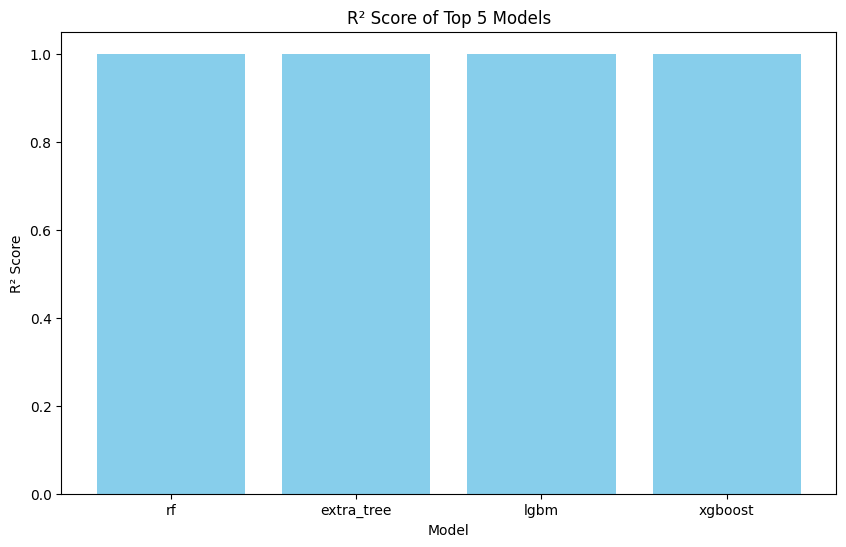

Top 5 Models Based on R² Score and Execution Time
1. Model: rf, R²: 1.0000, Time: 99.30 seconds
2. Model: extra_tree, R²: 1.0000, Time: 83.42 seconds
3. Model: lgbm, R²: 0.9994, Time: 69.42 seconds
4. Model: xgboost, R²: 0.9987, Time: 71.40 seconds


In [ ]:
import time
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Dictionary to store model names, R² scores, and time taken
model_performance = []

# List of estimators to evaluate
estimators = ["lgbm", "rf", "xgboost", "extra_tree"]  # Add or remove models as per your use case

for estimator in estimators:
    # Set the estimator to FLAML
    start_time = time.time()  # Start time
    automl = AutoML(estimator_list=[estimator])

    # Fit the model and time its execution
    automl.fit(X_train, y_train, task="regression", time_budget=60)  # Adjust time_budget as needed
    end_time = time.time()  # End time

    # Calculate the time taken
    elapsed_time = end_time - start_time

    # Predict on the test set
    y_pred = automl.predict(X_test)

    # Calculate the R² score
    r2 = r2_score(y_test, y_pred)

    # Append the model name, R² score, and time taken
    model_performance.append((estimator, r2, elapsed_time))

# Sort the models by R² score in descending order
model_performance = sorted(model_performance, key=lambda x: x[1], reverse=True)

# Extract the top 5 models for graph plotting
top_5_models = model_performance[:5]
model_names = [x[0] for x in top_5_models]
r2_scores = [x[1] for x in top_5_models]

# Plotting the R² scores of top 5 models
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("R² Score of Top 5 Models")
plt.show()

# Print the top 5 models based on R² score and their corresponding time taken
print("Top 5 Models Based on R² Score and Execution Time")
for i, (model, r2, time_taken) in enumerate(top_5_models):
    print(f"{i + 1}. Model: {model}, R²: {r2:.4f}, Time: {time_taken:.2f} seconds")


[flaml.automl.logger: 10-13 16:53:49] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 16:53:49] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 16:53:49] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 16:53:49] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 10-13 16:53:49] {2258} INFO - iteration 0, current learner lgbm
Error with estimator lgbm: LGBMRegressor.fit() got an unexpected keyword argument 'estimator'
[flaml.automl.logger: 10-13 16:53:49] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 16:53:49] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 16:53:49] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 16:53:49] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 10-13 16:53:49] {2258} INFO - iteration 0,

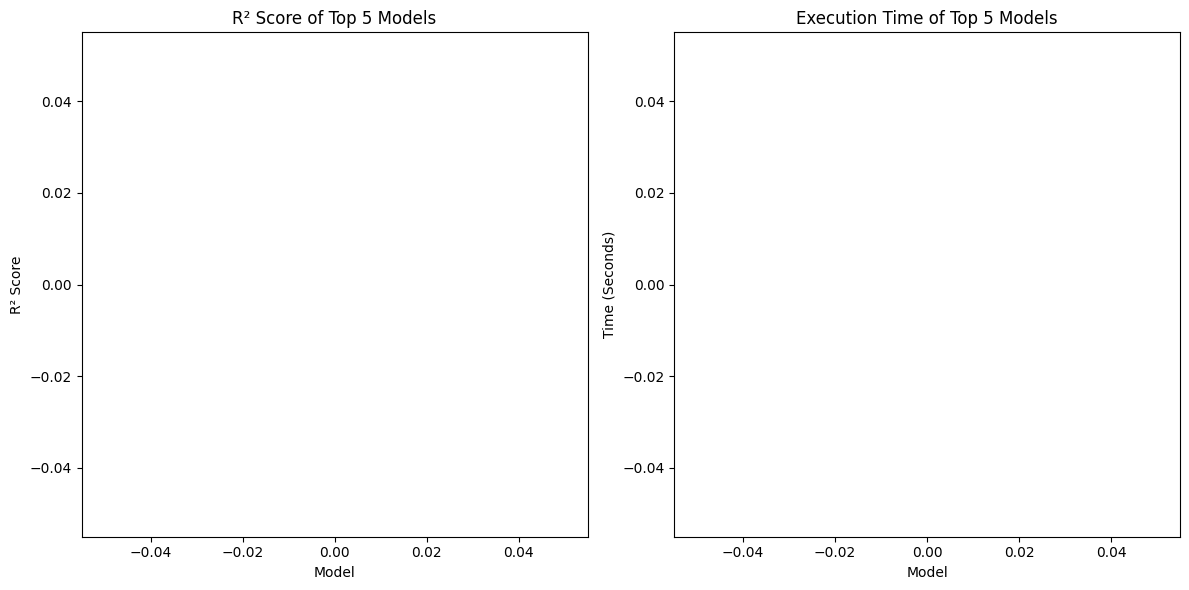

Top 5 Models Based on R² Score and Execution Time


In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from flaml import AutoML

# Create a sample DataFrame
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'energy_consumption': [2.5, 3.1, 3.6, 4.0, 4.5, 5.1, 5.6, 6.0, 6.5, 7.1]  # Target variable
})

# Split features (X) and target (y)
X = df.drop('energy_consumption', axis=1)
y = df['energy_consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean feature names by replacing special characters (if necessary)
X_train.columns = X_train.columns.str.replace(r'[^\w\s]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^\w\s]', '', regex=True)

# List of estimators to evaluate
estimators = ["lgbm", "rf", "xgboost", "extra_tree"]

# Dictionary to store model names, R² scores, and time taken
model_performance = []

for estimator in estimators:
    try:
        # Set the estimator to FLAML
        start_time = time.time()  # Start time
        automl = AutoML()

        # Fit the model and time its execution
        automl.fit(X_train, y_train, task="regression", time_budget=60, estimator=estimator)  # Adjust time_budget as needed
        end_time = time.time()  # End time

        # Calculate the time taken
        elapsed_time = end_time - start_time

        # Predict on the test set
        y_pred = automl.predict(X_test)

        # Calculate the R² score
        r2 = r2_score(y_test, y_pred)

        # Append the model name, R² score, and time taken
        model_performance.append((estimator, r2, elapsed_time))
    except Exception as e:
        print(f"Error with estimator {estimator}: {e}")

# Sort the models by R² score in descending order
model_performance = sorted(model_performance, key=lambda x: x[1], reverse=True)

# Extract the top 5 models for graph plotting
top_5_models = model_performance[:5]
model_names = [x[0] for x in top_5_models]
r2_scores = [x[1] for x in top_5_models]
execution_times = [x[2] for x in top_5_models]

# Plotting the R² scores of top 5 models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("R² Score of Top 5 Models")

# Plotting the Execution Time of top 5 models
plt.subplot(1, 2, 2)
plt.bar(model_names, execution_times, color='lightgreen')
plt.xlabel("Model")
plt.ylabel("Time (Seconds)")
plt.title("Execution Time of Top 5 Models")

plt.tight_layout()
plt.show()

# Print the top 5 models based on R² score and their corresponding time taken
print("Top 5 Models Based on R² Score and Execution Time")
for i, (model, r2, time_taken) in enumerate(top_5_models):
    print(f"{i + 1}. Model: {model}, R²: {r2:.4f}, Time: {time_taken:.2f} seconds")


[flaml.automl.logger: 10-13 17:17:35] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 17:17:35] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 17:17:35] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 17:17:35] {1955} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 10-13 17:17:35] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-13 17:17:35] {2393} INFO - Estimated sufficient time budget=4136s. Estimated necessary time budget=4s.
[flaml.automl.logger: 10-13 17:17:35] {2442} INFO -  at 0.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:35] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-13 17:17:35] {2442} INFO -  at 0.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:35] {2258} INFO - iteration 2, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:35] {2442} INFO -  at 0.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:35] {2258} INFO - iteration 3, current learner lgbm
[flaml.automl.logger: 10-13 17:17:35] {2442} INFO -  at 0.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:35] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 0.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 0.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 0.8s,	estimator lgbm's best error=inf,	best estimator None's best error=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 0.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 0.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 0.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.0s,	estimator lgbm's best error=inf,	best estimator None's best erro

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 13, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 14, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 15, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 16, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 17, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 19, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 21, current learner lgbm
[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 22, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:36] {2442} INFO -  at 1.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:36] {2258} INFO - iteration 23, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 1.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 24, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 1.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 25, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 1.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 1.9s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 1.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 28, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 29, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.1s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 33, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 36, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 38, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 39, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 40, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:37] {2258} INFO - iteration 41, current learner lgbm
[flaml.automl.logger: 10-13 17:17:37] {2442} INFO -  at 2.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 2.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 43, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 2.8s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 45, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 2.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 2.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 47, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 50, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 54, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 55, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 56, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 57, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 58, current learner lgbm
[flaml.automl.logger: 10-13 17:17:38] {2442} INFO -  at 3.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:38] {2258} INFO - iteration 59, current learner lgbm
[flaml.automl.logger: 10-13 17:17:39] {2442} INFO -  at 3.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:39] {2258} INFO - iteration 60, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:39] {2442} INFO -  at 3.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:39] {2258} INFO - iteration 61, current learner lgbm
[flaml.automl.logger: 10-13 17:17:39] {2442} INFO -  at 3.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:39] {2258} INFO - iteration 62, current learner lgbm
[flaml.automl.logger: 10-13 17:17:39] {2442} INFO -  at 4.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:39] {2258} INFO - iteration 63, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:39] {2442} INFO -  at 4.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:39] {2258} INFO - iteration 64, current learner lgbm
[flaml.automl.logger: 10-13 17:17:39] {2442} INFO -  at 4.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:39] {2258} INFO - iteration 65, current learner lgbm
[flaml.automl.logger: 10-13 17:17:39] {2442} INFO -  at 4.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:39] {2258} INFO - iteration 66, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:39] {2442} INFO -  at 4.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:39] {2258} INFO - iteration 67, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:40] {2442} INFO -  at 4.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:40] {2258} INFO - iteration 68, current learner lgbm
[flaml.automl.logger: 10-13 17:17:40] {2442} INFO -  at 4.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:40] {2258} INFO - iteration 69, current learner lgbm
[flaml.automl.logger: 10-13 17:17:40] {2442} INFO -  at 5.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:40] {2258} INFO - iteration 70, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:40] {2442} INFO -  at 5.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:40] {2258} INFO - iteration 71, current learner lgbm
[flaml.automl.logger: 10-13 17:17:40] {2442} INFO -  at 5.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:40] {2258} INFO - iteration 72, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:40] {2442} INFO -  at 5.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:40] {2258} INFO - iteration 73, current learner lgbm
[flaml.automl.logger: 10-13 17:17:40] {2442} INFO -  at 5.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:40] {2258} INFO - iteration 74, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:40] {2442} INFO -  at 5.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:40] {2258} INFO - iteration 75, current learner lgbm
[flaml.automl.logger: 10-13 17:17:41] {2442} INFO -  at 5.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:41] {2258} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 10-13 17:17:41] {2442} INFO -  at 5.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:41] {2258} INFO - iteration 77, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:41] {2442} INFO -  at 5.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:41] {2258} INFO - iteration 78, current learner lgbm
[flaml.automl.logger: 10-13 17:17:41] {2442} INFO -  at 6.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:41] {2258} INFO - iteration 79, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:41] {2442} INFO -  at 6.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:41] {2258} INFO - iteration 80, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:41] {2442} INFO -  at 6.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:41] {2258} INFO - iteration 81, current learner lgbm
[flaml.automl.logger: 10-13 17:17:41] {2442} INFO -  at 6.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:41] {2258} INFO - iteration 82, current learner lgbm
[flaml.automl.logger: 10-13 17:17:41] {2442} INFO -  at 6.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:41] {2258} INFO - iteration 83, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:41] {2442} INFO -  at 6.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:41] {2258} INFO - iteration 84, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:42] {2442} INFO -  at 6.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:42] {2258} INFO - iteration 85, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:42] {2442} INFO -  at 7.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:42] {2258} INFO - iteration 86, current learner lgbm
[flaml.automl.logger: 10-13 17:17:42] {2442} INFO -  at 7.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:42] {2258} INFO - iteration 87, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:42] {2442} INFO -  at 7.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:42] {2258} INFO - iteration 88, current learner lgbm
[flaml.automl.logger: 10-13 17:17:43] {2442} INFO -  at 7.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:43] {2258} INFO - iteration 89, current learner lgbm
[flaml.automl.logger: 10-13 17:17:43] {2442} INFO -  at 7.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:43] {2258} INFO - iteration 90, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:43] {2442} INFO -  at 8.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:43] {2258} INFO - iteration 91, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:43] {2442} INFO -  at 8.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:43] {2258} INFO - iteration 92, current learner lgbm
[flaml.automl.logger: 10-13 17:17:43] {2442} INFO -  at 8.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:43] {2258} INFO - iteration 93, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:43] {2442} INFO -  at 8.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:43] {2258} INFO - iteration 94, current learner lgbm
[flaml.automl.logger: 10-13 17:17:43] {2442} INFO -  at 8.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:43] {2258} INFO - iteration 95, current learner lgbm
[flaml.automl.logger: 10-13 17:17:43] {2442} INFO -  at 8.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:43] {2258} INFO - iteration 96, current learner lgbm
[flaml.automl.logger: 10-13 17:17:43] {2442} INFO -  at 8.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:43] {2258} INFO - iteration 97, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 8.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 98, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 8.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 99, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 8.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 100, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 8.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 101, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 8.9s,	estimator lgbm's best error=inf,	best estimator None's best 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 103, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 104, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 105, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 106, current learner lgbm
[flaml.automl.logger: 10-13 17:1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 108, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 109, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 110, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 111, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 112, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 113, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 114, current learner lgbm
[flaml.automl.logger: 10-13 17:17:44] {2442} INFO -  at 9.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:44] {2258} INFO - iteration 115, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 9.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 116, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 9.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 117, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 9.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 118, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 9.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 119, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 9.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 120, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 121, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 122, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 123, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.1s,	estimator lgbm's best error=inf,	best estimator None's

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 124, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 125, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 126, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 127, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 128, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 129, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 130, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 131, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 132, current learner lgbm
[flaml.automl.logger: 10-13 17:17:45] {2442} INFO -  at 10.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:45] {2258} INFO - iteration 133, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 10.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 134, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 10.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 135, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 10.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 136, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 10.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 138, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 139, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 140, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 141, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 142, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 143, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.3s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 144, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 145, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 146, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 147, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 148, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 149, current learner lgbm
[flaml.automl.logger: 10-13 17:17:46] {2442} INFO -  at 11.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:46] {2258} INFO - iteration 150, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 11.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 151, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 11.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 152, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 11.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 153, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 11.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 154, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 11.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 155, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 156, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 157, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 158, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 159, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 160, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 161, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 162, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 163, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 164, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 165, current learner lgbm
[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 166, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:47] {2442} INFO -  at 12.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:47] {2258} INFO - iteration 167, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 12.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 168, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 12.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 169, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 12.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 170, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 12.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 171, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 172, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 173, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 174, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.1s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 175, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 176, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 177, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 178, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 179, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 180, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 181, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 182, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 183, current learner lgbm
[flaml.automl.logger: 10-13 17:17:48] {2442} INFO -  at 13.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:48] {2258} INFO - iteration 184, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 13.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 185, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 13.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 186, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 13.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 187, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 13.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 188, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 189, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 190, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 191, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 192, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 193, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 194, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 195, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 196, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 197, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 198, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 199, current learner lgbm
[flaml.automl.logger: 10-13 17:17:49] {2442} INFO -  at 14.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:49] {2258} INFO - iteration 200, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 14.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 201, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 14.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 202, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 14.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 203, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 14.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 204, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 14.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 205, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 206, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 207, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 208, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 209, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 210, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 211, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 212, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 213, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 214, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 215, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:50] {2258} INFO - iteration 216, current learner lgbm
[flaml.automl.logger: 10-13 17:17:50] {2442} INFO -  at 15.7s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 15.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 218, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 15.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 219, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 15.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 220, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 15.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 221, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 15.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 222, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 223, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 225, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 226, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 227, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 228, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 229, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 230, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 231, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 232, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 233, current learner lgbm
[flaml.automl.logger: 10-13 17:17:51] {2442} INFO -  at 16.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:51] {2258} INFO - iteration 234, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 16.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 235, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 16.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 236, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 16.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 237, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 16.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 238, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 239, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 240, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 241, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 242, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 243, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 244, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 245, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 246, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 247, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 248, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 249, current learner lgbm
[flaml.automl.logger: 10-13 17:17:52] {2442} INFO -  at 17.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:52] {2258} INFO - iteration 250, current learner lgbm
[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 17.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 251, current learner lgbm
[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 17.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 252, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 17.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 253, current learner lgbm
[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 17.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 254, current learner lgbm
[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 17.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 255, current learner lgbm
[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 18.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 256, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 18.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 257, current learner lgbm
[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 18.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 258, current learner lgbm
[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 18.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 260, current learner lgbm
[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 18.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 261, current learner lgbm
[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 18.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 10-13 17:17:53] {2442

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:53] {2442} INFO -  at 18.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:53] {2258} INFO - iteration 264, current learner lgbm
[flaml.automl.logger: 10-13 17:17:54] {2442} INFO -  at 18.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:54] {2258} INFO - iteration 265, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:54] {2442} INFO -  at 18.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:54] {2258} INFO - iteration 266, current learner lgbm
[flaml.automl.logger: 10-13 17:17:54] {2442} INFO -  at 18.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:54] {2258} INFO - iteration 267, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:54] {2442} INFO -  at 19.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:54] {2258} INFO - iteration 268, current learner lgbm
[flaml.automl.logger: 10-13 17:17:54] {2442} INFO -  at 19.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:54] {2258} INFO - iteration 269, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:54] {2442} INFO -  at 19.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:54] {2258} INFO - iteration 270, current learner lgbm
[flaml.automl.logger: 10-13 17:17:54] {2442} INFO -  at 19.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:54] {2258} INFO - iteration 271, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:54] {2442} INFO -  at 19.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:54] {2258} INFO - iteration 272, current learner lgbm
[flaml.automl.logger: 10-13 17:17:54] {2442} INFO -  at 19.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:54] {2258} INFO - iteration 273, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:55] {2442} INFO -  at 19.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:55] {2258} INFO - iteration 274, current learner lgbm
[flaml.automl.logger: 10-13 17:17:55] {2442} INFO -  at 19.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:55] {2258} INFO - iteration 275, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:55] {2442} INFO -  at 19.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:55] {2258} INFO - iteration 276, current learner lgbm
[flaml.automl.logger: 10-13 17:17:55] {2442} INFO -  at 20.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:55] {2258} INFO - iteration 277, current learner lgbm
[flaml.automl.logger: 10-13 17:17:55] {2442} INFO -  at 20.1s,	estimator lgbm's best error=inf,	best 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:55] {2442} INFO -  at 20.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:55] {2258} INFO - iteration 279, current learner lgbm
[flaml.automl.logger: 10-13 17:17:55] {2442} INFO -  at 20.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:55] {2258} INFO - iteration 280, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:55] {2442} INFO -  at 20.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:55] {2258} INFO - iteration 281, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:56] {2442} INFO -  at 21.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:56] {2258} INFO - iteration 282, current learner lgbm
[flaml.automl.logger: 10-13 17:17:56] {2442} INFO -  at 21.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:56] {2258} INFO - iteration 283, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:56] {2442} INFO -  at 21.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:56] {2258} INFO - iteration 284, current learner lgbm
[flaml.automl.logger: 10-13 17:17:56] {2442} INFO -  at 21.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:56] {2258} INFO - iteration 285, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:56] {2442} INFO -  at 21.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:56] {2258} INFO - iteration 286, current learner lgbm
[flaml.automl.logger: 10-13 17:17:56] {2442} INFO -  at 21.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:56] {2258} INFO - iteration 287, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:57] {2442} INFO -  at 21.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:57] {2258} INFO - iteration 288, current learner lgbm
[flaml.automl.logger: 10-13 17:17:57] {2442} INFO -  at 22.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:57] {2258} INFO - iteration 289, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:57] {2442} INFO -  at 22.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:57] {2258} INFO - iteration 290, current learner lgbm
[flaml.automl.logger: 10-13 17:17:58] {2442} INFO -  at 22.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:58] {2258} INFO - iteration 291, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:58] {2442} INFO -  at 22.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:58] {2258} INFO - iteration 292, current learner lgbm
[flaml.automl.logger: 10-13 17:17:58] {2442} INFO -  at 23.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:58] {2258} INFO - iteration 293, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:58] {2442} INFO -  at 23.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:58] {2258} INFO - iteration 294, current learner lgbm
[flaml.automl.logger: 10-13 17:17:58] {2442} INFO -  at 23.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:58] {2258} INFO - iteration 295, current learner lgbm
[flaml.automl.logger: 10-13 17:17:58] {2442} INFO -  at 23.2s,	es

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:58] {2442} INFO -  at 23.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:58] {2258} INFO - iteration 297, current learner lgbm
[flaml.automl.logger: 10-13 17:17:58] {2442} INFO -  at 23.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:58] {2258} INFO - iteration 298, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:58] {2442} INFO -  at 23.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:58] {2258} INFO - iteration 299, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:17:59] {2442} INFO -  at 24.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:59] {2258} INFO - iteration 300, current learner lgbm
[flaml.automl.logger: 10-13 17:17:59] {2442} INFO -  at 24.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:59] {2258} INFO - iteration 301, current learner lgbm
[flaml.automl.logger: 10-13 17:17:59] {2442} INFO -  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:59] {2442} INFO -  at 24.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:59] {2258} INFO - iteration 303, current learner lgbm
[flaml.automl.logger: 10-13 17:17:59] {2442} INFO -  at 24.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:59] {2258} INFO - iteration 304, current learner lgbm
[flaml.automl.logger: 10-13 17:17:59] {2442} IN

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:17:59] {2442} INFO -  at 24.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:59] {2258} INFO - iteration 306, current learner lgbm
[flaml.automl.logger: 10-13 17:17:59] {2442} INFO -  at 24.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:17:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:17:59] {2258} INFO - iteration 307, current learner lgbm
[flaml.automl.logger: 10-13 17:18:00] {24

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:00] {2442} INFO -  at 24.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:00] {2258} INFO - iteration 309, current learner lgbm
[flaml.automl.logger: 10-13 17:18:00] {2442} INFO -  at 24.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:00] {2258} INFO - iteration 310, current learner lgbm
[flaml.automl.logger: 10-13 17:18:0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:00] {2258} INFO - iteration 312, current learner lgbm
[flaml.automl.logger: 10-13 17:18:00] {2442} INFO -  at 25.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:00] {2258} INFO - iteration 313, current learner lgbm
[flaml.automl.logger: 10-13 17:18:00] {2442} INFO -  at 25.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:00] {2442} INFO -  at 25.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:00] {2258} INFO - iteration 317, current learner lgbm
[flaml.automl.logger: 10-13 17:18:00] {2442} INFO -  at 25.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:00] {2258} INFO - iteration 318, current learner lgbm
[flaml.automl.logge

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:00] {2442} INFO -  at 25.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:00] {2258} INFO - iteration 320, current learner lgbm
[flaml.automl.logger: 10-13 17:18:00] {2442} INFO -  at 25.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:00] {2258} INFO - iteration 321, current learner lgbm
[flaml.automl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:01] {2258} INFO - iteration 322, current learner lgbm
[flaml.automl.logger: 10-13 17:18:01] {2442} INFO -  at 25.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:01] {2258} INFO - iteration 323, current learner lgbm
[flaml.automl.logger: 10-13 17:18:01] {2442} INFO -  at 26.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:01] {2442} INFO -  at 26.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:01] {2258} INFO - iteration 326, current learner lgbm
[flaml.automl.logger: 10-13 17:18:01] {2442} INFO -  at 26.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:01] {2258} INFO - iteration 327, current learner lgbm
[

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:01] {2442} INFO -  at 26.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:01] {2258} INFO - iteration 330, current learner lgbm
[flaml.automl.logger: 10-13 17:18:01] {2442} INFO -  at 26.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:01] {2258} INFO - iteration 331, current learne

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:01] {2442} INFO -  at 26.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:01] {2258} INFO - iteration 332, current learner lgbm
[flaml.automl.logger: 10-13 17:18:01] {2442} INFO -  at 26.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:01] {2258} INFO - iteration 333, current le

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:02] {2442} INFO -  at 26.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:02] {2258} INFO - iteration 335, current learner lgbm
[flaml.automl.logger: 10-13 17:18:02] {2442} INFO -  at 26.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:02] {2258} INFO - iteration 336, curr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:02] {2258} INFO - iteration 338, current learner lgbm
[flaml.automl.logger: 10-13 17:18:02] {2442} INFO -  at 27.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:02] {2258} INFO - iteration 339, current learner lgbm
[flaml.automl.logger: 10-13 17:18:02] {2442} INFO -  at 27.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:02] {2258} INFO - iteration 342, current learner lgbm
[flaml.automl.logger: 10-13 17:18:02] {2442} INFO -  at 27.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:02] {2258} INFO - iteration 343, current learner lgbm
[flaml.automl.logger: 10-13 17:18:02] {2442} INFO -  at 27.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the ti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:02] {2442} INFO -  at 27.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:02] {2258} INFO - iteration 346, current learner lgbm
[flaml.automl.logger: 10-13 17:18:03] {2442} INFO -  at 27.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:03] {2258} INFO

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:03] {2442} INFO -  at 27.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:03] {2258} INFO - iteration 349, current learner lgbm
[flaml.automl.logger: 10-13 17:18:03] {2442} INFO -  at 27.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:03] {2258

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:03] {2258} INFO - iteration 352, current learner lgbm
[flaml.automl.logger: 10-13 17:18:03] {2442} INFO -  at 28.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:03] {2258} INFO - iteration 353, current learner lgbm
[flaml.automl.logger: 10-13 17:18:03] {2442} INFO -  at 28.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:03] {2442} INFO -  at 28.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:03] {2258} INFO - iteration 356, current learner lgbm
[flaml.automl.logger: 10-13 17:18:03] {2442} INFO -  at 28.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:03] {2442} INFO -  at 28.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:03] {2258} INFO - iteration 358, current learner lgbm
[flaml.automl.logger: 10-13 17:18:03] {2442} INFO -  at 28.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:04] {2442} INFO -  at 28.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:04] {2258} INFO - iteration 361, current learner lgbm
[flaml.automl.logger: 10-13 17:18:04] {2442} INFO -  at 28.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logge

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:04] {2442} INFO -  at 29.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:04] {2258} INFO - iteration 364, current learner lgbm
[flaml.automl.logger: 10-13 17:18:04] {2442} INFO -  at 29.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:04] {2258} INFO - iteration 367, current learner lgbm
[flaml.automl.logger: 10-13 17:18:04] {2442} INFO -  at 29.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:04] {2258} INFO - iteration 368, current learner lgbm
[flaml.automl.logger: 10-13 17:18:04] {2442} INFO -  at 29.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:04] {2442} INFO -  at 29.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:04] {2258} INFO - iteration 371, current learner lgbm
[flaml.automl.logger: 10-13 17:18:04] {2442} INFO -  at 29.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:05] {2442} INFO -  at 29.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:05] {2258} INFO - iteration 374, current learner lgbm
[flaml.automl.logger: 10-13 17:18:05] {2442} INFO -  at 29.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:05] {2442} INFO -  at 30.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:05] {2258} INFO - iteration 377, current learner lgbm
[flaml.automl.logger: 10-13 17:18:05] {2442} INFO -  at 30.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:05] {2258} INFO - iteration 380, current learner lgbm
[flaml.automl.logger: 10-13 17:18:05] {2442} INFO -  at 30.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:05] {2258} INFO - iteration 381, current learner lgbm
[flaml.automl.logger: 10-1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:05] {2442} INFO -  at 30.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:05] {2258} INFO - iteration 383, current learner lgbm
[flaml.automl.logger: 10-13 17:18:05] {2442} INFO -  at 30.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:06] {2442} INFO -  at 30.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:06] {2258} INFO - iteration 386, current learner lgbm
[flaml.automl.logger: 10-13 17:18:06] {2442} INFO -  at 30.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:06] {2442} INFO -  at 31.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:06] {2258} INFO - iteration 389, current learner lgbm
[flaml.automl.logger: 10-13 17:18:06] {2442} INFO -  at 31.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times th

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:06] {2442} INFO -  at 31.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:06] {2258} INFO - iteration 392, current learner lgbm
[flaml.automl.logger: 10-13 17:18:06] {2442} INFO -  at 31.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 ti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:06] {2442} INFO -  at 31.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:06] {2258} INFO - iteration 394, current learner lgbm
[flaml.automl.logger: 10-13 17:18:06] {2442} INFO -  at 31.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:06] {2258} INFO - iteration 396, current learner lgbm
[flaml.automl.logger: 10-13 17:18:07] {2442} INFO -  at 31.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:07] {2258} INFO - iteration 397, current learner lgbm
[flaml.automl.logger: 10-13 17:18:07] {2442} INFO -  at 31.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:07] {2442} INFO -  at 32.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:07] {2258} INFO - iteration 400, current learner lgbm
[flaml.automl.logger: 10-13 17:18:07] {2442} INFO -  at 32.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:07] {2258} INFO - iteration 403, current learner lgbm
[flaml.automl.logger: 10-13 17:18:07] {2442} INFO -  at 32.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:07] {2258} INFO - iteration 404, c

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:07] {2442} INFO -  at 32.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:07] {2258} INFO - iteration 407, current learner lgbm
[flaml.automl.logger: 10-13 17:18:07] {2442} INFO -  at 32.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:08] {2442} INFO -  at 32.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:08] {2258} INFO - iteration 409, current learner lgbm
[flaml.automl.logger: 10-13 17:18:08] {2442} INFO -  at 32.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:08] {2442} INFO -  at 33.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:08] {2258} INFO - iteration 412, current learner lgbm
[flaml.automl.logger: 10-13 17:18:08] {2442} INFO -  at 33.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:08] {2442} INFO -  at 33.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:08] {2258} INFO - iteration 415, current learner lgbm
[flaml.automl.logger: 10-13 17:18:08] {2442} INFO -  at 33.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:08] {2442} INFO -  at 33.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:08] {2258} INFO - iteration 418, current learner lgbm
[flaml.automl.logger: 10-13 17:18:08] {2442} INFO -  at 33.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:08] {2258} INFO - iteration 420, current learner lgbm
[flaml.automl.logger: 10-13 17:18:08] {2442} INFO -  at 33.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:08] {2258} INFO - iteration 421, current learner lgbm
[flaml.automl.logger: 10-13 17:18:09] {2442} INFO -  at 33.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:09] {2442} INFO -  at 33.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:09] {2258} INFO - iteration 424, current learner lgbm
[flaml.automl.logger: 10-13 17:18:09] {2442} INFO -  at 34.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:09] {2442} INFO -  at 34.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:09] {2258} INFO - iteration 427, current learner lgbm
[flaml.automl.logger: 10-13 17:18:09] {2442} INFO -  at 34.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:09] {2442} INFO -  at 34.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:09] {2258} INFO - iteration 429, current learner lgbm
[flaml.automl.logger: 10-13 17:18:09] {2442} INFO -  at 34.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:09] {2442} INFO -  at 34.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:09] {2258} INFO - iteration 431, current learner lgbm
[flaml.automl.logger: 10-13 17:18:10] {2442} INFO -  at 34.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:10] {2442} INFO -  at 34.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:10] {2258} INFO - iteration 433, current learner lgbm
[flaml.automl.logger: 10-13 17:18:10] {2442} INFO -  at 35.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:10] {2442} INFO -  at 35.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:10] {2258} INFO - iteration 435, current learner lgbm
[flaml.automl.logger: 10-13 17:18:10] {2442} INFO -  at 35.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:10] {2442} INFO -  at 35.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:10] {2258} INFO - iteration 437, current learner lgbm
[flaml.automl.logger: 10-13 17:18:10] {2442} INFO -  at 35.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:10] {2442} INFO -  at 35.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:10] {2258} INFO - iteration 439, current learner lgbm
[flaml.automl.logger: 10-13 17:18:11] {2442} INFO -  at 35.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:11] {2442} INFO -  at 35.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:11] {2258} INFO - iteration 441, current learner lgbm
[flaml.automl.logger: 10-13 17:18:11] {2442} INFO -  at 36.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:11] {2442} INFO -  at 36.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:11] {2258} INFO - iteration 443, current learner lgbm
[flaml.automl.logger: 10-13 17:18:11] {2442} INFO -  at 36.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:11] {2442} INFO -  at 36.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:11] {2258} INFO - iteration 445, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:12] {2442} INFO -  at 36.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:12] {2258} INFO - iteration 446, current learner lgbm
[flaml.automl.logger: 10-13 17:18:12] {2442} INFO -  at 36.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:12] {2442} INFO -  at 37.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:12] {2258} INFO - iteration 448, current learner lgbm
[flaml.automl.logger: 10-13 17:18:12] {2442} INFO -  at 37.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:12] {2442} INFO -  at 37.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:12] {2258} INFO - iteration 450, current learner lgbm
[flaml.automl.logger: 10-13 17:18:12] {2442} INFO -  at 37.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:12] {2442} INFO -  at 37.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:12] {2258} INFO - iteration 452, current learner lgbm
[flaml.automl.logger: 10-13 17:18:12] {2442} INFO -  at 37.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:13] {2442} INFO -  at 37.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:13] {2258} INFO - iteration 454, current learner lgbm
[flaml.automl.logger: 10-13 17:18:13] {2442} INFO -  at 37.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:13] {2442} INFO -  at 38.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:13] {2258} INFO - iteration 456, current learner lgbm
[flaml.automl.logger: 10-13 17:18:13] {2442} INFO -  at 38.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:13] {2442} INFO -  at 38.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:13] {2258} INFO - iteration 458, current learner lgbm
[flaml.automl.logger: 10-13 17:18:13] {2442} INFO -  at 38.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:13] {2442} INFO -  at 38.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:13] {2258} INFO - iteration 460, current learner lgbm
[flaml.automl.logger: 10-13 17:18:13] {2442} INFO -  at 38.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:14] {2442} INFO -  at 38.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:14] {2258} INFO - iteration 462, current learner lgbm
[flaml.automl.logger: 10-13 17:18:14] {2442} INFO -  at 38.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:14] {2442} INFO -  at 39.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:14] {2258} INFO - iteration 464, current learner lgbm
[flaml.automl.logger: 10-13 17:18:14] {2442} INFO -  at 39.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:14] {2442} INFO -  at 39.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:14] {2258} INFO - iteration 466, current learner lgbm
[flaml.automl.logger: 10-13 17:18:14] {2442} INFO -  at 39.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:14] {2442} INFO -  at 39.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:14] {2258} INFO - iteration 468, current learner lgbm
[flaml.automl.logger: 10-13 17:18:15] {2442} INFO -  at 39.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:15] {2442} INFO -  at 39.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:15] {2258} INFO - iteration 470, current learner lgbm
[flaml.automl.logger: 10-13 17:18:15] {2442} INFO -  at 39.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:15] {2442} INFO -  at 40.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:15] {2258} INFO - iteration 472, current learner lgbm
[flaml.automl.logger: 10-13 17:18:15] {2442} INFO -  at 40.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:15] {2442} INFO -  at 40.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:15] {2258} INFO - iteration 474, current learner lgbm
[flaml.automl.logger: 10-13 17:18:15] {2442} INFO -  at 40.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:15] {2442} INFO -  at 40.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:15] {2258} INFO - iteration 476, current learner lgbm
[flaml.automl.logger: 10-13 17:18:15] {2442} INFO -  at 40.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:16] {2442} INFO -  at 40.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:16] {2258} INFO - iteration 478, current learner lgbm
[flaml.automl.logger: 10-13 17:18:16] {2442} INFO -  at 41.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:16] {2442} INFO -  at 41.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:16] {2258} INFO - iteration 480, current learner lgbm
[flaml.automl.logger: 10-13 17:18:16] {2442} INFO -  at 41.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:16] {2442} INFO -  at 41.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:16] {2258} INFO - iteration 482, current learner lgbm
[flaml.automl.logger: 10-13 17:18:16] {2442} INFO -  at 41.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:16] {2442} INFO -  at 41.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:16] {2258} INFO - iteration 484, current learner lgbm
[flaml.automl.logger: 10-13 17:18:16] {2442} INFO -  at 41.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:17] {2442} INFO -  at 41.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:17] {2258} INFO - iteration 487, current learner lgbm
[flaml.automl.logger: 10-13 17:18:17] {2442} INFO -  at 41.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:17] {2442} INFO -  at 42.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:17] {2258} INFO - iteration 490, current learner lgbm
[flaml.automl.logger: 10-13 17:18:17] {2442} INFO -  at 42.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:17] {2442} INFO -  at 42.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:17] {2258} INFO - iteration 493, current learner lgbm
[flaml.automl.logger: 10-13 17:18:17] {2442} INFO -  at 42.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:17] {2442} INFO -  at 42.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:17] {2258} INFO - iteration 495, current learner lgbm
[flaml.automl.logger: 10-13 17:18:17] {2442} INFO -  at 42.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:18] {2442} INFO -  at 42.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:18] {2258} INFO - iteration 497, current learner lgbm
[flaml.automl.logger: 10-13 17:18:18] {2442} INFO -  at 42.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:18] {2442} INFO -  at 42.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:18] {2258} INFO - iteration 500, current learner lgbm
[flaml.automl.logger: 10-13 17:18:18] {2442} INFO -  at 43.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:18] {2442} INFO -  at 43.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:18] {2258} INFO - iteration 503, current learner lgbm
[flaml.automl.logger: 10-13 17:18:18] {2442} INFO -  at 43.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:18] {2442} INFO -  at 43.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:18] {2258} INFO - iteration 506, current learner lgbm
[flaml.automl.logger: 10-13 17:18:18] {2442} INFO -  at 43.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:18] {2258} INFO - iteration 508, current learner lgbm
[flaml.automl.logger: 10-13 17:18:19] {2442} INFO -  at 43.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:19] {2258} INFO - iteration 509, current learner lgbm
[flaml.automl.logger: 10-13 17:18:19] {2442} INFO -  at 43.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:19] {2459} WARNING - All estimator hyperparameters local search

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:19] {2442} INFO -  at 43.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:19] {2258} INFO - iteration 512, current learner lgbm
[flaml.automl.logger: 10-13 17:18:19] {2442} INFO -  at 44.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:19] {2442} INFO -  at 44.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:19] {2258} INFO - iteration 515, current learner lgbm
[flaml.automl.logger: 10-13 17:18:19] {2442} INFO -  at 44.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:19] {2258} INFO - iteration 517, current learner lgbm
[flaml.automl.logger: 10-13 17:18:19] {2442} INFO -  at 44.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:19] {2258} INFO - iteration 520, current learner lgbm
[flaml.automl.logger: 10-13 17:18:20] {2442} INFO -  at 44.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:20] {2258} INFO - iteration 521, current learner lgbm
[flaml.automl.logger: 10-13 17:18:20] {2442} INFO -  at 44.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:20] {2459} WARNING - All estimator hyperparameters 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:20] {2442} INFO -  at 45.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:20] {2258} INFO - iteration 524, current learner lgbm
[flaml.automl.logger: 10-13 17:18:20] {2442} INFO -  at 45.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:20] {2442} INFO -  at 45.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:20] {2258} INFO - iteration 527, current learner lgbm
[flaml.automl.logger: 10-13 17:18:20] {2442} INFO -  at 45.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:20] {2442} INFO -  at 45.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:20] {2258} INFO - iteration 530, current learner lgbm
[flaml.automl.logger: 10-13 17:18:20] {2442} INFO -  at 45.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:21] {2442} INFO -  at 45.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:21] {2258} INFO - iteration 533, current learner lgbm
[flaml.automl.logger: 10-13 17:18:21] {2442} INFO -  at 45.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:21] {2442} INFO -  at 46.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:21] {2258} INFO - iteration 536, current learner lgbm
[flaml.automl.logger: 10-13 17:18:21] {2442} INFO -  at 46.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time excee

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:21] {2442} INFO -  at 46.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:21] {2258} INFO - iteration 539, current learner lgbm
[flaml.automl.logger: 10-13 17:18:21] {2442} INFO -  at 46.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time ex

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:21] {2442} INFO -  at 46.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:21] {2258} INFO - iteration 542, current learner lgbm
[flaml.automl.logger: 10-13 17:18:21] {2442} INFO -  at 46.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:22] {2442} INFO -  at 46.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:22] {2258} INFO - iteration 545, current learner lgbm
[flaml.automl.logger: 10-13 17:18:22] {2442} INFO -  at 46.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:22] {2442} INFO -  at 47.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:22] {2258} INFO - iteration 548, current learner lgbm
[flaml.automl.logger: 10-13 17:18:22] {2442} INFO -  at 47.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total searc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:22] {2442} INFO -  at 47.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:22] {2258} INFO - iteration 551, current learner lgbm
[flaml.automl.logger: 10-13 17:18:22] {2442} INFO -  at 47.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total se

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:22] {2258} INFO - iteration 553, current learner lgbm
[flaml.automl.logger: 10-13 17:18:22] {2442} INFO -  at 47.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:23] {2442} INFO -  at 47.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:23] {2258} INFO - iteration 557, current learner lgbm
[flaml.automl.logger: 10-13 17:18:23] {2442} INFO -  at 47.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the to

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:23] {2442} INFO -  at 48.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:23] {2258} INFO - iteration 560, current learner lgbm
[flaml.automl.logger: 10-13 17:18:23] {2442} INFO -  at 48.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:23] {2442} INFO -  at 48.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:23] {2258} INFO - iteration 563, current learner lgbm
[flaml.automl.logger: 10-13 17:18:23] {2442} INFO -  at 48.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:23] {2442} INFO -  at 48.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:23] {2258} INFO - iteration 565, current learner lgbm
[flaml.automl.logger: 10-13 17:18:23] {2442} INFO -  at 48.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, an

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:24] {2442} INFO -  at 48.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:24] {2258} INFO - iteration 567, current learner lgbm
[flaml.automl.logger: 10-13 17:18:24] {2442} INFO -  at 48.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:24] {2442} INFO -  at 49.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:24] {2258} INFO - iteration 570, current learner lgbm
[flaml.automl.logger: 10-13 17:18:24] {2442} INFO -  at 49.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:24] {2459} WARNING - All estimator hyperparameters local search has converged at least onc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:24] {2442} INFO -  at 49.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:24] {2258} INFO - iteration 573, current learner lgbm
[flaml.automl.logger: 10-13 17:18:24] {2442} INFO -  at 49.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:24] {2459} WARNING - All estimator hyperparameters local search has converged at least 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:24] {2442} INFO -  at 49.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:24] {2258} INFO - iteration 575, current learner lgbm
[flaml.automl.logger: 10-13 17:18:24] {2442} INFO -  at 49.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:24] {2459} WARNING - All estimator hyperparameters local search has converged at leas

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:25] {2442} INFO -  at 49.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:25] {2258} INFO - iteration 578, current learner lgbm
[flaml.automl.logger: 10-13 17:18:25] {2442} INFO -  at 49.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:25] {2459} WARNING - All estimator hyperparameters local search has converged at l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:25] {2442} INFO -  at 49.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:25] {2258} INFO - iteration 581, current learner lgbm
[flaml.automl.logger: 10-13 17:18:25] {2442} INFO -  at 50.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:25] {2459} WARNING - All estimator hyperparameters local search has converged a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:25] {2442} INFO -  at 50.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:25] {2258} INFO - iteration 584, current learner lgbm
[flaml.automl.logger: 10-13 17:18:25] {2442} INFO -  at 50.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:25] {2459} WARNING - All estimator hyperparameters local search has converge

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:25] {2258} INFO - iteration 586, current learner lgbm
[flaml.automl.logger: 10-13 17:18:25] {2442} INFO -  at 50.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:26] {2258} INFO - iteration 589, current learner lgbm
[flaml.automl.logger: 10-13 17:18:26] {2442} INFO -  at 50.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:26] {2258} INFO - iteration 590, current learner lgbm
[flaml.automl.logger: 10-13 17:18:26] {2442} INFO -  at 50.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:26] {2442} INFO -  at 51.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:26] {2258} INFO - iteration 593, current learner lgbm
[flaml.automl.logger: 10-13 17:18:26] {2442} INFO -  at 51.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:26] {2459} WARNING - All estimator hyperparameters local search has

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:26] {2442} INFO -  at 51.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:26] {2258} INFO - iteration 596, current learner lgbm
[flaml.automl.logger: 10-13 17:18:26] {2442} INFO -  at 51.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:26] {2459} WARNING - All estimator hyperparameters local search 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:26] {2442} INFO -  at 51.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:26] {2258} INFO - iteration 598, current learner lgbm
[flaml.automl.logger: 10-13 17:18:26] {2442} INFO -  at 51.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:26] {2459} WARNING - All estimator hyperparameters local searc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:27] {2442} INFO -  at 51.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:27] {2258} INFO - iteration 600, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:27] {2442} INFO -  at 52.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:27] {2258} INFO - iteration 601, current learner lgbm
[flaml.automl.logger: 10-13 17:18:27] {2442} INFO -  at 52.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:27] {2459} WARNING - All estimator hyperparameters local se

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:27] {2442} INFO -  at 52.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:27] {2258} INFO - iteration 603, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:28] {2442} INFO -  at 53.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:28] {2258} INFO - iteration 604, current learner lgbm
[flaml.automl.logger: 10-13 17:18:28] {2442} INFO -  at 53.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:28] {2442} INFO -  at 53.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:28] {2258} INFO - iteration 607, current learner lgbm
[flaml.automl.logger: 10-13 17:18:29] {2442} INFO -  at 53.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:29] {2459} WARNING - All estimator hyperparameters lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:29] {2442} INFO -  at 53.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:29] {2258} INFO - iteration 609, current learner lgbm
[flaml.automl.logger: 10-13 17:18:29] {2442} INFO -  at 54.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:29] {2459} WARNING - All estimator hyperparameters 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:29] {2442} INFO -  at 54.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:29] {2258} INFO - iteration 611, current learner lgbm
[flaml.automl.logger: 10-13 17:18:29] {2442} INFO -  at 54.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:29] {2459} WARNING - All estimator hyperparameter

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:29] {2442} INFO -  at 54.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:29] {2258} INFO - iteration 613, current learner lgbm
[flaml.automl.logger: 10-13 17:18:29] {2442} INFO -  at 54.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:29] {2459} WARNING - All estimator hyperparamet

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:29] {2442} INFO -  at 54.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:29] {2258} INFO - iteration 615, current learner lgbm
[flaml.automl.logger: 10-13 17:18:29] {2442} INFO -  at 54.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:29] {2459} WARNING - All estimator hyperparam

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:30] {2442} INFO -  at 54.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:30] {2258} INFO - iteration 617, current learner lgbm
[flaml.automl.logger: 10-13 17:18:30] {2442} INFO -  at 54.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:30] {2459} WARNING - All estimator hyperpar

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:30] {2442} INFO -  at 55.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:30] {2258} INFO - iteration 619, current learner lgbm
[flaml.automl.logger: 10-13 17:18:30] {2442} INFO -  at 55.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:30] {2459} WARNING - All estimator hyperp

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:30] {2442} INFO -  at 55.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:30] {2258} INFO - iteration 621, current learner lgbm
[flaml.automl.logger: 10-13 17:18:31] {2442} INFO -  at 55.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:31] {2459} WARNING - All estimator hype

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:31] {2442} INFO -  at 55.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:31] {2258} INFO - iteration 623, current learner lgbm
[flaml.automl.logger: 10-13 17:18:31] {2442} INFO -  at 56.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:31] {2459} WARNING - All estimator hy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:31] {2442} INFO -  at 56.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:31] {2258} INFO - iteration 625, current learner lgbm
[flaml.automl.logger: 10-13 17:18:31] {2442} INFO -  at 56.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:31] {2459} WARNING - All estimator 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:31] {2442} INFO -  at 56.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:31] {2258} INFO - iteration 627, current learner lgbm
[flaml.automl.logger: 10-13 17:18:31] {2442} INFO -  at 56.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:31] {2459} WARNING - All estimato

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:32] {2442} INFO -  at 56.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:32] {2258} INFO - iteration 629, current learner lgbm
[flaml.automl.logger: 10-13 17:18:32] {2442} INFO -  at 56.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:32] {2459} WARNING - All estima

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:32] {2442} INFO -  at 57.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:32] {2258} INFO - iteration 631, current learner lgbm
[flaml.automl.logger: 10-13 17:18:32] {2442} INFO -  at 57.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:32] {2459} WARNING - All esti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:32] {2442} INFO -  at 57.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:32] {2258} INFO - iteration 633, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:32] {2442} INFO -  at 57.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:32] {2258} INFO - iteration 634, current learner lgbm
[flaml.automl.logger: 10-13 17:18:33] {2442} INFO -  at 57.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:33] {2459} WARNING - All e

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:33] {2442} INFO -  at 57.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:33] {2258} INFO - iteration 636, current learner lgbm
[flaml.automl.logger: 10-13 17:18:33] {2442} INFO -  at 57.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:33] {2459} WARNING - All

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:33] {2442} INFO -  at 58.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:33] {2258} INFO - iteration 639, current learner lgbm
[flaml.automl.logger: 10-13 17:18:33] {2442} INFO -  at 58.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:33] {2459} WARNING - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:33] {2442} INFO -  at 58.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:33] {2258} INFO - iteration 642, current learner lgbm
[flaml.automl.logger: 10-13 17:18:33] {2442} INFO -  at 58.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:33] {2459} WARNING

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:33] {2442} INFO -  at 58.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:33] {2258} INFO - iteration 644, current learner lgbm
[flaml.automl.logger: 10-13 17:18:33] {2442} INFO -  at 58.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:33] {2459} WARNI

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:34] {2442} INFO -  at 58.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:34] {2258} INFO - iteration 646, current learner lgbm
[flaml.automl.logger: 10-13 17:18:34] {2442} INFO -  at 58.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:34] {2459} WAR

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:34] {2442} INFO -  at 59.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:34] {2258} INFO - iteration 649, current learner lgbm
[flaml.automl.logger: 10-13 17:18:34] {2442} INFO -  at 59.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:34] {2459} 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:34] {2258} INFO - iteration 651, current learner lgbm
[flaml.automl.logger: 10-13 17:18:34] {2442} INFO -  at 59.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:34] {2442} INFO -  at 59.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:34] {2258} INFO - iteration 654, current learner lgbm
[flaml.automl.logger: 10-13 17:18:34] {2442} INFO -  at 59.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:34] {2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:35] {2442} INFO -  at 59.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:35] {2258} INFO - iteration 656, current learner lgbm
[flaml.automl.logger: 10-13 17:18:35] {2442} INFO -  at 59.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:35] 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:18:35] {2442} INFO -  at 59.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:35] {2258} INFO - iteration 659, current learner lgbm
[flaml.automl.logger: 10-13 17:18:35] {2442} INFO -  at 60.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.

[flaml.automl.logger: 10-13 17:18:35] {2393} INFO - Estimated sufficient time budget=2034s. Estimated necessary time budget=2s.
[flaml.automl.logger: 10-13 17:18:35] {2442} INFO -  at 0.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:35] {2258} INFO - iteration 1, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:35] {2442} INFO -  at 0.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:35] {2258} INFO - iteration 2, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:36] {2442} INFO -  at 0.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:36] {2258} INFO - iteration 3, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:36] {2442} INFO -  at 0.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:36] {2258} INFO - iteration 4, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:36] {2442} INFO -  at 1.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:36] {2258} INFO - iteration 5, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:18:36] {2442} INFO -  at 1.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:36] {2258} INFO - iteration 6, current learner rf
[flaml.automl.logger: 10-13 17:18:36] {2442} INFO -  at 1.5s,	estimator rf's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:18:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:36] {2258} INFO - iteration 7, current learner rf
[flaml.automl.logger: 10-13 17:18:37] {2442} INFO -  at 1.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:37] {2258} INFO - iteration 8, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:37] {2442} INFO -  at 1.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:37] {2258} INFO - iteration 9, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:37] {2442} INFO -  at 2.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:37] {2258} INFO - iteration 10, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:37] {2442} INFO -  at 2.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:37] {2258} INFO - iteration 11, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:37] {2442} INFO -  at 2.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:37] {2258} INFO - iteration 12, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:38] {2442} INFO -  at 2.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:38] {2258} INFO - iteration 13, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:38] {2442} INFO -  at 3.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:38] {2258} INFO - iteration 14, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:38] {2442} INFO -  at 3.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:38] {2258} INFO - iteration 15, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:38] {2442} INFO -  at 3.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:38] {2258} INFO - iteration 16, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:39] {2442} INFO -  at 3.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:39] {2258} INFO - iteration 17, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:39] {2442} INFO -  at 4.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:39] {2258} INFO - iteration 18, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:39] {2442} INFO -  at 4.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:39] {2258} INFO - iteration 19, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:39] {2442} INFO -  at 4.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:39] {2258} INFO - iteration 20, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:40] {2442} INFO -  at 4.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:40] {2258} INFO - iteration 21, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:40] {2442} INFO -  at 5.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:40] {2258} INFO - iteration 22, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:40] {2442} INFO -  at 5.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:40] {2258} INFO - iteration 23, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:40] {2442} INFO -  at 5.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:40] {2258} INFO - iteration 24, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:40] {2442} INFO -  at 5.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:40] {2258} INFO - iteration 25, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:41] {2442} INFO -  at 5.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:41] {2258} INFO - iteration 26, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:41] {2442} INFO -  at 6.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:41] {2258} INFO - iteration 27, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:41] {2442} INFO -  at 6.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:41] {2258} INFO - iteration 28, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:41] {2442} INFO -  at 6.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:41] {2258} INFO - iteration 29, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:42] {2442} INFO -  at 6.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:42] {2258} INFO - iteration 30, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:42] {2442} INFO -  at 7.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:42] {2258} INFO - iteration 31, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:42] {2442} INFO -  at 7.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:42] {2258} INFO - iteration 32, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:42] {2442} INFO -  at 7.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:42] {2258} INFO - iteration 33, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:43] {2442} INFO -  at 7.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:43] {2258} INFO - iteration 34, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:43] {2442} INFO -  at 8.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:43] {2258} INFO - iteration 35, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:43] {2442} INFO -  at 8.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:43] {2258} INFO - iteration 36, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:43] {2442} INFO -  at 8.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:43] {2258} INFO - iteration 37, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:44] {2442} INFO -  at 8.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:44] {2258} INFO - iteration 38, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:44] {2442} INFO -  at 9.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:44] {2258} INFO - iteration 39, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:44] {2442} INFO -  at 9.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:44] {2258} INFO - iteration 40, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:45] {2442} INFO -  at 9.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:45] {2258} INFO - iteration 41, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:45] {2442} INFO -  at 10.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:45] {2258} INFO - iteration 42, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:45] {2442} INFO -  at 10.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:45] {2258} INFO - iteration 43, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:46] {2442} INFO -  at 10.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:46] {2258} INFO - iteration 44, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:46] {2442} INFO -  at 11.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:46] {2258} INFO - iteration 45, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:46] {2442} INFO -  at 11.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:46] {2258} INFO - iteration 46, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:46] {2442} INFO -  at 11.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:46] {2258} INFO - iteration 47, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:47] {2442} INFO -  at 11.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:47] {2258} INFO - iteration 48, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:18:47] {2442} INFO -  at 12.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:47] {2258} INFO - iteration 49, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:47] {2442} INFO -  at 12.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:47] {2258} INFO - iteration 50, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:47] {2442} INFO -  at 12.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:47] {2258} INFO - iteration 51, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:47] {2442} INFO -  at 12.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:48] {2258} INFO - iteration 52, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:48] {2442} INFO -  at 12.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:48] {2258} INFO - iteration 53, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:48] {2442} INFO -  at 13.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:48] {2258} INFO - iteration 54, current learner rf
[flaml.automl.logger: 10-13 17:18:48] {2442} INFO -  at 13.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:48] {2258} INFO - iteration 55, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:18:48] {2442} INFO -  at 13.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:48] {2258} INFO - iteration 56, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:49] {2442} INFO -  at 13.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:49] {2258} INFO - iteration 57, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:49] {2442} INFO -  at 14.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:49] {2258} INFO - iteration 58, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:49] {2442} INFO -  at 14.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:49] {2258} INFO - iteration 59, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:49] {2442} INFO -  at 14.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:49] {2258} INFO - iteration 60, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:50] {2442} INFO -  at 14.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:50] {2258} INFO - iteration 61, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:50] {2442} INFO -  at 15.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:50] {2258} INFO - iteration 62, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:18:50] {2442} INFO -  at 15.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:50] {2258} INFO - iteration 63, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:50] {2442} INFO -  at 15.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:50] {2258} INFO - iteration 64, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:50] {2442} INFO -  at 15.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:50] {2258} INFO - iteration 65, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:51] {2442} INFO -  at 15.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:51] {2258} INFO - iteration 66, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:51] {2442} INFO -  at 16.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:51] {2258} INFO - iteration 67, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:51] {2442} INFO -  at 16.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:51] {2258} INFO - iteration 68, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:51] {2442} INFO -  at 16.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:51] {2258} INFO - iteration 69, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:52] {2442} INFO -  at 16.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:52] {2258} INFO - iteration 70, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:52] {2442} INFO -  at 17.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:52] {2258} INFO - iteration 71, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:52] {2442} INFO -  at 17.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:52] {2258} INFO - iteration 72, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:52] {2442} INFO -  at 17.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:52] {2258} INFO - iteration 73, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:53] {2442} INFO -  at 17.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:53] {2258} INFO - iteration 74, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:18:53] {2442} INFO -  at 18.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:53] {2258} INFO - iteration 75, current learner rf
[flaml.automl.logger: 10-13 17:18:53] {2442} INFO -  at 18.2s,	estimator rf's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:18:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:53] {2258} INFO - iteration 76, current learner rf
[flaml.automl.logger: 10-13 17:18:53] {2442} INFO -  at 18.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:53] {2258} INFO - iteration 77, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:53] {2442} INFO -  at 18.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:53] {2258} INFO - iteration 78, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:54] {2442} INFO -  at 18.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:54] {2258} INFO - iteration 79, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:54] {2442} INFO -  at 19.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:54] {2258} INFO - iteration 80, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:18:54] {2442} INFO -  at 19.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:54] {2258} INFO - iteration 81, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:54] {2442} INFO -  at 19.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:54] {2258} INFO - iteration 82, current learner rf
[flaml.automl.logger: 10-13 17:18:55] {2442} INFO -  at 19.7s,	estimator rf's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:18:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:55] {2258} INFO - iteration 83, current learner rf
[flaml.automl.logger: 10-13 17:18:55] {2442} INFO -  at 20.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:55] {2258} INFO - iteration 84, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:55] {2442} INFO -  at 20.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:55] {2258} INFO - iteration 85, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:55] {2442} INFO -  at 20.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:55] {2258} INFO - iteration 86, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:55] {2442} INFO -  at 20.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:55] {2258} INFO - iteration 87, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:56] {2442} INFO -  at 20.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:56] {2258} INFO - iteration 88, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:56] {2442} INFO -  at 21.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:56] {2258} INFO - iteration 89, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:18:56] {2442} INFO -  at 21.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:56] {2258} INFO - iteration 90, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:56] {2442} INFO -  at 21.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:56] {2258} INFO - iteration 91, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:57] {2442} INFO -  at 21.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:57] {2258} INFO - iteration 92, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:57] {2442} INFO -  at 22.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:57] {2258} INFO - iteration 93, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:57] {2442} INFO -  at 22.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:57] {2258} INFO - iteration 94, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:58] {2442} INFO -  at 22.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:58] {2258} INFO - iteration 95, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:58] {2442} INFO -  at 23.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:58] {2258} INFO - iteration 96, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:58] {2442} INFO -  at 23.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:58] {2258} INFO - iteration 97, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:18:59] {2442} INFO -  at 23.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:59] {2258} INFO - iteration 98, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:59] {2442} INFO -  at 24.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:59] {2258} INFO - iteration 99, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:59] {2442} INFO -  at 24.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:59] {2258} INFO - iteration 100, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:18:59] {2442} INFO -  at 24.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:18:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:18:59] {2258} INFO - iteration 101, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:00] {2442} INFO -  at 25.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:00] {2258} INFO - iteration 102, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:00] {2442} INFO -  at 25.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:00] {2258} INFO - iteration 103, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:00] {2442} INFO -  at 25.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:00] {2258} INFO - iteration 104, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:00] {2442} INFO -  at 25.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:01] {2258} INFO - iteration 105, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:01] {2442} INFO -  at 25.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:01] {2258} INFO - iteration 106, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:01] {2442} INFO -  at 26.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:01] {2258} INFO - iteration 107, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:01] {2442} INFO -  at 26.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:01] {2258} INFO - iteration 108, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:01] {2442} INFO -  at 26.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:01] {2258} INFO - iteration 109, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:02] {2442} INFO -  at 26.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:02] {2258} INFO - iteration 110, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:02] {2442} INFO -  at 27.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:02] {2258} INFO - iteration 111, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:02] {2442} INFO -  at 27.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:02] {2258} INFO - iteration 112, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:02] {2442} INFO -  at 27.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:02] {2258} INFO - iteration 113, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:03] {2442} INFO -  at 27.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:03] {2258} INFO - iteration 114, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:03] {2442} INFO -  at 28.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:03] {2258} INFO - iteration 115, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:03] {2442} INFO -  at 28.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:03] {2258} INFO - iteration 116, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:03] {2442} INFO -  at 28.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:03] {2258} INFO - iteration 117, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:03] {2442} INFO -  at 28.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:03] {2258} INFO - iteration 118, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:04] {2442} INFO -  at 28.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:04] {2258} INFO - iteration 119, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:04] {2442} INFO -  at 29.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:04] {2258} INFO - iteration 120, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:04] {2442} INFO -  at 29.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:04] {2258} INFO - iteration 121, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:04] {2442} INFO -  at 29.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:04] {2258} INFO - iteration 122, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:05] {2442} INFO -  at 29.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:05] {2258} INFO - iteration 123, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:05] {2442} INFO -  at 30.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:05] {2258} INFO - iteration 124, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:05] {2442} INFO -  at 30.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:05] {2258} INFO - iteration 125, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:05] {2442} INFO -  at 30.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:05] {2258} INFO - iteration 126, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:06] {2442} INFO -  at 30.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:06] {2258} INFO - iteration 127, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:06] {2442} INFO -  at 31.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:06] {2258} INFO - iteration 128, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:06] {2442} INFO -  at 31.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:06] {2258} INFO - iteration 129, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:06] {2442} INFO -  at 31.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:06] {2258} INFO - iteration 130, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:07] {2442} INFO -  at 31.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:07] {2258} INFO - iteration 131, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:07] {2442} INFO -  at 32.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:07] {2258} INFO - iteration 132, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:07] {2442} INFO -  at 32.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:07] {2258} INFO - iteration 133, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:07] {2442} INFO -  at 32.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:07] {2258} INFO - iteration 134, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:08] {2442} INFO -  at 32.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:08] {2258} INFO - iteration 135, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:08] {2442} INFO -  at 33.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:08] {2258} INFO - iteration 136, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:08] {2442} INFO -  at 33.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:08] {2258} INFO - iteration 137, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:08] {2442} INFO -  at 33.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:08] {2258} INFO - iteration 138, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:08] {2442} INFO -  at 33.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:08] {2258} INFO - iteration 139, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:09] {2442} INFO -  at 33.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:09] {2258} INFO - iteration 140, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:09] {2442} INFO -  at 34.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:09] {2258} INFO - iteration 141, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:09] {2442} INFO -  at 34.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:09] {2258} INFO - iteration 142, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:09] {2442} INFO -  at 34.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:09] {2258} INFO - iteration 143, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:10] {2442} INFO -  at 34.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:10] {2258} INFO - iteration 144, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:10] {2442} INFO -  at 35.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:10] {2258} INFO - iteration 145, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:10] {2442} INFO -  at 35.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:10] {2258} INFO - iteration 146, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:11] {2442} INFO -  at 35.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:11] {2258} INFO - iteration 147, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:11] {2442} INFO -  at 36.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:11] {2258} INFO - iteration 148, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:11] {2442} INFO -  at 36.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:11] {2258} INFO - iteration 149, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:11] {2442} INFO -  at 36.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:11] {2258} INFO - iteration 150, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:12] {2442} INFO -  at 36.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:12] {2258} INFO - iteration 151, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:12] {2442} INFO -  at 37.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:12] {2258} INFO - iteration 152, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:12] {2442} INFO -  at 37.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:12] {2258} INFO - iteration 153, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:13] {2442} INFO -  at 37.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:13] {2258} INFO - iteration 154, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:13] {2442} INFO -  at 38.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:13] {2258} INFO - iteration 155, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:13] {2442} INFO -  at 38.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:13] {2258} INFO - iteration 156, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:13] {2442} INFO -  at 38.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:13] {2258} INFO - iteration 157, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:14] {2442} INFO -  at 39.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:14] {2258} INFO - iteration 158, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:19:14] {2442} INFO -  at 39.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:14] {2258} INFO - iteration 159, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:14] {2442} INFO -  at 39.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:14] {2258} INFO - iteration 160, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:14] {2442} INFO -  at 39.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:14] {2258} INFO - iteration 161, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:15] {2442} INFO -  at 39.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:15] {2258} INFO - iteration 162, current learner rf
[flaml.automl.logger: 10-13 17:19:15] {2442} INFO -  at 40.0s,	estimator rf's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:19:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:15] {2258} INFO - iteration 163, current learner rf


/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:15] {2442} INFO -  at 40.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:15] {2258} INFO - iteration 164, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:15] {2442} INFO -  at 40.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:15] {2258} INFO - iteration 165, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:16] {2442} INFO -  at 40.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:16] {2258} INFO - iteration 166, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:16] {2442} INFO -  at 41.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:16] {2258} INFO - iteration 167, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:16] {2442} INFO -  at 41.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:16] {2258} INFO - iteration 168, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:16] {2442} INFO -  at 41.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:16] {2258} INFO - iteration 169, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:16] {2442} INFO -  at 41.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:17] {2258} INFO - iteration 170, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:17] {2442} INFO -  at 41.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:17] {2258} INFO - iteration 171, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:17] {2442} INFO -  at 42.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:17] {2258} INFO - iteration 172, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:17] {2442} INFO -  at 42.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:17] {2258} INFO - iteration 173, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:17] {2442} INFO -  at 42.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:17] {2258} INFO - iteration 174, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:18] {2442} INFO -  at 42.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:18] {2258} INFO - iteration 175, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:18] {2442} INFO -  at 43.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:18] {2258} INFO - iteration 176, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:18] {2442} INFO -  at 43.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:18] {2258} INFO - iteration 177, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:18] {2442} INFO -  at 43.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:18] {2258} INFO - iteration 178, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:19] {2442} INFO -  at 43.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:19] {2258} INFO - iteration 179, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:19] {2442} INFO -  at 44.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:19] {2258} INFO - iteration 180, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:19] {2442} INFO -  at 44.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:19] {2258} INFO - iteration 181, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:19] {2442} INFO -  at 44.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:19] {2258} INFO - iteration 182, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:20] {2442} INFO -  at 44.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:20] {2258} INFO - iteration 183, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:20] {2442} INFO -  at 45.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:20] {2258} INFO - iteration 184, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:20] {2442} INFO -  at 45.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:20] {2258} INFO - iteration 185, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:20] {2442} INFO -  at 45.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:20] {2258} INFO - iteration 186, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:21] {2442} INFO -  at 45.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:21] {2258} INFO - iteration 187, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:21] {2442} INFO -  at 46.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:21] {2258} INFO - iteration 188, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:19:21] {2442} INFO -  at 46.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:21] {2258} INFO - iteration 189, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:21] {2442} INFO -  at 46.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:21] {2258} INFO - iteration 190, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:22] {2442} INFO -  at 46.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:22] {2258} INFO - iteration 191, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:22] {2442} INFO -  at 46.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:22] {2258} INFO - iteration 192, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:22] {2442} INFO -  at 47.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:22] {2258} INFO - iteration 193, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:22] {2442} INFO -  at 47.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:22] {2258} INFO - iteration 194, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:22] {2442} INFO -  at 47.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:22] {2258} INFO - iteration 195, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:23] {2442} INFO -  at 47.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:23] {2258} INFO - iteration 196, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:23] {2442} INFO -  at 48.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:23] {2258} INFO - iteration 197, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:23] {2442} INFO -  at 48.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:23] {2258} INFO - iteration 198, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:23] {2442} INFO -  at 48.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:23] {2258} INFO - iteration 199, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:24] {2442} INFO -  at 48.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:24] {2258} INFO - iteration 200, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:24] {2442} INFO -  at 49.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:24] {2258} INFO - iteration 201, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:24] {2442} INFO -  at 49.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:24] {2258} INFO - iteration 202, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:24] {2442} INFO -  at 49.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:24] {2258} INFO - iteration 203, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:25] {2442} INFO -  at 49.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:25] {2258} INFO - iteration 204, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:25] {2442} INFO -  at 50.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:25] {2258} INFO - iteration 205, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:25] {2442} INFO -  at 50.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:25] {2258} INFO - iteration 206, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:26] {2442} INFO -  at 50.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:26] {2258} INFO - iteration 207, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:26] {2442} INFO -  at 51.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:26] {2258} INFO - iteration 208, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:26] {2442} INFO -  at 51.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:26] {2258} INFO - iteration 209, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:27] {2442} INFO -  at 51.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:27] {2258} INFO - iteration 210, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:27] {2442} INFO -  at 52.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:27] {2258} INFO - iteration 211, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:27] {2442} INFO -  at 52.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:27] {2258} INFO - iteration 212, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:27] {2442} INFO -  at 52.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:27] {2258} INFO - iteration 213, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:28] {2442} INFO -  at 52.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:28] {2258} INFO - iteration 214, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:28] {2442} INFO -  at 53.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:28] {2258} INFO - iteration 215, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:28] {2442} INFO -  at 53.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:28] {2258} INFO - iteration 216, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:28] {2442} INFO -  at 53.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:28] {2258} INFO - iteration 217, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:29] {2442} INFO -  at 53.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:29] {2258} INFO - iteration 218, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:29] {2442} INFO -  at 54.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:29] {2258} INFO - iteration 219, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:29] {2442} INFO -  at 54.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:29] {2258} INFO - iteration 220, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:29] {2442} INFO -  at 54.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:29] {2258} INFO - iteration 221, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:30] {2442} INFO -  at 54.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:30] {2258} INFO - iteration 222, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:30] {2442} INFO -  at 55.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:30] {2258} INFO - iteration 223, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:30] {2442} INFO -  at 55.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:30] {2258} INFO - iteration 224, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:30] {2442} INFO -  at 55.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:30] {2258} INFO - iteration 225, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:31] {2442} INFO -  at 55.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:31] {2258} INFO - iteration 226, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:31] {2442} INFO -  at 56.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:31] {2258} INFO - iteration 227, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:19:31] {2442} INFO -  at 56.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:31] {2258} INFO - iteration 228, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:31] {2442} INFO -  at 56.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:31] {2258} INFO - iteration 229, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:31] {2442} INFO -  at 56.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:31] {2258} INFO - iteration 230, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:32] {2442} INFO -  at 56.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:32] {2258} INFO - iteration 231, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:19:32] {2442} INFO -  at 57.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:32] {2258} INFO - iteration 232, current learner rf
[flaml.automl.logger: 10-13 17:19:32] {2442} INFO -  at 57.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:32] {2442} INFO -  at 57.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:32] {2258} INFO - iteration 234, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:33] {2442} INFO -  at 57.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:33] {2258} INFO - iteration 235, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:33] {2442} INFO -  at 58.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:33] {2258} INFO - iteration 236, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:33] {2442} INFO -  at 58.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:33] {2258} INFO - iteration 237, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:33] {2442} INFO -  at 58.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:33] {2258} INFO - iteration 238, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:34] {2442} INFO -  at 58.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:34] {2258} INFO - iteration 239, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:34] {2442} INFO -  at 58.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:34] {2258} INFO - iteration 240, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:34] {2442} INFO -  at 59.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:34] {2258} INFO - iteration 241, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:34] {2442} INFO -  at 59.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:34] {2258} INFO - iteration 242, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:19:34] {2442} INFO -  at 59.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:34] {2258} INFO - iteration 243, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:19:35] {2442} INFO -  at 59.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:19:35] {2258} INFO - iteration 244, current learner rf
[flaml.automl.logger: 10-13 17:19:35] {2442} INFO -  at 60.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Und

Error with estimator rf: The 'y_pred' parameter of r2_score must be an array-like. Got None instead.
[flaml.automl.logger: 10-13 17:19:35] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 17:19:35] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 17:19:35] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 17:19:35] {1955} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 10-13 17:19:35] {2258} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 10-13 17:19:35] {2393} INFO - Estimated sufficient time budget=2384s. Estimated necessary time budget=2s.
[flaml.automl.logger: 10-13 17:19:35] {2442} INFO -  at 0.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:35] {2258} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 10-13 17:19:35] {2442} INFO -  at 0.4s,	estimator xgboost's best error=inf,	best estimator None's best error=in

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:35] {2442} INFO -  at 0.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:35] {2258} INFO - iteration 3, current learner xgboost
[flaml.automl.logger: 10-13 17:19:36] {2442} INFO -  at 0.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:36] {2258} INFO - iteration 4, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:36] {2442} INFO -  at 0.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:36] {2258} INFO - iteration 5, current learner xgboost
[flaml.automl.logger: 10-13 17:19:36] {2442} INFO -  at 1.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:36] {2258} INFO - iteration 6, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:36] {2442} INFO -  at 1.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:36] {2258} INFO - iteration 7, current learner xgboost
[flaml.automl.logger: 10-13 17:19:36] {2442} INFO -  at 1.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:36] {2258} INFO - iteration 8, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:36] {2442} INFO -  at 1.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:36] {2258} INFO - iteration 9, current learner xgboost
[flaml.automl.logger: 10-13 17:19:36] {2442} INFO -  at 1.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:36] {2258} INFO - iteration 10, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:37] {2442} INFO -  at 1.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:37] {2258} INFO - iteration 11, current learner xgboost
[flaml.automl.logger: 10-13 17:19:37] {2442} INFO -  at 1.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:37] {2258} INFO - iteration 12, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:37] {2442} INFO -  at 2.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:37] {2258} INFO - iteration 13, current learner xgboost
[flaml.automl.logger: 10-13 17:19:37] {2442} INFO -  at 2.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:37] {2258} INFO - iteration 14, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:37] {2442} INFO -  at 2.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:37] {2258} INFO - iteration 15, current learner xgboost
[flaml.automl.logger: 10-13 17:19:37] {2442} INFO -  at 2.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:37] {2258} INFO - iteration 16, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:37] {2442} INFO -  at 2.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:37] {2258} INFO - iteration 17, current learner xgboost
[flaml.automl.logger: 10-13 17:19:37] {2442} INFO -  at 2.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:37] {2258} INFO - iteration 18, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:38] {2442} INFO -  at 2.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:38] {2258} INFO - iteration 19, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:38] {2442} INFO -  at 3.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:38] {2258} INFO - iteration 20, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:38] {2442} INFO -  at 3.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:38] {2258} INFO - iteration 21, current learner xgboost
[flaml.automl.logger: 10-13 17:19:38] {2442} INFO -  at 3.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:38] {2258} INFO - iteration 22, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:38] {2442} INFO -  at 3.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:38] {2258} INFO - iteration 23, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:39] {2442} INFO -  at 3.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:39] {2258} INFO - iteration 24, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:39] {2442} INFO -  at 4.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:39] {2258} INFO - iteration 25, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:39] {2442} INFO -  at 4.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:39] {2258} INFO - iteration 26, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:40] {2442} INFO -  at 5.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:40] {2258} INFO - iteration 27, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:40] {2442} INFO -  at 5.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:40] {2258} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:41] {2442} INFO -  at 5.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:41] {2258} INFO - iteration 29, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:41] {2442} INFO -  at 5.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:41] {2258} INFO - iteration 30, current learner xgboost
[flaml.automl.logger: 10-13 17:19:41] {2442} INFO -  at 6.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:41] {2258} INFO - iteration 31, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:41] {2442} INFO -  at 6.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:41] {2258} INFO - iteration 32, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:41] {2442} INFO -  at 6.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:41] {2258} INFO - iteration 33, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:42] {2442} INFO -  at 6.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:42] {2258} INFO - iteration 34, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:42] {2442} INFO -  at 6.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:42] {2258} INFO - iteration 35, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:42] {2442} INFO -  at 7.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:42] {2258} INFO - iteration 36, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:42] {2442} INFO -  at 7.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:42] {2258} INFO - iteration 37, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:43] {2442} INFO -  at 8.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:43] {2258} INFO - iteration 38, current learner xgboost
[flaml.automl.logger: 10-13 17:19:43] {2442} INFO -  at 8.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:43] {2258} INFO - iteration 39, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:43] {2442} INFO -  at 8.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:43] {2258} INFO - iteration 40, current learner xgboost
[flaml.automl.logger: 10-13 17:19:43] {2442} INFO -  at 8.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:44] {2258} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:44] {2442} INFO -  at 8.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:44] {2258} INFO - iteration 42, current learner xgboost
[flaml.automl.logger: 10-13 17:19:44] {2442} INFO -  at 8.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:44] {2258} INFO - iteration 43, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:44] {2442} INFO -  at 9.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:44] {2258} INFO - iteration 44, current learner xgboost
[flaml.automl.logger: 10-13 17:19:44] {2442} INFO -  at 9.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:44] {2258} INFO - iteration 45, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:44] {2442} INFO -  at 9.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:44] {2258} INFO - iteration 46, current learner xgboost
[flaml.automl.logger: 10-13 17:19:44] {2442} INFO -  at 9.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:44] {2258} INFO - iteration 47, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:45] {2442} INFO -  at 9.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:45] {2258} INFO - iteration 48, current learner xgboost
[flaml.automl.logger: 10-13 17:19:45] {2442} INFO -  at 9.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:45] {2258} INFO - iteration 49, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:45] {2442} INFO -  at 9.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:45] {2258} INFO - iteration 50, current learner xgboost
[flaml.automl.logger: 10-13 17:19:45] {2442} INFO -  at 10.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:45] {2258} INFO - iteration 51, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:45] {2442} INFO -  at 10.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:45] {2258} INFO - iteration 52, current learner xgboost
[flaml.automl.logger: 10-13 17:19:45] {2442} INFO -  at 10.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:45] {2258} INFO - iteration 53, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:45] {2442} INFO -  at 10.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:45] {2258} INFO - iteration 54, current learner xgboost
[flaml.automl.logger: 10-13 17:19:45] {2442} INFO -  at 10.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:45] {2258} INFO - iteration 55, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:46] {2442} INFO -  at 10.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:46] {2258} INFO - iteration 56, current learner xgboost
[flaml.automl.logger: 10-13 17:19:46] {2442} INFO -  at 10.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:46] {2258} INFO - iteration 57, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:46] {2442} INFO -  at 11.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:46] {2258} INFO - iteration 58, current learner xgboost
[flaml.automl.logger: 10-13 17:19:46] {2442} INFO -  at 11.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:46] {2258} INFO - iteration 59, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:46] {2442} INFO -  at 11.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:46] {2258} INFO - iteration 60, current learner xgboost
[flaml.automl.logger: 10-13 17:19:46] {2442} INFO -  at 11.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:46] {2258} INFO - iteration 61, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:46] {2442} INFO -  at 11.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:46] {2258} INFO - iteration 62, current learner xgboost
[flaml.automl.logger: 10-13 17:19:47] {2442} INFO -  at 11.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:47] {2258} INFO - iteration 63, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:47] {2442} INFO -  at 11.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:47] {2258} INFO - iteration 64, current learner xgboost
[flaml.automl.logger: 10-13 17:19:47] {2442} INFO -  at 12.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:47] {2258} INFO - iteration 65, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:47] {2442} INFO -  at 12.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:47] {2258} INFO - iteration 66, current learner xgboost
[flaml.automl.logger: 10-13 17:19:47] {2442} INFO -  at 12.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:47] {2258} INFO - iteration 67, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:47] {2442} INFO -  at 12.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:47] {2258} INFO - iteration 68, current learner xgboost
[flaml.automl.logger: 10-13 17:19:47] {2442} INFO -  at 12.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:47] {2258} INFO - iteration 69, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:48] {2442} INFO -  at 12.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:48] {2258} INFO - iteration 70, current learner xgboost
[flaml.automl.logger: 10-13 17:19:48] {2442} INFO -  at 12.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:48] {2258} INFO - iteration 71, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:48] {2442} INFO -  at 13.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:48] {2258} INFO - iteration 72, current learner xgboost
[flaml.automl.logger: 10-13 17:19:48] {2442} INFO -  at 13.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:48] {2258} INFO - iteration 73, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:48] {2442} INFO -  at 13.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:48] {2258} INFO - iteration 74, current learner xgboost
[flaml.automl.logger: 10-13 17:19:48] {2442} INFO -  at 13.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:48] {2258} INFO - iteration 75, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:48] {2442} INFO -  at 13.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:48] {2258} INFO - iteration 76, current learner xgboost
[flaml.automl.logger: 10-13 17:19:48] {2442} INFO -  at 13.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:48] {2258} INFO - iteration 77, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:49] {2442} INFO -  at 13.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:49] {2258} INFO - iteration 78, current learner xgboost
[flaml.automl.logger: 10-13 17:19:49] {2442} INFO -  at 13.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:49] {2258} INFO - iteration 79, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:49] {2442} INFO -  at 14.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:49] {2258} INFO - iteration 80, current learner xgboost
[flaml.automl.logger: 10-13 17:19:49] {2442} INFO -  at 14.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:49] {2258} INFO - iteration 81, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:49] {2442} INFO -  at 14.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:49] {2258} INFO - iteration 82, current learner xgboost
[flaml.automl.logger: 10-13 17:19:49] {2442} INFO -  at 14.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:49] {2258} INFO - iteration 83, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:49] {2442} INFO -  at 14.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:49] {2258} INFO - iteration 84, current learner xgboost
[flaml.automl.logger: 10-13 17:19:50] {2442} INFO -  at 14.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:50] {2258} INFO - iteration 85, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:50] {2442} INFO -  at 14.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:50] {2258} INFO - iteration 86, current learner xgboost
[flaml.automl.logger: 10-13 17:19:50] {2442} INFO -  at 15.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:50] {2258} INFO - iteration 87, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:50] {2442} INFO -  at 15.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:50] {2258} INFO - iteration 88, current learner xgboost
[flaml.automl.logger: 10-13 17:19:50] {2442} INFO -  at 15.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:50] {2258} INFO - iteration 89, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:50] {2442} INFO -  at 15.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:50] {2258} INFO - iteration 90, current learner xgboost
[flaml.automl.logger: 10-13 17:19:50] {2442} INFO -  at 15.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:50] {2258} INFO - iteration 91, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:51] {2442} INFO -  at 15.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:51] {2258} INFO - iteration 92, current learner xgboost
[flaml.automl.logger: 10-13 17:19:51] {2442} INFO -  at 15.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:51] {2258} INFO - iteration 93, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:51] {2442} INFO -  at 16.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:51] {2258} INFO - iteration 94, current learner xgboost
[flaml.automl.logger: 10-13 17:19:51] {2442} INFO -  at 16.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:51] {2258} INFO - iteration 95, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:51] {2442} INFO -  at 16.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:51] {2258} INFO - iteration 96, current learner xgboost
[flaml.automl.logger: 10-13 17:19:51] {2442} INFO -  at 16.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:51] {2258} INFO - iteration 97, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:51] {2442} INFO -  at 16.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:51] {2258} INFO - iteration 98, current learner xgboost
[flaml.automl.logger: 10-13 17:19:52] {2442} INFO -  at 16.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:52] {2258} INFO - iteration 99, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:52] {2442} INFO -  at 16.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:52] {2258} INFO - iteration 100, current learner xgboost
[flaml.automl.logger: 10-13 17:19:52] {2442} INFO -  at 17.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:52] {2258} INFO - iteration 101, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:52] {2442} INFO -  at 17.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:52] {2258} INFO - iteration 102, current learner xgboost
[flaml.automl.logger: 10-13 17:19:52] {2442} INFO -  at 17.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:52] {2258} INFO - iteration 103, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:52] {2442} INFO -  at 17.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:52] {2258} INFO - iteration 104, current learner xgboost
[flaml.automl.logger: 10-13 17:19:52] {2442} INFO -  at 17.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:52] {2258} INFO - iteration 105, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:53] {2442} INFO -  at 17.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:53] {2258} INFO - iteration 106, current learner xgboost
[flaml.automl.logger: 10-13 17:19:53] {2442} INFO -  at 17.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:53] {2258} INFO - iteration 107, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:53] {2442} INFO -  at 18.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:53] {2258} INFO - iteration 108, current learner xgboost
[flaml.automl.logger: 10-13 17:19:53] {2442} INFO -  at 18.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:53] {2258} INFO - iteration 109, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:53] {2442} INFO -  at 18.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:53] {2258} INFO - iteration 110, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:53] {2442} INFO -  at 18.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:53] {2258} INFO - iteration 111, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:54] {2442} INFO -  at 18.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:54] {2258} INFO - iteration 112, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:54] {2442} INFO -  at 19.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:54] {2258} INFO - iteration 113, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:54] {2442} INFO -  at 19.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:54] {2258} INFO - iteration 114, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:54] {2442} INFO -  at 19.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:54] {2258} INFO - iteration 115, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:55] {2442} INFO -  at 20.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:55] {2258} INFO - iteration 116, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:55] {2442} INFO -  at 20.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:55] {2258} INFO - iteration 117, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:56] {2442} INFO -  at 20.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:56] {2258} INFO - iteration 118, current learner xgboost
[flaml.automl.logger: 10-13 17:19:56] {2442} INFO -  at 21.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:56] {2258} INFO - iteration 119, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:56] {2442} INFO -  at 21.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:56] {2258} INFO - iteration 120, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:58] {2442} INFO -  at 23.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:58] {2258} INFO - iteration 121, current learner xgboost
[flaml.automl.logger: 10-13 17:19:58] {2442} INFO -  at 23.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:58] {2258} INFO - iteration 122, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:58] {2442} INFO -  at 23.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:58] {2258} INFO - iteration 123, current learner xgboost
[flaml.automl.logger: 10-13 17:19:58] {2442} INFO -  at 23.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:58] {2258} INFO - iteration 124, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:58] {2442} INFO -  at 23.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:58] {2258} INFO - iteration 125, current learner xgboost
[flaml.automl.logger: 10-13 17:19:59] {2442} INFO -  at 23.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:59] {2258} INFO - iteration 126, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:59] {2442} INFO -  at 23.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:59] {2258} INFO - iteration 127, current learner xgboost
[flaml.automl.logger: 10-13 17:19:59] {2442} INFO -  at 24.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:59] {2258} INFO - iteration 128, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:59] {2442} INFO -  at 24.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:59] {2258} INFO - iteration 129, current learner xgboost
[flaml.automl.logger: 10-13 17:19:59] {2442} INFO -  at 24.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:59] {2258} INFO - iteration 130, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:19:59] {2442} INFO -  at 24.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:59] {2258} INFO - iteration 131, current learner xgboost
[flaml.automl.logger: 10-13 17:19:59] {2442} INFO -  at 24.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:19:59] {2258} INFO - iteration 132, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:00] {2442} INFO -  at 24.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:00] {2258} INFO - iteration 133, current learner xgboost
[flaml.automl.logger: 10-13 17:20:00] {2442} INFO -  at 24.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:00] {2258} INFO - iteration 134, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:00] {2442} INFO -  at 25.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:00] {2258} INFO - iteration 135, current learner xgboost
[flaml.automl.logger: 10-13 17:20:00] {2442} INFO -  at 25.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:00] {2258} INFO - iteration 136, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:00] {2442} INFO -  at 25.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:00] {2258} INFO - iteration 137, current learner xgboost
[flaml.automl.logger: 10-13 17:20:00] {2442} INFO -  at 25.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:00] {2258} INFO - iteration 138, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:00] {2442} INFO -  at 25.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:00] {2258} INFO - iteration 139, current learner xgboost
[flaml.automl.logger: 10-13 17:20:01] {2442} INFO -  at 25.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:01] {2258} INFO - iteration 140, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:01] {2442} INFO -  at 25.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:01] {2258} INFO - iteration 141, current learner xgboost
[flaml.automl.logger: 10-13 17:20:01] {2442} INFO -  at 26.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:01] {2258} INFO - iteration 142, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:01] {2442} INFO -  at 26.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:01] {2258} INFO - iteration 143, current learner xgboost
[flaml.automl.logger: 10-13 17:20:01] {2442} INFO -  at 26.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:01] {2258} INFO - iteration 144, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:01] {2442} INFO -  at 26.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:01] {2258} INFO - iteration 145, current learner xgboost
[flaml.automl.logger: 10-13 17:20:01] {2442} INFO -  at 26.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:01] {2258} INFO - iteration 146, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:02] {2442} INFO -  at 26.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:02] {2258} INFO - iteration 147, current learner xgboost
[flaml.automl.logger: 10-13 17:20:02] {2442} INFO -  at 26.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:02] {2258} INFO - iteration 148, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:02] {2442} INFO -  at 27.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:02] {2258} INFO - iteration 149, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:02] {2442} INFO -  at 27.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:02] {2258} INFO - iteration 150, current learner xgboost
[flaml.automl.logger: 10-13 17:20:02] {2442} INFO -  at 27.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:02] {2258} INFO - iteration 151, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:02] {2442} INFO -  at 27.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:02] {2258} INFO - iteration 152, current learner xgboost
[flaml.automl.logger: 10-13 17:20:03] {2442} INFO -  at 27.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:03] {2258} INFO - iteration 153, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:03] {2442} INFO -  at 27.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:03] {2258} INFO - iteration 154, current learner xgboost
[flaml.automl.logger: 10-13 17:20:03] {2442} INFO -  at 28.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:03] {2258} INFO - iteration 155, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:03] {2442} INFO -  at 28.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:03] {2258} INFO - iteration 156, current learner xgboost
[flaml.automl.logger: 10-13 17:20:03] {2442} INFO -  at 28.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:03] {2258} INFO - iteration 157, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:03] {2442} INFO -  at 28.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:03] {2258} INFO - iteration 158, current learner xgboost
[flaml.automl.logger: 10-13 17:20:03] {2442} INFO -  at 28.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:03] {2258} INFO - iteration 159, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:04] {2442} INFO -  at 28.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:04] {2258} INFO - iteration 160, current learner xgboost
[flaml.automl.logger: 10-13 17:20:04] {2442} INFO -  at 28.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:04] {2258} INFO - iteration 161, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:04] {2442} INFO -  at 29.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:04] {2258} INFO - iteration 162, current learner xgboost
[flaml.automl.logger: 10-13 17:20:04] {2442} INFO -  at 29.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:04] {2258} INFO - iteration 163, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:04] {2442} INFO -  at 29.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:04] {2258} INFO - iteration 164, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:04] {2442} INFO -  at 29.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:04] {2258} INFO - iteration 165, current learner xgboost
[flaml.automl.logger: 10-13 17:20:04] {2442} INFO -  at 29.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:04] {2258} INFO - iteration 166, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:05] {2442} INFO -  at 29.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:05] {2258} INFO - iteration 167, current learner xgboost
[flaml.automl.logger: 10-13 17:20:05] {2442} INFO -  at 30.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:05] {2258} INFO - iteration 168, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:05] {2442} INFO -  at 30.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:05] {2258} INFO - iteration 169, current learner xgboost
[flaml.automl.logger: 10-13 17:20:05] {2442} INFO -  at 30.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:05] {2258} INFO - iteration 170, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:05] {2442} INFO -  at 30.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:05] {2258} INFO - iteration 171, current learner xgboost
[flaml.automl.logger: 10-13 17:20:05] {2442} INFO -  at 30.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:05] {2258} INFO - iteration 172, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:06] {2442} INFO -  at 30.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:06] {2258} INFO - iteration 173, current learner xgboost
[flaml.automl.logger: 10-13 17:20:06] {2442} INFO -  at 30.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:06] {2258} INFO - iteration 174, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:06] {2442} INFO -  at 31.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:06] {2258} INFO - iteration 175, current learner xgboost
[flaml.automl.logger: 10-13 17:20:06] {2442} INFO -  at 31.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:06] {2258} INFO - iteration 176, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:06] {2442} INFO -  at 31.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:06] {2258} INFO - iteration 177, current learner xgboost
[flaml.automl.logger: 10-13 17:20:06] {2442} INFO -  at 31.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:06] {2258} INFO - iteration 178, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:07] {2442} INFO -  at 31.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:07] {2258} INFO - iteration 179, current learner xgboost
[flaml.automl.logger: 10-13 17:20:07] {2442} INFO -  at 31.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:07] {2258} INFO - iteration 180, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:07] {2442} INFO -  at 32.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:07] {2258} INFO - iteration 181, current learner xgboost
[flaml.automl.logger: 10-13 17:20:07] {2442} INFO -  at 32.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:07] {2258} INFO - iteration 182, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:07] {2442} INFO -  at 32.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:07] {2258} INFO - iteration 183, current learner xgboost
[flaml.automl.logger: 10-13 17:20:07] {2442} INFO -  at 32.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:07] {2258} INFO - iteration 184, current learner xgboost
[flaml.automl.logger: 10-13 17:20:07] {2442} INFO -  at 32.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:07] {2258} INFO - iteration 185, current learner xgboost
[flaml.automl.logger: 10-13 17:20:08] {2442} INFO -  at 32.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:08] {2258} INFO - iteration 186, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:08] {2442} INFO -  at 32.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:08] {2258} INFO - iteration 187, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:08] {2442} INFO -  at 33.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:08] {2258} INFO - iteration 188, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:08] {2442} INFO -  at 33.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:08] {2258} INFO - iteration 189, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:08] {2442} INFO -  at 33.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:08] {2258} INFO - iteration 190, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:09] {2442} INFO -  at 33.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:09] {2258} INFO - iteration 191, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:09] {2442} INFO -  at 34.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:09] {2258} INFO - iteration 192, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:09] {2442} INFO -  at 34.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:09] {2258} INFO - iteration 193, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:10] {2442} INFO -  at 34.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:10] {2258} INFO - iteration 194, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:10] {2442} INFO -  at 35.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:10] {2258} INFO - iteration 195, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:10] {2442} INFO -  at 35.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:10] {2258} INFO - iteration 196, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:10] {2442} INFO -  at 35.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:10] {2258} INFO - iteration 197, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:11] {2442} INFO -  at 35.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:11] {2258} INFO - iteration 198, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:11] {2442} INFO -  at 36.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:11] {2258} INFO - iteration 199, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:11] {2442} INFO -  at 36.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:11] {2258} INFO - iteration 200, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:11] {2442} INFO -  at 36.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:11] {2258} INFO - iteration 201, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:12] {2442} INFO -  at 36.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:12] {2258} INFO - iteration 202, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:12] {2442} INFO -  at 37.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:12] {2258} INFO - iteration 203, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:12] {2442} INFO -  at 37.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:12] {2258} INFO - iteration 204, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:12] {2442} INFO -  at 37.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:12] {2258} INFO - iteration 205, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:13] {2442} INFO -  at 37.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:13] {2258} INFO - iteration 206, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:13] {2442} INFO -  at 38.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:13] {2258} INFO - iteration 207, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:13] {2442} INFO -  at 38.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:13] {2258} INFO - iteration 208, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:13] {2442} INFO -  at 38.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:13] {2258} INFO - iteration 209, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:14] {2442} INFO -  at 38.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:14] {2258} INFO - iteration 210, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:14] {2442} INFO -  at 39.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:14] {2258} INFO - iteration 211, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:14] {2442} INFO -  at 39.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:14] {2258} INFO - iteration 212, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:14] {2442} INFO -  at 39.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:14] {2258} INFO - iteration 213, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:15] {2442} INFO -  at 39.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:15] {2258} INFO - iteration 214, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:15] {2442} INFO -  at 40.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:15] {2258} INFO - iteration 215, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:15] {2442} INFO -  at 40.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:15] {2258} INFO - iteration 216, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:15] {2442} INFO -  at 40.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:15] {2258} INFO - iteration 217, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:16] {2442} INFO -  at 40.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:16] {2258} INFO - iteration 218, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:16] {2442} INFO -  at 41.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:16] {2258} INFO - iteration 219, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:16] {2442} INFO -  at 41.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:16] {2258} INFO - iteration 220, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:16] {2442} INFO -  at 41.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:16] {2258} INFO - iteration 221, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:17] {2442} INFO -  at 41.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:17] {2258} INFO - iteration 222, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:17] {2442} INFO -  at 42.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:17] {2258} INFO - iteration 223, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:17] {2442} INFO -  at 42.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:17] {2258} INFO - iteration 224, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:17] {2442} INFO -  at 42.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:17] {2258} INFO - iteration 225, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:18] {2442} INFO -  at 42.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:18] {2258} INFO - iteration 226, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:18] {2442} INFO -  at 43.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:18] {2258} INFO - iteration 227, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:18] {2442} INFO -  at 43.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:18] {2258} INFO - iteration 228, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:18] {2442} INFO -  at 43.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:18] {2258} INFO - iteration 229, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:19] {2442} INFO -  at 44.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:19] {2258} INFO - iteration 230, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:19] {2442} INFO -  at 44.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:19] {2258} INFO - iteration 231, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:19] {2442} INFO -  at 44.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:19] {2258} INFO - iteration 232, current learner xgboost
[flaml.automl.logger: 10-13 17:20:19] {2442} INFO -  at 44.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:19] {2258} INFO - iteration 233, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:20] {2442} INFO -  at 44.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:20] {2258} INFO - iteration 234, current learner xgboost
[flaml.automl.logger: 10-13 17:20:20] {2442} INFO -  at 44.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:20] {2258} INFO - iteration 235, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:20] {2442} INFO -  at 45.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:20] {2258} INFO - iteration 236, current learner xgboost
[flaml.automl.logger: 10-13 17:20:20] {2442} INFO -  at 45.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:20] {2258} INFO - iteration 237, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:20] {2442} INFO -  at 45.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:20] {2258} INFO - iteration 238, current learner xgboost
[flaml.automl.logger: 10-13 17:20:20] {2442} INFO -  at 45.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:20] {2258} INFO - iteration 239, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:20] {2442} INFO -  at 45.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:21] {2258} INFO - iteration 240, current learner xgboost
[flaml.automl.logger: 10-13 17:20:21] {2442} INFO -  at 45.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:21] {2258} INFO - iteration 241, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:21] {2442} INFO -  at 46.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:21] {2258} INFO - iteration 242, current learner xgboost
[flaml.automl.logger: 10-13 17:20:21] {2442} INFO -  at 46.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:21] {2258} INFO - iteration 243, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:21] {2442} INFO -  at 46.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:21] {2258} INFO - iteration 244, current learner xgboost
[flaml.automl.logger: 10-13 17:20:21] {2442} INFO -  at 46.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:21] {2258} INFO - iteration 245, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:21] {2442} INFO -  at 46.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:21] {2258} INFO - iteration 246, current learner xgboost
[flaml.automl.logger: 10-13 17:20:21] {2442} INFO -  at 46.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:21] {2258} INFO - iteration 247, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:22] {2442} INFO -  at 46.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:22] {2258} INFO - iteration 248, current learner xgboost
[flaml.automl.logger: 10-13 17:20:22] {2442} INFO -  at 46.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:22] {2258} INFO - iteration 249, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:22] {2442} INFO -  at 47.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:22] {2258} INFO - iteration 250, current learner xgboost
[flaml.automl.logger: 10-13 17:20:22] {2442} INFO -  at 47.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:22] {2258} INFO - iteration 251, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:22] {2442} INFO -  at 47.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:22] {2258} INFO - iteration 252, current learner xgboost
[flaml.automl.logger: 10-13 17:20:22] {2442} INFO -  at 47.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:22] {2258} INFO - iteration 253, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:23] {2442} INFO -  at 47.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:23] {2258} INFO - iteration 254, current learner xgboost
[flaml.automl.logger: 10-13 17:20:23] {2442} INFO -  at 47.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:23] {2258} INFO - iteration 255, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:23] {2442} INFO -  at 48.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:23] {2258} INFO - iteration 256, current learner xgboost
[flaml.automl.logger: 10-13 17:20:23] {2442} INFO -  at 48.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:23] {2258} INFO - iteration 257, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:23] {2442} INFO -  at 48.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:23] {2258} INFO - iteration 258, current learner xgboost
[flaml.automl.logger: 10-13 17:20:23] {2442} INFO -  at 48.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:23] {2258} INFO - iteration 259, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:23] {2442} INFO -  at 48.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:23] {2258} INFO - iteration 260, current learner xgboost
[flaml.automl.logger: 10-13 17:20:24] {2442} INFO -  at 48.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:24] {2258} INFO - iteration 261, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:24] {2442} INFO -  at 48.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:24] {2258} INFO - iteration 262, current learner xgboost
[flaml.automl.logger: 10-13 17:20:24] {2442} INFO -  at 49.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:24] {2258} INFO - iteration 263, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:24] {2442} INFO -  at 49.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:24] {2258} INFO - iteration 264, current learner xgboost
[flaml.automl.logger: 10-13 17:20:24] {2442} INFO -  at 49.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:24] {2258} INFO - iteration 265, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:24] {2442} INFO -  at 49.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:24] {2258} INFO - iteration 266, current learner xgboost
[flaml.automl.logger: 10-13 17:20:24] {2442} INFO -  at 49.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:24] {2258} INFO - iteration 267, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:25] {2442} INFO -  at 49.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:25] {2258} INFO - iteration 268, current learner xgboost
[flaml.automl.logger: 10-13 17:20:25] {2442} INFO -  at 49.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:25] {2258} INFO - iteration 269, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:25] {2442} INFO -  at 50.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:25] {2258} INFO - iteration 270, current learner xgboost
[flaml.automl.logger: 10-13 17:20:25] {2442} INFO -  at 50.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:25] {2258} INFO - iteration 271, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:25] {2442} INFO -  at 50.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:25] {2258} INFO - iteration 272, current learner xgboost
[flaml.automl.logger: 10-13 17:20:25] {2442} INFO -  at 50.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:25] {2258} INFO - iteration 273, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:25] {2442} INFO -  at 50.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:25] {2258} INFO - iteration 274, current learner xgboost
[flaml.automl.logger: 10-13 17:20:26] {2442} INFO -  at 50.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:26] {2258} INFO - iteration 275, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:26] {2442} INFO -  at 50.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:26] {2258} INFO - iteration 276, current learner xgboost
[flaml.automl.logger: 10-13 17:20:26] {2442} INFO -  at 51.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:26] {2258} INFO - iteration 277, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:26] {2442} INFO -  at 51.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:26] {2258} INFO - iteration 278, current learner xgboost
[flaml.automl.logger: 10-13 17:20:26] {2442} INFO -  at 51.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:26] {2258} INFO - iteration 279, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:26] {2442} INFO -  at 51.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:26] {2258} INFO - iteration 280, current learner xgboost
[flaml.automl.logger: 10-13 17:20:26] {2442} INFO -  at 51.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:26] {2258} INFO - iteration 281, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:27] {2442} INFO -  at 51.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:27] {2258} INFO - iteration 282, current learner xgboost
[flaml.automl.logger: 10-13 17:20:27] {2442} INFO -  at 51.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:27] {2258} INFO - iteration 283, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:27] {2442} INFO -  at 52.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:27] {2258} INFO - iteration 284, current learner xgboost
[flaml.automl.logger: 10-13 17:20:27] {2442} INFO -  at 52.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:27] {2258} INFO - iteration 285, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:27] {2442} INFO -  at 52.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:27] {2258} INFO - iteration 286, current learner xgboost
[flaml.automl.logger: 10-13 17:20:27] {2442} INFO -  at 52.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:27] {2258} INFO - iteration 287, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:28] {2442} INFO -  at 52.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:28] {2258} INFO - iteration 288, current learner xgboost
[flaml.automl.logger: 10-13 17:20:28] {2442} INFO -  at 52.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:28] {2258} INFO - iteration 289, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:28] {2442} INFO -  at 53.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:28] {2258} INFO - iteration 290, current learner xgboost
[flaml.automl.logger: 10-13 17:20:28] {2442} INFO -  at 53.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:28] {2258} INFO - iteration 291, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:28] {2442} INFO -  at 53.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:28] {2258} INFO - iteration 292, current learner xgboost
[flaml.automl.logger: 10-13 17:20:28] {2442} INFO -  at 53.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:28] {2258} INFO - iteration 293, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:28] {2442} INFO -  at 53.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:28] {2258} INFO - iteration 294, current learner xgboost
[flaml.automl.logger: 10-13 17:20:29] {2442} INFO -  at 53.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:29] {2258} INFO - iteration 295, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:29] {2442} INFO -  at 53.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:29] {2258} INFO - iteration 296, current learner xgboost
[flaml.automl.logger: 10-13 17:20:29] {2442} INFO -  at 54.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:29] {2258} INFO - iteration 297, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:29] {2442} INFO -  at 54.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:29] {2258} INFO - iteration 298, current learner xgboost
[flaml.automl.logger: 10-13 17:20:29] {2442} INFO -  at 54.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:29] {2258} INFO - iteration 299, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:29] {2442} INFO -  at 54.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:29] {2258} INFO - iteration 300, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:30] {2442} INFO -  at 54.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:30] {2258} INFO - iteration 301, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:30] {2442} INFO -  at 55.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:30] {2258} INFO - iteration 302, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:30] {2442} INFO -  at 55.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:30] {2258} INFO - iteration 303, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:30] {2442} INFO -  at 55.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:30] {2258} INFO - iteration 304, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:31] {2442} INFO -  at 55.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:31] {2258} INFO - iteration 305, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:31] {2442} INFO -  at 56.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:31] {2258} INFO - iteration 306, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:31] {2442} INFO -  at 56.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:31] {2258} INFO - iteration 307, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:31] {2442} INFO -  at 56.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:31] {2258} INFO - iteration 308, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:32] {2442} INFO -  at 56.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:32] {2258} INFO - iteration 309, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:32] {2442} INFO -  at 56.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:32] {2258} INFO - iteration 310, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:32] {2442} INFO -  at 57.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:32] {2258} INFO - iteration 311, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:32] {2442} INFO -  at 57.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:32] {2258} INFO - iteration 312, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:33] {2442} INFO -  at 57.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:33] {2258} INFO - iteration 313, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:33] {2442} INFO -  at 58.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:33] {2258} INFO - iteration 314, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:33] {2442} INFO -  at 58.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:33] {2258} INFO - iteration 315, current learner xgboost
[flaml.automl.logger: 10-13 17:20:33] {2442} INFO -  at 58.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:33] {2258} INFO - iteration 316, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:33] {2442} INFO -  at 58.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:33] {2258} INFO - iteration 317, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:34] {2442} INFO -  at 59.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:34] {2258} INFO - iteration 318, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:34] {2442} INFO -  at 59.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:34] {2258} INFO - iteration 319, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:35] {2442} INFO -  at 59.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:35] {2258} INFO - iteration 320, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:35] {2442} INFO -  at 60.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:35] {602} WARNING - No estimator is trained. Please run fit with enough budget.
Error with estimator xgboost: The 'y_pred' parameter of r2_score must be an array-like. Got None instead.
[flaml.automl.logger: 10-13 17:20:35] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 17:20:35] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 17:20:35] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 17:20:35] {1955} INFO - List of ML learners in AutoML Run: ['extra_tree']
[flaml.automl.logger: 10-13 17:20:35] {2258} INFO - iteration 0, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:35] {2393} INFO - Estimated sufficient time budget=2904s. Estimated necessary time budget=3s.
[flaml.automl.logger: 10-13 17:20:35] {2442} INFO -  at 0.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:35] {2258} INFO - iteration 1, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:36] {2442} INFO -  at 0.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:36] {2258} INFO - iteration 2, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:36] {2442} INFO -  at 0.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:36] {2258} INFO - iteration 3, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:36] {2442} INFO -  at 1.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:36] {2258} INFO - iteration 4, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:36] {2442} INFO -  at 1.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:36] {2258} INFO - iteration 5, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:20:37] {2442} INFO -  at 1.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:37] {2258} INFO - iteration 6, current learner extra_tree
[flaml.automl.logger: 10-13 17:20:37] {2442} INFO -  at 1.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:20:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:37] {2258} INFO - iteration 7, current learner extra_tree
[flaml.automl.logger: 10-13 17:20:37] {2442} INFO -  at 1.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:37] {2258} INFO - iteration 8, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:37] {2442} INFO -  at 2.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:37] {2258} INFO - iteration 9, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:37] {2442} INFO -  at 2.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:37] {2258} INFO - iteration 10, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:38] {2442} INFO -  at 2.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:38] {2258} INFO - iteration 11, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:38] {2442} INFO -  at 2.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:38] {2258} INFO - iteration 12, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:38] {2442} INFO -  at 3.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:38] {2258} INFO - iteration 13, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:38] {2442} INFO -  at 3.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:38] {2258} INFO - iteration 14, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:39] {2442} INFO -  at 3.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:39] {2258} INFO - iteration 15, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:39] {2442} INFO -  at 3.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:39] {2258} INFO - iteration 16, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:39] {2442} INFO -  at 4.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:39] {2258} INFO - iteration 17, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:39] {2442} INFO -  at 4.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:39] {2258} INFO - iteration 18, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:40] {2442} INFO -  at 4.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:40] {2258} INFO - iteration 19, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:40] {2442} INFO -  at 4.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:40] {2258} INFO - iteration 20, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:40] {2442} INFO -  at 5.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:40] {2258} INFO - iteration 21, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:40] {2442} INFO -  at 5.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:40] {2258} INFO - iteration 22, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:41] {2442} INFO -  at 5.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:41] {2258} INFO - iteration 23, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:41] {2442} INFO -  at 5.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:41] {2258} INFO - iteration 24, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:41] {2442} INFO -  at 6.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:41] {2258} INFO - iteration 25, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:41] {2442} INFO -  at 6.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:41] {2258} INFO - iteration 26, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:41] {2442} INFO -  at 6.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:41] {2258} INFO - iteration 27, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:42] {2442} INFO -  at 6.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:42] {2258} INFO - iteration 28, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:42] {2442} INFO -  at 6.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:42] {2258} INFO - iteration 29, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:42] {2442} INFO -  at 7.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:42] {2258} INFO - iteration 30, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:42] {2442} INFO -  at 7.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:42] {2258} INFO - iteration 31, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:43] {2442} INFO -  at 7.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:43] {2258} INFO - iteration 32, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:43] {2442} INFO -  at 7.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:43] {2258} INFO - iteration 33, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:43] {2442} INFO -  at 8.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:43] {2258} INFO - iteration 34, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:43] {2442} INFO -  at 8.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:43] {2258} INFO - iteration 35, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:44] {2442} INFO -  at 8.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:44] {2258} INFO - iteration 36, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:44] {2442} INFO -  at 8.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:44] {2258} INFO - iteration 37, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:44] {2442} INFO -  at 9.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:44] {2258} INFO - iteration 38, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:44] {2442} INFO -  at 9.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:44] {2258} INFO - iteration 39, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:45] {2442} INFO -  at 9.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:45] {2258} INFO - iteration 40, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:45] {2442} INFO -  at 9.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:45] {2258} INFO - iteration 41, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:45] {2442} INFO -  at 10.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:45] {2258} INFO - iteration 42, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:45] {2442} INFO -  at 10.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:45] {2258} INFO - iteration 43, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:45] {2442} INFO -  at 10.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:45] {2258} INFO - iteration 44, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:46] {2442} INFO -  at 10.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:46] {2258} INFO - iteration 45, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:46] {2442} INFO -  at 11.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:46] {2258} INFO - iteration 46, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:46] {2442} INFO -  at 11.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:46] {2258} INFO - iteration 47, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:47] {2442} INFO -  at 11.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:47] {2258} INFO - iteration 48, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:47] {2442} INFO -  at 11.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:47] {2258} INFO - iteration 49, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:47] {2442} INFO -  at 12.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:47] {2258} INFO - iteration 50, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:47] {2442} INFO -  at 12.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:47] {2258} INFO - iteration 51, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:48] {2442} INFO -  at 12.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:48] {2258} INFO - iteration 52, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:48] {2442} INFO -  at 13.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:48] {2258} INFO - iteration 53, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:48] {2442} INFO -  at 13.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:48] {2258} INFO - iteration 54, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:49] {2442} INFO -  at 13.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:49] {2258} INFO - iteration 55, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:49] {2442} INFO -  at 13.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:49] {2258} INFO - iteration 56, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:49] {2442} INFO -  at 14.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:49] {2258} INFO - iteration 57, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:50] {2442} INFO -  at 14.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:50] {2258} INFO - iteration 58, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:50] {2442} INFO -  at 14.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:50] {2258} INFO - iteration 59, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:50] {2442} INFO -  at 15.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:50] {2258} INFO - iteration 60, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:50] {2442} INFO -  at 15.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:50] {2258} INFO - iteration 61, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:51] {2442} INFO -  at 15.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:51] {2258} INFO - iteration 62, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:51] {2442} INFO -  at 15.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:51] {2258} INFO - iteration 63, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:51] {2442} INFO -  at 16.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:51] {2258} INFO - iteration 64, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:51] {2442} INFO -  at 16.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:51] {2258} INFO - iteration 65, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:51] {2442} INFO -  at 16.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:51] {2258} INFO - iteration 66, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:52] {2442} INFO -  at 16.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:52] {2258} INFO - iteration 67, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:52] {2442} INFO -  at 16.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:52] {2258} INFO - iteration 68, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:52] {2442} INFO -  at 17.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:52] {2258} INFO - iteration 69, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:52] {2442} INFO -  at 17.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:52] {2258} INFO - iteration 70, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:53] {2442} INFO -  at 17.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:53] {2258} INFO - iteration 71, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:53] {2442} INFO -  at 17.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:53] {2258} INFO - iteration 72, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:53] {2442} INFO -  at 18.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:53] {2258} INFO - iteration 73, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:53] {2442} INFO -  at 18.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:53] {2258} INFO - iteration 74, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:54] {2442} INFO -  at 18.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:54] {2258} INFO - iteration 75, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:54] {2442} INFO -  at 18.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:54] {2258} INFO - iteration 76, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:54] {2442} INFO -  at 19.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:54] {2258} INFO - iteration 77, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:54] {2442} INFO -  at 19.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:54] {2258} INFO - iteration 78, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:55] {2442} INFO -  at 19.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:55] {2258} INFO - iteration 79, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:55] {2442} INFO -  at 19.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:55] {2258} INFO - iteration 80, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:55] {2442} INFO -  at 20.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:55] {2258} INFO - iteration 81, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:55] {2442} INFO -  at 20.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:55] {2258} INFO - iteration 82, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:55] {2442} INFO -  at 20.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:55] {2258} INFO - iteration 83, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:56] {2442} INFO -  at 20.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:56] {2258} INFO - iteration 84, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:56] {2442} INFO -  at 20.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:56] {2258} INFO - iteration 85, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:56] {2442} INFO -  at 21.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:56] {2258} INFO - iteration 86, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:56] {2442} INFO -  at 21.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:56] {2258} INFO - iteration 87, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:57] {2442} INFO -  at 21.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:57] {2258} INFO - iteration 88, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:57] {2442} INFO -  at 21.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:57] {2258} INFO - iteration 89, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:57] {2442} INFO -  at 22.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:57] {2258} INFO - iteration 90, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:57] {2442} INFO -  at 22.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:57] {2258} INFO - iteration 91, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:58] {2442} INFO -  at 22.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:58] {2258} INFO - iteration 92, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:58] {2442} INFO -  at 22.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:58] {2258} INFO - iteration 93, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:58] {2442} INFO -  at 23.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:58] {2258} INFO - iteration 94, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:58] {2442} INFO -  at 23.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:58] {2258} INFO - iteration 95, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:59] {2442} INFO -  at 23.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:59] {2258} INFO - iteration 96, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:59] {2442} INFO -  at 23.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:59] {2258} INFO - iteration 97, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:20:59] {2442} INFO -  at 24.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:59] {2258} INFO - iteration 98, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:59] {2442} INFO -  at 24.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:59] {2258} INFO - iteration 99, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:20:59] {2442} INFO -  at 24.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:20:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:20:59] {2258} INFO - iteration 100, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:00] {2442} INFO -  at 24.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:00] {2258} INFO - iteration 101, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:00] {2442} INFO -  at 25.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:00] {2258} INFO - iteration 102, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:00] {2442} INFO -  at 25.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:00] {2258} INFO - iteration 103, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:01] {2442} INFO -  at 25.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:01] {2258} INFO - iteration 104, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:01] {2442} INFO -  at 26.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:01] {2258} INFO - iteration 105, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:01] {2442} INFO -  at 26.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:01] {2258} INFO - iteration 106, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:02] {2442} INFO -  at 26.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:02] {2258} INFO - iteration 107, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:02] {2442} INFO -  at 26.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:02] {2258} INFO - iteration 108, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:02] {2442} INFO -  at 27.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:02] {2258} INFO - iteration 109, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:02] {2442} INFO -  at 27.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:03] {2258} INFO - iteration 110, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:03] {2442} INFO -  at 27.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:03] {2258} INFO - iteration 111, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:03] {2442} INFO -  at 28.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:03] {2258} INFO - iteration 112, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:03] {2442} INFO -  at 28.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:03] {2258} INFO - iteration 113, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:04] {2442} INFO -  at 28.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:04] {2258} INFO - iteration 114, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:04] {2442} INFO -  at 29.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:04] {2258} INFO - iteration 115, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:04] {2442} INFO -  at 29.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:04] {2258} INFO - iteration 116, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:04] {2442} INFO -  at 29.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:04] {2258} INFO - iteration 117, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:05] {2442} INFO -  at 29.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:05] {2258} INFO - iteration 118, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:05] {2442} INFO -  at 29.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:05] {2258} INFO - iteration 119, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:05] {2442} INFO -  at 30.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:05] {2258} INFO - iteration 120, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:05] {2442} INFO -  at 30.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:05] {2258} INFO - iteration 121, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:06] {2442} INFO -  at 30.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:06] {2258} INFO - iteration 122, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:06] {2442} INFO -  at 30.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:06] {2258} INFO - iteration 123, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:06] {2442} INFO -  at 31.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:06] {2258} INFO - iteration 124, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:06] {2442} INFO -  at 31.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:06] {2258} INFO - iteration 125, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:07] {2442} INFO -  at 31.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:07] {2258} INFO - iteration 126, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:07] {2442} INFO -  at 31.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:07] {2258} INFO - iteration 127, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:07] {2442} INFO -  at 32.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:07] {2258} INFO - iteration 128, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:07] {2442} INFO -  at 32.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:07] {2258} INFO - iteration 129, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:08] {2442} INFO -  at 32.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:08] {2258} INFO - iteration 130, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:08] {2442} INFO -  at 32.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:08] {2258} INFO - iteration 131, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:08] {2442} INFO -  at 33.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:08] {2258} INFO - iteration 132, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:08] {2442} INFO -  at 33.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:08] {2258} INFO - iteration 133, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:08] {2442} INFO -  at 33.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:09] {2258} INFO - iteration 134, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:09] {2442} INFO -  at 33.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:09] {2258} INFO - iteration 135, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:09] {2442} INFO -  at 34.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:09] {2258} INFO - iteration 136, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:09] {2442} INFO -  at 34.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:09] {2258} INFO - iteration 137, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:09] {2442} INFO -  at 34.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:09] {2258} INFO - iteration 138, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:10] {2442} INFO -  at 34.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:10] {2258} INFO - iteration 139, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:10] {2442} INFO -  at 34.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:10] {2258} INFO - iteration 140, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:10] {2442} INFO -  at 35.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:10] {2258} INFO - iteration 141, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:10] {2442} INFO -  at 35.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:10] {2258} INFO - iteration 142, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:11] {2442} INFO -  at 35.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:11] {2258} INFO - iteration 143, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:11] {2442} INFO -  at 35.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:11] {2258} INFO - iteration 144, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:11] {2442} INFO -  at 36.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:11] {2258} INFO - iteration 145, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:11] {2442} INFO -  at 36.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:11] {2258} INFO - iteration 146, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:12] {2442} INFO -  at 36.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:12] {2258} INFO - iteration 147, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:12] {2442} INFO -  at 36.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:12] {2258} INFO - iteration 148, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:12] {2442} INFO -  at 37.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:12] {2258} INFO - iteration 149, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:12] {2442} INFO -  at 37.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:12] {2258} INFO - iteration 150, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:12] {2442} INFO -  at 37.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:12] {2258} INFO - iteration 151, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:13] {2442} INFO -  at 37.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:13] {2258} INFO - iteration 152, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:13] {2442} INFO -  at 37.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:13] {2258} INFO - iteration 153, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:13] {2442} INFO -  at 38.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:13] {2258} INFO - iteration 154, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:13] {2442} INFO -  at 38.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:13] {2258} INFO - iteration 155, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:14] {2442} INFO -  at 38.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:14] {2258} INFO - iteration 156, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:14] {2442} INFO -  at 38.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:14] {2258} INFO - iteration 157, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:14] {2442} INFO -  at 39.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:14] {2258} INFO - iteration 158, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:14] {2442} INFO -  at 39.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:14] {2258} INFO - iteration 159, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:15] {2442} INFO -  at 39.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:15] {2258} INFO - iteration 160, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:15] {2442} INFO -  at 40.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:15] {2258} INFO - iteration 161, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:15] {2442} INFO -  at 40.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:15] {2258} INFO - iteration 162, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:16] {2442} INFO -  at 40.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:16] {2258} INFO - iteration 163, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:16] {2442} INFO -  at 40.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:16] {2258} INFO - iteration 164, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:16] {2442} INFO -  at 41.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:16] {2258} INFO - iteration 165, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:17] {2442} INFO -  at 41.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:17] {2258} INFO - iteration 166, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:17] {2442} INFO -  at 41.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:17] {2258} INFO - iteration 167, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:17] {2442} INFO -  at 42.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:17] {2258} INFO - iteration 168, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:17] {2442} INFO -  at 42.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:17] {2258} INFO - iteration 169, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:18] {2442} INFO -  at 42.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:18] {2258} INFO - iteration 170, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:18] {2442} INFO -  at 43.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:18] {2258} INFO - iteration 171, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:18] {2442} INFO -  at 43.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:18] {2258} INFO - iteration 172, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:19] {2442} INFO -  at 43.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:19] {2258} INFO - iteration 173, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:19] {2442} INFO -  at 43.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:19] {2258} INFO - iteration 174, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:19] {2442} INFO -  at 44.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:19] {2258} INFO - iteration 175, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:19] {2442} INFO -  at 44.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:19] {2258} INFO - iteration 176, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:20] {2442} INFO -  at 44.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:20] {2258} INFO - iteration 177, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:20] {2442} INFO -  at 44.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:20] {2258} INFO - iteration 178, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:20] {2442} INFO -  at 45.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:20] {2258} INFO - iteration 179, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:20] {2442} INFO -  at 45.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:20] {2258} INFO - iteration 180, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:20] {2442} INFO -  at 45.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:20] {2258} INFO - iteration 181, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:21] {2442} INFO -  at 45.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:21] {2258} INFO - iteration 182, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:21] {2442} INFO -  at 45.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:21] {2258} INFO - iteration 183, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:21] {2442} INFO -  at 46.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:21] {2258} INFO - iteration 184, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:21] {2442} INFO -  at 46.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:21] {2258} INFO - iteration 185, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:22] {2442} INFO -  at 46.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:22] {2258} INFO - iteration 186, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:22] {2442} INFO -  at 46.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:22] {2258} INFO - iteration 187, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:22] {2442} INFO -  at 47.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:22] {2258} INFO - iteration 188, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:22] {2442} INFO -  at 47.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:22] {2258} INFO - iteration 189, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:23] {2442} INFO -  at 47.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:23] {2258} INFO - iteration 190, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:21:23] {2442} INFO -  at 47.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:23] {2258} INFO - iteration 191, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:21:23] {2442} INFO -  at 48.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:23] {2258} INFO - iteration 192, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:23] {2442} INFO -  at 48.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:23] {2258} INFO - iteration 193, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:23] {2442} INFO -  at 48.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:23] {2258} INFO - iteration 194, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:24] {2442} INFO -  at 48.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:24] {2258} INFO - iteration 195, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:24] {2442} INFO -  at 48.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:24] {2258} INFO - iteration 196, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:24] {2442} INFO -  at 49.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:24] {2258} INFO - iteration 197, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:24] {2442} INFO -  at 49.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:24] {2258} INFO - iteration 198, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:25] {2442} INFO -  at 49.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:25] {2258} INFO - iteration 199, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:25] {2442} INFO -  at 49.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:25] {2258} INFO - iteration 200, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:21:25] {2442} INFO -  at 50.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:25] {2258} INFO - iteration 201, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:25] {2442} INFO -  at 50.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:25] {2258} INFO - iteration 202, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:26] {2442} INFO -  at 50.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:26] {2258} INFO - iteration 203, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:26] {2442} INFO -  at 50.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:26] {2258} INFO - iteration 204, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:26] {2442} INFO -  at 51.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:26] {2258} INFO - iteration 205, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:26] {2442} INFO -  at 51.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:26] {2258} INFO - iteration 206, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:27] {2442} INFO -  at 51.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:27] {2258} INFO - iteration 207, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:27] {2442} INFO -  at 51.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:27] {2258} INFO - iteration 208, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:27] {2442} INFO -  at 52.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:27] {2258} INFO - iteration 209, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:27] {2442} INFO -  at 52.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:27] {2258} INFO - iteration 210, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:27] {2442} INFO -  at 52.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:27] {2258} INFO - iteration 211, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:28] {2442} INFO -  at 52.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:28] {2258} INFO - iteration 212, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:28] {2442} INFO -  at 52.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:28] {2258} INFO - iteration 213, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:28] {2442} INFO -  at 53.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:28] {2258} INFO - iteration 214, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:28] {2442} INFO -  at 53.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:28] {2258} INFO - iteration 215, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:29] {2442} INFO -  at 53.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:29] {2258} INFO - iteration 216, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:29] {2442} INFO -  at 54.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:29] {2258} INFO - iteration 217, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:29] {2442} INFO -  at 54.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:29] {2258} INFO - iteration 218, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:30] {2442} INFO -  at 54.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:30] {2258} INFO - iteration 219, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:30] {2442} INFO -  at 55.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:30] {2258} INFO - iteration 220, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:30] {2442} INFO -  at 55.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:30] {2258} INFO - iteration 221, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:31] {2442} INFO -  at 55.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:31] {2258} INFO - iteration 222, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:31] {2442} INFO -  at 56.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:31] {2258} INFO - iteration 223, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:31] {2442} INFO -  at 56.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:31] {2258} INFO - iteration 224, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:32] {2442} INFO -  at 56.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:32] {2258} INFO - iteration 225, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:32] {2442} INFO -  at 56.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:32] {2258} INFO - iteration 226, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:32] {2442} INFO -  at 57.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:32] {2258} INFO - iteration 227, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:32] {2442} INFO -  at 57.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:32] {2258} INFO - iteration 228, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:33] {2442} INFO -  at 57.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:33] {2258} INFO - iteration 229, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:33] {2442} INFO -  at 57.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:33] {2258} INFO - iteration 230, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:33] {2442} INFO -  at 58.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:33] {2258} INFO - iteration 231, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:33] {2442} INFO -  at 58.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:33] {2258} INFO - iteration 232, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:34] {2442} INFO -  at 58.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:34] {2258} INFO - iteration 233, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:34] {2442} INFO -  at 58.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:34] {2258} INFO - iteration 234, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:34] {2442} INFO -  at 59.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:34] {2258} INFO - iteration 235, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:34] {2442} INFO -  at 59.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:34] {2258} INFO - iteration 236, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:35] {2442} INFO -  at 59.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:35] {2258} INFO - iteration 237, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:21:35] {2442} INFO -  at 59.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:35] {2258} INFO - iteration 238, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:21:35] {2442} INFO -  at 60.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:21:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:21:35] {2258} INFO - iteration 239, current learner extra_tree
[flaml.automl.logger: 10-13 17:21:35] {2442} INFO -  at 60.0s,	estimator extra_tree's best error=0.7959,	best estimator extra_tree's best error=0.7959
[flaml.automl.logger: 10-13 17:21:35] {2685} INFO - retrain extra_tree for 0.0s
[flaml.automl.logger: 10-13 17:21:35] {2688} INFO - retrained model: ExtraTreesRegressor(max_fe

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


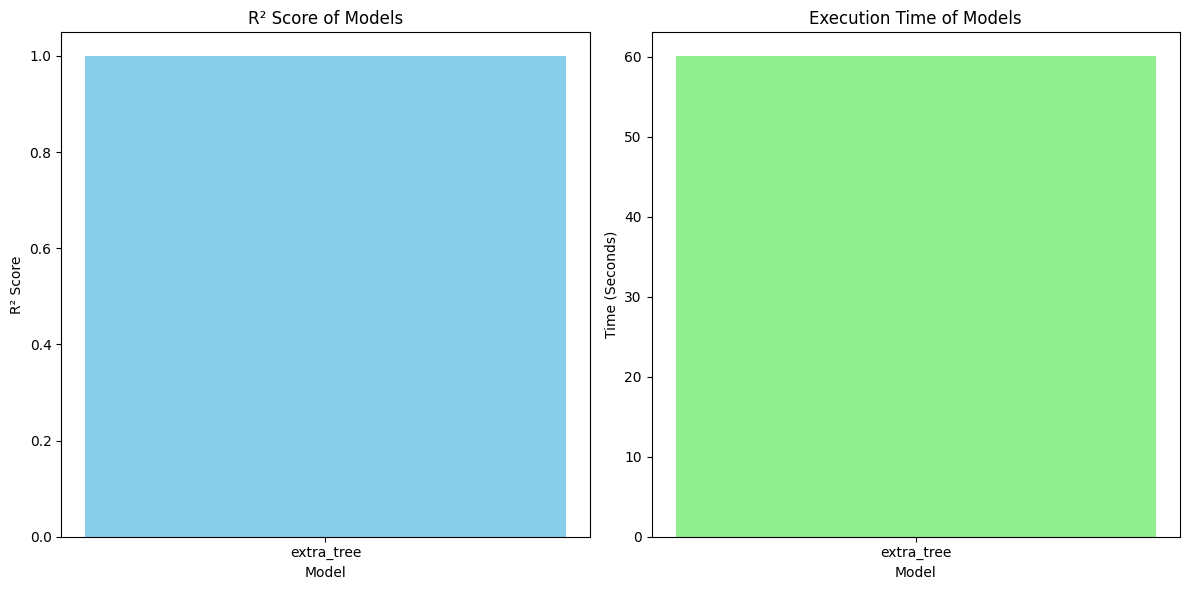

Models Based on R² Score and Execution Time
1. Model: extra_tree, R²: 0.9991, Time: 60.06 seconds


In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from flaml import AutoML

# Create a sample DataFrame
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'energy_consumption': [2.5, 3.1, 3.6, 4.0, 4.5, 5.1, 5.6, 6.0, 6.5, 7.1]  # Target variable
})

# Split features (X) and target (y)
X = df.drop('energy_consumption', axis=1)
y = df['energy_consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean feature names by replacing special characters (if necessary)
X_train.columns = X_train.columns.str.replace(r'[^\w\s]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^\w\s]', '', regex=True)

# List of estimators to evaluate
estimators = ["lgbm", "rf", "xgboost", "extra_tree"]

# Dictionary to store model names, R² scores, and time taken
model_performance = []

for estimator in estimators:
    try:
        # Set the estimator to FLAML
        start_time = time.time()  # Start time
        automl = AutoML()

        # Fit the model and time its execution, setting the correct estimator via config
        automl.fit(X_train, y_train, task="regression", time_budget=60, estimator_list=[estimator])  # Use estimator_list

        end_time = time.time()  # End time

        # Calculate the time taken
        elapsed_time = end_time - start_time

        # Predict on the test set
        y_pred = automl.predict(X_test)

        # Calculate the R² score
        r2 = r2_score(y_test, y_pred)

        # Append the model name, R² score, and time taken
        model_performance.append((estimator, r2, elapsed_time))
    except Exception as e:
        print(f"Error with estimator {estimator}: {e}")

# Sort the models by R² score in descending order
model_performance = sorted(model_performance, key=lambda x: x[1], reverse=True)

# Extract the top models for graph plotting (since only 4 models are evaluated, we show all of them)
model_names = [x[0] for x in model_performance]
r2_scores = [x[1] for x in model_performance]
execution_times = [x[2] for x in model_performance]

# Plotting the R² scores of the models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("R² Score of Models")

# Plotting the Execution Time of the models
plt.subplot(1, 2, 2)
plt.bar(model_names, execution_times, color='lightgreen')
plt.xlabel("Model")
plt.ylabel("Time (Seconds)")
plt.title("Execution Time of Models")

plt.tight_layout()
plt.show()

# Print the models based on R² score and their corresponding time taken
print("Models Based on R² Score and Execution Time")
for i, (model, r2, time_taken) in enumerate(model_performance):
    print(f"{i + 1}. Model: {model}, R²: {r2:.4f}, Time: {time_taken:.2f} seconds")


[flaml.automl.logger: 10-13 17:35:44] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 17:35:44] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 17:35:44] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 17:35:44] {1955} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 10-13 17:35:44] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-13 17:35:44] {2393} INFO - Estimated sufficient time budget=441s. Estimated necessary time budget=0s.
[flaml.automl.logger: 10-13 17:35:44] {2442} INFO -  at 0.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:44] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-13 17:35:44] {2442} INFO -  at 0.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:44] {2258} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 10-13 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.5s,	estimator lgbm's best error=inf,	best estimator None's best error=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 12, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 13, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 14, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 15, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 17, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 0.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 18, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 1.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 19, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 1.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 10-13 17:35:45] {2442} INFO -  at 1.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:45] {2258} INFO - iteration 21, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 23, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 24, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 25, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 27, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 28, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 29, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.6s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 33, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 35, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 1.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 2.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 2.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 38, current learner lgbm
[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 2.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 39, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:46] {2442} INFO -  at 2.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:46] {2258} INFO - iteration 40, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 41, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 43, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 44, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 45, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 47, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.5s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 49, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 50, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 52, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 2.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 3.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 55, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 3.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 56, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 3.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 57, current learner lgbm
[flaml.automl.logger: 10-13 17:35:47] {2442} INFO -  at 3.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:47] {2258} INFO - iteration 58, current learner lgbm
[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 59, current learner lgbm
[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 60, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 61, current learner lgbm
[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 62, current learner lgbm
[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 63, current learner lgbm
[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 64, current learner lgbm
[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.5s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 65, current learner lgbm
[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 66, current learner lgbm
[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 67, current learner lgbm
[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 68, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 3.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 69, current learner lgbm
[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 4.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 70, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:35:48] {2442} INFO -  at 4.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:48] {2258} INFO - iteration 71, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:35:49] {2442} INFO -  at 4.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:49] {2258} INFO - iteration 72, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:35:49] {2442} INFO -  at 4.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:49] {2258} INFO - iteration 73, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:35:49] {2442} INFO -  at 5.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:49] {2258} INFO - iteration 74, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:35:50] {2442} INFO -  at 5.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:50] {2258} INFO - iteration 75, current learner lgbm
[flaml.automl.logger: 10-13 17:35:50] {2442} INFO -  at 5.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:50] {2258} INFO - iteration 76, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:50] {2442} INFO -  at 5.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:50] {2258} INFO - iteration 77, current learner lgbm
[flaml.automl.logger: 10-13 17:35:50] {2442} INFO -  at 5.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:50] {2258} INFO - iteration 78, current learner lgbm
[flaml.automl.logger: 10-13 17:35:50] {2442} INFO -  at 5.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:50] {2258} INFO - iteration 79, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:50] {2442} INFO -  at 5.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:50] {2258} INFO - iteration 80, current learner lgbm
[flaml.automl.logger: 10-13 17:35:50] {2442} INFO -  at 5.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:50] {2258} INFO - iteration 81, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:35:50] {2442} INFO -  at 6.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:50] {2258} INFO - iteration 82, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:35:51] {2442} INFO -  at 6.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:51] {2258} INFO - iteration 83, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:35:51] {2442} INFO -  at 7.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:51] {2258} INFO - iteration 84, current learner lgbm
[flaml.automl.logger: 10-13 17:35:51] {2442} INFO -  at 7.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:51] {2258} INFO - iteration 85, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:35:52] {2442} INFO -  at 7.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:52] {2258} INFO - iteration 86, current learner lgbm
[flaml.automl.logger: 10-13 17:35:52] {2442} INFO -  at 7.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:52] {2258} INFO - iteration 87, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:35:52] {2442} INFO -  at 7.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:52] {2258} INFO - iteration 88, current learner lgbm
[flaml.automl.logger: 10-13 17:35:52] {2442} INFO -  at 7.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:52] {2258} INFO - iteration 89, current learner lgbm
[flaml.automl.logger: 10-13 17:35:52] {2442} INFO -  at 7.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:52] {2258} INFO - iteration 90, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:52] {2442} INFO -  at 8.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:52] {2258} INFO - iteration 91, current learner lgbm
[flaml.automl.logger: 10-13 17:35:52] {2442} INFO -  at 8.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:52] {2258} INFO - iteration 92, current learner lgbm
[flaml.automl.logger: 10-13 17:35:52] {2442} INFO -  at 8.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:52] {2258} INFO - iteration 93, current learner lgbm
[flaml.automl.logger: 10-13 17:35:52] {2442} INFO -  at 8.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:52] {2258} INFO - iteration 94, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.2s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 95, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 96, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 97, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 98, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 99, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 101, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 103, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 104, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 105, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 106, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 107, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 108, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 8.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 109, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 9.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 110, current learner lgbm
[flaml.automl.logger: 10-13 17:35:53] {2442} INFO -  at 9.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:53] {2258} INFO - iteration 111, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 112, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 113, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 114, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 115, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 116, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 117, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 118, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 119, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 120, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 121, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 122, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 123, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 124, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 9.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 125, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 10.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 126, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 10.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 127, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 10.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 128, current learner lgbm
[flaml.automl.logger: 10-13 17:35:54] {2442} INFO -  at 10.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:54] {2258} INFO - iteration 129, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 130, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 131, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 132, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 133, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 134, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 135, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 136, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 138, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.6s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 140, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 141, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 142, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 10.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 143, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 11.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 144, current learner lgbm
[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 11.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 145, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:55] {2442} INFO -  at 11.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:55] {2258} INFO - iteration 146, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 147, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 148, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 149, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 150, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 151, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 152, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 153, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.5s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 155, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 156, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 157, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 158, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 159, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 11.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 160, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 12.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 161, current learner lgbm
[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 12.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 162, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:56] {2442} INFO -  at 12.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:56] {2258} INFO - iteration 163, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 164, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 165, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 166, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 167, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 168, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 169, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 170, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.5s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 171, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 172, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 173, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 174, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 175, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 176, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 177, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 12.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 178, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 13.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 179, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 13.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 180, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 13.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 181, current learner lgbm
[flaml.automl.logger: 10-13 17:35:57] {2442} INFO -  at 13.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:57] {2258} INFO - iteration 182, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 183, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 184, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 185, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 186, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 187, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 188, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 189, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 190, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 191, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 192, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 193, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 194, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 195, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 13.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 196, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 14.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 197, current learner lgbm
[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 14.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 198, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:58] {2442} INFO -  at 14.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:58] {2258} INFO - iteration 199, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 200, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 201, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 202, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 203, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 204, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 205, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 206, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.6s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 207, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 208, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 209, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 210, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 211, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 14.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 212, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 15.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 213, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 15.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 214, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 15.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 215, current learner lgbm
[flaml.automl.logger: 10-13 17:35:59] {2442} INFO -  at 15.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:35:59] {2258} INFO - iteration 216, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 217, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 218, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 219, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 220, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 221, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 222, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 223, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 225, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 226, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 227, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 228, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 229, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 15.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 230, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 16.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 231, current learner lgbm
[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 16.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 232, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:00] {2442} INFO -  at 16.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:00] {2258} INFO - iteration 233, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 234, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 235, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 236, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 237, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 238, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 239, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 240, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 241, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 242, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 243, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 244, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 16.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 245, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 17.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 246, current learner lgbm
[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 17.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 247, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:01] {2442} INFO -  at 17.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:01] {2258} INFO - iteration 248, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 249, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 250, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 251, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 252, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 253, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 254, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 255, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 256, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 257, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.7s,	estimator lgbm's best error=inf,	best estimator None's best error

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 259, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 17.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 260, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 18.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 261, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 18.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:02] {2258} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 10-13 17:36:02] {2442} INFO -  at 18.1s,	estimator lgbm's best error=inf,	best estimator None's best error=in

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:03] {2442} INFO -  at 18.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:03] {2258} INFO - iteration 264, current learner lgbm
[flaml.automl.logger: 10-13 17:36:03] {2442} INFO -  at 18.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:03] {2258} INFO - iteration 265, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:03] {2442} INFO -  at 18.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:03] {2258} INFO - iteration 266, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:03] {2442} INFO -  at 18.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:03] {2258} INFO - iteration 267, current learner lgbm
[flaml.automl.logger: 10-13 17:36:03] {2442} INFO -  at 18.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:03] {2258} INFO - iteration 268, current learner lgbm
[flaml.automl.logger: 10-13 17:36:03] {2442} INFO -  at 18.9s,	estimator lgbm's best error=inf,	best estimator None's b

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:04] {2442} INFO -  at 19.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:04] {2258} INFO - iteration 270, current learner lgbm
[flaml.automl.logger: 10-13 17:36:04] {2442} INFO -  at 19.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:04] {2258} INFO - iteration 271, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:04] {2442} INFO -  at 19.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:04] {2258} INFO - iteration 272, current learner lgbm
[flaml.automl.logger: 10-13 17:36:04] {2442} INFO -  at 19.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:04] {2258} INFO - iteration 273, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:04] {2442} INFO -  at 19.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:04] {2258} INFO - iteration 274, current learner lgbm
[flaml.automl.logger: 10-13 17:36:04] {2442} INFO -  at 20.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:04] {2258} INFO - iteration 275, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:04] {2442} INFO -  at 20.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:04] {2258} INFO - iteration 276, current learner lgbm
[flaml.automl.logger: 10-13 17:36:05] {2442} INFO -  at 20.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:05] {2258} INFO - iteration 277, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:05] {2442} INFO -  at 20.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:05] {2258} INFO - iteration 278, current learner lgbm
[flaml.automl.logger: 10-13 17:36:05] {2442} INFO -  at 20.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:05] {2258} INFO - iteration 279, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:05] {2442} INFO -  at 20.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:05] {2258} INFO - iteration 280, current learner lgbm
[flaml.automl.logger: 10-13 17:36:05] {2442} INFO -  at 20.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:05] {2258} INFO - iteration 281, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:05] {2442} INFO -  at 20.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:05] {2258} INFO - iteration 282, current learner lgbm
[flaml.automl.logger: 10-13 17:36:05] {2442} INFO -  at 20.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:05] {2258} INFO - iteration 283, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:05] {2442} INFO -  at 21.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:05] {2258} INFO - iteration 284, current learner lgbm
[flaml.automl.logger: 10-13 17:36:06] {2442} INFO -  at 21.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:06] {2258} INFO - iteration 285, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:06] {2442} INFO -  at 21.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:06] {2258} INFO - iteration 286, current learner lgbm
[flaml.automl.logger: 10-13 17:36:06] {2442} INFO -  at 21.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:06] {2258} INFO - iteration 287, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:06] {2442} INFO -  at 22.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:07] {2258} INFO - iteration 288, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:07] {2442} INFO -  at 22.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:07] {2258} INFO - iteration 289, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:08] {2442} INFO -  at 23.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:08] {2258} INFO - iteration 290, current learner lgbm
[flaml.automl.logger: 10-13 17:36:08] {2442} INFO -  at 23.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:08] {2258} INFO - iteration 291, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:08] {2442} INFO -  at 23.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:08] {2258} INFO - iteration 292, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:08] {2442} INFO -  at 24.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:08] {2258} INFO - iteration 293, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:09] {2442} INFO -  at 24.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:09] {2258} INFO - iteration 294, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:09] {2442} INFO -  at 24.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:09] {2258} INFO - iteration 295, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:09] {2442} INFO -  at 24.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:09] {2258} INFO - iteration 296, current learner lgbm
[flaml.automl.logger: 10-13 17:36:09] {2442} INFO -  at 25.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:09] {2258} INFO - iteration 297, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:10] {2442} INFO -  at 26.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:10] {2258} INFO - iteration 298, current learner lgbm
[flaml.automl.logger: 10-13 17:36:10] {2442} INFO -  at 26.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:10] {2258} INFO - iteration 299, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:11] {2442} INFO -  at 26.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:11] {2258} INFO - iteration 300, current learner lgbm
[flaml.automl.logger: 10-13 17:36:11] {2442} INFO -  at 26.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:11] {2258} INFO - iteration 301, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:11] {2442} INFO -  at 26.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:11] {2258} INFO - iteration 302, current learner lgbm
[flaml.automl.logger: 10-13 17:36:11] {2442} INFO -  at 26.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:11] {2258} INFO - iteration 303, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:12] {2442} INFO -  at 27.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:12] {2258} INFO - iteration 304, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:12] {2442} INFO -  at 27.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:12] {2258} INFO - iteration 305, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:12] {2442} INFO -  at 28.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:12] {2258} INFO - iteration 306, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:13] {2442} INFO -  at 28.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:13] {2258} INFO - iteration 307, current learner lgbm
[flaml.automl.logger: 10-13 17:36:13] {2442} INFO -  at 28.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:13] {2258} INFO - iteration 308, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:13] {2442} INFO -  at 28.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:13] {2258} INFO - iteration 309, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:13] {2442} INFO -  at 29.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:13] {2258} INFO - iteration 310, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:13] {2442} INFO -  at 29.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:13] {2258} INFO - iteration 311, current learner lgbm
[flaml.automl.logger: 10-13 17:36:14] {2442} INFO -  at 29.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:14] {2258} INFO - iteration 312, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:14] {2442} INFO -  at 29.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:14] {2258} INFO - iteration 313, current learner lgbm
[flaml.automl.logger: 10-13 17:36:14] {2442} INFO -  at 29.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:14] {2258} INFO - iteration 314, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:14] {2442} INFO -  at 29.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:14] {2258} INFO - iteration 315, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:15] {2442} INFO -  at 30.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:15] {2258} INFO - iteration 316, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:15] {2442} INFO -  at 30.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:15] {2258} INFO - iteration 317, current learner lgbm
[flaml.automl.logger: 10-13 17:36:15] {2442} INFO -  at 30.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:15] {2258} INFO - iteration 318, current learner lgbm
[flaml.automl.logge

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:15] {2442} INFO -  at 31.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:15] {2258} INFO - iteration 320, current learner lgbm
[flaml.automl.logger: 10-13 17:36:15] {2442} INFO -  at 31.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:15] {2258} INFO - iteration 321, current learner lgbm
[flaml.automl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:16] {2442} INFO -  at 31.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:16] {2258} INFO - iteration 324, current learner lgbm
[flaml.automl.logger: 10-13 17:36:16] {2442} INFO -  at 31.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:16] {2258} INFO - iteration 325, current learner lgbm
[flam

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:16] {2442} INFO -  at 31.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:16] {2258} INFO - iteration 327, current learner lgbm
[flaml.automl.logger: 10-13 17:36:16] {2442} INFO -  at 31.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:16] {2258} INFO - iteration 328, current learner lgbm

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:16] {2442} INFO -  at 31.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:16] {2258} INFO - iteration 330, current learner lgbm
[flaml.automl.logger: 10-13 17:36:16] {2442} INFO -  at 31.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:16] {2258} INFO - iteration 331, current learne

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:16] {2442} INFO -  at 32.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:16] {2258} INFO - iteration 332, current learner lgbm
[flaml.automl.logger: 10-13 17:36:16] {2442} INFO -  at 32.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:16] {2258} INFO - iteration 333, current le

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:17] {2258} INFO - iteration 334, current learner lgbm
[flaml.automl.logger: 10-13 17:36:17] {2442} INFO -  at 32.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:17] {2258} INFO - iteration 335, current learner lgbm
[flaml.automl.logger: 10-13 17:36:17] {2442} INFO -  at 32.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:17] {2442} INFO -  at 32.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:17] {2258} INFO - iteration 338, current learner lgbm
[flaml.automl.logger: 10-13 17:36:17] {2442} INFO -  at 32.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:17] {2258} INFO - iteration 339

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:17] {2258} INFO - iteration 341, current learner lgbm
[flaml.automl.logger: 10-13 17:36:17] {2442} INFO -  at 32.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:17] {2258} INFO - iteration 342, current learner lgbm
[flaml.automl.logger: 10-13 17:36:17] {2442} INFO -  at 32.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:17] {2442} INFO -  at 33.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:17] {2258} INFO - iteration 345, current learner lgbm
[flaml.automl.logger: 10-13 17:36:18] {2442} INFO -  at 33.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:18] {2258} INFO -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:18] {2442} INFO -  at 33.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:18] {2258} INFO - iteration 347, current learner lgbm
[flaml.automl.logger: 10-13 17:36:18] {2442} INFO -  at 33.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:18] {2258} IN

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:18] {2442} INFO -  at 33.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:18] {2258} INFO - iteration 349, current learner lgbm
[flaml.automl.logger: 10-13 17:36:18] {2442} INFO -  at 33.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:18] {2258

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:18] {2442} INFO -  at 33.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:18] {2258} INFO - iteration 351, current learner lgbm
[flaml.automl.logger: 10-13 17:36:18] {2442} INFO -  at 33.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:18] {

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:18] {2442} INFO -  at 34.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:18] {2258} INFO - iteration 353, current learner lgbm
[flaml.automl.logger: 10-13 17:36:18] {2442} INFO -  at 34.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:19] {2442} INFO -  at 34.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:19] {2258} INFO - iteration 355, current learner lgbm
[flaml.automl.logger: 10-13 17:36:19] {2442} INFO -  at 34.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:19] {2442} INFO -  at 34.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:19] {2258} INFO - iteration 357, current learner lgbm
[flaml.automl.logger: 10-13 17:36:19] {2442} INFO -  at 34.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:19] {2442} INFO -  at 35.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:19] {2258} INFO - iteration 359, current learner lgbm
[flaml.automl.logger: 10-13 17:36:19] {2442} INFO -  at 35.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:20] {2442} INFO -  at 35.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:20] {2258} INFO - iteration 361, current learner lgbm
[flaml.automl.logger: 10-13 17:36:20] {2442} INFO -  at 35.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logge

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:20] {2442} INFO -  at 35.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:20] {2258} INFO - iteration 363, current learner lgbm
[flaml.automl.logger: 10-13 17:36:20] {2442} INFO -  at 35.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:20] {2442} INFO -  at 35.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:20] {2258} INFO - iteration 365, current learner lgbm
[flaml.automl.logger: 10-13 17:36:20] {2442} INFO -  at 35.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.auto

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:20] {2442} INFO -  at 36.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:20] {2258} INFO - iteration 367, current learner lgbm
[flaml.automl.logger: 10-13 17:36:20] {2442} INFO -  at 36.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:21] {2442} INFO -  at 36.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:21] {2258} INFO - iteration 369, current learner lgbm
[flaml.automl.logger: 10-13 17:36:21] {2442} INFO -  at 36.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[fl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:21] {2442} INFO -  at 36.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:21] {2258} INFO - iteration 371, current learner lgbm
[flaml.automl.logger: 10-13 17:36:21] {2442} INFO -  at 36.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:21] {2442} INFO -  at 36.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:21] {2258} INFO - iteration 373, current learner lgbm
[flaml.automl.logger: 10-13 17:36:21] {2442} INFO -  at 36.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best mo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:21] {2442} INFO -  at 37.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:21] {2258} INFO - iteration 375, current learner lgbm
[flaml.automl.logger: 10-13 17:36:21] {2442} INFO -  at 37.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the bes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:22] {2442} INFO -  at 37.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:22] {2258} INFO - iteration 377, current learner lgbm
[flaml.automl.logger: 10-13 17:36:22] {2442} INFO -  at 37.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:22] {2442} INFO -  at 37.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:22] {2258} INFO - iteration 379, current learner lgbm
[flaml.automl.logger: 10-13 17:36:22] {2442} INFO -  at 37.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:22] {2442} INFO -  at 37.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:22] {2258} INFO - iteration 381, current learner lgbm
[flaml.automl.logger: 10-13 17:36:22] {2442} INFO -  at 37.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:22] {2442} INFO -  at 37.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:22] {2258} INFO - iteration 383, current learner lgbm
[flaml.automl.logger: 10-13 17:36:22] {2442} INFO -  at 38.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:23] {2442} INFO -  at 38.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:23] {2258} INFO - iteration 385, current learner lgbm
[flaml.automl.logger: 10-13 17:36:23] {2442} INFO -  at 38.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:23] {2442} INFO -  at 38.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:23] {2258} INFO - iteration 387, current learner lgbm
[flaml.automl.logger: 10-13 17:36:23] {2442} INFO -  at 38.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the ti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:23] {2442} INFO -  at 38.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:23] {2258} INFO - iteration 389, current learner lgbm
[flaml.automl.logger: 10-13 17:36:23] {2442} INFO -  at 39.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times th

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:23] {2442} INFO -  at 39.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:23] {2258} INFO - iteration 391, current learner lgbm
[flaml.automl.logger: 10-13 17:36:24] {2442} INFO -  at 39.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 time

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:24] {2442} INFO -  at 39.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:24] {2258} INFO - iteration 393, current learner lgbm
[flaml.automl.logger: 10-13 17:36:24] {2442} INFO -  at 39.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:24] {2442} INFO -  at 39.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:24] {2258} INFO - iteration 396, current learner lgbm
[flaml.automl.logger: 10-13 17:36:24] {2442} INFO -  at 39.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:24] {2442} INFO -  at 39.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:24] {2258} INFO - iteration 399, current learner lgbm
[flaml.automl.logger: 10-13 17:36:24] {2442} INFO -  at 39.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:24] {2442} INFO -  at 40.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:24] {2258} INFO - iteration 401, current learner lgbm
[flaml.automl.logger: 10-13 17:36:24] {2442} INFO -  at 40.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:25] {2442} INFO -  at 40.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:25] {2258} INFO - iteration 404, current learner lgbm
[flaml.automl.logger: 10-13 17:36:25] {2442} INFO -  at 40.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:25] {2442} INFO -  at 40.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:25] {2258} INFO - iteration 407, current learner lgbm
[flaml.automl.logger: 10-13 17:36:25] {2442} INFO -  at 40.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:25] {2442} INFO -  at 40.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:25] {2258} INFO - iteration 410, current learner lgbm
[flaml.automl.logger: 10-13 17:36:25] {2442} INFO -  at 40.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:25] {2442} INFO -  at 41.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:25] {2258} INFO - iteration 413, current learner lgbm
[flaml.automl.logger: 10-13 17:36:25] {2442} INFO -  at 41.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:26] {2442} INFO -  at 41.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:26] {2258} INFO - iteration 416, current learner lgbm
[flaml.automl.logger: 10-13 17:36:26] {2442} INFO -  at 41.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:26] {2442} INFO -  at 41.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:26] {2258} INFO - iteration 419, current learner lgbm
[flaml.automl.logger: 10-13 17:36:26] {2442} INFO -  at 41.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:26] {2442} INFO -  at 41.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:26] {2258} INFO - iteration 422, current learner lgbm
[flaml.automl.logger: 10-13 17:36:26] {2442} INFO -  at 41.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:26] {2442} INFO -  at 42.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:26] {2258} INFO - iteration 425, current learner lgbm
[flaml.automl.logger: 10-13 17:36:26] {2442} INFO -  at 42.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:27] {2442} INFO -  at 42.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:27] {2258} INFO - iteration 428, current learner lgbm
[flaml.automl.logger: 10-13 17:36:27] {2442} INFO -  at 42.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:27] {2442} INFO -  at 42.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:27] {2258} INFO - iteration 431, current learner lgbm
[flaml.automl.logger: 10-13 17:36:27] {2442} INFO -  at 42.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:27] {2442} INFO -  at 42.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:27] {2258} INFO - iteration 434, current learner lgbm
[flaml.automl.logger: 10-13 17:36:27] {2442} INFO -  at 42.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:27] {2442} INFO -  at 42.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:27] {2258} INFO - iteration 436, current learner lgbm
[flaml.automl.logger: 10-13 17:36:27] {2442} INFO -  at 43.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:27] {2258} INFO - iteration 438, current learner lgbm
[flaml.automl.logger: 10-13 17:36:27] {2442} INFO -  at 43.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:28] {2442} INFO -  at 43.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:28] {2258} INFO - iteration 442, current learner lgbm
[flaml.automl.logger: 10-13 17:36:28] {2442} INFO -  at 43.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:28] {2442} INFO -  at 43.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:28] {2258} INFO - iteration 445, current learner lgbm
[flaml.automl.logger: 10-13 17:36:28] {2442} INFO -  at 43.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:28] {2442} INFO -  at 43.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:28] {2258} INFO - iteration 448, current learner lgbm
[flaml.automl.logger: 10-13 17:36:28] {2442} INFO -  at 43.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:28] {2442} INFO -  at 44.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:28] {2258} INFO - iteration 450, current learner lgbm
[flaml.automl.logger: 10-13 17:36:28] {2442} INFO -  at 44.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:29] {2442} INFO -  at 44.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:29] {2258} INFO - iteration 453, current learner lgbm
[flaml.automl.logger: 10-13 17:36:29] {2442} INFO -  at 44.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:29] {2442} INFO -  at 44.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:29] {2258} INFO - iteration 456, current learner lgbm
[flaml.automl.logger: 10-13 17:36:29] {2442} INFO -  at 44.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:29] {2442} INFO -  at 44.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:29] {2258} INFO - iteration 459, current learner lgbm
[flaml.automl.logger: 10-13 17:36:29] {2442} INFO -  at 44.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:29] {2442} INFO -  at 45.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:29] {2258} INFO - iteration 461, current learner lgbm
[flaml.automl.logger: 10-13 17:36:29] {2442} INFO -  at 45.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:29] {2442} INFO -  at 45.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:29] {2258} INFO - iteration 463, current learner lgbm
[flaml.automl.logger: 10-13 17:36:30] {2442} INFO -  at 45.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:30] {2442} INFO -  at 45.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:30] {2258} INFO - iteration 466, current learner lgbm
[flaml.automl.logger: 10-13 17:36:30] {2442} INFO -  at 45.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:30] {2442} INFO -  at 45.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:30] {2258} INFO - iteration 469, current learner lgbm
[flaml.automl.logger: 10-13 17:36:30] {2442} INFO -  at 45.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:30] {2442} INFO -  at 45.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:30] {2258} INFO - iteration 472, current learner lgbm
[flaml.automl.logger: 10-13 17:36:30] {2442} INFO -  at 46.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:30] {2442} INFO -  at 46.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:30] {2258} INFO - iteration 475, current learner lgbm
[flaml.automl.logger: 10-13 17:36:31] {2442} INFO -  at 46.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:31] {2442} INFO -  at 46.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:31] {2258} INFO - iteration 478, current learner lgbm
[flaml.automl.logger: 10-13 17:36:31] {2442} INFO -  at 46.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:31] {2442} INFO -  at 46.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:31] {2258} INFO - iteration 481, current learner lgbm
[flaml.automl.logger: 10-13 17:36:31] {2442} INFO -  at 46.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:31] {2442} INFO -  at 46.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:31] {2258} INFO - iteration 484, current learner lgbm
[flaml.automl.logger: 10-13 17:36:31] {2442} INFO -  at 47.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:31] {2442} INFO -  at 47.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:31] {2258} INFO - iteration 486, current learner lgbm
[flaml.automl.logger: 10-13 17:36:31] {2442} INFO -  at 47.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:32] {2442} INFO -  at 47.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:32] {2258} INFO - iteration 488, current learner lgbm
[flaml.automl.logger: 10-13 17:36:32] {2442} INFO -  at 47.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:32] {2442} INFO -  at 47.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:32] {2258} INFO - iteration 491, current learner lgbm
[flaml.automl.logger: 10-13 17:36:32] {2442} INFO -  at 47.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:32] {2442} INFO -  at 47.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:32] {2258} INFO - iteration 494, current learner lgbm
[flaml.automl.logger: 10-13 17:36:32] {2442} INFO -  at 47.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:32] {2442} INFO -  at 47.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:32] {2258} INFO - iteration 496, current learner lgbm
[flaml.automl.logger: 10-13 17:36:32] {2442} INFO -  at 48.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:33] {2442} INFO -  at 48.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:33] {2258} INFO - iteration 498, current learner lgbm
[flaml.automl.logger: 10-13 17:36:33] {2442} INFO -  at 48.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:33] {2442} INFO -  at 48.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:33] {2258} INFO - iteration 501, current learner lgbm
[flaml.automl.logger: 10-13 17:36:33] {2442} INFO -  at 48.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:33] {2442} INFO -  at 48.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:33] {2258} INFO - iteration 504, current learner lgbm
[flaml.automl.logger: 10-13 17:36:33] {2442} INFO -  at 48.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:33] {2442} INFO -  at 48.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:33] {2258} INFO - iteration 507, current learner lgbm
[flaml.automl.logger: 10-13 17:36:33] {2442} INFO -  at 49.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:33] {2442} INFO -  at 49.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:33] {2258} INFO - iteration 509, current learner lgbm
[flaml.automl.logger: 10-13 17:36:34] {2442} INFO -  at 49.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:34] {2442} INFO -  at 49.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:34] {2258} INFO - iteration 512, current learner lgbm
[flaml.automl.logger: 10-13 17:36:34] {2442} INFO -  at 49.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:34] {2442} INFO -  at 49.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:34] {2258} INFO - iteration 514, current learner lgbm
[flaml.automl.logger: 10-13 17:36:34] {2442} INFO -  at 49.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:34] {2442} INFO -  at 50.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:34] {2258} INFO - iteration 516, current learner lgbm
[flaml.automl.logger: 10-13 17:36:35] {2442} INFO -  at 50.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:35] {2442} INFO -  at 50.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:35] {2258} INFO - iteration 518, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:35] {2442} INFO -  at 50.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:35] {2258} INFO - iteration 519, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:35] {2442} INFO -  at 50.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:35] {2258} INFO - iteration 520, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:36] {2442} INFO -  at 51.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:36] {2258} INFO - iteration 521, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:36] {2442} INFO -  at 51.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:36] {2258} INFO - iteration 522, current learner lgbm
[flaml.automl.logger: 10-13 17:36:36] {2442} INFO -  at 51.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:36] {2442} INFO -  at 51.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:36] {2258} INFO - iteration 524, current learner lgbm
[flaml.automl.logger: 10-13 17:36:36] {2442} INFO -  at 51.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:36] {2442} INFO -  at 52.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:36] {2258} INFO - iteration 526, current learner lgbm
[flaml.automl.logger: 10-13 17:36:36] {2442} INFO -  at 52.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:37] {2442} INFO -  at 52.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:37] {2258} INFO - iteration 528, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:37] {2442} INFO -  at 52.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:37] {2258} INFO - iteration 529, current learner lgbm
[flaml.automl.logger: 10-13 17:36:37] {2442} INFO -  at 52.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:37] {2442} INFO -  at 53.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:37] {2258} INFO - iteration 531, current learner lgbm
[flaml.automl.logger: 10-13 17:36:37] {2442} INFO -  at 53.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:38] {2442} INFO -  at 53.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:38] {2258} INFO - iteration 533, current learner lgbm
[flaml.automl.logger: 10-13 17:36:38] {2442} INFO -  at 53.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:38] {2442} INFO -  at 53.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:38] {2258} INFO - iteration 535, current learner lgbm
[flaml.automl.logger: 10-13 17:36:38] {2442} INFO -  at 53.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceed

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:38] {2442} INFO -  at 53.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:38] {2258} INFO - iteration 537, current learner lgbm
[flaml.automl.logger: 10-13 17:36:38] {2442} INFO -  at 53.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exce

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:39] {2442} INFO -  at 54.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:39] {2258} INFO - iteration 539, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:39] {2442} INFO -  at 54.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:39] {2258} INFO - iteration 540, current learner lgbm
[flaml.automl.logger: 10-13 17:36:39] {2442} INFO -  at 54.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time e

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:39] {2442} INFO -  at 55.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:39] {2258} INFO - iteration 543, current learner lgbm
[flaml.automl.logger: 10-13 17:36:39] {2442} INFO -  at 55.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search tim

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:40] {2442} INFO -  at 55.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:40] {2258} INFO - iteration 546, current learner lgbm
[flaml.automl.logger: 10-13 17:36:40] {2442} INFO -  at 55.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:40] {2442} INFO -  at 55.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:40] {2258} INFO - iteration 549, current learner lgbm
[flaml.automl.logger: 10-13 17:36:40] {2442} INFO -  at 55.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total sear

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:40] {2442} INFO -  at 55.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:40] {2258} INFO - iteration 552, current learner lgbm
[flaml.automl.logger: 10-13 17:36:40] {2442} INFO -  at 55.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:40] {2442} INFO -  at 55.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:40] {2258} INFO - iteration 554, current learner lgbm
[flaml.automl.logger: 10-13 17:36:40] {2442} INFO -  at 56.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:40] {2442} INFO -  at 56.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:40] {2258} INFO - iteration 556, current learner lgbm
[flaml.automl.logger: 10-13 17:36:41] {2442} INFO -  at 56.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the tot

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:41] {2442} INFO -  at 56.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:41] {2258} INFO - iteration 559, current learner lgbm
[flaml.automl.logger: 10-13 17:36:41] {2442} INFO -  at 56.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:41] {2442} INFO -  at 56.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:41] {2258} INFO - iteration 562, current learner lgbm
[flaml.automl.logger: 10-13 17:36:41] {2442} INFO -  at 56.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:41] {2442} INFO -  at 56.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:41] {2258} INFO - iteration 565, current learner lgbm
[flaml.automl.logger: 10-13 17:36:41] {2442} INFO -  at 57.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, an

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:42] {2442} INFO -  at 57.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:42] {2258} INFO - iteration 568, current learner lgbm
[flaml.automl.logger: 10-13 17:36:42] {2442} INFO -  at 57.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:42] {2442} INFO -  at 57.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:42] {2258} INFO - iteration 571, current learner lgbm
[flaml.automl.logger: 10-13 17:36:42] {2442} INFO -  at 57.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:42] {2459} WARNING - All estimator hyperparameters local search has converged at least on

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:42] {2442} INFO -  at 57.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:42] {2258} INFO - iteration 574, current learner lgbm
[flaml.automl.logger: 10-13 17:36:42] {2442} INFO -  at 57.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:42] {2459} WARNING - All estimator hyperparameters local search has converged at least

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:42] {2442} INFO -  at 58.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:42] {2258} INFO - iteration 577, current learner lgbm
[flaml.automl.logger: 10-13 17:36:42] {2442} INFO -  at 58.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:42] {2459} WARNING - All estimator hyperparameters local search has converged at le

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:42] {2258} INFO - iteration 579, current learner lgbm
[flaml.automl.logger: 10-13 17:36:43] {2442} INFO -  at 58.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:43] {2258} INFO - iteration 580, current learner lgbm
[flaml.automl.logger: 10-13 17:36:43] {2442} INFO -  at 58.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:43] {2442} INFO -  at 58.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:43] {2258} INFO - iteration 583, current learner lgbm
[flaml.automl.logger: 10-13 17:36:43] {2442} INFO -  at 58.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:43] {2459} WARNING - All estimator hyperparameters local search has converged

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:43] {2258} INFO - iteration 585, current learner lgbm
[flaml.automl.logger: 10-13 17:36:43] {2442} INFO -  at 58.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:43] {2258} INFO - iteration 588, current learner lgbm
[flaml.automl.logger: 10-13 17:36:43] {2442} INFO -  at 59.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:44] {2442} INFO -  at 59.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:44] {2258} INFO - iteration 592, current learner lgbm
[flaml.automl.logger: 10-13 17:36:44] {2442} INFO -  at 59.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:44] {2459} WARNING - All estimator hyperparameters local search has 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 17:36:44] {2442} INFO -  at 59.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:44] {2258} INFO - iteration 595, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:44] {2442} INFO -  at 60.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:44] {2258} INFO - iteration 596, current learner lgbm
[flaml.automl.logger: 10-13 17:36:44] {2442} INFO -  at 60.0s,	estimator lgbm's best error=4.0044,	best estimator lgbm's best error=4.0044
Error with estimator lgbm: int too large to convert to float
[flaml.automl.logger: 10-13 17:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:44] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 17:36:44] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 17:36:44] {1955} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl.logger: 10-13 17:36:44] {2258} INFO - iteration 0, current learner rf


/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:36:45] {2393} INFO - Estimated sufficient time budget=5555s. Estimated necessary time budget=6s.
[flaml.automl.logger: 10-13 17:36:45] {2442} INFO -  at 0.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:45] {2258} INFO - iteration 1, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:36:45] {2442} INFO -  at 1.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:45] {2258} INFO - iteration 2, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:46] {2442} INFO -  at 1.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:46] {2258} INFO - iteration 3, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:46] {2442} INFO -  at 1.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:46] {2258} INFO - iteration 4, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:47] {2442} INFO -  at 2.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:47] {2258} INFO - iteration 5, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:47] {2442} INFO -  at 2.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:47] {2258} INFO - iteration 6, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:47] {2442} INFO -  at 3.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:48] {2258} INFO - iteration 7, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:36:48] {2442} INFO -  at 3.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:48] {2258} INFO - iteration 8, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:48] {2442} INFO -  at 3.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:48] {2258} INFO - iteration 9, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:48] {2442} INFO -  at 4.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:48] {2258} INFO - iteration 10, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:36:49] {2442} INFO -  at 4.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:49] {2258} INFO - iteration 11, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:49] {2442} INFO -  at 4.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:49] {2258} INFO - iteration 12, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:49] {2442} INFO -  at 4.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:49] {2258} INFO - iteration 13, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:36:49] {2442} INFO -  at 4.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:49] {2258} INFO - iteration 14, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:50] {2442} INFO -  at 5.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:50] {2258} INFO - iteration 15, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:50] {2442} INFO -  at 5.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:50] {2258} INFO - iteration 16, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:50] {2442} INFO -  at 5.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:50] {2258} INFO - iteration 17, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:50] {2442} INFO -  at 6.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:50] {2258} INFO - iteration 18, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:51] {2442} INFO -  at 6.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:51] {2258} INFO - iteration 19, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:51] {2442} INFO -  at 6.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:51] {2258} INFO - iteration 20, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:51] {2442} INFO -  at 6.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:51] {2258} INFO - iteration 21, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:36:52] {2442} INFO -  at 7.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:52] {2258} INFO - iteration 22, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:52] {2442} INFO -  at 7.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:52] {2258} INFO - iteration 23, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:52] {2442} INFO -  at 7.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:52] {2258} INFO - iteration 24, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:52] {2442} INFO -  at 8.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:52] {2258} INFO - iteration 25, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:53] {2442} INFO -  at 8.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:53] {2258} INFO - iteration 26, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:53] {2442} INFO -  at 8.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:53] {2258} INFO - iteration 27, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:53] {2442} INFO -  at 8.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:53] {2258} INFO - iteration 28, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:53] {2442} INFO -  at 9.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:53] {2258} INFO - iteration 29, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:36:54] {2442} INFO -  at 9.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:54] {2258} INFO - iteration 30, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:54] {2442} INFO -  at 9.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:54] {2258} INFO - iteration 31, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:36:54] {2442} INFO -  at 9.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:54] {2258} INFO - iteration 32, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:54] {2442} INFO -  at 10.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:54] {2258} INFO - iteration 33, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:55] {2442} INFO -  at 10.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:55] {2258} INFO - iteration 34, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:55] {2442} INFO -  at 10.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:55] {2258} INFO - iteration 35, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:55] {2442} INFO -  at 10.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:55] {2258} INFO - iteration 36, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:36:55] {2442} INFO -  at 10.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:55] {2258} INFO - iteration 37, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:56] {2442} INFO -  at 11.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:56] {2258} INFO - iteration 38, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:56] {2442} INFO -  at 11.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:56] {2258} INFO - iteration 39, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:56] {2442} INFO -  at 11.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:56] {2258} INFO - iteration 40, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:56] {2442} INFO -  at 11.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:56] {2258} INFO - iteration 41, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:56] {2442} INFO -  at 12.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:56] {2258} INFO - iteration 42, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:57] {2442} INFO -  at 12.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:57] {2258} INFO - iteration 43, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:36:57] {2442} INFO -  at 12.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:57] {2258} INFO - iteration 44, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:57] {2442} INFO -  at 12.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:57] {2258} INFO - iteration 45, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:57] {2442} INFO -  at 13.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:57] {2258} INFO - iteration 46, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:58] {2442} INFO -  at 13.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:58] {2258} INFO - iteration 47, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:36:58] {2442} INFO -  at 13.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:58] {2258} INFO - iteration 48, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:36:58] {2442} INFO -  at 13.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:58] {2258} INFO - iteration 49, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:58] {2442} INFO -  at 13.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:58] {2258} INFO - iteration 50, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:58] {2442} INFO -  at 14.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:58] {2258} INFO - iteration 51, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:59] {2442} INFO -  at 14.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:59] {2258} INFO - iteration 52, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:36:59] {2442} INFO -  at 14.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:59] {2258} INFO - iteration 53, current learner rf
[flaml.automl.logger: 10-13 17:36:59] {2442} INFO -  at 14.7s,	estimator rf's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:36:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:59] {2258} INFO - iteration 54, current learner rf
[flaml.automl.logger: 10-13 17:36:59] {2442} INFO -  at 15.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:36:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:36:59] {2258} INFO - iteration 55, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:00] {2442} INFO -  at 15.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:00] {2258} INFO - iteration 56, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:00] {2442} INFO -  at 15.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:00] {2258} INFO - iteration 57, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:00] {2442} INFO -  at 15.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:00] {2258} INFO - iteration 58, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:00] {2442} INFO -  at 15.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:00] {2258} INFO - iteration 59, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:00] {2442} INFO -  at 16.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:01] {2258} INFO - iteration 60, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:01] {2442} INFO -  at 16.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:01] {2258} INFO - iteration 61, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:01] {2442} INFO -  at 16.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:01] {2258} INFO - iteration 62, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:01] {2442} INFO -  at 16.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:01] {2258} INFO - iteration 63, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:01] {2442} INFO -  at 17.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:01] {2258} INFO - iteration 64, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:02] {2442} INFO -  at 17.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:02] {2258} INFO - iteration 65, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:02] {2442} INFO -  at 17.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:02] {2258} INFO - iteration 66, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:02] {2442} INFO -  at 17.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:02] {2258} INFO - iteration 67, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:02] {2442} INFO -  at 18.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:02] {2258} INFO - iteration 68, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:03] {2442} INFO -  at 18.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:03] {2258} INFO - iteration 69, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:03] {2442} INFO -  at 18.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:03] {2258} INFO - iteration 70, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:03] {2442} INFO -  at 18.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:03] {2258} INFO - iteration 71, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:03] {2442} INFO -  at 19.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:03] {2258} INFO - iteration 72, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:04] {2442} INFO -  at 19.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:04] {2258} INFO - iteration 73, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:04] {2442} INFO -  at 19.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:04] {2258} INFO - iteration 74, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:04] {2442} INFO -  at 19.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:04] {2258} INFO - iteration 75, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:04] {2442} INFO -  at 20.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:05] {2258} INFO - iteration 76, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:05] {2442} INFO -  at 20.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:05] {2258} INFO - iteration 77, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:05] {2442} INFO -  at 20.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:05] {2258} INFO - iteration 78, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:05] {2442} INFO -  at 21.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:05] {2258} INFO - iteration 79, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:06] {2442} INFO -  at 21.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:06] {2258} INFO - iteration 80, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:06] {2442} INFO -  at 21.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:06] {2258} INFO - iteration 81, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:06] {2442} INFO -  at 21.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:06] {2258} INFO - iteration 82, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:06] {2442} INFO -  at 22.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:06] {2258} INFO - iteration 83, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:07] {2442} INFO -  at 22.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:07] {2258} INFO - iteration 84, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:07] {2442} INFO -  at 22.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:07] {2258} INFO - iteration 85, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:07] {2442} INFO -  at 22.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:07] {2258} INFO - iteration 86, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:07] {2442} INFO -  at 23.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:07] {2258} INFO - iteration 87, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:08] {2442} INFO -  at 23.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:08] {2258} INFO - iteration 88, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:08] {2442} INFO -  at 23.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:08] {2258} INFO - iteration 89, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:08] {2442} INFO -  at 23.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:08] {2258} INFO - iteration 90, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:08] {2442} INFO -  at 23.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:08] {2258} INFO - iteration 91, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:09] {2442} INFO -  at 24.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:09] {2258} INFO - iteration 92, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:09] {2442} INFO -  at 24.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:09] {2258} INFO - iteration 93, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:09] {2442} INFO -  at 24.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:09] {2258} INFO - iteration 94, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:09] {2442} INFO -  at 24.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:09] {2258} INFO - iteration 95, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:09] {2442} INFO -  at 25.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:09] {2258} INFO - iteration 96, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:10] {2442} INFO -  at 25.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:10] {2258} INFO - iteration 97, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:10] {2442} INFO -  at 25.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:10] {2258} INFO - iteration 98, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:10] {2442} INFO -  at 25.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:10] {2258} INFO - iteration 99, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:10] {2442} INFO -  at 26.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:10] {2258} INFO - iteration 100, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:11] {2442} INFO -  at 26.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:11] {2258} INFO - iteration 101, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:11] {2442} INFO -  at 26.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:11] {2258} INFO - iteration 102, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:11] {2442} INFO -  at 26.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:11] {2258} INFO - iteration 103, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:11] {2442} INFO -  at 26.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:11] {2258} INFO - iteration 104, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:11] {2442} INFO -  at 27.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:11] {2258} INFO - iteration 105, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:12] {2442} INFO -  at 27.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:12] {2258} INFO - iteration 106, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:12] {2442} INFO -  at 27.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:12] {2258} INFO - iteration 107, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:12] {2442} INFO -  at 27.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:12] {2258} INFO - iteration 108, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:12] {2442} INFO -  at 28.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:12] {2258} INFO - iteration 109, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:13] {2442} INFO -  at 28.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:13] {2258} INFO - iteration 110, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:13] {2442} INFO -  at 28.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:13] {2258} INFO - iteration 111, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:13] {2442} INFO -  at 28.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:13] {2258} INFO - iteration 112, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:13] {2442} INFO -  at 29.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:13] {2258} INFO - iteration 113, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:14] {2442} INFO -  at 29.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:14] {2258} INFO - iteration 114, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:37:14] {2442} INFO -  at 29.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:14] {2258} INFO - iteration 115, current learner rf
[flaml.automl.logger: 10-13 17:37:14] {2442} INFO -  at 29.6s,	estimator rf's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:37:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:14] {2258} INFO - iteration 116, current learner rf


/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:14] {2442} INFO -  at 29.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:14] {2258} INFO - iteration 117, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:14] {2442} INFO -  at 30.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:15] {2258} INFO - iteration 118, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:15] {2442} INFO -  at 30.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:15] {2258} INFO - iteration 119, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:15] {2442} INFO -  at 30.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:15] {2258} INFO - iteration 120, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:15] {2442} INFO -  at 30.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:15] {2258} INFO - iteration 121, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:15] {2442} INFO -  at 31.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:15] {2258} INFO - iteration 122, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:16] {2442} INFO -  at 31.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:16] {2258} INFO - iteration 123, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:16] {2442} INFO -  at 31.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:16] {2258} INFO - iteration 124, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:16] {2442} INFO -  at 31.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:16] {2258} INFO - iteration 125, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:17] {2442} INFO -  at 32.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:17] {2258} INFO - iteration 126, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:17] {2442} INFO -  at 32.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:17] {2258} INFO - iteration 127, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:17] {2442} INFO -  at 32.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:17] {2258} INFO - iteration 128, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:17] {2442} INFO -  at 33.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:17] {2258} INFO - iteration 129, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:18] {2442} INFO -  at 33.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:18] {2258} INFO - iteration 130, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:18] {2442} INFO -  at 33.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:18] {2258} INFO - iteration 131, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:18] {2442} INFO -  at 34.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:18] {2258} INFO - iteration 132, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:19] {2442} INFO -  at 34.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:19] {2258} INFO - iteration 133, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:19] {2442} INFO -  at 34.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:19] {2258} INFO - iteration 134, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:19] {2442} INFO -  at 35.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:19] {2258} INFO - iteration 135, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:20] {2442} INFO -  at 35.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:20] {2258} INFO - iteration 136, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:20] {2442} INFO -  at 35.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:20] {2258} INFO - iteration 137, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:21] {2442} INFO -  at 36.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:21] {2258} INFO - iteration 138, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:22] {2442} INFO -  at 37.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:22] {2258} INFO - iteration 139, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:22] {2442} INFO -  at 37.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:22] {2258} INFO - iteration 140, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:23] {2442} INFO -  at 38.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:23] {2258} INFO - iteration 141, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:23] {2442} INFO -  at 38.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:23] {2258} INFO - iteration 142, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:24] {2442} INFO -  at 39.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:24] {2258} INFO - iteration 143, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:24] {2442} INFO -  at 39.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:24] {2258} INFO - iteration 144, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:25] {2442} INFO -  at 40.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:25] {2258} INFO - iteration 145, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:25] {2442} INFO -  at 40.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:25] {2258} INFO - iteration 146, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:25] {2442} INFO -  at 40.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:25] {2258} INFO - iteration 147, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:25] {2442} INFO -  at 40.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:25] {2258} INFO - iteration 148, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:25] {2442} INFO -  at 41.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:25] {2258} INFO - iteration 149, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:26] {2442} INFO -  at 41.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:26] {2258} INFO - iteration 150, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:26] {2442} INFO -  at 41.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:26] {2258} INFO - iteration 151, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:26] {2442} INFO -  at 41.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:26] {2258} INFO - iteration 152, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:26] {2442} INFO -  at 41.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:26] {2258} INFO - iteration 153, current learner rf
[flaml.automl.logger: 10-13 17:37:26] {2442} INFO -  at 42.1s,	estimator rf's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:37:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:27] {2258} INFO - iteration 154, current learner rf
[flaml.automl.logger: 10-13 17:37:27] {2442} INFO -  at 42.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:27] {2258} INFO - iteration 155, cur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:27] {2442} INFO -  at 42.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:27] {2258} INFO - iteration 156, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:27] {2442} INFO -  at 42.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:27] {2258} INFO - iteration 157, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:27] {2442} INFO -  at 43.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:27] {2258} INFO - iteration 158, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:37:28] {2442} INFO -  at 43.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:28] {2258} INFO - iteration 159, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:28] {2442} INFO -  at 43.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:28] {2258} INFO - iteration 160, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:28] {2442} INFO -  at 43.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:28] {2258} INFO - iteration 161, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:28] {2442} INFO -  at 43.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:28] {2258} INFO - iteration 162, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:28] {2442} INFO -  at 44.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:28] {2258} INFO - iteration 163, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:29] {2442} INFO -  at 44.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:29] {2258} INFO - iteration 164, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:29] {2442} INFO -  at 44.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:29] {2258} INFO - iteration 165, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:29] {2442} INFO -  at 44.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:29] {2258} INFO - iteration 166, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:29] {2442} INFO -  at 45.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:29] {2258} INFO - iteration 167, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:30] {2442} INFO -  at 45.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:30] {2258} INFO - iteration 168, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:30] {2442} INFO -  at 45.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:30] {2258} INFO - iteration 169, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:30] {2442} INFO -  at 45.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:30] {2258} INFO - iteration 170, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:30] {2442} INFO -  at 46.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:30] {2258} INFO - iteration 171, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:31] {2442} INFO -  at 46.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:31] {2258} INFO - iteration 172, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:31] {2442} INFO -  at 46.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:31] {2258} INFO - iteration 173, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:31] {2442} INFO -  at 46.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:31] {2258} INFO - iteration 174, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:32] {2442} INFO -  at 47.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:32] {2258} INFO - iteration 175, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:32] {2442} INFO -  at 47.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:32] {2258} INFO - iteration 176, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:32] {2442} INFO -  at 47.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:32] {2258} INFO - iteration 177, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:32] {2442} INFO -  at 48.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:33] {2258} INFO - iteration 178, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:33] {2442} INFO -  at 48.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:33] {2258} INFO - iteration 179, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:33] {2442} INFO -  at 48.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:33] {2258} INFO - iteration 180, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:34] {2442} INFO -  at 49.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:34] {2258} INFO - iteration 181, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:34] {2442} INFO -  at 49.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:34] {2258} INFO - iteration 182, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:34] {2442} INFO -  at 49.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:34] {2258} INFO - iteration 183, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:34] {2442} INFO -  at 50.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:34] {2258} INFO - iteration 184, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:35] {2442} INFO -  at 50.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:35] {2258} INFO - iteration 185, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:35] {2442} INFO -  at 50.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:35] {2258} INFO - iteration 186, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:35] {2442} INFO -  at 50.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:35] {2258} INFO - iteration 187, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:35] {2442} INFO -  at 51.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:35] {2258} INFO - iteration 188, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:37:36] {2442} INFO -  at 51.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:36] {2258} INFO - iteration 189, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:36] {2442} INFO -  at 51.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:36] {2258} INFO - iteration 190, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:36] {2442} INFO -  at 51.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:36] {2258} INFO - iteration 191, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:36] {2442} INFO -  at 51.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:36] {2258} INFO - iteration 192, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:36] {2442} INFO -  at 52.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:36] {2258} INFO - iteration 193, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:37] {2442} INFO -  at 52.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:37] {2258} INFO - iteration 194, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:37] {2442} INFO -  at 52.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:37] {2258} INFO - iteration 195, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:37] {2442} INFO -  at 52.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:37] {2258} INFO - iteration 196, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:37] {2442} INFO -  at 53.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:37] {2258} INFO - iteration 197, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:37:38] {2442} INFO -  at 53.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:38] {2258} INFO - iteration 198, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:38] {2442} INFO -  at 53.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:38] {2258} INFO - iteration 199, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:38] {2442} INFO -  at 53.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:38] {2258} INFO - iteration 200, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:38] {2442} INFO -  at 53.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:38] {2258} INFO - iteration 201, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:38] {2442} INFO -  at 54.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:39] {2258} INFO - iteration 202, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:39] {2442} INFO -  at 54.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:39] {2258} INFO - iteration 203, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:39] {2442} INFO -  at 54.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:39] {2258} INFO - iteration 204, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:39] {2442} INFO -  at 54.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:39] {2258} INFO - iteration 205, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:39] {2442} INFO -  at 55.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:39] {2258} INFO - iteration 206, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:40] {2442} INFO -  at 55.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:40] {2258} INFO - iteration 207, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:40] {2442} INFO -  at 55.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:40] {2258} INFO - iteration 208, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:40] {2442} INFO -  at 55.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:40] {2258} INFO - iteration 209, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:40] {2442} INFO -  at 56.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:40] {2258} INFO - iteration 210, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:41] {2442} INFO -  at 56.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:41] {2258} INFO - iteration 211, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:41] {2442} INFO -  at 56.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:41] {2258} INFO - iteration 212, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:41] {2442} INFO -  at 56.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:41] {2258} INFO - iteration 213, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:41] {2442} INFO -  at 56.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:41] {2258} INFO - iteration 214, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:37:41] {2442} INFO -  at 57.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:42] {2258} INFO - iteration 215, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:42] {2442} INFO -  at 57.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:42] {2258} INFO - iteration 216, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:42] {2442} INFO -  at 57.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:42] {2258} INFO - iteration 217, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:42] {2442} INFO -  at 57.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:42] {2258} INFO - iteration 218, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:42] {2442} INFO -  at 58.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:42] {2258} INFO - iteration 219, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:43] {2442} INFO -  at 58.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:43] {2258} INFO - iteration 220, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:43] {2442} INFO -  at 58.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:43] {2258} INFO - iteration 221, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:37:43] {2442} INFO -  at 58.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:43] {2258} INFO - iteration 222, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:37:43] {2442} INFO -  at 59.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:43] {2258} INFO - iteration 223, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:44] {2442} INFO -  at 59.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:44] {2258} INFO - iteration 224, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:44] {2442} INFO -  at 59.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:44] {2258} INFO - iteration 225, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:37:44] {2442} INFO -  at 59.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:44] {2258} INFO - iteration 226, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:37:44] {2442} INFO -  at 59.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:37:44] {2258} INFO - iteration 227, current learner rf
[flaml.automl.logger: 10-13 17:37:44] {2442} INFO -  at 60.0s,	estimator rf's best error=4.4721,	best estimator rf's best error=4.4721
[flaml.automl.logger: 10-13 17:37:44] {2685} INFO - retrain rf for 0.0s
[flaml.automl.logger: 10-13 17:37:44] {2688} INFO - retrained model: RandomForestRegressor(max_features=0.5217681938028117, max_leaf_nodes=4,
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / doma

[flaml.automl.logger: 10-13 17:37:44] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 17:37:44] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 17:37:44] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 17:37:44] {1955} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 10-13 17:37:44] {2258} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 10-13 17:37:45] {2393} INFO - Estimated sufficient time budget=2123s. Estimated necessary time budget=2s.
[flaml.automl.logger: 10-13 17:37:45] {2442} INFO -  at 0.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:45] {2258} INFO - iteration 1, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:45] {2442} INFO -  at 0.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:45] {2258} INFO - iteration 2, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:45] {2442} INFO -  at 0.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:45] {2258} INFO - iteration 3, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:46] {2442} INFO -  at 1.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:46] {2258} INFO - iteration 4, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:46] {2442} INFO -  at 2.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:46] {2258} INFO - iteration 5, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:47] {2442} INFO -  at 2.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:47] {2258} INFO - iteration 6, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:47] {2442} INFO -  at 2.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:47] {2258} INFO - iteration 7, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:47] {2442} INFO -  at 2.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:47] {2258} INFO - iteration 8, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:47] {2442} INFO -  at 3.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:47] {2258} INFO - iteration 9, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:48] {2442} INFO -  at 3.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:48] {2258} INFO - iteration 10, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:48] {2442} INFO -  at 3.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:48] {2258} INFO - iteration 11, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:49] {2442} INFO -  at 4.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:49] {2258} INFO - iteration 12, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:49] {2442} INFO -  at 4.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:49] {2258} INFO - iteration 13, current learner xgboost
[flaml.automl.logger: 10-13 17:37:49] {2442} INFO -  at 5.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:49] {2258} INFO - iteration 14, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:50] {2442} INFO -  at 5.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:50] {2258} INFO - iteration 15, current learner xgboost
[flaml.automl.logger: 10-13 17:37:50] {2442} INFO -  at 5.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:50] {2258} INFO - iteration 16, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:50] {2442} INFO -  at 5.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:50] {2258} INFO - iteration 17, current learner xgboost
[flaml.automl.logger: 10-13 17:37:50] {2442} INFO -  at 5.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:50] {2258} INFO - iteration 18, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:50] {2442} INFO -  at 5.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:50] {2258} INFO - iteration 19, current learner xgboost
[flaml.automl.logger: 10-13 17:37:50] {2442} INFO -  at 5.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:50] {2258} INFO - iteration 20, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:50] {2442} INFO -  at 5.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:50] {2258} INFO - iteration 21, current learner xgboost
[flaml.automl.logger: 10-13 17:37:50] {2442} INFO -  at 6.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:50] {2258} INFO - iteration 22, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:51] {2442} INFO -  at 6.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:51] {2258} INFO - iteration 23, current learner xgboost
[flaml.automl.logger: 10-13 17:37:51] {2442} INFO -  at 6.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:51] {2258} INFO - iteration 24, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:51] {2442} INFO -  at 6.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:51] {2258} INFO - iteration 25, current learner xgboost
[flaml.automl.logger: 10-13 17:37:51] {2442} INFO -  at 6.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:51] {2258} INFO - iteration 26, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:51] {2442} INFO -  at 6.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:51] {2258} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 10-13 17:37:51] {2442} INFO -  at 6.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:51] {2258} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:51] {2442} INFO -  at 6.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:51] {2258} INFO - iteration 29, current learner xgboost
[flaml.automl.logger: 10-13 17:37:52] {2442} INFO -  at 7.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:52] {2258} INFO - iteration 30, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:52] {2442} INFO -  at 7.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:52] {2258} INFO - iteration 31, current learner xgboost
[flaml.automl.logger: 10-13 17:37:52] {2442} INFO -  at 7.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:52] {2258} INFO - iteration 32, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:52] {2442} INFO -  at 7.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:52] {2258} INFO - iteration 33, current learner xgboost
[flaml.automl.logger: 10-13 17:37:52] {2442} INFO -  at 7.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:52] {2258} INFO - iteration 34, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:52] {2442} INFO -  at 7.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:52] {2258} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 10-13 17:37:52] {2442} INFO -  at 7.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:52] {2258} INFO - iteration 36, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:52] {2442} INFO -  at 8.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:52] {2258} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 10-13 17:37:53] {2442} INFO -  at 8.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:53] {2258} INFO - iteration 38, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:53] {2442} INFO -  at 8.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:53] {2258} INFO - iteration 39, current learner xgboost
[flaml.automl.logger: 10-13 17:37:53] {2442} INFO -  at 8.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:53] {2258} INFO - iteration 40, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:53] {2442} INFO -  at 8.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:53] {2258} INFO - iteration 41, current learner xgboost
[flaml.automl.logger: 10-13 17:37:53] {2442} INFO -  at 8.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:53] {2258} INFO - iteration 42, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:53] {2442} INFO -  at 8.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:53] {2258} INFO - iteration 43, current learner xgboost
[flaml.automl.logger: 10-13 17:37:53] {2442} INFO -  at 8.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:53] {2258} INFO - iteration 44, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:54] {2442} INFO -  at 9.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:54] {2258} INFO - iteration 45, current learner xgboost
[flaml.automl.logger: 10-13 17:37:54] {2442} INFO -  at 9.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:54] {2258} INFO - iteration 46, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:54] {2442} INFO -  at 9.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:54] {2258} INFO - iteration 47, current learner xgboost
[flaml.automl.logger: 10-13 17:37:54] {2442} INFO -  at 9.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:54] {2258} INFO - iteration 48, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:54] {2442} INFO -  at 9.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:54] {2258} INFO - iteration 49, current learner xgboost
[flaml.automl.logger: 10-13 17:37:54] {2442} INFO -  at 9.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:54] {2258} INFO - iteration 50, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:54] {2442} INFO -  at 9.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:54] {2258} INFO - iteration 51, current learner xgboost
[flaml.automl.logger: 10-13 17:37:54] {2442} INFO -  at 10.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:54] {2258} INFO - iteration 52, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:55] {2442} INFO -  at 10.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:55] {2258} INFO - iteration 53, current learner xgboost
[flaml.automl.logger: 10-13 17:37:55] {2442} INFO -  at 10.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:55] {2258} INFO - iteration 54, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:55] {2442} INFO -  at 10.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:55] {2258} INFO - iteration 55, current learner xgboost
[flaml.automl.logger: 10-13 17:37:55] {2442} INFO -  at 10.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:55] {2258} INFO - iteration 56, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:55] {2442} INFO -  at 10.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:55] {2258} INFO - iteration 57, current learner xgboost
[flaml.automl.logger: 10-13 17:37:55] {2442} INFO -  at 10.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:55] {2258} INFO - iteration 58, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:55] {2442} INFO -  at 10.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:55] {2258} INFO - iteration 59, current learner xgboost
[flaml.automl.logger: 10-13 17:37:56] {2442} INFO -  at 11.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:56] {2258} INFO - iteration 60, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:56] {2442} INFO -  at 11.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:56] {2258} INFO - iteration 61, current learner xgboost
[flaml.automl.logger: 10-13 17:37:56] {2442} INFO -  at 11.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:56] {2258} INFO - iteration 62, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:56] {2442} INFO -  at 11.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:56] {2258} INFO - iteration 63, current learner xgboost
[flaml.automl.logger: 10-13 17:37:56] {2442} INFO -  at 11.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:56] {2258} INFO - iteration 64, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:56] {2442} INFO -  at 11.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:56] {2258} INFO - iteration 65, current learner xgboost
[flaml.automl.logger: 10-13 17:37:56] {2442} INFO -  at 11.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:56] {2258} INFO - iteration 66, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:56] {2442} INFO -  at 12.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:57] {2258} INFO - iteration 67, current learner xgboost
[flaml.automl.logger: 10-13 17:37:57] {2442} INFO -  at 12.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:57] {2258} INFO - iteration 68, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:57] {2442} INFO -  at 12.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:57] {2258} INFO - iteration 69, current learner xgboost
[flaml.automl.logger: 10-13 17:37:57] {2442} INFO -  at 12.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:57] {2258} INFO - iteration 70, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:57] {2442} INFO -  at 12.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:57] {2258} INFO - iteration 71, current learner xgboost
[flaml.automl.logger: 10-13 17:37:57] {2442} INFO -  at 12.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:57] {2258} INFO - iteration 72, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:57] {2442} INFO -  at 12.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:57] {2258} INFO - iteration 73, current learner xgboost
[flaml.automl.logger: 10-13 17:37:57] {2442} INFO -  at 13.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:57] {2258} INFO - iteration 74, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:58] {2442} INFO -  at 13.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:58] {2258} INFO - iteration 75, current learner xgboost
[flaml.automl.logger: 10-13 17:37:58] {2442} INFO -  at 13.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:58] {2258} INFO - iteration 76, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:58] {2442} INFO -  at 13.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:58] {2258} INFO - iteration 77, current learner xgboost
[flaml.automl.logger: 10-13 17:37:58] {2442} INFO -  at 13.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:58] {2258} INFO - iteration 78, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:58] {2442} INFO -  at 13.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:58] {2258} INFO - iteration 79, current learner xgboost
[flaml.automl.logger: 10-13 17:37:58] {2442} INFO -  at 13.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:58] {2258} INFO - iteration 80, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:58] {2442} INFO -  at 13.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:58] {2258} INFO - iteration 81, current learner xgboost
[flaml.automl.logger: 10-13 17:37:58] {2442} INFO -  at 14.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:58] {2258} INFO - iteration 82, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:59] {2442} INFO -  at 14.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:59] {2258} INFO - iteration 83, current learner xgboost
[flaml.automl.logger: 10-13 17:37:59] {2442} INFO -  at 14.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:59] {2258} INFO - iteration 84, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:59] {2442} INFO -  at 14.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:59] {2258} INFO - iteration 85, current learner xgboost
[flaml.automl.logger: 10-13 17:37:59] {2442} INFO -  at 14.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:59] {2258} INFO - iteration 86, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:59] {2442} INFO -  at 14.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:59] {2258} INFO - iteration 87, current learner xgboost
[flaml.automl.logger: 10-13 17:37:59] {2442} INFO -  at 14.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:59] {2258} INFO - iteration 88, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:37:59] {2442} INFO -  at 15.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:37:59] {2258} INFO - iteration 89, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:00] {2442} INFO -  at 15.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:00] {2258} INFO - iteration 90, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:00] {2442} INFO -  at 15.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:00] {2258} INFO - iteration 91, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:00] {2442} INFO -  at 15.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:00] {2258} INFO - iteration 92, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:00] {2442} INFO -  at 16.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:00] {2258} INFO - iteration 93, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:01] {2442} INFO -  at 16.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:01] {2258} INFO - iteration 94, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:01] {2442} INFO -  at 16.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:01] {2258} INFO - iteration 95, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:02] {2442} INFO -  at 17.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:02] {2258} INFO - iteration 96, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:02] {2442} INFO -  at 17.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:02] {2258} INFO - iteration 97, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:02] {2442} INFO -  at 17.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:02] {2258} INFO - iteration 98, current learner xgboost
[flaml.automl.logger: 10-13 17:38:02] {2442} INFO -  at 17.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:02] {2258} INFO - iteration 99, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:02] {2442} INFO -  at 18.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:02] {2258} INFO - iteration 100, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:03] {2442} INFO -  at 18.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:03] {2258} INFO - iteration 101, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:03] {2442} INFO -  at 18.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:03] {2258} INFO - iteration 102, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:03] {2442} INFO -  at 18.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:03] {2258} INFO - iteration 103, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:03] {2442} INFO -  at 18.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:03] {2258} INFO - iteration 104, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:04] {2442} INFO -  at 19.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:04] {2258} INFO - iteration 105, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:04] {2442} INFO -  at 19.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:04] {2258} INFO - iteration 106, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:04] {2442} INFO -  at 19.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:04] {2258} INFO - iteration 107, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:04] {2442} INFO -  at 19.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:04] {2258} INFO - iteration 108, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:05] {2442} INFO -  at 20.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:05] {2258} INFO - iteration 109, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:05] {2442} INFO -  at 20.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:05] {2258} INFO - iteration 110, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:05] {2442} INFO -  at 20.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:05] {2258} INFO - iteration 111, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:05] {2442} INFO -  at 20.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:05] {2258} INFO - iteration 112, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:06] {2442} INFO -  at 21.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:06] {2258} INFO - iteration 113, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:06] {2442} INFO -  at 21.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:06] {2258} INFO - iteration 114, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:06] {2442} INFO -  at 21.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:06] {2258} INFO - iteration 115, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:07] {2442} INFO -  at 22.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:07] {2258} INFO - iteration 116, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:07] {2442} INFO -  at 22.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:07] {2258} INFO - iteration 117, current learner xgboost
[flaml.automl.logger: 10-13 17:38:07] {2442} INFO -  at 22.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:07] {2258} INFO - iteration 118, current learner xgboost
[flaml.automl.logger: 10-13 17:38:07] {2442} INFO -  at 22.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:07] {2258} INFO - iteration 119, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:07] {2442} INFO -  at 22.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:07] {2258} INFO - iteration 120, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:08] {2442} INFO -  at 23.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:08] {2258} INFO - iteration 121, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:08] {2442} INFO -  at 23.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:08] {2258} INFO - iteration 122, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:08] {2442} INFO -  at 23.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:08] {2258} INFO - iteration 123, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:08] {2442} INFO -  at 23.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:08] {2258} INFO - iteration 124, current learner xgboost
[flaml.automl.logger: 10-13 17:38:08] {2442} INFO -  at 24.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:08] {2258} INFO - iteration 125, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:09] {2442} INFO -  at 24.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:09] {2258} INFO - iteration 126, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:09] {2442} INFO -  at 24.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:09] {2258} INFO - iteration 127, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:09] {2442} INFO -  at 24.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:09] {2258} INFO - iteration 128, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:09] {2442} INFO -  at 25.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:09] {2258} INFO - iteration 129, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:10] {2442} INFO -  at 25.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:10] {2258} INFO - iteration 130, current learner xgboost
[flaml.automl.logger: 10-13 17:38:10] {2442} INFO -  at 25.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:10] {2258} INFO - iteration 131, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:10] {2442} INFO -  at 26.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:10] {2258} INFO - iteration 132, current learner xgboost
[flaml.automl.logger: 10-13 17:38:11] {2442} INFO -  at 26.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:11] {2258} INFO - iteration 133, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:11] {2442} INFO -  at 26.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:11] {2258} INFO - iteration 134, current learner xgboost
[flaml.automl.logger: 10-13 17:38:11] {2442} INFO -  at 26.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:11] {2258} INFO - iteration 135, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:11] {2442} INFO -  at 26.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:11] {2258} INFO - iteration 136, current learner xgboost
[flaml.automl.logger: 10-13 17:38:11] {2442} INFO -  at 26.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:11] {2258} INFO - iteration 137, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:11] {2442} INFO -  at 26.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:11] {2258} INFO - iteration 138, current learner xgboost
[flaml.automl.logger: 10-13 17:38:11] {2442} INFO -  at 26.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:11] {2258} INFO - iteration 139, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:12] {2442} INFO -  at 27.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:12] {2258} INFO - iteration 140, current learner xgboost
[flaml.automl.logger: 10-13 17:38:12] {2442} INFO -  at 27.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:12] {2258} INFO - iteration 141, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:12] {2442} INFO -  at 27.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:12] {2258} INFO - iteration 142, current learner xgboost
[flaml.automl.logger: 10-13 17:38:12] {2442} INFO -  at 27.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:12] {2258} INFO - iteration 143, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:12] {2442} INFO -  at 27.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:12] {2258} INFO - iteration 144, current learner xgboost
[flaml.automl.logger: 10-13 17:38:12] {2442} INFO -  at 27.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:12] {2258} INFO - iteration 145, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:12] {2442} INFO -  at 27.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:12] {2258} INFO - iteration 146, current learner xgboost
[flaml.automl.logger: 10-13 17:38:12] {2442} INFO -  at 28.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:12] {2258} INFO - iteration 147, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:13] {2442} INFO -  at 28.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:13] {2258} INFO - iteration 148, current learner xgboost
[flaml.automl.logger: 10-13 17:38:13] {2442} INFO -  at 28.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:13] {2258} INFO - iteration 149, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:13] {2442} INFO -  at 28.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:13] {2258} INFO - iteration 150, current learner xgboost
[flaml.automl.logger: 10-13 17:38:13] {2442} INFO -  at 28.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:13] {2258} INFO - iteration 151, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:13] {2442} INFO -  at 28.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:13] {2258} INFO - iteration 152, current learner xgboost
[flaml.automl.logger: 10-13 17:38:13] {2442} INFO -  at 28.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:13] {2258} INFO - iteration 153, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:13] {2442} INFO -  at 29.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:13] {2258} INFO - iteration 154, current learner xgboost
[flaml.automl.logger: 10-13 17:38:14] {2442} INFO -  at 29.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:14] {2258} INFO - iteration 155, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:14] {2442} INFO -  at 29.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:14] {2258} INFO - iteration 156, current learner xgboost
[flaml.automl.logger: 10-13 17:38:14] {2442} INFO -  at 29.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:14] {2258} INFO - iteration 157, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:14] {2442} INFO -  at 29.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:14] {2258} INFO - iteration 158, current learner xgboost
[flaml.automl.logger: 10-13 17:38:14] {2442} INFO -  at 29.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:14] {2258} INFO - iteration 159, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:14] {2442} INFO -  at 29.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:14] {2258} INFO - iteration 160, current learner xgboost
[flaml.automl.logger: 10-13 17:38:14] {2442} INFO -  at 30.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:14] {2258} INFO - iteration 161, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:15] {2442} INFO -  at 30.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:15] {2258} INFO - iteration 162, current learner xgboost
[flaml.automl.logger: 10-13 17:38:15] {2442} INFO -  at 30.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:15] {2258} INFO - iteration 163, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:15] {2442} INFO -  at 30.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:15] {2258} INFO - iteration 164, current learner xgboost
[flaml.automl.logger: 10-13 17:38:15] {2442} INFO -  at 30.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:15] {2258} INFO - iteration 165, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:15] {2442} INFO -  at 30.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:15] {2258} INFO - iteration 166, current learner xgboost
[flaml.automl.logger: 10-13 17:38:15] {2442} INFO -  at 30.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:15] {2258} INFO - iteration 167, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:15] {2442} INFO -  at 31.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:15] {2258} INFO - iteration 168, current learner xgboost
[flaml.automl.logger: 10-13 17:38:16] {2442} INFO -  at 31.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:16] {2258} INFO - iteration 169, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:16] {2442} INFO -  at 31.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:16] {2258} INFO - iteration 170, current learner xgboost
[flaml.automl.logger: 10-13 17:38:16] {2442} INFO -  at 31.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:16] {2258} INFO - iteration 171, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:16] {2442} INFO -  at 31.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:16] {2258} INFO - iteration 172, current learner xgboost
[flaml.automl.logger: 10-13 17:38:16] {2442} INFO -  at 31.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:16] {2258} INFO - iteration 173, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:16] {2442} INFO -  at 31.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:16] {2258} INFO - iteration 174, current learner xgboost
[flaml.automl.logger: 10-13 17:38:16] {2442} INFO -  at 32.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:16] {2258} INFO - iteration 175, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:17] {2442} INFO -  at 32.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:17] {2258} INFO - iteration 176, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:17] {2442} INFO -  at 32.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:17] {2258} INFO - iteration 177, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:17] {2442} INFO -  at 32.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:17] {2258} INFO - iteration 178, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:17] {2442} INFO -  at 33.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:17] {2258} INFO - iteration 179, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:18] {2442} INFO -  at 33.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:18] {2258} INFO - iteration 180, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:18] {2442} INFO -  at 33.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:18] {2258} INFO - iteration 181, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:18] {2442} INFO -  at 33.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:18] {2258} INFO - iteration 182, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:19] {2442} INFO -  at 34.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:19] {2258} INFO - iteration 183, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:19] {2442} INFO -  at 34.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:19] {2258} INFO - iteration 184, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:19] {2442} INFO -  at 34.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:19] {2258} INFO - iteration 185, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:19] {2442} INFO -  at 35.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:19] {2258} INFO - iteration 186, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:20] {2442} INFO -  at 35.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:20] {2258} INFO - iteration 187, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:20] {2442} INFO -  at 35.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:20] {2258} INFO - iteration 188, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:20] {2442} INFO -  at 35.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:20] {2258} INFO - iteration 189, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:21] {2442} INFO -  at 36.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:21] {2258} INFO - iteration 190, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:21] {2442} INFO -  at 37.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:21] {2258} INFO - iteration 191, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:22] {2442} INFO -  at 37.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:22] {2258} INFO - iteration 192, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:22] {2442} INFO -  at 37.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:22] {2258} INFO - iteration 193, current learner xgboost
[flaml.automl.logger: 10-13 17:38:22] {2442} INFO -  at 37.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:22] {2258} INFO - iteration 194, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:22] {2442} INFO -  at 37.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:22] {2258} INFO - iteration 195, current learner xgboost
[flaml.automl.logger: 10-13 17:38:22] {2442} INFO -  at 38.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:22] {2258} INFO - iteration 196, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:23] {2442} INFO -  at 38.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:23] {2258} INFO - iteration 197, current learner xgboost
[flaml.automl.logger: 10-13 17:38:23] {2442} INFO -  at 38.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:23] {2258} INFO - iteration 198, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:23] {2442} INFO -  at 38.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:23] {2258} INFO - iteration 199, current learner xgboost
[flaml.automl.logger: 10-13 17:38:23] {2442} INFO -  at 38.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:23] {2258} INFO - iteration 200, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:23] {2442} INFO -  at 38.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:23] {2258} INFO - iteration 201, current learner xgboost
[flaml.automl.logger: 10-13 17:38:23] {2442} INFO -  at 38.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:23] {2258} INFO - iteration 202, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:23] {2442} INFO -  at 39.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:23] {2258} INFO - iteration 203, current learner xgboost
[flaml.automl.logger: 10-13 17:38:24] {2442} INFO -  at 39.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:24] {2258} INFO - iteration 204, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:24] {2442} INFO -  at 39.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:24] {2258} INFO - iteration 205, current learner xgboost
[flaml.automl.logger: 10-13 17:38:24] {2442} INFO -  at 39.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:24] {2258} INFO - iteration 206, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:24] {2442} INFO -  at 39.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:24] {2258} INFO - iteration 207, current learner xgboost
[flaml.automl.logger: 10-13 17:38:24] {2442} INFO -  at 39.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:24] {2258} INFO - iteration 208, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:24] {2442} INFO -  at 39.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:24] {2258} INFO - iteration 209, current learner xgboost
[flaml.automl.logger: 10-13 17:38:24] {2442} INFO -  at 39.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:24] {2258} INFO - iteration 210, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:25] {2442} INFO -  at 40.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:25] {2258} INFO - iteration 211, current learner xgboost
[flaml.automl.logger: 10-13 17:38:25] {2442} INFO -  at 40.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:25] {2258} INFO - iteration 212, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:25] {2442} INFO -  at 40.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:25] {2258} INFO - iteration 213, current learner xgboost
[flaml.automl.logger: 10-13 17:38:25] {2442} INFO -  at 40.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:25] {2258} INFO - iteration 214, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:25] {2442} INFO -  at 40.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:25] {2258} INFO - iteration 215, current learner xgboost
[flaml.automl.logger: 10-13 17:38:25] {2442} INFO -  at 40.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:25] {2258} INFO - iteration 216, current learner xgboost
[flaml.automl.logger: 10-13 17:38:25] {2442} INFO -  at 40.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:25] {2258} INFO - iteration 217, current learner xgboost
[flaml.automl.logger: 10-13 17:38:26] {2442} INFO -  at 41.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:26] {2258} INFO - iteration 218, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:26] {2442} INFO -  at 41.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:26] {2258} INFO - iteration 219, current learner xgboost
[flaml.automl.logger: 10-13 17:38:26] {2442} INFO -  at 41.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:26] {2258} INFO - iteration 220, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:26] {2442} INFO -  at 41.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:26] {2258} INFO - iteration 221, current learner xgboost
[flaml.automl.logger: 10-13 17:38:26] {2442} INFO -  at 41.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:26] {2258} INFO - iteration 222, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:26] {2442} INFO -  at 41.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:26] {2258} INFO - iteration 223, current learner xgboost
[flaml.automl.logger: 10-13 17:38:26] {2442} INFO -  at 42.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:26] {2258} INFO - iteration 224, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:27] {2442} INFO -  at 42.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:27] {2258} INFO - iteration 225, current learner xgboost
[flaml.automl.logger: 10-13 17:38:27] {2442} INFO -  at 42.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:27] {2258} INFO - iteration 226, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:27] {2442} INFO -  at 42.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:27] {2258} INFO - iteration 227, current learner xgboost
[flaml.automl.logger: 10-13 17:38:27] {2442} INFO -  at 42.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:27] {2258} INFO - iteration 228, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:27] {2442} INFO -  at 42.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:27] {2258} INFO - iteration 229, current learner xgboost
[flaml.automl.logger: 10-13 17:38:27] {2442} INFO -  at 42.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:27] {2258} INFO - iteration 230, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:27] {2442} INFO -  at 43.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:27] {2258} INFO - iteration 231, current learner xgboost
[flaml.automl.logger: 10-13 17:38:28] {2442} INFO -  at 43.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:28] {2258} INFO - iteration 232, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:28] {2442} INFO -  at 43.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:28] {2258} INFO - iteration 233, current learner xgboost
[flaml.automl.logger: 10-13 17:38:28] {2442} INFO -  at 43.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:28] {2258} INFO - iteration 234, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:28] {2442} INFO -  at 43.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:28] {2258} INFO - iteration 235, current learner xgboost
[flaml.automl.logger: 10-13 17:38:28] {2442} INFO -  at 43.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:28] {2258} INFO - iteration 236, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:28] {2442} INFO -  at 43.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:28] {2258} INFO - iteration 237, current learner xgboost
[flaml.automl.logger: 10-13 17:38:28] {2442} INFO -  at 43.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:28] {2258} INFO - iteration 238, current learner xgboost
[flaml.automl.logger: 10-13 17:38:29] {2442} INFO -  at 44.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:29] {2258} INFO - iteration 239, current learner xgboost
[flaml.automl.logger: 10-13 17:38:29] {2442} INFO -  at 44.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:29] {2258} INFO - iteration 240, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:29] {2442} INFO -  at 44.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:29] {2258} INFO - iteration 241, current learner xgboost
[flaml.automl.logger: 10-13 17:38:29] {2442} INFO -  at 44.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:29] {2258} INFO - iteration 242, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:29] {2442} INFO -  at 44.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:29] {2258} INFO - iteration 243, current learner xgboost
[flaml.automl.logger: 10-13 17:38:29] {2442} INFO -  at 44.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:29] {2258} INFO - iteration 244, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:29] {2442} INFO -  at 44.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:29] {2258} INFO - iteration 245, current learner xgboost
[flaml.automl.logger: 10-13 17:38:30] {2442} INFO -  at 45.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:30] {2258} INFO - iteration 246, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:30] {2442} INFO -  at 45.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:30] {2258} INFO - iteration 247, current learner xgboost
[flaml.automl.logger: 10-13 17:38:30] {2442} INFO -  at 45.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:30] {2258} INFO - iteration 248, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:30] {2442} INFO -  at 45.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:30] {2258} INFO - iteration 249, current learner xgboost
[flaml.automl.logger: 10-13 17:38:30] {2442} INFO -  at 45.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:30] {2258} INFO - iteration 250, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:30] {2442} INFO -  at 45.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:30] {2258} INFO - iteration 251, current learner xgboost
[flaml.automl.logger: 10-13 17:38:30] {2442} INFO -  at 45.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:30] {2258} INFO - iteration 252, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:31] {2442} INFO -  at 46.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:31] {2258} INFO - iteration 253, current learner xgboost
[flaml.automl.logger: 10-13 17:38:31] {2442} INFO -  at 46.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:31] {2258} INFO - iteration 254, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:31] {2442} INFO -  at 46.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:31] {2258} INFO - iteration 255, current learner xgboost
[flaml.automl.logger: 10-13 17:38:31] {2442} INFO -  at 46.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:31] {2258} INFO - iteration 256, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:31] {2442} INFO -  at 46.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:31] {2258} INFO - iteration 257, current learner xgboost
[flaml.automl.logger: 10-13 17:38:31] {2442} INFO -  at 46.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:31] {2258} INFO - iteration 258, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:31] {2442} INFO -  at 46.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:31] {2258} INFO - iteration 259, current learner xgboost
[flaml.automl.logger: 10-13 17:38:31] {2442} INFO -  at 47.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:31] {2258} INFO - iteration 260, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:32] {2442} INFO -  at 47.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:32] {2258} INFO - iteration 261, current learner xgboost
[flaml.automl.logger: 10-13 17:38:32] {2442} INFO -  at 47.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:32] {2258} INFO - iteration 262, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:32] {2442} INFO -  at 47.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:32] {2258} INFO - iteration 263, current learner xgboost
[flaml.automl.logger: 10-13 17:38:32] {2442} INFO -  at 47.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:32] {2258} INFO - iteration 264, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:32] {2442} INFO -  at 47.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:32] {2258} INFO - iteration 265, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:32] {2442} INFO -  at 48.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:32] {2258} INFO - iteration 266, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:33] {2442} INFO -  at 48.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:33] {2258} INFO - iteration 267, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:33] {2442} INFO -  at 48.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:33] {2258} INFO - iteration 268, current learner xgboost
[flaml.automl.logger: 10-13 17:38:33] {2442} INFO -  at 48.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:33] {2258} INFO - iteration 269, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:34] {2442} INFO -  at 49.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:34] {2258} INFO - iteration 270, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:34] {2442} INFO -  at 49.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:34] {2258} INFO - iteration 271, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:34] {2442} INFO -  at 49.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:34] {2258} INFO - iteration 272, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:34] {2442} INFO -  at 49.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:34] {2258} INFO - iteration 273, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:35] {2442} INFO -  at 50.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:35] {2258} INFO - iteration 274, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:35] {2442} INFO -  at 50.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:35] {2258} INFO - iteration 275, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:35] {2442} INFO -  at 50.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:35] {2258} INFO - iteration 276, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:35] {2442} INFO -  at 50.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:35] {2258} INFO - iteration 277, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:35] {2442} INFO -  at 51.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:35] {2258} INFO - iteration 278, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:36] {2442} INFO -  at 51.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:36] {2258} INFO - iteration 279, current learner xgboost
[flaml.automl.logger: 10-13 17:38:36] {2442} INFO -  at 51.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:36] {2258} INFO - iteration 280, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:36] {2442} INFO -  at 51.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:36] {2258} INFO - iteration 281, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:36] {2442} INFO -  at 51.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:36] {2258} INFO - iteration 282, current learner xgboost
[flaml.automl.logger: 10-13 17:38:36] {2442} INFO -  at 52.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:36] {2258} INFO - iteration 283, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:37] {2442} INFO -  at 52.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:37] {2258} INFO - iteration 284, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:37] {2442} INFO -  at 52.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:37] {2258} INFO - iteration 285, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:37] {2442} INFO -  at 52.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:37] {2258} INFO - iteration 286, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:37] {2442} INFO -  at 53.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:37] {2258} INFO - iteration 287, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:38] {2442} INFO -  at 53.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:38] {2258} INFO - iteration 288, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:38] {2442} INFO -  at 53.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:38] {2258} INFO - iteration 289, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:38] {2442} INFO -  at 54.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:38] {2258} INFO - iteration 290, current learner xgboost
[flaml.automl.logger: 10-13 17:38:39] {2442} INFO -  at 54.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:39] {2258} INFO - iteration 291, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:39] {2442} INFO -  at 54.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:39] {2258} INFO - iteration 292, current learner xgboost
[flaml.automl.logger: 10-13 17:38:39] {2442} INFO -  at 54.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:39] {2258} INFO - iteration 293, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:39] {2442} INFO -  at 54.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:39] {2258} INFO - iteration 294, current learner xgboost
[flaml.automl.logger: 10-13 17:38:39] {2442} INFO -  at 54.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:39] {2258} INFO - iteration 295, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:39] {2442} INFO -  at 54.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:39] {2258} INFO - iteration 296, current learner xgboost
[flaml.automl.logger: 10-13 17:38:39] {2442} INFO -  at 55.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:39] {2258} INFO - iteration 297, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:40] {2442} INFO -  at 55.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:40] {2258} INFO - iteration 298, current learner xgboost
[flaml.automl.logger: 10-13 17:38:40] {2442} INFO -  at 55.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:40] {2258} INFO - iteration 299, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:40] {2442} INFO -  at 55.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:40] {2258} INFO - iteration 300, current learner xgboost
[flaml.automl.logger: 10-13 17:38:40] {2442} INFO -  at 55.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:40] {2258} INFO - iteration 301, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:40] {2442} INFO -  at 55.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:40] {2258} INFO - iteration 302, current learner xgboost
[flaml.automl.logger: 10-13 17:38:40] {2442} INFO -  at 55.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:40] {2258} INFO - iteration 303, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:40] {2442} INFO -  at 56.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:40] {2258} INFO - iteration 304, current learner xgboost
[flaml.automl.logger: 10-13 17:38:41] {2442} INFO -  at 56.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:41] {2258} INFO - iteration 305, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:41] {2442} INFO -  at 56.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:41] {2258} INFO - iteration 306, current learner xgboost
[flaml.automl.logger: 10-13 17:38:41] {2442} INFO -  at 56.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:41] {2258} INFO - iteration 307, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:41] {2442} INFO -  at 56.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:41] {2258} INFO - iteration 308, current learner xgboost
[flaml.automl.logger: 10-13 17:38:41] {2442} INFO -  at 56.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:41] {2258} INFO - iteration 309, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:41] {2442} INFO -  at 56.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:41] {2258} INFO - iteration 310, current learner xgboost
[flaml.automl.logger: 10-13 17:38:41] {2442} INFO -  at 57.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:41] {2258} INFO - iteration 311, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:42] {2442} INFO -  at 57.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:42] {2258} INFO - iteration 312, current learner xgboost
[flaml.automl.logger: 10-13 17:38:42] {2442} INFO -  at 57.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:42] {2258} INFO - iteration 313, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:42] {2442} INFO -  at 57.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:42] {2258} INFO - iteration 314, current learner xgboost
[flaml.automl.logger: 10-13 17:38:42] {2442} INFO -  at 57.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:42] {2258} INFO - iteration 315, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:42] {2442} INFO -  at 57.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:42] {2258} INFO - iteration 316, current learner xgboost
[flaml.automl.logger: 10-13 17:38:42] {2442} INFO -  at 57.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:42] {2258} INFO - iteration 317, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:42] {2442} INFO -  at 58.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:42] {2258} INFO - iteration 318, current learner xgboost
[flaml.automl.logger: 10-13 17:38:43] {2442} INFO -  at 58.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:43] {2258} INFO - iteration 319, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:43] {2442} INFO -  at 58.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:43] {2258} INFO - iteration 320, current learner xgboost
[flaml.automl.logger: 10-13 17:38:43] {2442} INFO -  at 58.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:43] {2258} INFO - iteration 321, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:43] {2442} INFO -  at 58.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:43] {2258} INFO - iteration 322, current learner xgboost
[flaml.automl.logger: 10-13 17:38:43] {2442} INFO -  at 58.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:43] {2258} INFO - iteration 323, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:43] {2442} INFO -  at 58.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:43] {2258} INFO - iteration 324, current learner xgboost
[flaml.automl.logger: 10-13 17:38:43] {2442} INFO -  at 59.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:43] {2258} INFO - iteration 325, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:44] {2442} INFO -  at 59.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:44] {2258} INFO - iteration 326, current learner xgboost
[flaml.automl.logger: 10-13 17:38:44] {2442} INFO -  at 59.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:44] {2258} INFO - iteration 327, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:44] {2442} INFO -  at 59.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:44] {2258} INFO - iteration 328, current learner xgboost
[flaml.automl.logger: 10-13 17:38:44] {2442} INFO -  at 59.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:44] {2258} INFO - iteration 329, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:44] {2442} INFO -  at 59.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:44] {2258} INFO - iteration 330, current learner xgboost
[flaml.automl.logger: 10-13 17:38:44] {2442} INFO -  at 59.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:44] {2258} INFO - iteration 331, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:44] {2442} INFO -  at 60.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:44] {2258} INFO - iteration 332, current learner xgboost
[flaml.automl.logger: 10-13 17:38:44] {2442} INFO -  at 60.0s,	estimator xgboost's best error=3.9997,	best estimator xgboost's best error=3.9997
[flaml.automl.logger: 10-13 17:38:45] {2685} INFO - retrain xgboost for 0.1s
[flaml.automl.logger: 10-13 17:38:45] {2688} INFO - retrained model: XGBRegressor(base_score=None, booster=None, callbacks=[], colsample_bylevel=1.0,
             colsample_bynode=None, colsample_bytree=0.9576523713806038,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, learning_rate=0.0009765625,
             max_bin=None, max_cat_threshold=None, max

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:38:45] {2393} INFO - Estimated sufficient time budget=2215s. Estimated necessary time budget=2s.
[flaml.automl.logger: 10-13 17:38:45] {2442} INFO -  at 0.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:45] {2258} INFO - iteration 1, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:38:45] {2442} INFO -  at 0.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:45] {2258} INFO - iteration 2, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:45] {2442} INFO -  at 0.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:45] {2258} INFO - iteration 3, current learner extra_tree
[flaml.automl.logger: 10-13 17:38:45] {2442} INFO -  at 0.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:45] {2258} INFO - iteration 4, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(

[flaml.automl.logger: 10-13 17:38:46] {2442} INFO -  at 1.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:46] {2258} INFO - iteration 5, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:46] {2442} INFO -  at 1.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:46] {2258} INFO - iteration 6, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:46] {2442} INFO -  at 1.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:46] {2258} INFO - iteration 7, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:46] {2442} INFO -  at 1.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:46] {2258} INFO - iteration 8, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:47] {2442} INFO -  at 2.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:47] {2258} INFO - iteration 9, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:47] {2442} INFO -  at 2.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:47] {2258} INFO - iteration 10, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:47] {2442} INFO -  at 2.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:47] {2258} INFO - iteration 11, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:47] {2442} INFO -  at 2.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:47] {2258} INFO - iteration 12, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:47] {2442} INFO -  at 2.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:47] {2258} INFO - iteration 13, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:48] {2442} INFO -  at 3.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:48] {2258} INFO - iteration 14, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:48] {2442} INFO -  at 3.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:48] {2258} INFO - iteration 15, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:38:48] {2442} INFO -  at 3.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:48] {2258} INFO - iteration 16, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:48] {2442} INFO -  at 3.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:48] {2258} INFO - iteration 17, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:49] {2442} INFO -  at 4.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:49] {2258} INFO - iteration 18, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:49] {2442} INFO -  at 4.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:49] {2258} INFO - iteration 19, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:49] {2442} INFO -  at 4.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:49] {2258} INFO - iteration 20, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:50] {2442} INFO -  at 5.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:50] {2258} INFO - iteration 21, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:38:50] {2442} INFO -  at 5.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:50] {2258} INFO - iteration 22, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:50] {2442} INFO -  at 5.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:50] {2258} INFO - iteration 23, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:50] {2442} INFO -  at 5.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:50] {2258} INFO - iteration 24, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:51] {2442} INFO -  at 6.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:51] {2258} INFO - iteration 25, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:51] {2442} INFO -  at 6.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:51] {2258} INFO - iteration 26, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:51] {2442} INFO -  at 6.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:51] {2258} INFO - iteration 27, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:52] {2442} INFO -  at 7.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:52] {2258} INFO - iteration 28, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:52] {2442} INFO -  at 7.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:52] {2258} INFO - iteration 29, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:38:52] {2442} INFO -  at 7.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:52] {2258} INFO - iteration 30, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:52] {2442} INFO -  at 7.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:52] {2258} INFO - iteration 31, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:38:53] {2442} INFO -  at 8.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:53] {2258} INFO - iteration 32, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:53] {2442} INFO -  at 8.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:53] {2258} INFO - iteration 33, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:53] {2442} INFO -  at 8.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:53] {2258} INFO - iteration 34, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:53] {2442} INFO -  at 8.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:53] {2258} INFO - iteration 35, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:54] {2442} INFO -  at 9.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:54] {2258} INFO - iteration 36, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:38:54] {2442} INFO -  at 9.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:54] {2258} INFO - iteration 37, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:54] {2442} INFO -  at 9.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:54] {2258} INFO - iteration 38, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:54] {2442} INFO -  at 9.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:54] {2258} INFO - iteration 39, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:55] {2442} INFO -  at 10.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:55] {2258} INFO - iteration 40, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:55] {2442} INFO -  at 10.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:55] {2258} INFO - iteration 41, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:55] {2442} INFO -  at 10.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:55] {2258} INFO - iteration 42, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:55] {2442} INFO -  at 10.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:55] {2258} INFO - iteration 43, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:38:56] {2442} INFO -  at 11.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:56] {2258} INFO - iteration 44, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:56] {2442} INFO -  at 11.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:56] {2258} INFO - iteration 45, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:56] {2442} INFO -  at 11.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:56] {2258} INFO - iteration 46, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:56] {2442} INFO -  at 11.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:56] {2258} INFO - iteration 47, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:57] {2442} INFO -  at 12.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:57] {2258} INFO - iteration 48, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:57] {2442} INFO -  at 12.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:57] {2258} INFO - iteration 49, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:38:57] {2442} INFO -  at 12.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:57] {2258} INFO - iteration 50, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:57] {2442} INFO -  at 12.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:57] {2258} INFO - iteration 51, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:57] {2442} INFO -  at 12.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:57] {2258} INFO - iteration 52, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:58] {2442} INFO -  at 13.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:58] {2258} INFO - iteration 53, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:58] {2442} INFO -  at 13.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:58] {2258} INFO - iteration 54, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:38:58] {2442} INFO -  at 13.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:58] {2258} INFO - iteration 55, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:58] {2442} INFO -  at 13.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:58] {2258} INFO - iteration 56, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:38:59] {2442} INFO -  at 14.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:59] {2258} INFO - iteration 57, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:59] {2442} INFO -  at 14.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:59] {2258} INFO - iteration 58, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:38:59] {2442} INFO -  at 14.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:59] {2258} INFO - iteration 59, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:38:59] {2442} INFO -  at 14.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:38:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:38:59] {2258} INFO - iteration 60, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:00] {2442} INFO -  at 15.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:00] {2258} INFO - iteration 61, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:00] {2442} INFO -  at 15.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:00] {2258} INFO - iteration 62, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:00] {2442} INFO -  at 15.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:00] {2258} INFO - iteration 63, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:00] {2442} INFO -  at 15.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:00] {2258} INFO - iteration 64, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:00] {2442} INFO -  at 15.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:00] {2258} INFO - iteration 65, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:01] {2442} INFO -  at 16.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:01] {2258} INFO - iteration 66, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:01] {2442} INFO -  at 16.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:01] {2258} INFO - iteration 67, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:01] {2442} INFO -  at 16.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:01] {2258} INFO - iteration 68, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:01] {2442} INFO -  at 16.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:01] {2258} INFO - iteration 69, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:02] {2442} INFO -  at 17.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:02] {2258} INFO - iteration 70, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:02] {2442} INFO -  at 17.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:02] {2258} INFO - iteration 71, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:02] {2442} INFO -  at 17.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:02] {2258} INFO - iteration 72, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:02] {2442} INFO -  at 17.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:02] {2258} INFO - iteration 73, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:03] {2442} INFO -  at 18.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:03] {2258} INFO - iteration 74, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:03] {2442} INFO -  at 18.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:03] {2258} INFO - iteration 75, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:03] {2442} INFO -  at 18.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:03] {2258} INFO - iteration 76, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:03] {2442} INFO -  at 18.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:03] {2258} INFO - iteration 77, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:04] {2442} INFO -  at 19.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:04] {2258} INFO - iteration 78, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:04] {2442} INFO -  at 19.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:04] {2258} INFO - iteration 79, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:04] {2442} INFO -  at 19.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:04] {2258} INFO - iteration 80, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:05] {2442} INFO -  at 20.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:05] {2258} INFO - iteration 81, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:05] {2442} INFO -  at 20.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:05] {2258} INFO - iteration 82, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:05] {2442} INFO -  at 20.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:05] {2258} INFO - iteration 83, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:05] {2442} INFO -  at 20.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:05] {2258} INFO - iteration 84, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:06] {2442} INFO -  at 21.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:06] {2258} INFO - iteration 85, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:06] {2442} INFO -  at 21.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:06] {2258} INFO - iteration 86, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:06] {2442} INFO -  at 21.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:06] {2258} INFO - iteration 87, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:07] {2442} INFO -  at 21.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:07] {2258} INFO - iteration 88, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:07] {2442} INFO -  at 22.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:07] {2258} INFO - iteration 89, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:07] {2442} INFO -  at 22.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:07] {2258} INFO - iteration 90, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:07] {2442} INFO -  at 22.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:07] {2258} INFO - iteration 91, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:07] {2442} INFO -  at 22.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:07] {2258} INFO - iteration 92, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:08] {2442} INFO -  at 23.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:08] {2258} INFO - iteration 93, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:08] {2442} INFO -  at 23.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:08] {2258} INFO - iteration 94, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:08] {2442} INFO -  at 23.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:08] {2258} INFO - iteration 95, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:08] {2442} INFO -  at 23.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:08] {2258} INFO - iteration 96, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:09] {2442} INFO -  at 24.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:09] {2258} INFO - iteration 97, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:09] {2442} INFO -  at 24.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:09] {2258} INFO - iteration 98, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:09] {2442} INFO -  at 24.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:09] {2258} INFO - iteration 99, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:09] {2442} INFO -  at 24.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:09] {2258} INFO - iteration 100, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:10] {2442} INFO -  at 25.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:10] {2258} INFO - iteration 101, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:10] {2442} INFO -  at 25.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:10] {2258} INFO - iteration 102, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:10] {2442} INFO -  at 25.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:10] {2258} INFO - iteration 103, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:10] {2442} INFO -  at 25.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:10] {2258} INFO - iteration 104, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:10] {2442} INFO -  at 25.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:10] {2258} INFO - iteration 105, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:11] {2442} INFO -  at 26.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:11] {2258} INFO - iteration 106, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:11] {2442} INFO -  at 26.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:11] {2258} INFO - iteration 107, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:11] {2442} INFO -  at 26.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:11] {2258} INFO - iteration 108, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:11] {2442} INFO -  at 26.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:11] {2258} INFO - iteration 109, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:12] {2442} INFO -  at 27.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:12] {2258} INFO - iteration 110, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:12] {2442} INFO -  at 27.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:12] {2258} INFO - iteration 111, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:12] {2442} INFO -  at 27.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:12] {2258} INFO - iteration 112, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:12] {2442} INFO -  at 27.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:12] {2258} INFO - iteration 113, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:13] {2442} INFO -  at 28.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:13] {2258} INFO - iteration 114, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:13] {2442} INFO -  at 28.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:13] {2258} INFO - iteration 115, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:13] {2442} INFO -  at 28.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:13] {2258} INFO - iteration 116, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:13] {2442} INFO -  at 28.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:13] {2258} INFO - iteration 117, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:13] {2442} INFO -  at 28.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:13] {2258} INFO - iteration 118, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:14] {2442} INFO -  at 29.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:14] {2258} INFO - iteration 119, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:14] {2442} INFO -  at 29.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:14] {2258} INFO - iteration 120, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:14] {2442} INFO -  at 29.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:14] {2258} INFO - iteration 121, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:14] {2442} INFO -  at 29.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:14] {2258} INFO - iteration 122, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:15] {2442} INFO -  at 30.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:15] {2258} INFO - iteration 123, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:15] {2442} INFO -  at 30.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:15] {2258} INFO - iteration 124, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:15] {2442} INFO -  at 30.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:15] {2258} INFO - iteration 125, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:15] {2442} INFO -  at 30.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:15] {2258} INFO - iteration 126, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:16] {2442} INFO -  at 31.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:16] {2258} INFO - iteration 127, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:16] {2442} INFO -  at 31.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:16] {2258} INFO - iteration 128, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:16] {2442} INFO -  at 31.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:16] {2258} INFO - iteration 129, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:16] {2442} INFO -  at 31.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:16] {2258} INFO - iteration 130, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:17] {2442} INFO -  at 32.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:17] {2258} INFO - iteration 131, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:17] {2442} INFO -  at 32.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:17] {2258} INFO - iteration 132, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:17] {2442} INFO -  at 32.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:17] {2258} INFO - iteration 133, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:17] {2442} INFO -  at 32.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:17] {2258} INFO - iteration 134, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:18] {2442} INFO -  at 33.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:18] {2258} INFO - iteration 135, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:18] {2442} INFO -  at 33.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:18] {2258} INFO - iteration 136, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:18] {2442} INFO -  at 33.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:18] {2258} INFO - iteration 137, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:19] {2442} INFO -  at 34.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:19] {2258} INFO - iteration 138, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:19] {2442} INFO -  at 34.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:19] {2258} INFO - iteration 139, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:19] {2442} INFO -  at 34.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:19] {2258} INFO - iteration 140, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:19] {2442} INFO -  at 34.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:19] {2258} INFO - iteration 141, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:20] {2442} INFO -  at 35.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:20] {2258} INFO - iteration 142, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:20] {2442} INFO -  at 35.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:20] {2258} INFO - iteration 143, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:20] {2442} INFO -  at 35.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:20] {2258} INFO - iteration 144, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:21] {2442} INFO -  at 36.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:21] {2258} INFO - iteration 145, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:21] {2442} INFO -  at 36.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:21] {2258} INFO - iteration 146, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:39:21] {2442} INFO -  at 36.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:21] {2258} INFO - iteration 147, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:21] {2442} INFO -  at 36.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:21] {2258} INFO - iteration 148, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:22] {2442} INFO -  at 37.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:22] {2258} INFO - iteration 149, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:22] {2442} INFO -  at 37.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:22] {2258} INFO - iteration 150, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:22] {2442} INFO -  at 37.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:22] {2258} INFO - iteration 151, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:22] {2442} INFO -  at 37.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:22] {2258} INFO - iteration 152, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:22] {2442} INFO -  at 37.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:22] {2258} INFO - iteration 153, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:23] {2442} INFO -  at 38.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:23] {2258} INFO - iteration 154, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:23] {2442} INFO -  at 38.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:23] {2258} INFO - iteration 155, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:23] {2442} INFO -  at 38.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:23] {2258} INFO - iteration 156, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:23] {2442} INFO -  at 38.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:23] {2258} INFO - iteration 157, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:24] {2442} INFO -  at 39.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:24] {2258} INFO - iteration 158, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:24] {2442} INFO -  at 39.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:24] {2258} INFO - iteration 159, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:24] {2442} INFO -  at 39.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:24] {2258} INFO - iteration 160, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:24] {2442} INFO -  at 39.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:24] {2258} INFO - iteration 161, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:25] {2442} INFO -  at 39.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:25] {2258} INFO - iteration 162, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:25] {2442} INFO -  at 40.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:25] {2258} INFO - iteration 163, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:25] {2442} INFO -  at 40.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:25] {2258} INFO - iteration 164, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:25] {2442} INFO -  at 40.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:25] {2258} INFO - iteration 165, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:25] {2442} INFO -  at 40.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:25] {2258} INFO - iteration 166, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:26] {2442} INFO -  at 41.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:26] {2258} INFO - iteration 167, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:26] {2442} INFO -  at 41.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:26] {2258} INFO - iteration 168, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:26] {2442} INFO -  at 41.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:26] {2258} INFO - iteration 169, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:26] {2442} INFO -  at 41.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:26] {2258} INFO - iteration 170, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:27] {2442} INFO -  at 42.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:27] {2258} INFO - iteration 171, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:27] {2442} INFO -  at 42.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:27] {2258} INFO - iteration 172, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:27] {2442} INFO -  at 42.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:27] {2258} INFO - iteration 173, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:27] {2442} INFO -  at 42.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:27] {2258} INFO - iteration 174, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:28] {2442} INFO -  at 43.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:28] {2258} INFO - iteration 175, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:28] {2442} INFO -  at 43.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:28] {2258} INFO - iteration 176, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:28] {2442} INFO -  at 43.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:28] {2258} INFO - iteration 177, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:28] {2442} INFO -  at 43.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:28] {2258} INFO - iteration 178, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:28] {2442} INFO -  at 43.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:28] {2258} INFO - iteration 179, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:29] {2442} INFO -  at 44.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:29] {2258} INFO - iteration 180, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:29] {2442} INFO -  at 44.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:29] {2258} INFO - iteration 181, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:29] {2442} INFO -  at 44.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:29] {2258} INFO - iteration 182, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:29] {2442} INFO -  at 44.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:29] {2258} INFO - iteration 183, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:30] {2442} INFO -  at 45.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:30] {2258} INFO - iteration 184, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:30] {2442} INFO -  at 45.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:30] {2258} INFO - iteration 185, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:30] {2442} INFO -  at 45.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:30] {2258} INFO - iteration 186, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:30] {2442} INFO -  at 45.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:30] {2258} INFO - iteration 187, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:31] {2442} INFO -  at 46.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:31] {2258} INFO - iteration 188, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:31] {2442} INFO -  at 46.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:31] {2258} INFO - iteration 189, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:31] {2442} INFO -  at 46.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:31] {2258} INFO - iteration 190, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:31] {2442} INFO -  at 46.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:31] {2258} INFO - iteration 191, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:32] {2442} INFO -  at 47.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:32] {2258} INFO - iteration 192, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:32] {2442} INFO -  at 47.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:32] {2258} INFO - iteration 193, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:32] {2442} INFO -  at 47.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:32] {2258} INFO - iteration 194, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:33] {2442} INFO -  at 48.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:33] {2258} INFO - iteration 195, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:33] {2442} INFO -  at 48.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:33] {2258} INFO - iteration 196, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:33] {2442} INFO -  at 48.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:33] {2258} INFO - iteration 197, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:33] {2442} INFO -  at 48.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:33] {2258} INFO - iteration 198, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:34] {2442} INFO -  at 49.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:34] {2258} INFO - iteration 199, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:34] {2442} INFO -  at 49.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:34] {2258} INFO - iteration 200, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:34] {2442} INFO -  at 49.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:34] {2258} INFO - iteration 201, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:35] {2442} INFO -  at 50.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:35] {2258} INFO - iteration 202, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:35] {2442} INFO -  at 50.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:35] {2258} INFO - iteration 203, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:35] {2442} INFO -  at 50.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:35] {2258} INFO - iteration 204, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:35] {2442} INFO -  at 50.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:35] {2258} INFO - iteration 205, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:36] {2442} INFO -  at 51.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:36] {2258} INFO - iteration 206, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:36] {2442} INFO -  at 51.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:36] {2258} INFO - iteration 207, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:36] {2442} INFO -  at 51.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:36] {2258} INFO - iteration 208, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:36] {2442} INFO -  at 51.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:36] {2258} INFO - iteration 209, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:37] {2442} INFO -  at 52.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:37] {2258} INFO - iteration 210, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:37] {2442} INFO -  at 52.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:37] {2258} INFO - iteration 211, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:37] {2442} INFO -  at 52.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:37] {2258} INFO - iteration 212, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:37] {2442} INFO -  at 52.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:37] {2258} INFO - iteration 213, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:38] {2442} INFO -  at 52.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:38] {2258} INFO - iteration 214, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 17:39:38] {2442} INFO -  at 53.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:38] {2258} INFO - iteration 215, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:38] {2442} INFO -  at 53.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:38] {2258} INFO - iteration 216, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:38] {2442} INFO -  at 53.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:38] {2258} INFO - iteration 217, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:38] {2442} INFO -  at 53.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:38] {2258} INFO - iteration 218, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:39] {2442} INFO -  at 54.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:39] {2258} INFO - iteration 219, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:39] {2442} INFO -  at 54.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:39] {2258} INFO - iteration 220, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:39] {2442} INFO -  at 54.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:39] {2258} INFO - iteration 221, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:39] {2442} INFO -  at 54.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:39] {2258} INFO - iteration 222, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:40] {2442} INFO -  at 55.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:40] {2258} INFO - iteration 223, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:40] {2442} INFO -  at 55.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:40] {2258} INFO - iteration 224, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:40] {2442} INFO -  at 55.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:40] {2258} INFO - iteration 225, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:40] {2442} INFO -  at 55.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:40] {2258} INFO - iteration 226, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:41] {2442} INFO -  at 55.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:41] {2258} INFO - iteration 227, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:41] {2442} INFO -  at 56.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:41] {2258} INFO - iteration 228, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:41] {2442} INFO -  at 56.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:41] {2258} INFO - iteration 229, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:41] {2442} INFO -  at 56.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:41] {2258} INFO - iteration 230, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:41] {2442} INFO -  at 56.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:41] {2258} INFO - iteration 231, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:42] {2442} INFO -  at 57.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:42] {2258} INFO - iteration 232, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:42] {2442} INFO -  at 57.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:42] {2258} INFO - iteration 233, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 17:39:42] {2442} INFO -  at 57.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:42] {2258} INFO - iteration 234, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:42] {2442} INFO -  at 57.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:42] {2258} INFO - iteration 235, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:43] {2442} INFO -  at 58.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:43] {2258} INFO - iteration 236, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:43] {2442} INFO -  at 58.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:43] {2258} INFO - iteration 237, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:43] {2442} INFO -  at 58.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:43] {2258} INFO - iteration 238, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:43] {2442} INFO -  at 58.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:43] {2258} INFO - iteration 239, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:44] {2442} INFO -  at 58.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:44] {2258} INFO - iteration 240, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:44] {2442} INFO -  at 59.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:44] {2258} INFO - iteration 241, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:44] {2442} INFO -  at 59.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:44] {2258} INFO - iteration 242, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 17:39:44] {2442} INFO -  at 59.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:44] {2258} INFO - iteration 243, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:44] {2442} INFO -  at 59.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 17:39:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 17:39:44] {2258} INFO - iteration 244, current learner extra_tree
[flaml.automl.logger: 10-13 17:39:45] {2442} INFO -  at 60.0s,	estimator extra_tree's best error=2.0520,	best estimator extra_tree's best error=2.0520
[flaml.automl.logger: 10-13 17:39:45] {2685} INFO - retrain extra_tree for 0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 17:39:45] {2688} INFO - retrained model: ExtraTreesRegressor(max_features=0.1086004975133027, max_leaf_nodes=4,
                    n_estimators=4, n_jobs=-1, random_state=12032022)
[flaml.automl.logger: 10-13 17:39:45] {1985} INFO - fit succeeded
[flaml.automl.logger: 10-13 17:39:45] {1986} INFO - Time taken to find the best model: 60.00758242607117


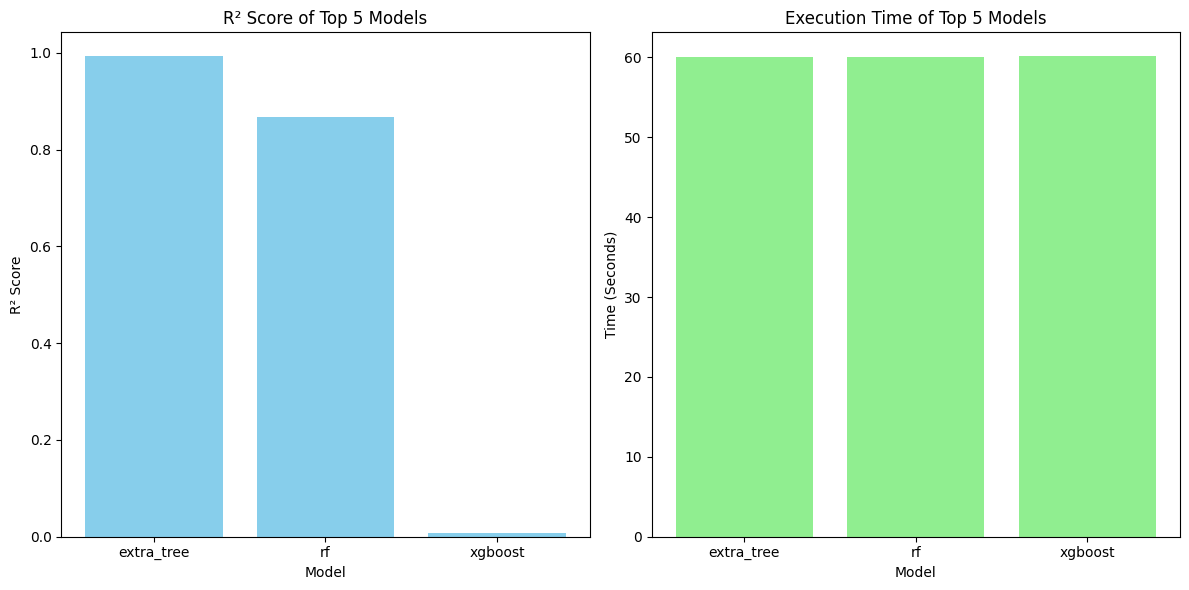

Top 5 Models Based on R² Score and Execution Time
1. Model: extra_tree, R²: 0.9931, Time: 60.04 seconds
2. Model: rf, R²: 0.8683, Time: 60.06 seconds
3. Model: xgboost, R²: 0.0067, Time: 60.12 seconds


In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from flaml import AutoML

# Create a sample DataFrame
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'energy_consumption': [2.5, 3.1, 3.6, 4.0, 4.5, 5.1, 5.6, 6.0, 6.5, 7.1]  # Target variable
})

# Split features (X) and target (y)
X = df.drop('energy_consumption', axis=1)
y = df['energy_consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean feature names by replacing special characters (if necessary)
X_train.columns = X_train.columns.str.replace(r'[^\w\s]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^\w\s]', '', regex=True)

# List of estimators to evaluate
estimators = ["lgbm", "rf", "xgboost", "extra_tree"]

# Dictionary to store model names, R² scores, and time taken
model_performance = []

for estimator in estimators:
    try:
        # Set the estimator to FLAML
        start_time = time.time()  # Start time
        automl = AutoML()

        # Fit the model with the given estimator
        automl.fit(X_train, y_train, task="regression", time_budget=60, estimator_list=[estimator])  # Adjust time_budget as needed
        end_time = time.time()  # End time

        # Calculate the time taken
        elapsed_time = end_time - start_time

        # Predict on the test set
        y_pred = automl.predict(X_test)

        # Calculate the R² score
        r2 = r2_score(y_test, y_pred)

        # Append the model name, R² score, and time taken
        model_performance.append((estimator, r2, elapsed_time))
    except Exception as e:
        print(f"Error with estimator {estimator}: {e}")

# Sort the models by R² score in descending order
model_performance = sorted(model_performance, key=lambda x: x[1], reverse=True)

# Extract the top 5 models for graph plotting (if available)
top_5_models = model_performance[:5]
model_names = [x[0] for x in top_5_models]
r2_scores = [x[1] for x in top_5_models]
execution_times = [x[2] for x in top_5_models]

# Plotting the R² scores of top 5 models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("R² Score of Top 5 Models")

# Plotting the Execution Time of top 5 models
plt.subplot(1, 2, 2)
plt.bar(model_names, execution_times, color='lightgreen')
plt.xlabel("Model")
plt.ylabel("Time (Seconds)")
plt.title("Execution Time of Top 5 Models")

plt.tight_layout()
plt.show()

# Print the top 5 models based on R² score and their corresponding time taken
print("Top 5 Models Based on R² Score and Execution Time")
for i, (model, r2, time_taken) in enumerate(top_5_models):
    print(f"{i + 1}. Model: {model}, R²: {r2:.4f}, Time: {time_taken:.2f} seconds")


[flaml.automl.logger: 10-13 18:01:37] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 18:01:37] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 18:01:37] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 18:01:37] {1955} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 10-13 18:01:37] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-13 18:01:37] {2393} INFO - Estimated sufficient time budget=478s. Estimated necessary time budget=0s.
[flaml.automl.logger: 10-13 18:01:37] {2442} INFO -  at 0.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:37] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-13 18:01:37] {2442} INFO -  at 0.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:37] {2258} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 10-13 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:37] {2442} INFO -  at 0.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:37] {2258} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 10-13 18:01:37] {2442} INFO -  at 0.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:37] {2258} INFO - iteration 6, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:37] {2442} INFO -  at 0.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:37] {2258} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 10-13 18:01:37] {2442} INFO -  at 0.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:37] {2258} INFO - iteration 8, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:37] {2442} INFO -  at 0.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:37] {2258} INFO - iteration 9, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:38] {2442} INFO -  at 1.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:38] {2258} INFO - iteration 10, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:38] {2442} INFO -  at 1.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:38] {2258} INFO - iteration 11, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:38] {2442} INFO -  at 1.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:38] {2258} INFO - iteration 12, current learner lgbm
[flaml.automl.logger: 10-13 18:01:39] {2442} INFO -  at 2.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:39] {2258} INFO - iteration 13, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:39] {2442} INFO -  at 2.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:39] {2258} INFO - iteration 14, current learner lgbm
[flaml.automl.logger: 10-13 18:01:39] {2442} INFO -  at 2.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:39] {2258} INFO - iteration 15, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:39] {2442} INFO -  at 2.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:39] {2258} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 10-13 18:01:39] {2442} INFO -  at 2.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:39] {2258} INFO - iteration 17, current learner lgbm
[flaml.automl.logger: 10-13 18:01:39] {2442} INFO -  at 2.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:39] {2258} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 10-13 18:01:39] {2442} INFO -  at 2.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:39] {2258} INFO - iteration 19, current learner lgbm
[flaml.automl.logger: 10-13 18:01:39] {2442} INFO -  at 2.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:39] {2258} INFO - iteration 20, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:39] {2442} INFO -  at 2.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:39] {2258} INFO - iteration 21, current learner lgbm
[flaml.automl.logger: 10-13 18:01:40] {2442} INFO -  at 2.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:40] {2258} INFO - iteration 22, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:40] {2442} INFO -  at 3.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:40] {2258} INFO - iteration 23, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:40] {2442} INFO -  at 3.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:40] {2258} INFO - iteration 24, current learner lgbm
[flaml.automl.logger: 10-13 18:01:41] {2442} INFO -  at 3.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:41] {2258} INFO - iteration 25, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:41] {2442} INFO -  at 4.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:41] {2258} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 10-13 18:01:41] {2442} INFO -  at 4.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:41] {2258} INFO - iteration 27, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:41] {2442} INFO -  at 4.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:41] {2258} INFO - iteration 28, current learner lgbm
[flaml.automl.logger: 10-13 18:01:41] {2442} INFO -  at 4.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:41] {2258} INFO - iteration 29, current learner lgbm
[flaml.automl.logger: 10-13 18:01:41] {2442} INFO -  at 4.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:41] {2258} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 10-13 18:01:41] {2442} INFO -  at 4.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:41] {2258} INFO - iteration 31, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:41] {2442} INFO -  at 4.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:41] {2258} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 10-13 18:01:41] {2442} INFO -  at 4.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:41] {2258} INFO - iteration 33, current learner lgbm
[flaml.automl.logger: 10-13 18:01:41] {2442} INFO -  at 4.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:41] {2258} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 4.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.0s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 37, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 38, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 40, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.2s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 41, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 43, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 44, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 45, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 47, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 49, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 50, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 10-13 18:01:42] {2442} INFO -  at 5.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:42] {2258} INFO - iteration 52, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 5.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 55, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 56, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 57, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 58, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 59, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 60, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.3s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 62, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 63, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 64, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 65, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 66, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 67, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 68, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 69, current learner lgbm
[flaml.automl.logger: 10-13 18:01:43] {2442} INFO -  at 6.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:43] {2258} INFO - iteration 70, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 6.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 71, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 72, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 73, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 74, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 75, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.2s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 77, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 78, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 79, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 80, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 81, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 82, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 83, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 84, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 85, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 86, current learner lgbm
[flaml.automl.logger: 10-13 18:01:44] {2442} INFO -  at 7.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:44] {2258} INFO - iteration 87, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 7.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 88, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 89, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 90, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 91, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 92, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 93, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 94, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 95, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 96, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 97, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 98, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 99, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 100, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 101, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 102, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 103, current learner lgbm
[flaml.automl.logger: 10-13 18:01:45] {2442} INFO -  at 8.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:45] {2258} INFO - iteration 104, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 8.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 105, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 8.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 106, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 107, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 108, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 109, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 110, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 111, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 112, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 113, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 114, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 115, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 116, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 117, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 118, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 119, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 120, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:46] {2258} INFO - iteration 121, current learner lgbm
[flaml.automl.logger: 10-13 18:01:46] {2442} INFO -  at 9.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 122, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 9.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 123, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 124, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 125, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 126, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 127, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 128, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 129, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.3s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 131, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 132, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 133, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 134, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 135, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 136, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 137, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 138, current learner lgbm
[flaml.automl.logger: 10-13 18:01:47] {2442} INFO -  at 10.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:47] {2258} INFO - iteration 139, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 10.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 140, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 141, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 142, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 143, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 144, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 145, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 146, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 147, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 148, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 149, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.4s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 151, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 152, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 153, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 154, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 155, current learner lgbm
[flaml.automl.logger: 10-13 18:01:48] {2442} INFO -  at 11.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:48] {2258} INFO - iteration 156, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 11.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 157, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 158, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 159, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 160, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 161, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 162, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 163, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 164, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 165, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.3s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 167, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 168, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 169, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 170, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 171, current learner lgbm
[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 172, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:49] {2442} INFO -  at 12.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:49] {2258} INFO - iteration 173, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 12.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 174, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 175, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 176, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 177, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 178, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 179, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 180, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.3s,	estimator lgbm's best error=inf,	best estimator None'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 182, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 183, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 184, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 185, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 186, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 187, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 188, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 189, current learner lgbm
[flaml.automl.logger: 10-13 18:01:50] {2442} INFO -  at 13.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:50] {2258} INFO - iteration 190, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 13.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 191, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 192, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 193, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 194, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 195, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 196, current learner lgbm
[flaml.automl.logger: 10-13 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 197, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 198, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 199, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 200, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 201, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 202, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 203, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 204, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 205, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 206, current learner lgbm
[flaml.automl.logger: 10-13 18:01:51] {2442} INFO -  at 14.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:51] {2258} INFO - iteration 207, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:52] {2442} INFO -  at 15.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:52] {2258} INFO - iteration 208, current learner lgbm
[flaml.automl.logger: 10-13 18:01:52] {2442} INFO -  at 15.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:52] {2258} INFO - iteration 209, current learner lgbm
[flaml.automl.logger: 10-13 18:01:52] {2442} INFO -  at 15.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:52] {2258} INFO - iteration 210, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:52] {2442} INFO -  at 15.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:52] {2258} INFO - iteration 211, current learner lgbm
[flaml.automl.logger: 10-13 18:01:52] {2442} INFO -  at 15.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:52] {2258} INFO - iteration 212, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:52] {2442} INFO -  at 15.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:52] {2258} INFO - iteration 213, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:52] {2442} INFO -  at 15.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:53] {2258} INFO - iteration 214, current learner lgbm
[flaml.automl.logger: 10-13 18:01:53] {2442} INFO -  at 16.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:53] {2258} INFO - iteration 215, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:53] {2442} INFO -  at 16.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:53] {2258} INFO - iteration 216, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:53] {2442} INFO -  at 16.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:53] {2258} INFO - iteration 217, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:53] {2442} INFO -  at 16.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:53] {2258} INFO - iteration 218, current learner lgbm
[flaml.automl.logger: 10-13 18:01:53] {2442} INFO -  at 16.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:53] {2258} INFO - iteration 219, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:53] {2442} INFO -  at 16.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:53] {2258} INFO - iteration 220, current learner lgbm
[flaml.automl.logger: 10-13 18:01:53] {2442} INFO -  at 16.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:53] {2258} INFO - iteration 221, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:54] {2442} INFO -  at 17.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:54] {2258} INFO - iteration 222, current learner lgbm
[flaml.automl.logger: 10-13 18:01:54] {2442} INFO -  at 17.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:54] {2258} INFO - iteration 223, current learner lgbm
[flaml.automl.logger: 10-13 18:01:54] {2442} INFO -  at 17.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:54] {2258} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 10-13 18:01:54] {2442} INFO -  at 17.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:54] {2258} INFO - iteration 225, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:54] {2442} INFO -  at 17.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:54] {2258} INFO - iteration 226, current learner lgbm
[flaml.automl.logger: 10-13 18:01:54] {2442} INFO -  at 17.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:54] {2258} INFO - iteration 227, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:54] {2442} INFO -  at 17.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:54] {2258} INFO - iteration 228, current learner lgbm
[flaml.automl.logger: 10-13 18:01:54] {2442} INFO -  at 17.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:54] {2258} INFO - iteration 229, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:54] {2442} INFO -  at 17.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:54] {2258} INFO - iteration 230, current learner lgbm
[flaml.automl.logger: 10-13 18:01:55] {2442} INFO -  at 17.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:55] {2258} INFO - iteration 231, current learner lgbm
[flaml.automl.logger: 10-13 18:01:55] {2442} INFO -  at 18.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:55] {2258} INFO - iteration 232, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:55] {2442} INFO -  at 18.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:55] {2258} INFO - iteration 233, current learner lgbm
[flaml.automl.logger: 10-13 18:01:55] {2442} INFO -  at 18.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:55] {2258} INFO - iteration 234, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:55] {2442} INFO -  at 18.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:55] {2258} INFO - iteration 235, current learner lgbm
[flaml.automl.logger: 10-13 18:01:55] {2442} INFO -  at 18.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:55] {2258} INFO - iteration 236, current learner lgbm
[flaml.automl.logger: 10-13 18:01:55] {2442} INFO -  at 18.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:55] {2258} INFO - iteration 237, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:55] {2442} INFO -  at 18.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:55] {2258} INFO - iteration 238, current learner lgbm
[flaml.automl.logger: 10-13 18:01:55] {2442} INFO -  at 18.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:55] {2258} INFO - iteration 239, current learner lgbm
[flaml.automl.logger: 10-13 18:01:55] {2442} INFO -  at 18.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:55] {2258} INFO - iteration 240, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:56] {2442} INFO -  at 19.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:56] {2258} INFO - iteration 241, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:01:56] {2442} INFO -  at 19.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:56] {2258} INFO - iteration 242, current learner lgbm
[flaml.automl.logger: 10-13 18:01:56] {2442} INFO -  at 19.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:56] {2258} INFO - iteration 243, current learner lgbm
[flaml.automl.logger: 10-13 18:01:56] {2442} INFO -  at 19.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:56] {2258} INFO - iteration 244, current learner lgbm
[flaml.automl.logger: 10-13 18:01:56] {2442} INFO -  at 19.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:56] {2258} INFO - iteration 245, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:56] {2442} INFO -  at 19.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:56] {2258} INFO - iteration 246, current learner lgbm
[flaml.automl.logger: 10-13 18:01:56] {2442} INFO -  at 19.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:56] {2258} INFO - iteration 247, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 19.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 248, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 249, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 250, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 251, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 252, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 253, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 254, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 255, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 256, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best mo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 258, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 259, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[fla

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 261, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:57] {2258} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 10-13 18:01:57] {2442} INFO -  at 20.9s,	estimator lgbm's best error=inf,	best estimator None's best error=in

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:58] {2258} INFO - iteration 264, current learner lgbm
[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:58] {2258} INFO - iteration 265, current learner lgbm
[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.1s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:58] {2258} INFO - iteration 268, current learner lgbm
[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:58] {2258} INFO - iteration 269, current learner lgbm
[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.4s,	estimator lgbm's best error=inf,	best estimator None's

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:58] {2258} INFO - iteration 271, current learner lgbm
[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:58] {2258} INFO - iteration 272, current learner lgbm
[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.6s,	estimator lgbm's best error=inf,	best estimator 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:58] {2258} INFO - iteration 274, current learner lgbm
[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:58] {2258} INFO - iteration 275, current learner lgbm
[flaml.automl.logger: 10-13 18:01:58] {2442} INFO -  at 21.8s,	estimator lgbm's best error=inf,	best esti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 21.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:59] {2258} INFO - iteration 277, current learner lgbm
[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:59] {2258} INFO - iteration 278, current learner lgbm
[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.0s,	estimator lgbm's best error=inf,	bes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:59] {2258} INFO - iteration 280, current learner lgbm
[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:59] {2258} INFO - iteration 281, current learner lgbm
[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.2s,	estimator lgbm's best error=in

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:59] {2258} INFO - iteration 284, current learner lgbm
[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:59] {2258} INFO - iteration 285, current learner lgbm
[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.5s,	estimator lgbm's best 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:59] {2258} INFO - iteration 287, current learner lgbm
[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:59] {2258} INFO - iteration 288, current learner lgbm
[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.7s,	estimator lgbm's

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:01:59] {2442} INFO -  at 22.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:01:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:01:59] {2258} INFO - iteration 290, current learner lgbm
[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 22.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:00] {2258} INFO - iteration 291, current learner lgbm
[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.0s,	estimator 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:00] {2258} INFO - iteration 293, current learner lgbm
[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:00] {2258} INFO - iteration 294, current learner lgbm
[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.2s,	esti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:00] {2258} INFO - iteration 297, current learner lgbm
[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:00] {2258} INFO - iteration 298, current learner lgbm
[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:00] {2258} INFO - iteration 300, current learner lgbm
[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:00] {2258} INFO - iteration 301, current learner lgbm
[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:00] {2258} INFO - iteration 303, current learner lgbm
[flaml.automl.logger: 10-13 18:02:00] {2442} INFO -  at 23.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:00] {2258} INFO - iteration 304, current learner lgbm
[flaml.automl.logger: 10-13 18:02:01] {2442} IN

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:01] {2258} INFO - iteration 306, current learner lgbm
[flaml.automl.logger: 10-13 18:02:01] {2442} INFO -  at 24.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:01] {2258} INFO - iteration 307, current learner lgbm
[flaml.automl.logger: 10-13 18:02:01] {2442} INFO -  at 24.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:01] {

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:01] {2442} INFO -  at 24.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:01] {2258} INFO - iteration 310, current learner lgbm
[flaml.automl.logger: 10-13 18:02:01] {2442} INFO -  at 24.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:01] {2258} INFO - iteration 311, current learner lgbm
[flaml.automl.logger: 10-13 18:02

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:01] {2442} INFO -  at 24.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:01] {2258} INFO - iteration 314, current learner lgbm
[flaml.automl.logger: 10-13 18:02:01] {2442} INFO -  at 24.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:01] {2258} INFO - iteration 315, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:01] {2442} INFO -  at 24.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:01] {2258} INFO - iteration 316, current learner lgbm
[flaml.automl.logger: 10-13 18:02:01] {2442} INFO -  at 24.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:01] {2258} INFO - iteration 317, current learner lgbm
[flaml.automl.logger:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:02] {2442} INFO -  at 25.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:02] {2258} INFO - iteration 320, current learner lgbm
[flaml.automl.logger: 10-13 18:02:02] {2442} INFO -  at 25.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:02] {2258} INFO - iteration 321, current learner lgbm
[flaml.automl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:02] {2442} INFO -  at 25.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:02] {2258} INFO - iteration 324, current learner lgbm
[flaml.automl.logger: 10-13 18:02:02] {2442} INFO -  at 25.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:02] {2258} INFO - iteration 325, current learner lgbm
[flam

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:02] {2442} INFO -  at 25.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:02] {2258} INFO - iteration 327, current learner lgbm
[flaml.automl.logger: 10-13 18:02:02] {2442} INFO -  at 25.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:02] {2258} INFO - iteration 328, current learner lgbm

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:02] {2442} INFO -  at 25.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:02] {2258} INFO - iteration 330, current learner lgbm
[flaml.automl.logger: 10-13 18:02:03] {2442} INFO -  at 25.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:03] {2258} INFO - iteration 331, current learne

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:03] {2442} INFO -  at 26.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:03] {2258} INFO - iteration 333, current learner lgbm
[flaml.automl.logger: 10-13 18:02:03] {2442} INFO -  at 26.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:03] {2258} INFO - iteration 334, current 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:03] {2258} INFO - iteration 336, current learner lgbm
[flaml.automl.logger: 10-13 18:02:03] {2442} INFO -  at 26.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:03] {2258} INFO - iteration 337, current learner lgbm
[flaml.automl.logger: 10-13 18:02:03] {2442} INFO -  at 26.4s,	estimator lgbm's best error=inf,	best estimator Non

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:03] {2442} INFO -  at 26.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:03] {2258} INFO - iteration 340, current learner lgbm
[flaml.automl.logger: 10-13 18:02:03] {2442} INFO -  at 26.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:03] {2258} INFO - iteration

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:03] {2442} INFO -  at 26.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:03] {2258} INFO - iteration 343, current learner lgbm
[flaml.automl.logger: 10-13 18:02:03] {2442} INFO -  at 26.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:03] {2258} INFO - ite

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:04] {2442} INFO -  at 27.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:04] {2258} INFO - iteration 346, current learner lgbm
[flaml.automl.logger: 10-13 18:02:04] {2442} INFO -  at 27.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:04] {2258} INFO

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:04] {2442} INFO -  at 27.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:04] {2258} INFO - iteration 349, current learner lgbm
[flaml.automl.logger: 10-13 18:02:04] {2442} INFO -  at 27.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:04] {2258

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:04] {2442} INFO -  at 27.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:04] {2258} INFO - iteration 353, current learner lgbm
[flaml.automl.logger: 10-13 18:02:04] {2442} INFO -  at 27.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:04] {2442} INFO -  at 27.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:04] {2258} INFO - iteration 356, current learner lgbm
[flaml.automl.logger: 10-13 18:02:04] {2442} INFO -  at 27.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:05] {2442} INFO -  at 28.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:05] {2258} INFO - iteration 366, current learner lgbm
[flaml.automl.logger: 10-13 18:02:05] {2442} INFO -  at 28.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.au

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:05] {2258} INFO - iteration 368, current learner lgbm
[flaml.automl.logger: 10-13 18:02:05] {2442} INFO -  at 28.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:05] {2258} INFO - iteration 369, current learner lgbm
[flaml.automl.logger: 10-13 18:02:05] {2442} INFO 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:06] {2442} INFO -  at 29.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:06] {2258} INFO - iteration 372, current learner lgbm
[flaml.automl.logger: 10-13 18:02:06] {2442} INFO -  at 29.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best mode

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:06] {2442} INFO -  at 29.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:06] {2258} INFO - iteration 375, current learner lgbm
[flaml.automl.logger: 10-13 18:02:06] {2442} INFO -  at 29.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the bes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:06] {2258} INFO - iteration 378, current learner lgbm
[flaml.automl.logger: 10-13 18:02:06] {2442} INFO -  at 29.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:06] {2258} INFO - iteration 379, current learner lgbm
[flaml.automl.logger: 10-13 18:02:06] {2442} INFO -  at 29.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:06] {2442} INFO -  at 29.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:06] {2258} INFO - iteration 381, current learner lgbm
[flaml.automl.logger: 10-13 18:02:07] {2442} INFO -  at 29.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:07] {2442} INFO -  at 30.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:07] {2258} INFO - iteration 383, current learner lgbm
[flaml.automl.logger: 10-13 18:02:07] {2442} INFO -  at 30.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:07] {2442} INFO -  at 30.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:07] {2258} INFO - iteration 385, current learner lgbm
[flaml.automl.logger: 10-13 18:02:07] {2442} INFO -  at 30.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:07] {2442} INFO -  at 30.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:07] {2258} INFO - iteration 387, current learner lgbm
[flaml.automl.logger: 10-13 18:02:07] {2442} INFO -  at 30.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the ti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:07] {2442} INFO -  at 30.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:07] {2258} INFO - iteration 389, current learner lgbm
[flaml.automl.logger: 10-13 18:02:08] {2442} INFO -  at 30.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times th

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:08] {2442} INFO -  at 31.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:08] {2258} INFO - iteration 391, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:08] {2442} INFO -  at 31.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:08] {2258} INFO - iteration 392, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:08] {2442} INFO -  at 31.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:08] {2258} INFO - iteration 393, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:09] {2442} INFO -  at 32.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:09] {2258} INFO - iteration 394, current learner lgbm
[flaml.automl.logger: 10-13 18:02:09] {2442} INFO -  at 32.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:09] {2442} INFO -  at 32.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:09] {2258} INFO - iteration 396, current learner lgbm
[flaml.automl.logger: 10-13 18:02:09] {2442} INFO -  at 32.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:09] {2442} INFO -  at 32.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:09] {2258} INFO - iteration 398, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:09] {2442} INFO -  at 32.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:09] {2258} INFO - iteration 399, current learner lgbm
[flaml.automl.logger: 10-13 18:02:10] {2442} INFO -  at 32.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:10] {2442} INFO -  at 33.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:10] {2258} INFO - iteration 401, current learner lgbm
[flaml.automl.logger: 10-13 18:02:10] {2442} INFO -  at 33.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:10] {2442} INFO -  at 33.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:10] {2258} INFO - iteration 403, current learner lgbm
[flaml.automl.logger: 10-13 18:02:10] {2442} INFO -  at 33.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:10] {2442} INFO -  at 33.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:10] {2258} INFO - iteration 405, current learner lgbm
[flaml.automl.logger: 10-13 18:02:10] {2442} INFO -  at 33.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:10] {2442} INFO -  at 33.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:10] {2258} INFO - iteration 407, current learner lgbm
[flaml.automl.logger: 10-13 18:02:10] {2442} INFO -  at 33.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:11] {2442} INFO -  at 34.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:11] {2258} INFO - iteration 409, current learner lgbm
[flaml.automl.logger: 10-13 18:02:11] {2442} INFO -  at 34.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:11] {2442} INFO -  at 34.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:11] {2258} INFO - iteration 411, current learner lgbm
[flaml.automl.logger: 10-13 18:02:11] {2442} INFO -  at 34.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:11] {2442} INFO -  at 34.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:11] {2258} INFO - iteration 413, current learner lgbm
[flaml.automl.logger: 10-13 18:02:11] {2442} INFO -  at 34.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:11] {2442} INFO -  at 34.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:11] {2258} INFO - iteration 415, current learner lgbm
[flaml.automl.logger: 10-13 18:02:11] {2442} INFO -  at 34.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:11] {2442} INFO -  at 34.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:11] {2258} INFO - iteration 418, current learner lgbm
[flaml.automl.logger: 10-13 18:02:12] {2442} INFO -  at 35.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:12] {2442} INFO -  at 35.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:12] {2258} INFO - iteration 420, current learner lgbm
[flaml.automl.logger: 10-13 18:02:12] {2442} INFO -  at 35.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:12] {2442} INFO -  at 35.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:12] {2258} INFO - iteration 422, current learner lgbm
[flaml.automl.logger: 10-13 18:02:12] {2442} INFO -  at 35.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:12] {2258} INFO - iteration 423, current learner lgbm
[flaml.automl.logger: 10-13 18:02:13] {2442} INFO -  at 35.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:13] {2258} INFO - iteration 424, current learner lgbm
[flaml.automl.logger: 10-13 18:02:13] {2442} INFO -  at 36.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:13] {2442} INFO -  at 36.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:13] {2258} INFO - iteration 427, current learner lgbm
[flaml.automl.logger: 10-13 18:02:13] {2442} INFO -  at 36.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:13] {2442} INFO -  at 36.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:13] {2258} INFO - iteration 430, current learner lgbm
[flaml.automl.logger: 10-13 18:02:13] {2442} INFO -  at 36.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:13] {2442} INFO -  at 36.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:13] {2258} INFO - iteration 433, current learner lgbm
[flaml.automl.logger: 10-13 18:02:13] {2442} INFO -  at 36.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:13] {2442} INFO -  at 36.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:13] {2258} INFO - iteration 435, current learner lgbm
[flaml.automl.logger: 10-13 18:02:14] {2442} INFO -  at 36.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:14] {2442} INFO -  at 37.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:14] {2258} INFO - iteration 438, current learner lgbm
[flaml.automl.logger: 10-13 18:02:14] {2442} INFO -  at 37.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:14] {2442} INFO -  at 37.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:14] {2258} INFO - iteration 441, current learner lgbm
[flaml.automl.logger: 10-13 18:02:14] {2442} INFO -  at 37.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:14] {2442} INFO -  at 37.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:14] {2258} INFO - iteration 444, current learner lgbm
[flaml.automl.logger: 10-13 18:02:14] {2442} INFO -  at 37.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:14] {2442} INFO -  at 37.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:14] {2258} INFO - iteration 446, current learner lgbm
[flaml.automl.logger: 10-13 18:02:14] {2442} INFO -  at 37.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:15] {2442} INFO -  at 38.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:15] {2258} INFO - iteration 449, current learner lgbm
[flaml.automl.logger: 10-13 18:02:15] {2442} INFO -  at 38.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:15] {2442} INFO -  at 38.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:15] {2258} INFO - iteration 452, current learner lgbm
[flaml.automl.logger: 10-13 18:02:15] {2442} INFO -  at 38.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:15] {2442} INFO -  at 38.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:15] {2258} INFO - iteration 455, current learner lgbm
[flaml.automl.logger: 10-13 18:02:15] {2442} INFO -  at 38.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:15] {2258} INFO - iteration 457, current learner lgbm
[flaml.automl.logger: 10-13 18:02:15] {2442} INFO -  at 38.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:16] {2442} INFO -  at 39.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:16] {2258} INFO - iteration 461, current learner lgbm
[flaml.automl.logger: 10-13 18:02:16] {2442} INFO -  at 39.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:16] {2442} INFO -  at 39.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:16] {2258} INFO - iteration 464, current learner lgbm
[flaml.automl.logger: 10-13 18:02:16] {2442} INFO -  at 39.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:16] {2442} INFO -  at 39.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:16] {2258} INFO - iteration 467, current learner lgbm
[flaml.automl.logger: 10-13 18:02:16] {2442} INFO -  at 39.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:16] {2442} INFO -  at 39.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:16] {2258} INFO - iteration 469, current learner lgbm
[flaml.automl.logger: 10-13 18:02:16] {2442} INFO -  at 39.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:17] {2442} INFO -  at 39.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:17] {2258} INFO - iteration 472, current learner lgbm
[flaml.automl.logger: 10-13 18:02:17] {2442} INFO -  at 40.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:17] {2442} INFO -  at 40.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:17] {2258} INFO - iteration 475, current learner lgbm
[flaml.automl.logger: 10-13 18:02:17] {2442} INFO -  at 40.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:17] {2442} INFO -  at 40.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:17] {2258} INFO - iteration 478, current learner lgbm
[flaml.automl.logger: 10-13 18:02:17] {2442} INFO -  at 40.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:17] {2442} INFO -  at 40.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:17] {2258} INFO - iteration 480, current learner lgbm
[flaml.automl.logger: 10-13 18:02:17] {2442} INFO -  at 40.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:17] {2442} INFO -  at 40.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:17] {2258} INFO - iteration 483, current learner lgbm
[flaml.automl.logger: 10-13 18:02:18] {2442} INFO -  at 40.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:18] {2442} INFO -  at 41.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:18] {2258} INFO - iteration 486, current learner lgbm
[flaml.automl.logger: 10-13 18:02:18] {2442} INFO -  at 41.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:18] {2442} INFO -  at 41.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:18] {2258} INFO - iteration 489, current learner lgbm
[flaml.automl.logger: 10-13 18:02:18] {2442} INFO -  at 41.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:18] {2442} INFO -  at 41.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:18] {2258} INFO - iteration 492, current learner lgbm
[flaml.automl.logger: 10-13 18:02:18] {2442} INFO -  at 41.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:18] {2442} INFO -  at 41.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:18] {2258} INFO - iteration 495, current learner lgbm
[flaml.automl.logger: 10-13 18:02:19] {2442} INFO -  at 41.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:19] {2442} INFO -  at 42.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:19] {2258} INFO - iteration 498, current learner lgbm
[flaml.automl.logger: 10-13 18:02:19] {2442} INFO -  at 42.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:19] {2442} INFO -  at 42.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:19] {2258} INFO - iteration 501, current learner lgbm
[flaml.automl.logger: 10-13 18:02:19] {2442} INFO -  at 42.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:19] {2442} INFO -  at 42.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:19] {2258} INFO - iteration 504, current learner lgbm
[flaml.automl.logger: 10-13 18:02:19] {2442} INFO -  at 42.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:19] {2442} INFO -  at 42.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:20] {2258} INFO - iteration 507, current learner lgbm
[flaml.automl.logger: 10-13 18:02:20] {2442} INFO -  at 43.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:20] {2442} INFO -  at 43.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:20] {2258} INFO - iteration 509, current learner lgbm
[flaml.automl.logger: 10-13 18:02:20] {2442} INFO -  at 43.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:20] {2442} INFO -  at 43.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:20] {2258} INFO - iteration 512, current learner lgbm
[flaml.automl.logger: 10-13 18:02:20] {2442} INFO -  at 43.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:20] {2442} INFO -  at 43.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:20] {2258} INFO - iteration 515, current learner lgbm
[flaml.automl.logger: 10-13 18:02:20] {2442} INFO -  at 43.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:20] {2442} INFO -  at 43.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:20] {2258} INFO - iteration 517, current learner lgbm
[flaml.automl.logger: 10-13 18:02:20] {2442} INFO -  at 43.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:21] {2442} INFO -  at 44.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:21] {2258} INFO - iteration 520, current learner lgbm
[flaml.automl.logger: 10-13 18:02:21] {2442} INFO -  at 44.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:21] {2442} INFO -  at 44.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:21] {2258} INFO - iteration 523, current learner lgbm
[flaml.automl.logger: 10-13 18:02:21] {2442} INFO -  at 44.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:21] {2442} INFO -  at 44.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:21] {2258} INFO - iteration 526, current learner lgbm
[flaml.automl.logger: 10-13 18:02:21] {2442} INFO -  at 44.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:21] {2442} INFO -  at 44.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:21] {2258} INFO - iteration 528, current learner lgbm
[flaml.automl.logger: 10-13 18:02:21] {2442} INFO -  at 44.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:22] {2442} INFO -  at 45.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:22] {2258} INFO - iteration 531, current learner lgbm
[flaml.automl.logger: 10-13 18:02:22] {2442} INFO -  at 45.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:22] {2442} INFO -  at 45.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:22] {2258} INFO - iteration 534, current learner lgbm
[flaml.automl.logger: 10-13 18:02:22] {2442} INFO -  at 45.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:22] {2442} INFO -  at 45.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:22] {2258} INFO - iteration 537, current learner lgbm
[flaml.automl.logger: 10-13 18:02:22] {2442} INFO -  at 45.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exce

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:22] {2442} INFO -  at 45.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:22] {2258} INFO - iteration 539, current learner lgbm
[flaml.automl.logger: 10-13 18:02:22] {2442} INFO -  at 45.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time ex

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:23] {2442} INFO -  at 46.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:23] {2258} INFO - iteration 543, current learner lgbm
[flaml.automl.logger: 10-13 18:02:23] {2442} INFO -  at 46.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search tim

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:23] {2442} INFO -  at 46.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:23] {2258} INFO - iteration 545, current learner lgbm
[flaml.automl.logger: 10-13 18:02:23] {2442} INFO -  at 46.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:23] {2442} INFO -  at 46.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:23] {2258} INFO - iteration 547, current learner lgbm
[flaml.automl.logger: 10-13 18:02:23] {2442} INFO -  at 46.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:23] {2442} INFO -  at 46.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:23] {2258} INFO - iteration 549, current learner lgbm
[flaml.automl.logger: 10-13 18:02:24] {2442} INFO -  at 47.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total sear

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:24] {2442} INFO -  at 47.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:24] {2258} INFO - iteration 551, current learner lgbm
[flaml.automl.logger: 10-13 18:02:24] {2442} INFO -  at 47.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total se

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:24] {2442} INFO -  at 47.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:24] {2258} INFO - iteration 553, current learner lgbm
[flaml.automl.logger: 10-13 18:02:24] {2442} INFO -  at 47.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:24] {2442} INFO -  at 47.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:24] {2258} INFO - iteration 555, current learner lgbm
[flaml.automl.logger: 10-13 18:02:24] {2442} INFO -  at 47.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the tota

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:25] {2442} INFO -  at 47.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:25] {2258} INFO - iteration 557, current learner lgbm
[flaml.automl.logger: 10-13 18:02:25] {2442} INFO -  at 48.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the to

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:25] {2442} INFO -  at 48.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:25] {2258} INFO - iteration 559, current learner lgbm
[flaml.automl.logger: 10-13 18:02:25] {2442} INFO -  at 48.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:25] {2442} INFO -  at 48.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:25] {2258} INFO - iteration 561, current learner lgbm
[flaml.automl.logger: 10-13 18:02:26] {2442} INFO -  at 48.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and th

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:26] {2442} INFO -  at 49.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:26] {2258} INFO - iteration 563, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:26] {2442} INFO -  at 49.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:26] {2258} INFO - iteration 564, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:26] {2442} INFO -  at 49.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:26] {2258} INFO - iteration 565, current learner lgbm
[flaml.automl.logger: 10-13 18:02:26] {2442} INFO -  at 49.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, an

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:26] {2442} INFO -  at 49.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:26] {2258} INFO - iteration 567, current learner lgbm
[flaml.automl.logger: 10-13 18:02:26] {2442} INFO -  at 49.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:27] {2442} INFO -  at 50.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:27] {2258} INFO - iteration 569, current learner lgbm
[flaml.automl.logger: 10-13 18:02:27] {2442} INFO -  at 50.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:27] {2442} INFO -  at 50.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:27] {2258} INFO - iteration 571, current learner lgbm
[flaml.automl.logger: 10-13 18:02:27] {2442} INFO -  at 50.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:27] {2459} WARNING - All estimator hyperparameters local search has converged at least on

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:27] {2442} INFO -  at 50.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:27] {2258} INFO - iteration 573, current learner lgbm
[flaml.automl.logger: 10-13 18:02:27] {2442} INFO -  at 50.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:27] {2459} WARNING - All estimator hyperparameters local search has converged at least 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:28] {2442} INFO -  at 50.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:28] {2258} INFO - iteration 575, current learner lgbm
[flaml.automl.logger: 10-13 18:02:28] {2442} INFO -  at 51.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:28] {2459} WARNING - All estimator hyperparameters local search has converged at leas

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:28] {2442} INFO -  at 51.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:28] {2258} INFO - iteration 577, current learner lgbm
[flaml.automl.logger: 10-13 18:02:28] {2442} INFO -  at 51.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:28] {2459} WARNING - All estimator hyperparameters local search has converged at le

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:28] {2442} INFO -  at 51.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:28] {2258} INFO - iteration 579, current learner lgbm
[flaml.automl.logger: 10-13 18:02:28] {2442} INFO -  at 51.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:28] {2459} WARNING - All estimator hyperparameters local search has converged at 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:29] {2442} INFO -  at 51.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:29] {2258} INFO - iteration 581, current learner lgbm
[flaml.automl.logger: 10-13 18:02:29] {2442} INFO -  at 52.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:29] {2459} WARNING - All estimator hyperparameters local search has converged a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:29] {2442} INFO -  at 52.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:29] {2258} INFO - iteration 583, current learner lgbm
[flaml.automl.logger: 10-13 18:02:29] {2442} INFO -  at 52.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:29] {2459} WARNING - All estimator hyperparameters local search has converged

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:29] {2442} INFO -  at 52.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:29] {2258} INFO - iteration 585, current learner lgbm
[flaml.automl.logger: 10-13 18:02:29] {2442} INFO -  at 52.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:29] {2459} WARNING - All estimator hyperparameters local search has converg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:29] {2442} INFO -  at 52.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:29] {2258} INFO - iteration 587, current learner lgbm
[flaml.automl.logger: 10-13 18:02:29] {2442} INFO -  at 52.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:29] {2459} WARNING - All estimator hyperparameters local search has conve

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:30] {2442} INFO -  at 52.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:30] {2258} INFO - iteration 590, current learner lgbm
[flaml.automl.logger: 10-13 18:02:30] {2442} INFO -  at 53.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:30] {2459} WARNING - All estimator hyperparameters local search has co

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:30] {2442} INFO -  at 53.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:30] {2258} INFO - iteration 593, current learner lgbm
[flaml.automl.logger: 10-13 18:02:30] {2442} INFO -  at 53.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:30] {2459} WARNING - All estimator hyperparameters local search has

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:30] {2442} INFO -  at 53.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:30] {2258} INFO - iteration 596, current learner lgbm
[flaml.automl.logger: 10-13 18:02:30] {2442} INFO -  at 53.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:30] {2459} WARNING - All estimator hyperparameters local search 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:30] {2442} INFO -  at 53.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:30] {2258} INFO - iteration 598, current learner lgbm
[flaml.automl.logger: 10-13 18:02:30] {2442} INFO -  at 53.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:30] {2459} WARNING - All estimator hyperparameters local searc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:30] {2442} INFO -  at 53.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:30] {2258} INFO - iteration 600, current learner lgbm
[flaml.automl.logger: 10-13 18:02:31] {2442} INFO -  at 53.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:31] {2459} WARNING - All estimator hyperparameters local sea

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:31] {2442} INFO -  at 54.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:31] {2258} INFO - iteration 602, current learner lgbm
[flaml.automl.logger: 10-13 18:02:31] {2442} INFO -  at 54.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:31] {2459} WARNING - All estimator hyperparameters local s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:31] {2442} INFO -  at 54.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:31] {2258} INFO - iteration 605, current learner lgbm
[flaml.automl.logger: 10-13 18:02:31] {2442} INFO -  at 54.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:31] {2459} WARNING - All estimator hyperparameters loca

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:31] {2442} INFO -  at 54.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:31] {2258} INFO - iteration 607, current learner lgbm
[flaml.automl.logger: 10-13 18:02:31] {2442} INFO -  at 54.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:31] {2459} WARNING - All estimator hyperparameters lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:31] {2258} INFO - iteration 609, current learner lgbm
[flaml.automl.logger: 10-13 18:02:31] {2442} INFO -  at 54.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:32] {2442} INFO -  at 55.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:32] {2258} INFO - iteration 612, current learner lgbm
[flaml.automl.logger: 10-13 18:02:32] {2442} INFO -  at 55.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:32] {2459} WARNING - All estimator hyperparamete

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:32] {2442} INFO -  at 55.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:32] {2258} INFO - iteration 615, current learner lgbm
[flaml.automl.logger: 10-13 18:02:32] {2442} INFO -  at 55.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:32] {2459} WARNING - All estimator hyperparam

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:32] {2258} INFO - iteration 617, current learner lgbm
[flaml.automl.logger: 10-13 18:02:32] {2442} INFO -  at 55.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:32] {2442} INFO -  at 55.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:32] {2258} INFO - iteration 620, current learner lgbm
[flaml.automl.logger: 10-13 18:02:32] {2442} INFO -  at 55.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:32] {2459} WARNING - All estimator hyper

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:33] {2442} INFO -  at 56.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:33] {2258} INFO - iteration 623, current learner lgbm
[flaml.automl.logger: 10-13 18:02:33] {2442} INFO -  at 56.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:33] {2459} WARNING - All estimator hy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:33] {2442} INFO -  at 56.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:33] {2258} INFO - iteration 626, current learner lgbm
[flaml.automl.logger: 10-13 18:02:33] {2442} INFO -  at 56.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:33] {2459} WARNING - All estimator

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:33] {2442} INFO -  at 56.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:33] {2258} INFO - iteration 628, current learner lgbm
[flaml.automl.logger: 10-13 18:02:33] {2442} INFO -  at 56.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:33] {2459} WARNING - All estimat

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:33] {2442} INFO -  at 56.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:33] {2258} INFO - iteration 630, current learner lgbm
[flaml.automl.logger: 10-13 18:02:33] {2442} INFO -  at 56.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:33] {2459} WARNING - All estim

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:34] {2442} INFO -  at 56.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:34] {2258} INFO - iteration 632, current learner lgbm
[flaml.automl.logger: 10-13 18:02:34] {2442} INFO -  at 57.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:34] {2459} WARNING - All est

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:34] {2442} INFO -  at 57.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:34] {2258} INFO - iteration 636, current learner lgbm
[flaml.automl.logger: 10-13 18:02:34] {2442} INFO -  at 57.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:34] {2459} WARNING - All

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:34] {2442} INFO -  at 57.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:34] {2258} INFO - iteration 639, current learner lgbm
[flaml.automl.logger: 10-13 18:02:34] {2442} INFO -  at 57.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:34] {2459} WARNING - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:34] {2442} INFO -  at 57.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:34] {2258} INFO - iteration 641, current learner lgbm
[flaml.automl.logger: 10-13 18:02:35] {2442} INFO -  at 57.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:35] {2459} WARNING 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:35] {2442} INFO -  at 58.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:35] {2258} INFO - iteration 644, current learner lgbm
[flaml.automl.logger: 10-13 18:02:35] {2442} INFO -  at 58.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:35] {2459} WARNI

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:35] {2442} INFO -  at 58.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:35] {2258} INFO - iteration 647, current learner lgbm
[flaml.automl.logger: 10-13 18:02:35] {2442} INFO -  at 58.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:35] {2459} WA

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:35] {2442} INFO -  at 58.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:35] {2258} INFO - iteration 649, current learner lgbm
[flaml.automl.logger: 10-13 18:02:35] {2442} INFO -  at 58.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:35] {2459} 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:35] {2442} INFO -  at 58.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:35] {2258} INFO - iteration 651, current learner lgbm
[flaml.automl.logger: 10-13 18:02:35] {2442} INFO -  at 58.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:35] {2459

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:36] {2442} INFO -  at 59.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:36] {2258} INFO - iteration 654, current learner lgbm
[flaml.automl.logger: 10-13 18:02:36] {2442} INFO -  at 59.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:36] {2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:36] {2258} INFO - iteration 656, current learner lgbm
[flaml.automl.logger: 10-13 18:02:36] {2442} INFO -  at 59.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:36] {2258} INFO - iteration 657, current learner lgbm
[flaml.automl.logger: 10-13 18:02:36] {2442} INFO -  at 59.4s,	estimator lgbm's be

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:02:36] {2442} INFO -  at 59.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:36] {2258} INFO - iteration 659, current learner lgbm
[flaml.automl.logger: 10-13 18:02:36] {2442} INFO -  at 59.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:36] {2442} INFO -  at 59.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:36] {2258} INFO - iteration 661, current learner lgbm
[flaml.automl.logger: 10-13 18:02:36] {2442} INFO -  at 59.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:37] {2442} INFO -  at 60.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:37] {2258} INFO - iteration 663, current learner lgbm
[flaml.automl.logger: 10-13 18:02:37] {2442} INFO -  at 60.0s,	estimator lgbm's best error=4.0044,	best estimator lgbm's best error=4.0044
Error with estimator lgbm

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:37] {2393} INFO - Estimated sufficient time budget=2136s. Estimated necessary time budget=2s.
[flaml.automl.logger: 10-13 18:02:37] {2442} INFO -  at 0.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:37] {2258} INFO - iteration 1, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:02:37] {2442} INFO -  at 0.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:37] {2258} INFO - iteration 2, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:37] {2442} INFO -  at 0.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:37] {2258} INFO - iteration 3, current learner rf
[flaml.automl.logger: 10-13 18:02:38] {2442} INFO -  at 0.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:38] {2258} INFO - iteration 4, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(

[flaml.automl.logger: 10-13 18:02:38] {2442} INFO -  at 1.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:38] {2258} INFO - iteration 5, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:38] {2442} INFO -  at 1.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:38] {2258} INFO - iteration 6, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:38] {2442} INFO -  at 1.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:38] {2258} INFO - iteration 7, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:38] {2442} INFO -  at 1.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:38] {2258} INFO - iteration 8, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:39] {2442} INFO -  at 2.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:39] {2258} INFO - iteration 9, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:39] {2442} INFO -  at 2.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:39] {2258} INFO - iteration 10, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:39] {2442} INFO -  at 2.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:39] {2258} INFO - iteration 11, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:39] {2442} INFO -  at 2.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:39] {2258} INFO - iteration 12, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:40] {2442} INFO -  at 3.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:40] {2258} INFO - iteration 13, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:40] {2442} INFO -  at 3.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:40] {2258} INFO - iteration 14, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:40] {2442} INFO -  at 3.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:40] {2258} INFO - iteration 15, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:41] {2442} INFO -  at 4.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:41] {2258} INFO - iteration 16, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:41] {2442} INFO -  at 4.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:41] {2258} INFO - iteration 17, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:41] {2442} INFO -  at 4.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:41] {2258} INFO - iteration 18, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:42] {2442} INFO -  at 4.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:42] {2258} INFO - iteration 19, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:42] {2442} INFO -  at 5.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:42] {2258} INFO - iteration 20, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:42] {2442} INFO -  at 5.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:42] {2258} INFO - iteration 21, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:42] {2442} INFO -  at 5.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:42] {2258} INFO - iteration 22, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:43] {2442} INFO -  at 6.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:43] {2258} INFO - iteration 23, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:43] {2442} INFO -  at 6.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:43] {2258} INFO - iteration 24, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:43] {2442} INFO -  at 6.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:43] {2258} INFO - iteration 25, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:43] {2442} INFO -  at 6.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:43] {2258} INFO - iteration 26, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:44] {2442} INFO -  at 7.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:44] {2258} INFO - iteration 27, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:02:44] {2442} INFO -  at 7.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:44] {2258} INFO - iteration 28, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:02:44] {2442} INFO -  at 7.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:44] {2258} INFO - iteration 29, current learner rf


/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:44] {2442} INFO -  at 7.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:44] {2258} INFO - iteration 30, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:45] {2442} INFO -  at 8.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:45] {2258} INFO - iteration 31, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:45] {2442} INFO -  at 8.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:45] {2258} INFO - iteration 32, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:45] {2442} INFO -  at 8.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:45] {2258} INFO - iteration 33, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:45] {2442} INFO -  at 8.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:45] {2258} INFO - iteration 34, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:46] {2442} INFO -  at 8.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:46] {2258} INFO - iteration 35, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:46] {2442} INFO -  at 9.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:46] {2258} INFO - iteration 36, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:46] {2442} INFO -  at 9.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:46] {2258} INFO - iteration 37, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:46] {2442} INFO -  at 9.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:46] {2258} INFO - iteration 38, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:47] {2442} INFO -  at 9.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:47] {2258} INFO - iteration 39, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:47] {2442} INFO -  at 10.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:47] {2258} INFO - iteration 40, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:47] {2442} INFO -  at 10.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:47] {2258} INFO - iteration 41, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:47] {2442} INFO -  at 10.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:47] {2258} INFO - iteration 42, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:48] {2442} INFO -  at 10.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:48] {2258} INFO - iteration 43, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:48] {2442} INFO -  at 11.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:48] {2258} INFO - iteration 44, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:48] {2442} INFO -  at 11.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:48] {2258} INFO - iteration 45, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:48] {2442} INFO -  at 11.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:48] {2258} INFO - iteration 46, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:48] {2442} INFO -  at 11.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:49] {2258} INFO - iteration 47, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:49] {2442} INFO -  at 12.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:49] {2258} INFO - iteration 48, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:49] {2442} INFO -  at 12.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:49] {2258} INFO - iteration 49, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:49] {2442} INFO -  at 12.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:49] {2258} INFO - iteration 50, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:50] {2442} INFO -  at 12.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:50] {2258} INFO - iteration 51, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:50] {2442} INFO -  at 13.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:50] {2258} INFO - iteration 52, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:50] {2442} INFO -  at 13.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:50] {2258} INFO - iteration 53, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:50] {2442} INFO -  at 13.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:50] {2258} INFO - iteration 54, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:51] {2442} INFO -  at 14.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:51] {2258} INFO - iteration 55, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:51] {2442} INFO -  at 14.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:51] {2258} INFO - iteration 56, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:51] {2442} INFO -  at 14.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:51] {2258} INFO - iteration 57, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:52] {2442} INFO -  at 15.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:52] {2258} INFO - iteration 58, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:52] {2442} INFO -  at 15.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:52] {2258} INFO - iteration 59, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:52] {2442} INFO -  at 15.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:52] {2258} INFO - iteration 60, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:53] {2442} INFO -  at 15.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:53] {2258} INFO - iteration 61, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:53] {2442} INFO -  at 16.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:53] {2258} INFO - iteration 62, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:53] {2442} INFO -  at 16.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:53] {2258} INFO - iteration 63, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:53] {2442} INFO -  at 16.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:53] {2258} INFO - iteration 64, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:54] {2442} INFO -  at 17.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:54] {2258} INFO - iteration 65, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:54] {2442} INFO -  at 17.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:54] {2258} INFO - iteration 66, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:54] {2442} INFO -  at 17.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:54] {2258} INFO - iteration 67, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:55] {2442} INFO -  at 18.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:55] {2258} INFO - iteration 68, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:55] {2442} INFO -  at 18.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:55] {2258} INFO - iteration 69, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:55] {2442} INFO -  at 18.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:55] {2258} INFO - iteration 70, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:55] {2442} INFO -  at 18.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:56] {2258} INFO - iteration 71, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:56] {2442} INFO -  at 19.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:56] {2258} INFO - iteration 72, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:56] {2442} INFO -  at 19.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:56] {2258} INFO - iteration 73, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:56] {2442} INFO -  at 19.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:56] {2258} INFO - iteration 74, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:57] {2442} INFO -  at 20.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:57] {2258} INFO - iteration 75, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:02:57] {2442} INFO -  at 20.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:57] {2258} INFO - iteration 76, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:57] {2442} INFO -  at 20.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:57] {2258} INFO - iteration 77, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:57] {2442} INFO -  at 20.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:57] {2258} INFO - iteration 78, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:58] {2442} INFO -  at 21.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:58] {2258} INFO - iteration 79, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:58] {2442} INFO -  at 21.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:58] {2258} INFO - iteration 80, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:58] {2442} INFO -  at 21.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:58] {2258} INFO - iteration 81, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:58] {2442} INFO -  at 21.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:58] {2258} INFO - iteration 82, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:59] {2442} INFO -  at 21.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:59] {2258} INFO - iteration 83, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:02:59] {2442} INFO -  at 22.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:59] {2258} INFO - iteration 84, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:59] {2442} INFO -  at 22.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:59] {2258} INFO - iteration 85, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:59] {2442} INFO -  at 22.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:59] {2258} INFO - iteration 86, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:02:59] {2442} INFO -  at 22.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:02:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:02:59] {2258} INFO - iteration 87, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:00] {2442} INFO -  at 23.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:00] {2258} INFO - iteration 88, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:00] {2442} INFO -  at 23.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:00] {2258} INFO - iteration 89, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:00] {2442} INFO -  at 23.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:00] {2258} INFO - iteration 90, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:00] {2442} INFO -  at 23.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:00] {2258} INFO - iteration 91, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:01] {2442} INFO -  at 24.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:01] {2258} INFO - iteration 92, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:01] {2442} INFO -  at 24.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:01] {2258} INFO - iteration 93, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:01] {2442} INFO -  at 24.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:01] {2258} INFO - iteration 94, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:01] {2442} INFO -  at 24.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:01] {2258} INFO - iteration 95, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:02] {2442} INFO -  at 24.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:02] {2258} INFO - iteration 96, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:02] {2442} INFO -  at 25.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:02] {2258} INFO - iteration 97, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:02] {2442} INFO -  at 25.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:02] {2258} INFO - iteration 98, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:02] {2442} INFO -  at 25.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:02] {2258} INFO - iteration 99, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:03] {2442} INFO -  at 25.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:03] {2258} INFO - iteration 100, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:03] {2442} INFO -  at 26.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:03] {2258} INFO - iteration 101, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:03] {2442} INFO -  at 26.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:03] {2258} INFO - iteration 102, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:03] {2442} INFO -  at 26.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:03] {2258} INFO - iteration 103, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:04] {2442} INFO -  at 26.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:04] {2258} INFO - iteration 104, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:04] {2442} INFO -  at 27.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:04] {2258} INFO - iteration 105, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:04] {2442} INFO -  at 27.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:04] {2258} INFO - iteration 106, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:04] {2442} INFO -  at 27.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:04] {2258} INFO - iteration 107, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:04] {2442} INFO -  at 27.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:04] {2258} INFO - iteration 108, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:05] {2442} INFO -  at 28.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:05] {2258} INFO - iteration 109, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:05] {2442} INFO -  at 28.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:05] {2258} INFO - iteration 110, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:05] {2442} INFO -  at 28.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:05] {2258} INFO - iteration 111, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:05] {2442} INFO -  at 28.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:05] {2258} INFO - iteration 112, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:06] {2442} INFO -  at 29.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:06] {2258} INFO - iteration 113, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:06] {2442} INFO -  at 29.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:06] {2258} INFO - iteration 114, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:06] {2442} INFO -  at 29.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:06] {2258} INFO - iteration 115, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:06] {2442} INFO -  at 29.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:06] {2258} INFO - iteration 116, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:07] {2442} INFO -  at 29.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:07] {2258} INFO - iteration 117, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:07] {2442} INFO -  at 30.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:07] {2258} INFO - iteration 118, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:07] {2442} INFO -  at 30.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:07] {2258} INFO - iteration 119, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:07] {2442} INFO -  at 30.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:07] {2258} INFO - iteration 120, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:08] {2442} INFO -  at 31.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:08] {2258} INFO - iteration 121, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:08] {2442} INFO -  at 31.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:08] {2258} INFO - iteration 122, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:08] {2442} INFO -  at 31.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:08] {2258} INFO - iteration 123, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:09] {2442} INFO -  at 31.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:09] {2258} INFO - iteration 124, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:09] {2442} INFO -  at 32.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:09] {2258} INFO - iteration 125, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:09] {2442} INFO -  at 32.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:09] {2258} INFO - iteration 126, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:10] {2442} INFO -  at 32.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:10] {2258} INFO - iteration 127, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:10] {2442} INFO -  at 33.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:10] {2258} INFO - iteration 128, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:10] {2442} INFO -  at 33.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:10] {2258} INFO - iteration 129, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:11] {2442} INFO -  at 33.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:11] {2258} INFO - iteration 130, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:11] {2442} INFO -  at 34.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:11] {2258} INFO - iteration 131, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:11] {2442} INFO -  at 34.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:11] {2258} INFO - iteration 132, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:11] {2442} INFO -  at 34.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:11] {2258} INFO - iteration 133, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:12] {2442} INFO -  at 34.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:12] {2258} INFO - iteration 134, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:12] {2442} INFO -  at 35.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:12] {2258} INFO - iteration 135, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:12] {2442} INFO -  at 35.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:12] {2258} INFO - iteration 136, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:12] {2442} INFO -  at 35.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:12] {2258} INFO - iteration 137, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:12] {2442} INFO -  at 35.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:12] {2258} INFO - iteration 138, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:13] {2442} INFO -  at 36.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:13] {2258} INFO - iteration 139, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:13] {2442} INFO -  at 36.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:13] {2258} INFO - iteration 140, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:13] {2442} INFO -  at 36.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:13] {2258} INFO - iteration 141, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:13] {2442} INFO -  at 36.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:13] {2258} INFO - iteration 142, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:14] {2442} INFO -  at 37.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:14] {2258} INFO - iteration 143, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:14] {2442} INFO -  at 37.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:14] {2258} INFO - iteration 144, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:14] {2442} INFO -  at 37.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:14] {2258} INFO - iteration 145, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:14] {2442} INFO -  at 37.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:14] {2258} INFO - iteration 146, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:15] {2442} INFO -  at 37.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:15] {2258} INFO - iteration 147, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:15] {2442} INFO -  at 38.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:15] {2258} INFO - iteration 148, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:15] {2442} INFO -  at 38.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:15] {2258} INFO - iteration 149, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:15] {2442} INFO -  at 38.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:15] {2258} INFO - iteration 150, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:15] {2442} INFO -  at 38.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:15] {2258} INFO - iteration 151, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:16] {2442} INFO -  at 39.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:16] {2258} INFO - iteration 152, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:16] {2442} INFO -  at 39.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:16] {2258} INFO - iteration 153, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:16] {2442} INFO -  at 39.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:16] {2258} INFO - iteration 154, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:16] {2442} INFO -  at 39.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:16] {2258} INFO - iteration 155, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:17] {2442} INFO -  at 39.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:17] {2258} INFO - iteration 156, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:17] {2442} INFO -  at 40.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:17] {2258} INFO - iteration 157, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:17] {2442} INFO -  at 40.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:17] {2258} INFO - iteration 158, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:17] {2442} INFO -  at 40.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:17] {2258} INFO - iteration 159, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:03:17] {2442} INFO -  at 40.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:17] {2258} INFO - iteration 160, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:18] {2442} INFO -  at 41.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:18] {2258} INFO - iteration 161, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:18] {2442} INFO -  at 41.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:18] {2258} INFO - iteration 162, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:18] {2442} INFO -  at 41.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:18] {2258} INFO - iteration 163, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:18] {2442} INFO -  at 41.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:18] {2258} INFO - iteration 164, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:19] {2442} INFO -  at 42.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:19] {2258} INFO - iteration 165, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:19] {2442} INFO -  at 42.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:19] {2258} INFO - iteration 166, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:19] {2442} INFO -  at 42.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:19] {2258} INFO - iteration 167, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:19] {2442} INFO -  at 42.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:19] {2258} INFO - iteration 168, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:20] {2442} INFO -  at 42.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:20] {2258} INFO - iteration 169, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:20] {2442} INFO -  at 43.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:20] {2258} INFO - iteration 170, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:20] {2442} INFO -  at 43.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:20] {2258} INFO - iteration 171, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:20] {2442} INFO -  at 43.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:20] {2258} INFO - iteration 172, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:21] {2442} INFO -  at 43.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:21] {2258} INFO - iteration 173, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:21] {2442} INFO -  at 44.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:21] {2258} INFO - iteration 174, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:21] {2442} INFO -  at 44.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:21] {2258} INFO - iteration 175, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:21] {2442} INFO -  at 44.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:21] {2258} INFO - iteration 176, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:22] {2442} INFO -  at 45.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:22] {2258} INFO - iteration 177, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:22] {2442} INFO -  at 45.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:22] {2258} INFO - iteration 178, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:22] {2442} INFO -  at 45.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:22] {2258} INFO - iteration 179, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:23] {2442} INFO -  at 46.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:23] {2258} INFO - iteration 180, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:23] {2442} INFO -  at 46.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:23] {2258} INFO - iteration 181, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:23] {2442} INFO -  at 46.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:23] {2258} INFO - iteration 182, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:24] {2442} INFO -  at 47.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:24] {2258} INFO - iteration 183, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:24] {2442} INFO -  at 47.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:24] {2258} INFO - iteration 184, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:24] {2442} INFO -  at 47.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:24] {2258} INFO - iteration 185, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:25] {2442} INFO -  at 47.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:25] {2258} INFO - iteration 186, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:25] {2442} INFO -  at 48.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:25] {2258} INFO - iteration 187, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:25] {2442} INFO -  at 48.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:25] {2258} INFO - iteration 188, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:25] {2442} INFO -  at 48.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:25] {2258} INFO - iteration 189, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:26] {2442} INFO -  at 48.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:26] {2258} INFO - iteration 190, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:03:26] {2442} INFO -  at 49.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:26] {2258} INFO - iteration 191, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:26] {2442} INFO -  at 49.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:26] {2258} INFO - iteration 192, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:26] {2442} INFO -  at 49.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:26] {2258} INFO - iteration 193, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:26] {2442} INFO -  at 49.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:26] {2258} INFO - iteration 194, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:27] {2442} INFO -  at 50.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:27] {2258} INFO - iteration 195, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:27] {2442} INFO -  at 50.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:27] {2258} INFO - iteration 196, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:27] {2442} INFO -  at 50.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:27] {2258} INFO - iteration 197, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:27] {2442} INFO -  at 50.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:27] {2258} INFO - iteration 198, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:28] {2442} INFO -  at 50.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:28] {2258} INFO - iteration 199, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:28] {2442} INFO -  at 51.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:28] {2258} INFO - iteration 200, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:03:28] {2442} INFO -  at 51.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:28] {2258} INFO - iteration 201, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:28] {2442} INFO -  at 51.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:28] {2258} INFO - iteration 202, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:28] {2442} INFO -  at 51.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:29] {2258} INFO - iteration 203, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:29] {2442} INFO -  at 52.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:29] {2258} INFO - iteration 204, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:29] {2442} INFO -  at 52.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:29] {2258} INFO - iteration 205, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:29] {2442} INFO -  at 52.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:29] {2258} INFO - iteration 206, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:29] {2442} INFO -  at 52.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:29] {2258} INFO - iteration 207, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:30] {2442} INFO -  at 53.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:30] {2258} INFO - iteration 208, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:30] {2442} INFO -  at 53.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:30] {2258} INFO - iteration 209, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:30] {2442} INFO -  at 53.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:30] {2258} INFO - iteration 210, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:30] {2442} INFO -  at 53.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:30] {2258} INFO - iteration 211, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:31] {2442} INFO -  at 53.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:31] {2258} INFO - iteration 212, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:31] {2442} INFO -  at 54.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:31] {2258} INFO - iteration 213, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:31] {2442} INFO -  at 54.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:31] {2258} INFO - iteration 214, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:31] {2442} INFO -  at 54.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:31] {2258} INFO - iteration 215, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:31] {2442} INFO -  at 54.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:31] {2258} INFO - iteration 216, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:32] {2442} INFO -  at 55.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:32] {2258} INFO - iteration 217, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:32] {2442} INFO -  at 55.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:32] {2258} INFO - iteration 218, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:32] {2442} INFO -  at 55.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:32] {2258} INFO - iteration 219, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:32] {2442} INFO -  at 55.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:32] {2258} INFO - iteration 220, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:33] {2442} INFO -  at 56.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:33] {2258} INFO - iteration 221, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:33] {2442} INFO -  at 56.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:33] {2258} INFO - iteration 222, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:33] {2442} INFO -  at 56.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:33] {2258} INFO - iteration 223, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:33] {2442} INFO -  at 56.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:33] {2258} INFO - iteration 224, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:34] {2442} INFO -  at 57.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:34] {2258} INFO - iteration 225, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:34] {2442} INFO -  at 57.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:34] {2258} INFO - iteration 226, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:34] {2442} INFO -  at 57.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:34] {2258} INFO - iteration 227, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:34] {2442} INFO -  at 57.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:34] {2258} INFO - iteration 228, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:35] {2442} INFO -  at 57.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:35] {2258} INFO - iteration 229, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:35] {2442} INFO -  at 58.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:35] {2258} INFO - iteration 230, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:35] {2442} INFO -  at 58.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:35] {2258} INFO - iteration 231, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:35] {2442} INFO -  at 58.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:35] {2258} INFO - iteration 232, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:03:36] {2442} INFO -  at 59.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:36] {2258} INFO - iteration 233, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:36] {2442} INFO -  at 59.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:36] {2258} INFO - iteration 234, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:36] {2442} INFO -  at 59.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:36] {2258} INFO - iteration 235, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:03:37] {2442} INFO -  at 59.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:03:37] {2258} INFO - iteration 236, current learner rf
[flaml.automl.logger: 10-13 18:03:37] {2442} INFO -  at 60.0s,	estimator rf's best error=2.1696,	best estimator rf's best error=2.1696


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best

[flaml.automl.logger: 10-13 18:03:37] {2685} INFO - retrain rf for 0.0s
[flaml.automl.logger: 10-13 18:03:37] {2688} INFO - retrained model: RandomForestRegressor(max_features=0.44447215600428536, max_leaf_nodes=4,
                      n_estimators=3, n_jobs=-1, random_state=12032022)
[flaml.automl.logger: 10-13 18:03:37] {1985} INFO - fit succeeded
[flaml.automl.logger: 10-13 18:03:37] {1986} INFO - Time taken to find the best model: 60.037697315216064
[flaml.automl.logger: 10-13 18:03:37] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 18:03:37] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 18:03:37] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 18:03:37] {1955} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 10-13 18:03:37] {2258} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 10-13 18:03:37] {2393} INFO - Estimated sufficient time budget=2374s. Estimated necessary time budget=2s.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:37] {2442} INFO -  at 0.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:37] {2258} INFO - iteration 2, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:38] {2442} INFO -  at 0.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:38] {2258} INFO - iteration 3, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:38] {2442} INFO -  at 1.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:38] {2258} INFO - iteration 4, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:38] {2442} INFO -  at 1.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:38] {2258} INFO - iteration 5, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:38] {2442} INFO -  at 1.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:38] {2258} INFO - iteration 6, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:39] {2442} INFO -  at 2.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:39] {2258} INFO - iteration 7, current learner xgboost
[flaml.automl.logger: 10-13 18:03:39] {2442} INFO -  at 2.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:39] {2258} INFO - iteration 8, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:39] {2442} INFO -  at 2.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:39] {2258} INFO - iteration 9, current learner xgboost
[flaml.automl.logger: 10-13 18:03:39] {2442} INFO -  at 2.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:39] {2258} INFO - iteration 10, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:40] {2442} INFO -  at 2.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:40] {2258} INFO - iteration 11, current learner xgboost
[flaml.automl.logger: 10-13 18:03:40] {2442} INFO -  at 3.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:40] {2258} INFO - iteration 12, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:40] {2442} INFO -  at 3.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:40] {2258} INFO - iteration 13, current learner xgboost
[flaml.automl.logger: 10-13 18:03:40] {2442} INFO -  at 3.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:40] {2258} INFO - iteration 14, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:40] {2442} INFO -  at 3.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:40] {2258} INFO - iteration 15, current learner xgboost
[flaml.automl.logger: 10-13 18:03:40] {2442} INFO -  at 3.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:40] {2258} INFO - iteration 16, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:40] {2442} INFO -  at 3.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:40] {2258} INFO - iteration 17, current learner xgboost
[flaml.automl.logger: 10-13 18:03:41] {2442} INFO -  at 3.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:41] {2258} INFO - iteration 18, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:41] {2442} INFO -  at 4.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:41] {2258} INFO - iteration 19, current learner xgboost
[flaml.automl.logger: 10-13 18:03:41] {2442} INFO -  at 4.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:41] {2258} INFO - iteration 20, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:41] {2442} INFO -  at 4.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:41] {2258} INFO - iteration 21, current learner xgboost
[flaml.automl.logger: 10-13 18:03:41] {2442} INFO -  at 4.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:41] {2258} INFO - iteration 22, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:41] {2442} INFO -  at 4.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:41] {2258} INFO - iteration 23, current learner xgboost
[flaml.automl.logger: 10-13 18:03:41] {2442} INFO -  at 4.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:41] {2258} INFO - iteration 24, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:42] {2442} INFO -  at 4.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:42] {2258} INFO - iteration 25, current learner xgboost
[flaml.automl.logger: 10-13 18:03:42] {2442} INFO -  at 4.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:42] {2258} INFO - iteration 26, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:42] {2442} INFO -  at 5.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:42] {2258} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 10-13 18:03:42] {2442} INFO -  at 5.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:42] {2258} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:42] {2442} INFO -  at 5.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:42] {2258} INFO - iteration 29, current learner xgboost
[flaml.automl.logger: 10-13 18:03:42] {2442} INFO -  at 5.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:42] {2258} INFO - iteration 30, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:42] {2442} INFO -  at 5.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:42] {2258} INFO - iteration 31, current learner xgboost
[flaml.automl.logger: 10-13 18:03:43] {2442} INFO -  at 5.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:43] {2258} INFO - iteration 32, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:43] {2442} INFO -  at 6.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:43] {2258} INFO - iteration 33, current learner xgboost
[flaml.automl.logger: 10-13 18:03:43] {2442} INFO -  at 6.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:43] {2258} INFO - iteration 34, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:43] {2442} INFO -  at 6.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:43] {2258} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 10-13 18:03:43] {2442} INFO -  at 6.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:43] {2258} INFO - iteration 36, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:43] {2442} INFO -  at 6.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:43] {2258} INFO - iteration 37, current learner xgboost
[flaml.automl.logger: 10-13 18:03:43] {2442} INFO -  at 6.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:43] {2258} INFO - iteration 38, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:44] {2442} INFO -  at 6.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:44] {2258} INFO - iteration 39, current learner xgboost
[flaml.automl.logger: 10-13 18:03:44] {2442} INFO -  at 7.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:44] {2258} INFO - iteration 40, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:44] {2442} INFO -  at 7.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:44] {2258} INFO - iteration 41, current learner xgboost
[flaml.automl.logger: 10-13 18:03:44] {2442} INFO -  at 7.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:44] {2258} INFO - iteration 42, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:44] {2442} INFO -  at 7.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:44] {2258} INFO - iteration 43, current learner xgboost
[flaml.automl.logger: 10-13 18:03:44] {2442} INFO -  at 7.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:44] {2258} INFO - iteration 44, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:44] {2442} INFO -  at 7.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:44] {2258} INFO - iteration 45, current learner xgboost
[flaml.automl.logger: 10-13 18:03:45] {2442} INFO -  at 7.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:45] {2258} INFO - iteration 46, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:45] {2442} INFO -  at 7.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:45] {2258} INFO - iteration 47, current learner xgboost
[flaml.automl.logger: 10-13 18:03:45] {2442} INFO -  at 8.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:45] {2258} INFO - iteration 48, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:45] {2442} INFO -  at 8.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:45] {2258} INFO - iteration 49, current learner xgboost
[flaml.automl.logger: 10-13 18:03:45] {2442} INFO -  at 8.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:45] {2258} INFO - iteration 50, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:45] {2442} INFO -  at 8.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:45] {2258} INFO - iteration 51, current learner xgboost
[flaml.automl.logger: 10-13 18:03:45] {2442} INFO -  at 8.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:45] {2258} INFO - iteration 52, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:45] {2442} INFO -  at 8.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:45] {2258} INFO - iteration 53, current learner xgboost
[flaml.automl.logger: 10-13 18:03:46] {2442} INFO -  at 8.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:46] {2258} INFO - iteration 54, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:46] {2442} INFO -  at 9.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:46] {2258} INFO - iteration 55, current learner xgboost
[flaml.automl.logger: 10-13 18:03:46] {2442} INFO -  at 9.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:46] {2258} INFO - iteration 56, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:46] {2442} INFO -  at 9.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:46] {2258} INFO - iteration 57, current learner xgboost
[flaml.automl.logger: 10-13 18:03:46] {2442} INFO -  at 9.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:46] {2258} INFO - iteration 58, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:46] {2442} INFO -  at 9.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:46] {2258} INFO - iteration 59, current learner xgboost
[flaml.automl.logger: 10-13 18:03:46] {2442} INFO -  at 9.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:46] {2258} INFO - iteration 60, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:47] {2442} INFO -  at 9.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:47] {2258} INFO - iteration 61, current learner xgboost
[flaml.automl.logger: 10-13 18:03:47] {2442} INFO -  at 10.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:47] {2258} INFO - iteration 62, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:47] {2442} INFO -  at 10.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:47] {2258} INFO - iteration 63, current learner xgboost
[flaml.automl.logger: 10-13 18:03:47] {2442} INFO -  at 10.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:47] {2258} INFO - iteration 64, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:47] {2442} INFO -  at 10.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:47] {2258} INFO - iteration 65, current learner xgboost
[flaml.automl.logger: 10-13 18:03:47] {2442} INFO -  at 10.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:47] {2258} INFO - iteration 66, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:47] {2442} INFO -  at 10.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:47] {2258} INFO - iteration 67, current learner xgboost
[flaml.automl.logger: 10-13 18:03:48] {2442} INFO -  at 10.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:48] {2258} INFO - iteration 68, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:48] {2442} INFO -  at 11.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:48] {2258} INFO - iteration 69, current learner xgboost
[flaml.automl.logger: 10-13 18:03:48] {2442} INFO -  at 11.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:48] {2258} INFO - iteration 70, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:48] {2442} INFO -  at 11.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:48] {2258} INFO - iteration 71, current learner xgboost
[flaml.automl.logger: 10-13 18:03:48] {2442} INFO -  at 11.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:48] {2258} INFO - iteration 72, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:48] {2442} INFO -  at 11.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:48] {2258} INFO - iteration 73, current learner xgboost
[flaml.automl.logger: 10-13 18:03:48] {2442} INFO -  at 11.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:48] {2258} INFO - iteration 74, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:49] {2442} INFO -  at 11.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:49] {2258} INFO - iteration 75, current learner xgboost
[flaml.automl.logger: 10-13 18:03:49] {2442} INFO -  at 11.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:49] {2258} INFO - iteration 76, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:49] {2442} INFO -  at 12.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:49] {2258} INFO - iteration 77, current learner xgboost
[flaml.automl.logger: 10-13 18:03:49] {2442} INFO -  at 12.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:49] {2258} INFO - iteration 78, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:49] {2442} INFO -  at 12.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:49] {2258} INFO - iteration 79, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:49] {2442} INFO -  at 12.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:49] {2258} INFO - iteration 80, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:51] {2442} INFO -  at 13.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:51] {2258} INFO - iteration 81, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:51] {2442} INFO -  at 14.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:51] {2258} INFO - iteration 82, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:51] {2442} INFO -  at 14.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:51] {2258} INFO - iteration 83, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:51] {2442} INFO -  at 14.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:51] {2258} INFO - iteration 84, current learner xgboost
[flaml.automl.logger: 10-13 18:03:51] {2442} INFO -  at 14.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:51] {2258} INFO - iteration 85, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:52] {2442} INFO -  at 14.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:52] {2258} INFO - iteration 86, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:52] {2442} INFO -  at 15.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:52] {2258} INFO - iteration 87, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:52] {2442} INFO -  at 15.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:52] {2258} INFO - iteration 88, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:52] {2442} INFO -  at 15.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:52] {2258} INFO - iteration 89, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:53] {2442} INFO -  at 16.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:53] {2258} INFO - iteration 90, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:54] {2442} INFO -  at 17.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:54] {2258} INFO - iteration 91, current learner xgboost
[flaml.automl.logger: 10-13 18:03:54] {2442} INFO -  at 17.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:54] {2258} INFO - iteration 92, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:54] {2442} INFO -  at 17.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:54] {2258} INFO - iteration 93, current learner xgboost
[flaml.automl.logger: 10-13 18:03:54] {2442} INFO -  at 17.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:54] {2258} INFO - iteration 94, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:55] {2442} INFO -  at 17.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:55] {2258} INFO - iteration 95, current learner xgboost
[flaml.automl.logger: 10-13 18:03:55] {2442} INFO -  at 18.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:55] {2258} INFO - iteration 96, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:55] {2442} INFO -  at 18.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:55] {2258} INFO - iteration 97, current learner xgboost
[flaml.automl.logger: 10-13 18:03:55] {2442} INFO -  at 18.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:55] {2258} INFO - iteration 98, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:55] {2442} INFO -  at 18.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:55] {2258} INFO - iteration 99, current learner xgboost
[flaml.automl.logger: 10-13 18:03:55] {2442} INFO -  at 18.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:55] {2258} INFO - iteration 100, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:55] {2442} INFO -  at 18.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:55] {2258} INFO - iteration 101, current learner xgboost
[flaml.automl.logger: 10-13 18:03:56] {2442} INFO -  at 18.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:56] {2258} INFO - iteration 102, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:56] {2442} INFO -  at 19.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:56] {2258} INFO - iteration 103, current learner xgboost
[flaml.automl.logger: 10-13 18:03:56] {2442} INFO -  at 19.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:56] {2258} INFO - iteration 104, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:56] {2442} INFO -  at 19.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:56] {2258} INFO - iteration 105, current learner xgboost
[flaml.automl.logger: 10-13 18:03:56] {2442} INFO -  at 19.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:56] {2258} INFO - iteration 106, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:56] {2442} INFO -  at 19.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:56] {2258} INFO - iteration 107, current learner xgboost
[flaml.automl.logger: 10-13 18:03:56] {2442} INFO -  at 19.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:56] {2258} INFO - iteration 108, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:57] {2442} INFO -  at 19.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:57] {2258} INFO - iteration 109, current learner xgboost
[flaml.automl.logger: 10-13 18:03:57] {2442} INFO -  at 19.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:57] {2258} INFO - iteration 110, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:57] {2442} INFO -  at 20.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:57] {2258} INFO - iteration 111, current learner xgboost
[flaml.automl.logger: 10-13 18:03:57] {2442} INFO -  at 20.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:57] {2258} INFO - iteration 112, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:57] {2442} INFO -  at 20.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:57] {2258} INFO - iteration 113, current learner xgboost
[flaml.automl.logger: 10-13 18:03:57] {2442} INFO -  at 20.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:57] {2258} INFO - iteration 114, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:57] {2442} INFO -  at 20.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:57] {2258} INFO - iteration 115, current learner xgboost
[flaml.automl.logger: 10-13 18:03:58] {2442} INFO -  at 20.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:58] {2258} INFO - iteration 116, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:58] {2442} INFO -  at 21.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:58] {2258} INFO - iteration 117, current learner xgboost
[flaml.automl.logger: 10-13 18:03:58] {2442} INFO -  at 21.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:58] {2258} INFO - iteration 118, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:58] {2442} INFO -  at 21.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:58] {2258} INFO - iteration 119, current learner xgboost
[flaml.automl.logger: 10-13 18:03:58] {2442} INFO -  at 21.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:58] {2258} INFO - iteration 120, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:58] {2442} INFO -  at 21.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:58] {2258} INFO - iteration 121, current learner xgboost
[flaml.automl.logger: 10-13 18:03:58] {2442} INFO -  at 21.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:58] {2258} INFO - iteration 122, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:59] {2442} INFO -  at 21.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:59] {2258} INFO - iteration 123, current learner xgboost
[flaml.automl.logger: 10-13 18:03:59] {2442} INFO -  at 21.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:59] {2258} INFO - iteration 124, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:59] {2442} INFO -  at 22.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:59] {2258} INFO - iteration 125, current learner xgboost
[flaml.automl.logger: 10-13 18:03:59] {2442} INFO -  at 22.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:59] {2258} INFO - iteration 126, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:59] {2442} INFO -  at 22.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:59] {2258} INFO - iteration 127, current learner xgboost
[flaml.automl.logger: 10-13 18:03:59] {2442} INFO -  at 22.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:59] {2258} INFO - iteration 128, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:03:59] {2442} INFO -  at 22.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:03:59] {2258} INFO - iteration 129, current learner xgboost
[flaml.automl.logger: 10-13 18:04:00] {2442} INFO -  at 22.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:00] {2258} INFO - iteration 130, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:00] {2442} INFO -  at 23.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:00] {2258} INFO - iteration 131, current learner xgboost
[flaml.automl.logger: 10-13 18:04:00] {2442} INFO -  at 23.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:00] {2258} INFO - iteration 132, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:00] {2442} INFO -  at 23.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:00] {2258} INFO - iteration 133, current learner xgboost
[flaml.automl.logger: 10-13 18:04:00] {2442} INFO -  at 23.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:00] {2258} INFO - iteration 134, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:00] {2442} INFO -  at 23.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:00] {2258} INFO - iteration 135, current learner xgboost
[flaml.automl.logger: 10-13 18:04:00] {2442} INFO -  at 23.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:00] {2258} INFO - iteration 136, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:01] {2442} INFO -  at 23.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:01] {2258} INFO - iteration 137, current learner xgboost
[flaml.automl.logger: 10-13 18:04:01] {2442} INFO -  at 23.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:01] {2258} INFO - iteration 138, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:01] {2442} INFO -  at 24.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:01] {2258} INFO - iteration 139, current learner xgboost
[flaml.automl.logger: 10-13 18:04:01] {2442} INFO -  at 24.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:01] {2258} INFO - iteration 140, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:01] {2442} INFO -  at 24.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:01] {2258} INFO - iteration 141, current learner xgboost
[flaml.automl.logger: 10-13 18:04:01] {2442} INFO -  at 24.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:01] {2258} INFO - iteration 142, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:01] {2442} INFO -  at 24.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:01] {2258} INFO - iteration 143, current learner xgboost
[flaml.automl.logger: 10-13 18:04:02] {2442} INFO -  at 24.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:02] {2258} INFO - iteration 144, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:02] {2442} INFO -  at 25.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:02] {2258} INFO - iteration 145, current learner xgboost
[flaml.automl.logger: 10-13 18:04:02] {2442} INFO -  at 25.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:02] {2258} INFO - iteration 146, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:02] {2442} INFO -  at 25.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:02] {2258} INFO - iteration 147, current learner xgboost
[flaml.automl.logger: 10-13 18:04:02] {2442} INFO -  at 25.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:02] {2258} INFO - iteration 148, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:02] {2442} INFO -  at 25.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:02] {2258} INFO - iteration 149, current learner xgboost
[flaml.automl.logger: 10-13 18:04:02] {2442} INFO -  at 25.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:02] {2258} INFO - iteration 150, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:03] {2442} INFO -  at 25.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:03] {2258} INFO - iteration 151, current learner xgboost
[flaml.automl.logger: 10-13 18:04:03] {2442} INFO -  at 26.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:03] {2258} INFO - iteration 152, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:03] {2442} INFO -  at 26.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:03] {2258} INFO - iteration 153, current learner xgboost
[flaml.automl.logger: 10-13 18:04:03] {2442} INFO -  at 26.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:03] {2258} INFO - iteration 154, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:03] {2442} INFO -  at 26.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:03] {2258} INFO - iteration 155, current learner xgboost
[flaml.automl.logger: 10-13 18:04:03] {2442} INFO -  at 26.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:03] {2258} INFO - iteration 156, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:03] {2442} INFO -  at 26.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:03] {2258} INFO - iteration 157, current learner xgboost
[flaml.automl.logger: 10-13 18:04:04] {2442} INFO -  at 26.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:04] {2258} INFO - iteration 158, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:04] {2442} INFO -  at 27.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:04] {2258} INFO - iteration 159, current learner xgboost
[flaml.automl.logger: 10-13 18:04:04] {2442} INFO -  at 27.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:04] {2258} INFO - iteration 160, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:04] {2442} INFO -  at 27.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:04] {2258} INFO - iteration 161, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:04] {2442} INFO -  at 27.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:04] {2258} INFO - iteration 162, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:05] {2442} INFO -  at 28.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:05] {2258} INFO - iteration 163, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:05] {2442} INFO -  at 28.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:05] {2258} INFO - iteration 164, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:05] {2442} INFO -  at 28.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:05] {2258} INFO - iteration 165, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:05] {2442} INFO -  at 28.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:05] {2258} INFO - iteration 166, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:06] {2442} INFO -  at 28.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:06] {2258} INFO - iteration 167, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:06] {2442} INFO -  at 29.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:06] {2258} INFO - iteration 168, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:06] {2442} INFO -  at 29.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:06] {2258} INFO - iteration 169, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:06] {2442} INFO -  at 29.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:06] {2258} INFO - iteration 170, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:07] {2442} INFO -  at 29.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:07] {2258} INFO - iteration 171, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:07] {2442} INFO -  at 30.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:07] {2258} INFO - iteration 172, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:07] {2442} INFO -  at 30.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:07] {2258} INFO - iteration 173, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:07] {2442} INFO -  at 30.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:07] {2258} INFO - iteration 174, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:08] {2442} INFO -  at 30.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:08] {2258} INFO - iteration 175, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:08] {2442} INFO -  at 31.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:08] {2258} INFO - iteration 176, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:08] {2442} INFO -  at 31.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:08] {2258} INFO - iteration 177, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:08] {2442} INFO -  at 31.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:08] {2258} INFO - iteration 178, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:09] {2442} INFO -  at 31.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:09] {2258} INFO - iteration 179, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:09] {2442} INFO -  at 32.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:09] {2258} INFO - iteration 180, current learner xgboost
[flaml.automl.logger: 10-13 18:04:09] {2442} INFO -  at 32.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:09] {2258} INFO - iteration 181, current learner xgboost
[flaml.automl.logger: 10-13 18:04:09] {2442} INFO -  at 32.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:09] {2258} INFO - iteration 182, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:10] {2442} INFO -  at 33.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:10] {2258} INFO - iteration 183, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:11] {2442} INFO -  at 33.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:11] {2258} INFO - iteration 184, current learner xgboost
[flaml.automl.logger: 10-13 18:04:11] {2442} INFO -  at 34.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:11] {2258} INFO - iteration 185, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:11] {2442} INFO -  at 34.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:11] {2258} INFO - iteration 186, current learner xgboost
[flaml.automl.logger: 10-13 18:04:11] {2442} INFO -  at 34.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:11] {2258} INFO - iteration 187, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:11] {2442} INFO -  at 34.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:11] {2258} INFO - iteration 188, current learner xgboost
[flaml.automl.logger: 10-13 18:04:11] {2442} INFO -  at 34.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:11] {2258} INFO - iteration 189, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:11] {2442} INFO -  at 34.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:11] {2258} INFO - iteration 190, current learner xgboost
[flaml.automl.logger: 10-13 18:04:12] {2442} INFO -  at 34.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:12] {2258} INFO - iteration 191, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:12] {2442} INFO -  at 35.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:12] {2258} INFO - iteration 192, current learner xgboost
[flaml.automl.logger: 10-13 18:04:12] {2442} INFO -  at 35.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:12] {2258} INFO - iteration 193, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:12] {2442} INFO -  at 35.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:12] {2258} INFO - iteration 194, current learner xgboost
[flaml.automl.logger: 10-13 18:04:12] {2442} INFO -  at 35.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:12] {2258} INFO - iteration 195, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:12] {2442} INFO -  at 35.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:12] {2258} INFO - iteration 196, current learner xgboost
[flaml.automl.logger: 10-13 18:04:12] {2442} INFO -  at 35.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:12] {2258} INFO - iteration 197, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:13] {2442} INFO -  at 35.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:13] {2258} INFO - iteration 198, current learner xgboost
[flaml.automl.logger: 10-13 18:04:13] {2442} INFO -  at 36.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:13] {2258} INFO - iteration 199, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:13] {2442} INFO -  at 36.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:13] {2258} INFO - iteration 200, current learner xgboost
[flaml.automl.logger: 10-13 18:04:13] {2442} INFO -  at 36.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:13] {2258} INFO - iteration 201, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:13] {2442} INFO -  at 36.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:13] {2258} INFO - iteration 202, current learner xgboost
[flaml.automl.logger: 10-13 18:04:13] {2442} INFO -  at 36.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:13] {2258} INFO - iteration 203, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:14] {2442} INFO -  at 36.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:14] {2258} INFO - iteration 204, current learner xgboost
[flaml.automl.logger: 10-13 18:04:14] {2442} INFO -  at 36.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:14] {2258} INFO - iteration 205, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:14] {2442} INFO -  at 37.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:14] {2258} INFO - iteration 206, current learner xgboost
[flaml.automl.logger: 10-13 18:04:14] {2442} INFO -  at 37.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:14] {2258} INFO - iteration 207, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:14] {2442} INFO -  at 37.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:14] {2258} INFO - iteration 208, current learner xgboost
[flaml.automl.logger: 10-13 18:04:14] {2442} INFO -  at 37.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:14] {2258} INFO - iteration 209, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:14] {2442} INFO -  at 37.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:14] {2258} INFO - iteration 210, current learner xgboost
[flaml.automl.logger: 10-13 18:04:14] {2442} INFO -  at 37.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:14] {2258} INFO - iteration 211, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:15] {2442} INFO -  at 37.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:15] {2258} INFO - iteration 212, current learner xgboost
[flaml.automl.logger: 10-13 18:04:15] {2442} INFO -  at 38.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:15] {2258} INFO - iteration 213, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:15] {2442} INFO -  at 38.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:15] {2258} INFO - iteration 214, current learner xgboost
[flaml.automl.logger: 10-13 18:04:15] {2442} INFO -  at 38.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:15] {2258} INFO - iteration 215, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:15] {2442} INFO -  at 38.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:15] {2258} INFO - iteration 216, current learner xgboost
[flaml.automl.logger: 10-13 18:04:15] {2442} INFO -  at 38.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:15] {2258} INFO - iteration 217, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:15] {2442} INFO -  at 38.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:15] {2258} INFO - iteration 218, current learner xgboost
[flaml.automl.logger: 10-13 18:04:16] {2442} INFO -  at 38.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:16] {2258} INFO - iteration 219, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:16] {2442} INFO -  at 39.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:16] {2258} INFO - iteration 220, current learner xgboost
[flaml.automl.logger: 10-13 18:04:16] {2442} INFO -  at 39.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:16] {2258} INFO - iteration 221, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:16] {2442} INFO -  at 39.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:16] {2258} INFO - iteration 222, current learner xgboost
[flaml.automl.logger: 10-13 18:04:16] {2442} INFO -  at 39.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:16] {2258} INFO - iteration 223, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:16] {2442} INFO -  at 39.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:16] {2258} INFO - iteration 224, current learner xgboost
[flaml.automl.logger: 10-13 18:04:17] {2442} INFO -  at 39.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:17] {2258} INFO - iteration 225, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:17] {2442} INFO -  at 39.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:17] {2258} INFO - iteration 226, current learner xgboost
[flaml.automl.logger: 10-13 18:04:17] {2442} INFO -  at 40.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:17] {2258} INFO - iteration 227, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:17] {2442} INFO -  at 40.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:17] {2258} INFO - iteration 228, current learner xgboost
[flaml.automl.logger: 10-13 18:04:17] {2442} INFO -  at 40.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:17] {2258} INFO - iteration 229, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:17] {2442} INFO -  at 40.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:17] {2258} INFO - iteration 230, current learner xgboost
[flaml.automl.logger: 10-13 18:04:17] {2442} INFO -  at 40.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:17] {2258} INFO - iteration 231, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:18] {2442} INFO -  at 40.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:18] {2258} INFO - iteration 232, current learner xgboost
[flaml.automl.logger: 10-13 18:04:18] {2442} INFO -  at 40.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:18] {2258} INFO - iteration 233, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:18] {2442} INFO -  at 41.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:18] {2258} INFO - iteration 234, current learner xgboost
[flaml.automl.logger: 10-13 18:04:18] {2442} INFO -  at 41.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:18] {2258} INFO - iteration 235, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:18] {2442} INFO -  at 41.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:18] {2258} INFO - iteration 236, current learner xgboost
[flaml.automl.logger: 10-13 18:04:18] {2442} INFO -  at 41.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:18] {2258} INFO - iteration 237, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:18] {2442} INFO -  at 41.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:18] {2258} INFO - iteration 238, current learner xgboost
[flaml.automl.logger: 10-13 18:04:19] {2442} INFO -  at 41.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:19] {2258} INFO - iteration 239, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:19] {2442} INFO -  at 42.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:19] {2258} INFO - iteration 240, current learner xgboost
[flaml.automl.logger: 10-13 18:04:19] {2442} INFO -  at 42.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:19] {2258} INFO - iteration 241, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:19] {2442} INFO -  at 42.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:19] {2258} INFO - iteration 242, current learner xgboost
[flaml.automl.logger: 10-13 18:04:19] {2442} INFO -  at 42.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:19] {2258} INFO - iteration 243, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:19] {2442} INFO -  at 42.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:19] {2258} INFO - iteration 244, current learner xgboost
[flaml.automl.logger: 10-13 18:04:19] {2442} INFO -  at 42.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:19] {2258} INFO - iteration 245, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:20] {2442} INFO -  at 42.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:20] {2258} INFO - iteration 246, current learner xgboost
[flaml.automl.logger: 10-13 18:04:20] {2442} INFO -  at 42.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:20] {2258} INFO - iteration 247, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:20] {2442} INFO -  at 43.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:20] {2258} INFO - iteration 248, current learner xgboost
[flaml.automl.logger: 10-13 18:04:20] {2442} INFO -  at 43.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:20] {2258} INFO - iteration 249, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:20] {2442} INFO -  at 43.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:20] {2258} INFO - iteration 250, current learner xgboost
[flaml.automl.logger: 10-13 18:04:20] {2442} INFO -  at 43.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:20] {2258} INFO - iteration 251, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:20] {2442} INFO -  at 43.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:20] {2258} INFO - iteration 252, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:21] {2442} INFO -  at 43.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:21] {2258} INFO - iteration 253, current learner xgboost
[flaml.automl.logger: 10-13 18:04:21] {2442} INFO -  at 44.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:21] {2258} INFO - iteration 254, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:21] {2442} INFO -  at 44.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:21] {2258} INFO - iteration 255, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:21] {2442} INFO -  at 44.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:21] {2258} INFO - iteration 256, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:22] {2442} INFO -  at 44.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:22] {2258} INFO - iteration 257, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:22] {2442} INFO -  at 45.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:22] {2258} INFO - iteration 258, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:23] {2442} INFO -  at 45.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:23] {2258} INFO - iteration 259, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:23] {2442} INFO -  at 46.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:23] {2258} INFO - iteration 260, current learner xgboost
[flaml.automl.logger: 10-13 18:04:23] {2442} INFO -  at 46.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:23] {2258} INFO - iteration 261, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:23] {2442} INFO -  at 46.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:23] {2258} INFO - iteration 262, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:23] {2442} INFO -  at 46.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:23] {2258} INFO - iteration 263, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:24] {2442} INFO -  at 46.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:24] {2258} INFO - iteration 264, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:24] {2442} INFO -  at 47.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:24] {2258} INFO - iteration 265, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:24] {2442} INFO -  at 47.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:24] {2258} INFO - iteration 266, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:24] {2442} INFO -  at 47.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:24] {2258} INFO - iteration 267, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:26] {2442} INFO -  at 49.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:26] {2258} INFO - iteration 268, current learner xgboost
[flaml.automl.logger: 10-13 18:04:26] {2442} INFO -  at 49.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:26] {2258} INFO - iteration 269, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:26] {2442} INFO -  at 49.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:26] {2258} INFO - iteration 270, current learner xgboost
[flaml.automl.logger: 10-13 18:04:26] {2442} INFO -  at 49.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:26] {2258} INFO - iteration 271, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:27] {2442} INFO -  at 49.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:27] {2258} INFO - iteration 272, current learner xgboost
[flaml.automl.logger: 10-13 18:04:27] {2442} INFO -  at 50.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:27] {2258} INFO - iteration 273, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:27] {2442} INFO -  at 50.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:27] {2258} INFO - iteration 274, current learner xgboost
[flaml.automl.logger: 10-13 18:04:27] {2442} INFO -  at 50.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:27] {2258} INFO - iteration 275, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:27] {2442} INFO -  at 50.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:27] {2258} INFO - iteration 276, current learner xgboost
[flaml.automl.logger: 10-13 18:04:27] {2442} INFO -  at 50.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:27] {2258} INFO - iteration 277, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:27] {2442} INFO -  at 50.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:27] {2258} INFO - iteration 278, current learner xgboost
[flaml.automl.logger: 10-13 18:04:28] {2442} INFO -  at 50.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:28] {2258} INFO - iteration 279, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:28] {2442} INFO -  at 51.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:28] {2258} INFO - iteration 280, current learner xgboost
[flaml.automl.logger: 10-13 18:04:28] {2442} INFO -  at 51.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:28] {2258} INFO - iteration 281, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:28] {2442} INFO -  at 51.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:28] {2258} INFO - iteration 282, current learner xgboost
[flaml.automl.logger: 10-13 18:04:28] {2442} INFO -  at 51.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:28] {2258} INFO - iteration 283, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:28] {2442} INFO -  at 51.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:28] {2258} INFO - iteration 284, current learner xgboost
[flaml.automl.logger: 10-13 18:04:28] {2442} INFO -  at 51.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:28] {2258} INFO - iteration 285, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:29] {2442} INFO -  at 51.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:29] {2258} INFO - iteration 286, current learner xgboost
[flaml.automl.logger: 10-13 18:04:29] {2442} INFO -  at 52.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:29] {2258} INFO - iteration 287, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:29] {2442} INFO -  at 52.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:29] {2258} INFO - iteration 288, current learner xgboost
[flaml.automl.logger: 10-13 18:04:29] {2442} INFO -  at 52.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:29] {2258} INFO - iteration 289, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:29] {2442} INFO -  at 52.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:29] {2258} INFO - iteration 290, current learner xgboost
[flaml.automl.logger: 10-13 18:04:29] {2442} INFO -  at 52.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:29] {2258} INFO - iteration 291, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:30] {2442} INFO -  at 52.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:30] {2258} INFO - iteration 292, current learner xgboost
[flaml.automl.logger: 10-13 18:04:30] {2442} INFO -  at 52.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:30] {2258} INFO - iteration 293, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:30] {2442} INFO -  at 53.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:30] {2258} INFO - iteration 294, current learner xgboost
[flaml.automl.logger: 10-13 18:04:30] {2442} INFO -  at 53.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:30] {2258} INFO - iteration 295, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:30] {2442} INFO -  at 53.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:30] {2258} INFO - iteration 296, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:30] {2442} INFO -  at 53.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:30] {2258} INFO - iteration 297, current learner xgboost
[flaml.automl.logger: 10-13 18:04:30] {2442} INFO -  at 53.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:30] {2258} INFO - iteration 298, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:31] {2442} INFO -  at 53.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:31] {2258} INFO - iteration 299, current learner xgboost
[flaml.automl.logger: 10-13 18:04:31] {2442} INFO -  at 54.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:31] {2258} INFO - iteration 300, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:31] {2442} INFO -  at 54.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:31] {2258} INFO - iteration 301, current learner xgboost
[flaml.automl.logger: 10-13 18:04:31] {2442} INFO -  at 54.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:31] {2258} INFO - iteration 302, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:31] {2442} INFO -  at 54.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:31] {2258} INFO - iteration 303, current learner xgboost
[flaml.automl.logger: 10-13 18:04:31] {2442} INFO -  at 54.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:31] {2258} INFO - iteration 304, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:31] {2442} INFO -  at 54.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:31] {2258} INFO - iteration 305, current learner xgboost
[flaml.automl.logger: 10-13 18:04:32] {2442} INFO -  at 54.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:32] {2258} INFO - iteration 306, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:32] {2442} INFO -  at 55.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:32] {2258} INFO - iteration 307, current learner xgboost
[flaml.automl.logger: 10-13 18:04:32] {2442} INFO -  at 55.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:32] {2258} INFO - iteration 308, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:32] {2442} INFO -  at 55.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:32] {2258} INFO - iteration 309, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:32] {2442} INFO -  at 55.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:32] {2258} INFO - iteration 310, current learner xgboost
[flaml.automl.logger: 10-13 18:04:32] {2442} INFO -  at 55.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:32] {2258} INFO - iteration 311, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:33] {2442} INFO -  at 55.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:33] {2258} INFO - iteration 312, current learner xgboost
[flaml.automl.logger: 10-13 18:04:33] {2442} INFO -  at 55.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:33] {2258} INFO - iteration 313, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:33] {2442} INFO -  at 56.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:33] {2258} INFO - iteration 314, current learner xgboost
[flaml.automl.logger: 10-13 18:04:33] {2442} INFO -  at 56.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:33] {2258} INFO - iteration 315, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:33] {2442} INFO -  at 56.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:33] {2258} INFO - iteration 316, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:33] {2442} INFO -  at 56.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:33] {2258} INFO - iteration 317, current learner xgboost
[flaml.automl.logger: 10-13 18:04:33] {2442} INFO -  at 56.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:33] {2258} INFO - iteration 318, current learner xgboost
[flaml.automl.logger: 10-13 18:04:34] {2442} INFO -  at 56.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:34] {2258} INFO - iteration 319, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:34] {2442} INFO -  at 57.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:34] {2258} INFO - iteration 320, current learner xgboost
[flaml.automl.logger: 10-13 18:04:34] {2442} INFO -  at 57.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:34] {2258} INFO - iteration 321, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:34] {2442} INFO -  at 57.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:34] {2258} INFO - iteration 322, current learner xgboost
[flaml.automl.logger: 10-13 18:04:34] {2442} INFO -  at 57.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:34] {2258} INFO - iteration 323, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:34] {2442} INFO -  at 57.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:34] {2258} INFO - iteration 324, current learner xgboost
[flaml.automl.logger: 10-13 18:04:35] {2442} INFO -  at 57.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:35] {2258} INFO - iteration 325, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:35] {2442} INFO -  at 57.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:35] {2258} INFO - iteration 326, current learner xgboost
[flaml.automl.logger: 10-13 18:04:35] {2442} INFO -  at 58.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:35] {2258} INFO - iteration 327, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:35] {2442} INFO -  at 58.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:35] {2258} INFO - iteration 328, current learner xgboost
[flaml.automl.logger: 10-13 18:04:35] {2442} INFO -  at 58.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:35] {2258} INFO - iteration 329, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:35] {2442} INFO -  at 58.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:35] {2258} INFO - iteration 330, current learner xgboost
[flaml.automl.logger: 10-13 18:04:35] {2442} INFO -  at 58.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:35] {2258} INFO - iteration 331, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:36] {2442} INFO -  at 58.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:36] {2258} INFO - iteration 332, current learner xgboost
[flaml.automl.logger: 10-13 18:04:36] {2442} INFO -  at 58.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:36] {2258} INFO - iteration 333, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:36] {2442} INFO -  at 59.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:36] {2258} INFO - iteration 334, current learner xgboost
[flaml.automl.logger: 10-13 18:04:36] {2442} INFO -  at 59.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:36] {2258} INFO - iteration 335, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:36] {2442} INFO -  at 59.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:36] {2258} INFO - iteration 336, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:04:37] {2442} INFO -  at 60.2s,	estimator xgboost's best error=4.3346,	best estimator xgboost's best error=4.3346
[flaml.automl.logger: 10-13 18:04:37] {2685} INFO - retrain xgboost for 0.0s
[flaml.automl.logger: 10-13 18:04:37] {2688} INFO - retrained model: XGBRegressor(base_score=None, booster=None, callbacks=[], colsample_bylevel=1.0,
             colsample_bynode=None, colsample_bytree=0.038904415715405906,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, learning_rate=0.08785958341574449,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=0, max_leaves=6,
             min_child_weight=0.001, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5, n_jobs=-1

/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:37] {2393} INFO - Estimated sufficient time budget=3484s. Estimated necessary time budget=3s.
[flaml.automl.logger: 10-13 18:04:37] {2442} INFO -  at 0.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:37] {2258} INFO - iteration 1, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:38] {2442} INFO -  at 0.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:38] {2258} INFO - iteration 2, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:38] {2442} INFO -  at 0.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:38] {2258} INFO - iteration 3, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:38] {2442} INFO -  at 1.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:38] {2258} INFO - iteration 4, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:39] {2442} INFO -  at 1.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:39] {2258} INFO - iteration 5, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:39] {2442} INFO -  at 1.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:39] {2258} INFO - iteration 6, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:39] {2442} INFO -  at 2.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:39] {2258} INFO - iteration 7, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:39] {2442} INFO -  at 2.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:39] {2258} INFO - iteration 8, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:40] {2442} INFO -  at 2.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:40] {2258} INFO - iteration 9, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:40] {2442} INFO -  at 2.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:40] {2258} INFO - iteration 10, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:40] {2442} INFO -  at 3.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:40] {2258} INFO - iteration 11, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:40] {2442} INFO -  at 3.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:40] {2258} INFO - iteration 12, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:41] {2442} INFO -  at 3.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:41] {2258} INFO - iteration 13, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:41] {2442} INFO -  at 3.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:41] {2258} INFO - iteration 14, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:41] {2442} INFO -  at 4.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:41] {2258} INFO - iteration 15, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:41] {2442} INFO -  at 4.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:41] {2258} INFO - iteration 16, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:42] {2442} INFO -  at 4.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:42] {2258} INFO - iteration 17, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:42] {2442} INFO -  at 4.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:42] {2258} INFO - iteration 18, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:42] {2442} INFO -  at 5.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:42] {2258} INFO - iteration 19, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:42] {2442} INFO -  at 5.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:42] {2258} INFO - iteration 20, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:43] {2442} INFO -  at 5.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:43] {2258} INFO - iteration 21, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:43] {2442} INFO -  at 5.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:43] {2258} INFO - iteration 22, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:43] {2442} INFO -  at 6.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:43] {2258} INFO - iteration 23, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:43] {2442} INFO -  at 6.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:43] {2258} INFO - iteration 24, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:44] {2442} INFO -  at 6.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:44] {2258} INFO - iteration 25, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:44] {2442} INFO -  at 6.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:44] {2258} INFO - iteration 26, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:44] {2442} INFO -  at 7.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:44] {2258} INFO - iteration 27, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:44] {2442} INFO -  at 7.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:44] {2258} INFO - iteration 28, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:45] {2442} INFO -  at 7.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:45] {2258} INFO - iteration 29, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:45] {2442} INFO -  at 7.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:45] {2258} INFO - iteration 30, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:45] {2442} INFO -  at 7.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:45] {2258} INFO - iteration 31, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:45] {2442} INFO -  at 8.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:45] {2258} INFO - iteration 32, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:45] {2442} INFO -  at 8.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:45] {2258} INFO - iteration 33, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:46] {2442} INFO -  at 8.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:46] {2258} INFO - iteration 34, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:46] {2442} INFO -  at 8.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:46] {2258} INFO - iteration 35, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:46] {2442} INFO -  at 9.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:46] {2258} INFO - iteration 36, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:46] {2442} INFO -  at 9.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:46] {2258} INFO - iteration 37, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:47] {2442} INFO -  at 9.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:47] {2258} INFO - iteration 38, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:47] {2442} INFO -  at 9.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:47] {2258} INFO - iteration 39, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:47] {2442} INFO -  at 10.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:47] {2258} INFO - iteration 40, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:47] {2442} INFO -  at 10.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:47] {2258} INFO - iteration 41, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:48] {2442} INFO -  at 10.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:48] {2258} INFO - iteration 42, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:48] {2442} INFO -  at 10.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:48] {2258} INFO - iteration 43, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:48] {2442} INFO -  at 11.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:48] {2258} INFO - iteration 44, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:48] {2442} INFO -  at 11.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:48] {2258} INFO - iteration 45, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:49] {2442} INFO -  at 11.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:49] {2258} INFO - iteration 46, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:49] {2442} INFO -  at 11.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:49] {2258} INFO - iteration 47, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:49] {2442} INFO -  at 12.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:49] {2258} INFO - iteration 48, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:49] {2442} INFO -  at 12.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:49] {2258} INFO - iteration 49, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:49] {2442} INFO -  at 12.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:49] {2258} INFO - iteration 50, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:50] {2442} INFO -  at 12.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:50] {2258} INFO - iteration 51, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:50] {2442} INFO -  at 12.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:50] {2258} INFO - iteration 52, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:50] {2442} INFO -  at 13.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:50] {2258} INFO - iteration 53, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:50] {2442} INFO -  at 13.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:51] {2258} INFO - iteration 54, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:51] {2442} INFO -  at 13.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:51] {2258} INFO - iteration 55, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:51] {2442} INFO -  at 14.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:51] {2258} INFO - iteration 56, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:51] {2442} INFO -  at 14.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:51] {2258} INFO - iteration 57, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:52] {2442} INFO -  at 14.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:52] {2258} INFO - iteration 58, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:52] {2442} INFO -  at 15.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:52] {2258} INFO - iteration 59, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:52] {2442} INFO -  at 15.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:52] {2258} INFO - iteration 60, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:53] {2442} INFO -  at 15.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:53] {2258} INFO - iteration 61, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:53] {2442} INFO -  at 16.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:53] {2258} INFO - iteration 62, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:53] {2442} INFO -  at 16.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:53] {2258} INFO - iteration 63, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:54] {2442} INFO -  at 16.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:54] {2258} INFO - iteration 64, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:54] {2442} INFO -  at 16.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:54] {2258} INFO - iteration 65, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:54] {2442} INFO -  at 17.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:54] {2258} INFO - iteration 66, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:54] {2442} INFO -  at 17.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:54] {2258} INFO - iteration 67, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:55] {2442} INFO -  at 17.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:55] {2258} INFO - iteration 68, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:55] {2442} INFO -  at 17.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:55] {2258} INFO - iteration 69, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:55] {2442} INFO -  at 18.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:55] {2258} INFO - iteration 70, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:55] {2442} INFO -  at 18.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:55] {2258} INFO - iteration 71, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:56] {2442} INFO -  at 18.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:56] {2258} INFO - iteration 72, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:56] {2442} INFO -  at 18.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:56] {2258} INFO - iteration 73, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:56] {2442} INFO -  at 19.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:56] {2258} INFO - iteration 74, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:56] {2442} INFO -  at 19.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:56] {2258} INFO - iteration 75, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:57] {2442} INFO -  at 19.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:57] {2258} INFO - iteration 76, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:57] {2442} INFO -  at 19.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:57] {2258} INFO - iteration 77, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:57] {2442} INFO -  at 19.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:57] {2258} INFO - iteration 78, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:57] {2442} INFO -  at 20.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:57] {2258} INFO - iteration 79, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:57] {2442} INFO -  at 20.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:57] {2258} INFO - iteration 80, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:58] {2442} INFO -  at 20.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:58] {2258} INFO - iteration 81, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:58] {2442} INFO -  at 20.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:58] {2258} INFO - iteration 82, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:58] {2442} INFO -  at 21.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:58] {2258} INFO - iteration 83, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:58] {2442} INFO -  at 21.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:58] {2258} INFO - iteration 84, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:59] {2442} INFO -  at 21.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:59] {2258} INFO - iteration 85, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:59] {2442} INFO -  at 21.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:59] {2258} INFO - iteration 86, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:59] {2442} INFO -  at 21.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:59] {2258} INFO - iteration 87, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:04:59] {2442} INFO -  at 22.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:59] {2258} INFO - iteration 88, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:04:59] {2442} INFO -  at 22.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:04:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:04:59] {2258} INFO - iteration 89, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:00] {2442} INFO -  at 22.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:00] {2258} INFO - iteration 90, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:00] {2442} INFO -  at 22.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:00] {2258} INFO - iteration 91, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:00] {2442} INFO -  at 23.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:00] {2258} INFO - iteration 92, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:00] {2442} INFO -  at 23.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:00] {2258} INFO - iteration 93, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:01] {2442} INFO -  at 23.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:01] {2258} INFO - iteration 94, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:01] {2442} INFO -  at 23.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:01] {2258} INFO - iteration 95, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:01] {2442} INFO -  at 24.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:01] {2258} INFO - iteration 96, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:01] {2442} INFO -  at 24.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:01] {2258} INFO - iteration 97, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:02] {2442} INFO -  at 24.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:02] {2258} INFO - iteration 98, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:02] {2442} INFO -  at 24.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:02] {2258} INFO - iteration 99, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:02] {2442} INFO -  at 25.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:02] {2258} INFO - iteration 100, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:02] {2442} INFO -  at 25.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:02] {2258} INFO - iteration 101, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:03] {2442} INFO -  at 25.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:03] {2258} INFO - iteration 102, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:03] {2442} INFO -  at 25.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:03] {2258} INFO - iteration 103, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:03] {2442} INFO -  at 26.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:03] {2258} INFO - iteration 104, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:03] {2442} INFO -  at 26.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:03] {2258} INFO - iteration 105, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:04] {2442} INFO -  at 26.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:04] {2258} INFO - iteration 106, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:04] {2442} INFO -  at 26.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:04] {2258} INFO - iteration 107, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:04] {2442} INFO -  at 26.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:04] {2258} INFO - iteration 108, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:04] {2442} INFO -  at 27.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:04] {2258} INFO - iteration 109, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:05] {2442} INFO -  at 27.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:05] {2258} INFO - iteration 110, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:05] {2442} INFO -  at 27.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:05] {2258} INFO - iteration 111, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:05] {2442} INFO -  at 28.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:05] {2258} INFO - iteration 112, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:05] {2442} INFO -  at 28.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:05] {2258} INFO - iteration 113, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:06] {2442} INFO -  at 28.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:06] {2258} INFO - iteration 114, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:06] {2442} INFO -  at 29.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:06] {2258} INFO - iteration 115, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:06] {2442} INFO -  at 29.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:06] {2258} INFO - iteration 116, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:07] {2442} INFO -  at 29.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:07] {2258} INFO - iteration 117, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:07] {2442} INFO -  at 29.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:07] {2258} INFO - iteration 118, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:07] {2442} INFO -  at 30.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:07] {2258} INFO - iteration 119, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:08] {2442} INFO -  at 30.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:08] {2258} INFO - iteration 120, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:08] {2442} INFO -  at 30.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:08] {2258} INFO - iteration 121, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:08] {2442} INFO -  at 31.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:08] {2258} INFO - iteration 122, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:08] {2442} INFO -  at 31.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:08] {2258} INFO - iteration 123, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:09] {2442} INFO -  at 31.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:09] {2258} INFO - iteration 124, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:09] {2442} INFO -  at 32.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:09] {2258} INFO - iteration 125, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:09] {2442} INFO -  at 32.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:09] {2258} INFO - iteration 126, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:09] {2442} INFO -  at 32.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:09] {2258} INFO - iteration 127, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:10] {2442} INFO -  at 32.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:10] {2258} INFO - iteration 128, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:10] {2442} INFO -  at 32.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:10] {2258} INFO - iteration 129, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:10] {2442} INFO -  at 33.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:10] {2258} INFO - iteration 130, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:10] {2442} INFO -  at 33.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:10] {2258} INFO - iteration 131, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:11] {2442} INFO -  at 33.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:11] {2258} INFO - iteration 132, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:11] {2442} INFO -  at 33.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:11] {2258} INFO - iteration 133, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:11] {2442} INFO -  at 34.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:11] {2258} INFO - iteration 134, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:11] {2442} INFO -  at 34.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:11] {2258} INFO - iteration 135, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:12] {2442} INFO -  at 34.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:12] {2258} INFO - iteration 136, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:12] {2442} INFO -  at 34.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:12] {2258} INFO - iteration 137, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:12] {2442} INFO -  at 35.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:12] {2258} INFO - iteration 138, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:12] {2442} INFO -  at 35.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:12] {2258} INFO - iteration 139, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:13] {2442} INFO -  at 35.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:13] {2258} INFO - iteration 140, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:13] {2442} INFO -  at 35.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:13] {2258} INFO - iteration 141, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:13] {2442} INFO -  at 36.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:13] {2258} INFO - iteration 142, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:13] {2442} INFO -  at 36.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:13] {2258} INFO - iteration 143, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:14] {2442} INFO -  at 36.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:14] {2258} INFO - iteration 144, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:14] {2442} INFO -  at 36.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:14] {2258} INFO - iteration 145, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:14] {2442} INFO -  at 37.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:14] {2258} INFO - iteration 146, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:14] {2442} INFO -  at 37.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:14] {2258} INFO - iteration 147, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:14] {2442} INFO -  at 37.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:14] {2258} INFO - iteration 148, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:15] {2442} INFO -  at 37.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:15] {2258} INFO - iteration 149, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:15] {2442} INFO -  at 37.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:15] {2258} INFO - iteration 150, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:15] {2442} INFO -  at 38.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:15] {2258} INFO - iteration 151, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:15] {2442} INFO -  at 38.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:15] {2258} INFO - iteration 152, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:16] {2442} INFO -  at 38.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:16] {2258} INFO - iteration 153, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:16] {2442} INFO -  at 38.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:16] {2258} INFO - iteration 154, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:16] {2442} INFO -  at 39.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:16] {2258} INFO - iteration 155, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:16] {2442} INFO -  at 39.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:16] {2258} INFO - iteration 156, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:17] {2442} INFO -  at 39.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:17] {2258} INFO - iteration 157, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:17] {2442} INFO -  at 39.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:17] {2258} INFO - iteration 158, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:17] {2442} INFO -  at 39.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:17] {2258} INFO - iteration 159, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:17] {2442} INFO -  at 40.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:17] {2258} INFO - iteration 160, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:17] {2442} INFO -  at 40.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:17] {2258} INFO - iteration 161, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:18] {2442} INFO -  at 40.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:18] {2258} INFO - iteration 162, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:18] {2442} INFO -  at 40.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:18] {2258} INFO - iteration 163, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:18] {2442} INFO -  at 41.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:18] {2258} INFO - iteration 164, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:18] {2442} INFO -  at 41.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:18] {2258} INFO - iteration 165, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:19] {2442} INFO -  at 41.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:19] {2258} INFO - iteration 166, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:19] {2442} INFO -  at 41.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:19] {2258} INFO - iteration 167, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:19] {2442} INFO -  at 42.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:19] {2258} INFO - iteration 168, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:20] {2442} INFO -  at 42.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:20] {2258} INFO - iteration 169, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:20] {2442} INFO -  at 42.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:20] {2258} INFO - iteration 170, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:20] {2442} INFO -  at 43.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:20] {2258} INFO - iteration 171, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:21] {2442} INFO -  at 43.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:21] {2258} INFO - iteration 172, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:21] {2442} INFO -  at 43.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:21] {2258} INFO - iteration 173, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:21] {2442} INFO -  at 44.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:21] {2258} INFO - iteration 174, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:21] {2442} INFO -  at 44.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:21] {2258} INFO - iteration 175, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:22] {2442} INFO -  at 44.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:22] {2258} INFO - iteration 176, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:22] {2442} INFO -  at 45.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:22] {2258} INFO - iteration 177, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:22] {2442} INFO -  at 45.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:22] {2258} INFO - iteration 178, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:23] {2442} INFO -  at 45.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:23] {2258} INFO - iteration 179, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:23] {2442} INFO -  at 45.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:23] {2258} INFO - iteration 180, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:23] {2442} INFO -  at 46.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:23] {2258} INFO - iteration 181, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:23] {2442} INFO -  at 46.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:23] {2258} INFO - iteration 182, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:24] {2442} INFO -  at 46.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:24] {2258} INFO - iteration 183, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:24] {2442} INFO -  at 46.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:24] {2258} INFO - iteration 184, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:24] {2442} INFO -  at 47.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:24] {2258} INFO - iteration 185, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:24] {2442} INFO -  at 47.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:24] {2258} INFO - iteration 186, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:25] {2442} INFO -  at 47.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:25] {2258} INFO - iteration 187, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:25] {2442} INFO -  at 47.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:25] {2258} INFO - iteration 188, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:25] {2442} INFO -  at 48.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:25] {2258} INFO - iteration 189, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:25] {2442} INFO -  at 48.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:25] {2258} INFO - iteration 190, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:26] {2442} INFO -  at 48.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:26] {2258} INFO - iteration 191, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:26] {2442} INFO -  at 48.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:26] {2258} INFO - iteration 192, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:26] {2442} INFO -  at 49.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:26] {2258} INFO - iteration 193, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:26] {2442} INFO -  at 49.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:26] {2258} INFO - iteration 194, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:27] {2442} INFO -  at 49.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:27] {2258} INFO - iteration 195, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:27] {2442} INFO -  at 49.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:27] {2258} INFO - iteration 196, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:27] {2442} INFO -  at 50.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:27] {2258} INFO - iteration 197, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:27] {2442} INFO -  at 50.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:27] {2258} INFO - iteration 198, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:28] {2442} INFO -  at 50.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:28] {2258} INFO - iteration 199, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:28] {2442} INFO -  at 50.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:28] {2258} INFO - iteration 200, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:28] {2442} INFO -  at 50.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:28] {2258} INFO - iteration 201, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:28] {2442} INFO -  at 51.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:28] {2258} INFO - iteration 202, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:28] {2442} INFO -  at 51.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:28] {2258} INFO - iteration 203, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:29] {2442} INFO -  at 51.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:29] {2258} INFO - iteration 204, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:29] {2442} INFO -  at 51.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:29] {2258} INFO - iteration 205, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:29] {2442} INFO -  at 52.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:29] {2258} INFO - iteration 206, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:29] {2442} INFO -  at 52.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:29] {2258} INFO - iteration 207, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:30] {2442} INFO -  at 52.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:30] {2258} INFO - iteration 208, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:30] {2442} INFO -  at 52.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:30] {2258} INFO - iteration 209, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:30] {2442} INFO -  at 53.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:30] {2258} INFO - iteration 210, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:30] {2442} INFO -  at 53.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:30] {2258} INFO - iteration 211, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:31] {2442} INFO -  at 53.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:31] {2258} INFO - iteration 212, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:31] {2442} INFO -  at 53.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:31] {2258} INFO - iteration 213, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:31] {2442} INFO -  at 54.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:31] {2258} INFO - iteration 214, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:31] {2442} INFO -  at 54.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:31] {2258} INFO - iteration 215, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:31] {2442} INFO -  at 54.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:32] {2258} INFO - iteration 216, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:32] {2442} INFO -  at 54.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:32] {2258} INFO - iteration 217, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:32] {2442} INFO -  at 54.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:32] {2258} INFO - iteration 218, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:32] {2442} INFO -  at 55.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:32] {2258} INFO - iteration 219, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:32] {2442} INFO -  at 55.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:32] {2258} INFO - iteration 220, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:33] {2442} INFO -  at 55.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:33] {2258} INFO - iteration 221, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:33] {2442} INFO -  at 55.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:33] {2258} INFO - iteration 222, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:33] {2442} INFO -  at 56.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:33] {2258} INFO - iteration 223, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:34] {2442} INFO -  at 56.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:34] {2258} INFO - iteration 224, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:34] {2442} INFO -  at 56.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:34] {2258} INFO - iteration 225, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:34] {2442} INFO -  at 57.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:34] {2258} INFO - iteration 226, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:35] {2442} INFO -  at 57.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:35] {2258} INFO - iteration 227, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:35] {2442} INFO -  at 57.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:35] {2258} INFO - iteration 228, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:35] {2442} INFO -  at 58.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:35] {2258} INFO - iteration 229, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:35] {2442} INFO -  at 58.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:35] {2258} INFO - iteration 230, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:36] {2442} INFO -  at 58.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:36] {2258} INFO - iteration 231, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:36] {2442} INFO -  at 58.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:36] {2258} INFO - iteration 232, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:05:36] {2442} INFO -  at 59.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:36] {2258} INFO - iteration 233, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:37] {2442} INFO -  at 59.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:37] {2258} INFO - iteration 234, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:37] {2442} INFO -  at 59.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:05:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:05:37] {2258} INFO - iteration 235, current learner extra_tree
[flaml.automl.logger: 10-13 18:05:37] {2442} INFO -  at 60.0s,	estimator extra_tree's best error=2.0520,	best estimator extra_tree's best error=2.0520
[flaml.automl.logger: 10-13 18:05:37] {2685} INFO - retrain extra_tree for 0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:05:37] {2688} INFO - retrained model: ExtraTreesRegressor(max_features=0.2304610108195878, max_leaf_nodes=4,
                    n_estimators=4, n_jobs=-1, random_state=12032022)
[flaml.automl.logger: 10-13 18:05:37] {1985} INFO - fit succeeded
[flaml.automl.logger: 10-13 18:05:37] {1986} INFO - Time taken to find the best model: 60.011842250823975
[flaml.automl.logger: 10-13 18:05:37] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 18:05:37] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 18:05:37] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 18:05:37] {1955} INFO - List of ML learners in AutoML Run: ['catboost']
[flaml.automl.logger: 10-13 18:05:37] {2258} INFO - iteration 0, current learner catboost
Error with estimator catboost: No module named 'catboost'


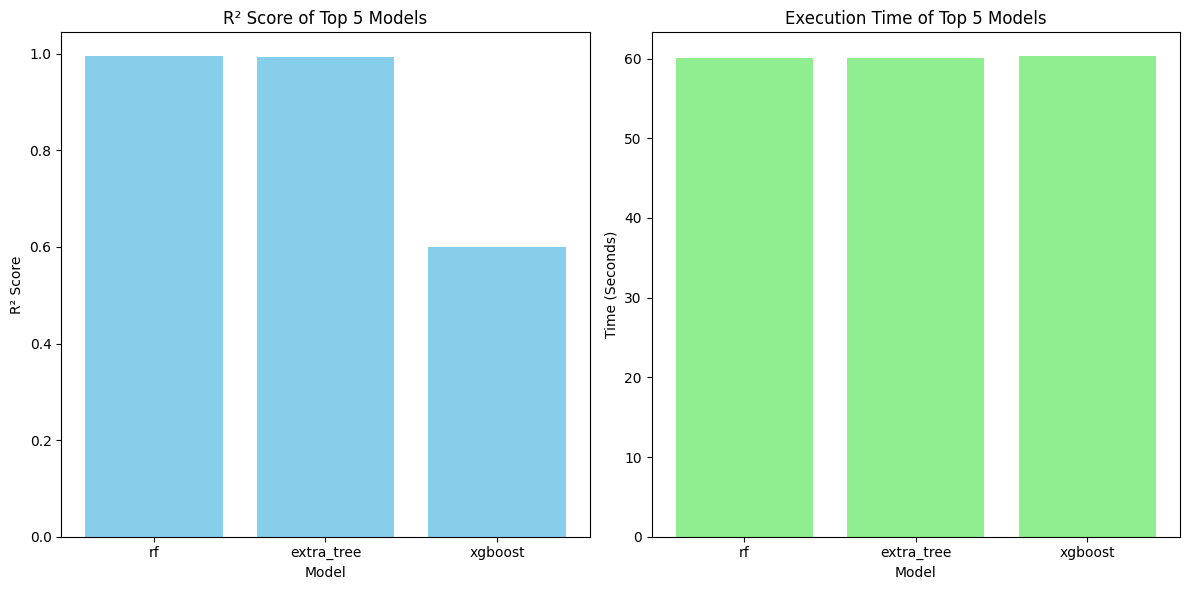

Top 5 Models Based on R² Score and Execution Time
1. Model: rf, R²: 0.9945, Time: 60.08 seconds
2. Model: extra_tree, R²: 0.9931, Time: 60.05 seconds
3. Model: xgboost, R²: 0.5994, Time: 60.27 seconds


In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from flaml import AutoML

# Create a sample DataFrame (you can replace this with your actual data)
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'energy_consumption': [2.5, 3.1, 3.6, 4.0, 4.5, 5.1, 5.6, 6.0, 6.5, 7.1]  # Target variable
})

# Split features (X) and target (y)
X = df.drop('energy_consumption', axis=1)
y = df['energy_consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean feature names by replacing special characters (if necessary)
X_train.columns = X_train.columns.str.replace(r'[^\w\s]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^\w\s]', '', regex=True)

# List of estimators to evaluate
estimators = ["lgbm", "rf", "xgboost", "extra_tree", "catboost"]  # Add catboost for more models

# Dictionary to store model names, R² scores, and time taken
model_performance = []

for estimator in estimators:
    try:
        # Set the estimator to FLAML
        start_time = time.time()  # Start time
        automl = AutoML()

        # Fit the model with the given estimator
        automl.fit(X_train, y_train, task="regression", time_budget=60, estimator_list=[estimator])  # Adjust time_budget as needed
        end_time = time.time()  # End time

        # Calculate the time taken
        elapsed_time = end_time - start_time

        # Predict on the test set
        y_pred = automl.predict(X_test)

        # Calculate the R² score
        r2 = r2_score(y_test, y_pred)

        # Append the model name, R² score, and time taken
        model_performance.append((estimator, r2, elapsed_time))
    except Exception as e:
        print(f"Error with estimator {estimator}: {e}")

# Sort the models by R² score in descending order
model_performance = sorted(model_performance, key=lambda x: x[1], reverse=True)

# Extract the top 5 models for graph plotting (or all available models if fewer than 5)
num_models = min(5, len(model_performance))
top_models = model_performance[:num_models]
model_names = [x[0] for x in top_models]
r2_scores = [x[1] for x in top_models]
execution_times = [x[2] for x in top_models]

# Plotting the R² scores of top 5 models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("R² Score of Top 5 Models")

# Plotting the Execution Time of top 5 models
plt.subplot(1, 2, 2)
plt.bar(model_names, execution_times, color='lightgreen')
plt.xlabel("Model")
plt.ylabel("Time (Seconds)")
plt.title("Execution Time of Top 5 Models")

plt.tight_layout()
plt.show()

# Print the top 5 models based on R² score and their corresponding time taken
print("Top 5 Models Based on R² Score and Execution Time")
for i, (model, r2, time_taken) in enumerate(top_models):
    print(f"{i + 1}. Model: {model}, R²: {r2:.4f}, Time: {time_taken:.2f} seconds")

[flaml.automl.logger: 10-13 18:09:14] {1728} INFO - task = regression
[flaml.automl.logger: 10-13 18:09:14] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-13 18:09:14] {1838} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 10-13 18:09:14] {1955} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-13 18:09:14] {2393} INFO - Estimated sufficient time budget=665s. Estimated necessary time budget=1s.
[flaml.automl.logger: 10-13 18:09:14] {2442} INFO -  at 0.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-13 18:09:14] {2442} INFO -  at 0.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 2, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:14] {2442} INFO -  at 0.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 3, current learner lgbm
[flaml.automl.logger: 10-13 18:09:14] {2442} INFO -  at 0.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 4, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:14] {2442} INFO -  at 0.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 10-13 18:09:14] {2442} INFO -  at 0.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 10-13 18:09:14] {2442} INFO -  at 0.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 10-13 18:09:14] {2442} INFO -  at 0.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 8, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:14] {2442} INFO -  at 0.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 10-13 18:09:14] {2442} INFO -  at 0.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:14] {2258} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 0.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 11, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 0.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 12, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 0.9s,	estimator lgbm's best error=inf,	best estimator None's best err

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 14, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 15, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 17, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 19, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 20, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 21, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.4s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 23, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 24, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 25, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 26, current learner lgbm
[flaml.automl.logger: 10-13 18:09:15] {2442} INFO -  at 1.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:15] {2258} INFO - iteration 27, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 1.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 28, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 1.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 29, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 1.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 33, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 34, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 36, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 37, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 38, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 39, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 40, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 41, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 43, current learner lgbm
[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 44, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:16] {2442} INFO -  at 2.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:16] {2258} INFO - iteration 45, current learner lgbm
[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 2.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 2.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 47, current learner lgbm
[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 48, current learner lgbm
[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.0s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 50, current learner lgbm
[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 51, current learner lgbm
[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 53, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 55, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 56, current learner lgbm
[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 57, current learner lgbm
[flaml.automl.logger: 10-13 18:09:17] {2442} INFO -  at 3.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:17] {2258} INFO - iteration 58, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:18] {2442} INFO -  at 3.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:18] {2258} INFO - iteration 59, current learner lgbm
[flaml.automl.logger: 10-13 18:09:18] {2442} INFO -  at 3.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:18] {2258} INFO - iteration 60, current learner lgbm
[flaml.automl.logger: 10-13 18:09:18] {2442} INFO -  at 4.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:18] {2258} INFO - iteration 61, current learner lgbm
[flaml.automl.logger: 10-13 18:09:18] {2442} INFO -  at 4.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:18] {2258} INFO - iteration 62, current learner lgbm
[flaml.automl.logger: 10-13 18:09:18] {2442} INFO -  at 4.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:18] {2258} INFO - iteration 63, current learner lgbm
[flaml.automl.logger: 10-13 18:09:18] {2442} INFO -  at 4.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:18] {2258} INFO - iteration 64, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:18] {2442} INFO -  at 4.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:18] {2258} INFO - iteration 65, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:18] {2442} INFO -  at 4.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:18] {2258} INFO - iteration 66, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:19] {2442} INFO -  at 5.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:19] {2258} INFO - iteration 67, current learner lgbm
[flaml.automl.logger: 10-13 18:09:19] {2442} INFO -  at 5.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:19] {2258} INFO - iteration 68, current learner lgbm
[flaml.automl.logger: 10-13 18:09:19] {2442} INFO -  at 5.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:19] {2258} INFO - iteration 69, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:19] {2442} INFO -  at 5.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:19] {2258} INFO - iteration 70, current learner lgbm
[flaml.automl.logger: 10-13 18:09:19] {2442} INFO -  at 5.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:19] {2258} INFO - iteration 71, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:19] {2442} INFO -  at 5.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:19] {2258} INFO - iteration 72, current learner lgbm
[flaml.automl.logger: 10-13 18:09:19] {2442} INFO -  at 5.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:19] {2258} INFO - iteration 73, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:19] {2442} INFO -  at 5.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:19] {2258} INFO - iteration 74, current learner lgbm
[flaml.automl.logger: 10-13 18:09:20] {2442} INFO -  at 5.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:20] {2258} INFO - iteration 75, current learner lgbm
[flaml.automl.logger: 10-13 18:09:20] {2442} INFO -  at 5.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:20] {2258} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 10-13 18:09:20] {2442} INFO -  at 6.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:20] {2258} INFO - iteration 77, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:20] {2442} INFO -  at 6.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:20] {2258} INFO - iteration 78, current learner lgbm
[flaml.automl.logger: 10-13 18:09:20] {2442} INFO -  at 6.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:20] {2258} INFO - iteration 79, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:20] {2442} INFO -  at 6.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:20] {2258} INFO - iteration 80, current learner lgbm
[flaml.automl.logger: 10-13 18:09:20] {2442} INFO -  at 6.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:20] {2258} INFO - iteration 81, current learner lgbm
[flaml.automl.logger: 10-13 18:09:20] {2442} INFO -  at 6.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:20] {2258} INFO - iteration 82, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:20] {2442} INFO -  at 6.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:20] {2258} INFO - iteration 83, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:21] {2442} INFO -  at 7.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:21] {2258} INFO - iteration 84, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:21] {2442} INFO -  at 7.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:21] {2258} INFO - iteration 85, current learner lgbm
[flaml.automl.logger: 10-13 18:09:21] {2442} INFO -  at 7.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:21] {2258} INFO - iteration 86, current learner lgbm
[flaml.automl.logger: 10-13 18:09:21] {2442} INFO -  at 7.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:21] {2258} INFO - iteration 87, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:21] {2442} INFO -  at 7.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:21] {2258} INFO - iteration 88, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 7.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 89, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 7.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 90, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 91, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 92, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 93, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 94, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 95, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.2s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 97, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 98, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 99, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 100, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 101, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 103, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 104, current learner lgbm
[flaml.automl.logger: 10-13 18:09:22] {2442} INFO -  at 8.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:22] {2258} INFO - iteration 105, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 8.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 106, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 8.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 107, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 8.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 108, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 109, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 110, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 111, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 112, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 113, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 114, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 115, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.3s,	estimator lgbm's best error=inf,	best estimator None's bes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 117, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 118, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 119, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 120, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 121, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 122, current learner lgbm
[flaml.automl.logger: 10-13 18:09:23] {2442} INFO -  at 9.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:23] {2258} INFO - iteration 123, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 9.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 124, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 9.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 125, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 126, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 127, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 128, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 129, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 130, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 131, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 132, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 133, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 134, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 135, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 136, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 138, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 139, current learner lgbm
[flaml.automl.logger: 10-13 18:09:24] {2442} INFO -  at 10.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:24] {2258} INFO - iteration 140, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 10.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 141, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 10.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 142, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 143, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 144, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 145, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 146, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 147, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 148, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 149, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 150, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 151, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 152, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 153, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 154, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 155, current learner lgbm
[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 156, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:25] {2442} INFO -  at 11.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:25] {2258} INFO - iteration 157, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 11.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 158, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 11.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 159, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 160, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 161, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 162, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 163, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 164, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 165, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 166, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 167, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 168, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 169, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 170, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 171, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 172, current learner lgbm
[flaml.automl.logger: 10-13 18:09:26] {2442} INFO -  at 12.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:26] {2258} INFO - iteration 173, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 12.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 174, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 12.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 175, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 176, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 177, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 178, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 179, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 180, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 181, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 182, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 183, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 184, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 185, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 186, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 187, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 188, current learner lgbm
[flaml.automl.logger: 10-13 18:09:27] {2442} INFO -  at 13.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:27] {2258} INFO - iteration 189, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 13.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 190, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 13.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 191, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 192, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 193, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 194, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 195, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 196, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 197, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 198, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 199, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 200, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 201, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 202, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 203, current learner lgbm
[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 204, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:28] {2442} INFO -  at 14.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:28] {2258} INFO - iteration 205, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 14.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 206, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 14.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 207, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 208, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 209, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 210, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 211, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 212, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 213, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 214, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 215, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 216, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 217, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 218, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 219, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 220, current learner lgbm
[flaml.automl.logger: 10-13 18:09:29] {2442} INFO -  at 15.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:29] {2258} INFO - iteration 221, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 15.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 222, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 15.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 223, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 225, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 226, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 227, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 228, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 229, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 230, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 231, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 232, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 233, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 234, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 235, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 236, current learner lgbm
[flaml.automl.logger: 10-13 18:09:30] {2442} INFO -  at 16.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:30] {2258} INFO - iteration 237, current learner lgbm
[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 16.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 238, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 16.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 239, current learner lgbm
[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 240, current learner lgbm
[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 241, current learner lgbm
[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 242, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 243, current learner lgbm
[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 244, current learner lgbm
[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 245, current learner lgbm
[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 246, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 247, current learner lgbm
[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 248, current learner lgbm
[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 249, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 250, current learner lgbm
[flaml.automl.logger: 10-13 18:09:31] {2442} INFO -  at 17.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:31] {2258} INFO - iteration 251, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:32] {2442} INFO -  at 18.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:32] {2258} INFO - iteration 252, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:32] {2442} INFO -  at 18.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:32] {2258} INFO - iteration 253, current learner lgbm
[flaml.automl.logger: 10-13 18:09:32] {2442} INFO -  at 18.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:32] {2258} INFO - iteration 254, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:32] {2442} INFO -  at 18.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:32] {2258} INFO - iteration 255, current learner lgbm
[flaml.automl.logger: 10-13 18:09:32] {2442} INFO -  at 18.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:32] {2258} INFO - iteration 256, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:33] {2442} INFO -  at 18.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:33] {2258} INFO - iteration 257, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:33] {2442} INFO -  at 19.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:33] {2258} INFO - iteration 258, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:33] {2442} INFO -  at 19.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:33] {2258} INFO - iteration 259, current learner lgbm
[flaml.automl.logger: 10-13 18:09:33] {2442} INFO -  at 19.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:33] {2258} INFO - iteration 260, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:34] {2442} INFO -  at 19.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:34] {2258} INFO - iteration 261, current learner lgbm
[flaml.automl.logger: 10-13 18:09:34] {2442} INFO -  at 20.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:34] {2258} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 10-13 18:09:34] {2442} INFO -  at 20.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:34] {2258} INFO - iteration 263, current learner lgbm
[flaml.automl.logger: 10-13 18:09:34] {2442} INFO -  at 20.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, an

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:34] {2442} INFO -  at 20.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:34] {2258} INFO - iteration 265, current learner lgbm
[flaml.automl.logger: 10-13 18:09:34] {2442} INFO -  at 20.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:34] {2258} INFO - iteration 266, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:34] {2442} INFO -  at 20.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:34] {2258} INFO - iteration 267, current learner lgbm
[flaml.automl.logger: 10-13 18:09:34] {2442} INFO -  at 20.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:34] {2258} INFO - iteration 268, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:35] {2442} INFO -  at 20.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:35] {2258} INFO - iteration 269, current learner lgbm
[flaml.automl.logger: 10-13 18:09:35] {2442} INFO -  at 21.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:35] {2258} INFO - iteration 270, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:35] {2442} INFO -  at 21.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:35] {2258} INFO - iteration 271, current learner lgbm
[flaml.automl.logger: 10-13 18:09:35] {2442} INFO -  at 21.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:35] {2258} INFO - iteration 272, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:35] {2442} INFO -  at 21.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:35] {2258} INFO - iteration 273, current learner lgbm
[flaml.automl.logger: 10-13 18:09:35] {2442} INFO -  at 21.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:35] {2258} INFO - iteration 274, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:35] {2442} INFO -  at 21.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:35] {2258} INFO - iteration 275, current learner lgbm
[flaml.automl.logger: 10-13 18:09:35] {2442} INFO -  at 21.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:35] {2258} INFO - iteration 276, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:36] {2442} INFO -  at 21.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:36] {2258} INFO - iteration 277, current learner lgbm
[flaml.automl.logger: 10-13 18:09:36] {2442} INFO -  at 21.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:36] {2258} INFO - iteration 278, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:36] {2442} INFO -  at 22.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:36] {2258} INFO - iteration 279, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:36] {2442} INFO -  at 22.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:36] {2258} INFO - iteration 280, current learner lgbm
[flaml.automl.logger: 10-13 18:09:36] {2442} INFO -  at 22.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:36] {2258} INFO - iteration 281, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:36] {2442} INFO -  at 22.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:36] {2258} INFO - iteration 282, current learner lgbm
[flaml.automl.logger: 10-13 18:09:36] {2442} INFO -  at 22.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:37] {2258} INFO - iteration 283, current learner lgbm
[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 22.9s,	estimator lgbm's best erro

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 23.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:37] {2258} INFO - iteration 285, current learner lgbm
[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 23.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:37] {2258} INFO - iteration 286, current learner lgbm
[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 23.1s,	estimator lgbm's bes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 23.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:37] {2258} INFO - iteration 288, current learner lgbm
[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 23.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:37] {2258} INFO - iteration 289, current learner lgbm
[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 23.3s,	estimator lgbm

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 23.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:37] {2258} INFO - iteration 292, current learner lgbm
[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 23.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:37] {2258} INFO - iteration 293, current learner lgbm
[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 23.6s,	estima

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:37] {2258} INFO - iteration 294, current learner lgbm
[flaml.automl.logger: 10-13 18:09:37] {2442} INFO -  at 23.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:37] {2258} INFO - iteration 295, current learner lgbm
[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  at 23.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:38] {2258} INFO - iteration 2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  at 23.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:38] {2258} INFO - iteration 297, current learner lgbm
[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  at 24.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:38] {2258} INFO - iteration 298, current learner lgbm
[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  at 24.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  at 24.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:38] {2258} INFO - iteration 300, current learner lgbm
[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  at 24.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:38] {2258} INFO - iteration 301, current learner lgbm
[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  at 24.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:38] {2258} INFO - iteration 303, current learner lgbm
[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  at 24.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:38] {2258} INFO - iteration 304, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  at 24.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:38] {2258} INFO - iteration 305, current learner lgbm
[flaml.automl.logger: 10-13 18:09:38] {2442} INFO -  at 24.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:38] {2258} INFO - iteration 306, current learner lgbm
[flaml.automl.logger: 10-13 18:09:38] {2442

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:39] {2442} INFO -  at 24.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:39] {2258} INFO - iteration 309, current learner lgbm
[flaml.automl.logger: 10-13 18:09:39] {2442} INFO -  at 25.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:39] {2258} INFO - iteration 310, current learner lgbm
[flaml.automl.logger: 10-13 18:09:3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:39] {2442} INFO -  at 25.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:39] {2258} INFO - iteration 312, current learner lgbm
[flaml.automl.logger: 10-13 18:09:39] {2442} INFO -  at 25.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:39] {2258} INFO - iteration 313, current learner lgbm
[flaml.automl.logger: 10-13 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:39] {2442} INFO -  at 25.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:39] {2258} INFO - iteration 315, current learner lgbm
[flaml.automl.logger: 10-13 18:09:39] {2442} INFO -  at 25.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:39] {2258} INFO - iteration 316, current learner lgbm
[flaml.automl.logger: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:39] {2442} INFO -  at 25.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:39] {2258} INFO - iteration 318, current learner lgbm
[flaml.automl.logger: 10-13 18:09:39] {2442} INFO -  at 25.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:39] {2258} INFO - iteration 319, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:39] {2442} INFO -  at 25.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:39] {2258} INFO - iteration 320, current learner lgbm
[flaml.automl.logger: 10-13 18:09:40] {2442} INFO -  at 25.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:40] {2258} INFO - iteration 321, current learner lgbm
[flaml.automl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:40] {2442} INFO -  at 26.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:40] {2258} INFO - iteration 323, current learner lgbm
[flaml.automl.logger: 10-13 18:09:40] {2442} INFO -  at 26.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:40] {2258} INFO - iteration 324, current learner lgbm
[flaml.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:40] {2442} INFO -  at 26.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:40] {2258} INFO - iteration 326, current learner lgbm
[flaml.automl.logger: 10-13 18:09:40] {2442} INFO -  at 26.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:40] {2258} INFO - iteration 327, current learner lgbm
[

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:40] {2442} INFO -  at 26.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:40] {2258} INFO - iteration 329, current learner lgbm
[flaml.automl.logger: 10-13 18:09:40] {2442} INFO -  at 26.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:40] {2258} INFO - iteration 330, current learner 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:40] {2442} INFO -  at 26.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:40] {2258} INFO - iteration 331, current learner lgbm
[flaml.automl.logger: 10-13 18:09:40] {2442} INFO -  at 26.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:40] {2258} INFO - iteration 332, current lear

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:41] {2442} INFO -  at 26.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:41] {2258} INFO - iteration 334, current learner lgbm
[flaml.automl.logger: 10-13 18:09:41] {2442} INFO -  at 27.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:41] {2258} INFO - iteration 335, curren

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:41] {2442} INFO -  at 27.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:41] {2258} INFO - iteration 337, current learner lgbm
[flaml.automl.logger: 10-13 18:09:41] {2442} INFO -  at 27.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:41] {2258} INFO - iteration 338, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:41] {2442} INFO -  at 27.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:41] {2258} INFO - iteration 340, current learner lgbm
[flaml.automl.logger: 10-13 18:09:41] {2442} INFO -  at 27.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:41] {2258} INFO - iteration

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:41] {2442} INFO -  at 27.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:41] {2258} INFO - iteration 343, current learner lgbm
[flaml.automl.logger: 10-13 18:09:41] {2442} INFO -  at 27.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:41] {2258} INFO - ite

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:41] {2442} INFO -  at 27.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:41] {2258} INFO - iteration 345, current learner lgbm
[flaml.automl.logger: 10-13 18:09:42] {2442} INFO -  at 27.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:42] {2258} INFO -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:42] {2442} INFO -  at 28.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:42] {2258} INFO - iteration 348, current learner lgbm
[flaml.automl.logger: 10-13 18:09:42] {2442} INFO -  at 28.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:42] {2258} 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:42] {2442} INFO -  at 28.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:42] {2258} INFO - iteration 351, current learner lgbm
[flaml.automl.logger: 10-13 18:09:42] {2442} INFO -  at 28.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:42] {

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:42] {2442} INFO -  at 28.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:42] {2258} INFO - iteration 354, current learner lgbm
[flaml.automl.logger: 10-13 18:09:42] {2442} INFO -  at 28.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:42] {2258} INFO - iteration 356, current learner lgbm
[flaml.automl.logger: 10-13 18:09:42] {2442} INFO -  at 28.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:42] {2258} INFO - iteration 357, current learner lgbm
[flaml.automl.logger: 10-13 18:09:43] {2442} INFO -  at 28.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:43] {2442} INFO -  at 29.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:43] {2258} INFO - iteration 360, current learner lgbm
[flaml.automl.logger: 10-13 18:09:43] {2442} INFO -  at 29.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:43] {2442} INFO -  at 29.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:43] {2258} INFO - iteration 363, current learner lgbm
[flaml.automl.logger: 10-13 18:09:43] {2442} INFO -  at 29.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:43] {2442} INFO -  at 29.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:43] {2258} INFO - iteration 366, current learner lgbm
[flaml.automl.logger: 10-13 18:09:43] {2442} INFO -  at 29.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.au

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:43] {2442} INFO -  at 29.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:43] {2258} INFO - iteration 368, current learner lgbm
[flaml.automl.logger: 10-13 18:09:43] {2442} INFO -  at 29.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flam

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:44] {2258} INFO - iteration 370, current learner lgbm
[flaml.automl.logger: 10-13 18:09:44] {2442} INFO -  at 29.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:44] {2258} INFO - iteration 371, current learner lgbm
[flaml.automl.logger: 10-13 18:09:44] {2442} I

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:44] {2442} INFO -  at 30.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:44] {2258} INFO - iteration 374, current learner lgbm
[flaml.automl.logger: 10-13 18:09:44] {2442} INFO -  at 30.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:44] {2442} INFO -  at 30.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:44] {2258} INFO - iteration 377, current learner lgbm
[flaml.automl.logger: 10-13 18:09:44] {2442} INFO -  at 30.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:44] {2258} INFO - iteration 379, current learner lgbm
[flaml.automl.logger: 10-13 18:09:44] {2442} INFO -  at 30.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:44] {2258} INFO - iteration 380, current learner lgbm
[flaml.automl.logger: 10-13 18:09:44] {2442} INFO -  at 30.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:45] {2442} INFO -  at 30.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:45] {2258} INFO - iteration 383, current learner lgbm
[flaml.automl.logger: 10-13 18:09:45] {2442} INFO -  at 31.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:45] {2442} INFO -  at 31.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:45] {2258} INFO - iteration 386, current learner lgbm
[flaml.automl.logger: 10-13 18:09:45] {2442} INFO -  at 31.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:45] {2442} INFO -  at 31.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:45] {2258} INFO - iteration 389, current learner lgbm
[flaml.automl.logger: 10-13 18:09:45] {2442} INFO -  at 31.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times th

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:45] {2258} INFO - iteration 391, current learner lgbm
[flaml.automl.logger: 10-13 18:09:45] {2442} INFO -  at 31.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:45] {2258} INFO - iteration 392, current learner lgbm
[fla

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:46] {2442} INFO -  at 31.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:46] {2258} INFO - iteration 395, current learner lgbm
[flaml.automl.logger: 10-13 18:09:46] {2442} INFO -  at 32.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:46] {2442} INFO -  at 32.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:46] {2258} INFO - iteration 398, current learner lgbm
[flaml.automl.logger: 10-13 18:09:46] {2442} INFO -  at 32.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:46] {2442} INFO -  at 32.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:46] {2258} INFO - iteration 401, current learner lgbm
[flaml.automl.logger: 10-13 18:09:46] {2442} INFO -  at 32.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:46] {2442} INFO -  at 32.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:46] {2258} INFO - iteration 404, current learner lgbm
[flaml.automl.logger: 10-13 18:09:46] {2442} INFO -  at 32.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:47] {2442} INFO -  at 32.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:47] {2258} INFO - iteration 406, current learner lgbm
[flaml.automl.logger: 10-13 18:09:47] {2442} INFO -  at 33.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:47] {2442} INFO -  at 33.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:47] {2258} INFO - iteration 408, current learner lgbm
[flaml.automl.logger: 10-13 18:09:47] {2442} INFO -  at 33.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:47] {2442} INFO -  at 33.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:47] {2258} INFO - iteration 410, current learner lgbm
[flaml.automl.logger: 10-13 18:09:47] {2442} INFO -  at 33.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:47] {2442} INFO -  at 33.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:47] {2258} INFO - iteration 412, current learner lgbm
[flaml.automl.logger: 10-13 18:09:47] {2442} INFO -  at 33.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:48] {2442} INFO -  at 34.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:48] {2258} INFO - iteration 414, current learner lgbm
[flaml.automl.logger: 10-13 18:09:48] {2442} INFO -  at 34.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:48] {2442} INFO -  at 34.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:48] {2258} INFO - iteration 416, current learner lgbm
[flaml.automl.logger: 10-13 18:09:48] {2442} INFO -  at 34.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:48] {2442} INFO -  at 34.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:48] {2258} INFO - iteration 418, current learner lgbm
[flaml.automl.logger: 10-13 18:09:48] {2442} INFO -  at 34.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:48] {2258} INFO - iteration 419, current learner lgbm
[flaml.automl.logger: 10-13 18:09:49] {2442} INFO -  at 34.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:49] {2258} INFO - iteration 420, current learner lgbm
[flaml.automl.logger: 10-13 18:09:49] {2442} INFO -  at 35.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:49] {2442} INFO -  at 35.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:49] {2258} INFO - iteration 422, current learner lgbm
[flaml.automl.logger: 10-13 18:09:49] {2442} INFO -  at 35.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:49] {2442} INFO -  at 35.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:49] {2258} INFO - iteration 424, current learner lgbm
[flaml.automl.logger: 10-13 18:09:49] {2442} INFO -  at 35.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:49] {2442} INFO -  at 35.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:49] {2258} INFO - iteration 426, current learner lgbm
[flaml.automl.logger: 10-13 18:09:50] {2442} INFO -  at 35.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:50] {2258} INFO - iteration 427, current learner lgbm
[flaml.automl.logger: 10-13 18:09:50] {2442} INFO -  at 36.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:50] {2442} INFO -  at 36.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:50] {2258} INFO - iteration 430, current learner lgbm
[flaml.automl.logger: 10-13 18:09:50] {2442} INFO -  at 36.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:50] {2442} INFO -  at 36.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:50] {2258} INFO - iteration 432, current learner lgbm
[flaml.automl.logger: 10-13 18:09:50] {2442} INFO -  at 36.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:51] {2442} INFO -  at 37.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:51] {2258} INFO - iteration 434, current learner lgbm
[flaml.automl.logger: 10-13 18:09:51] {2442} INFO -  at 37.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:51] {2442} INFO -  at 37.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:51] {2258} INFO - iteration 436, current learner lgbm
[flaml.automl.logger: 10-13 18:09:51] {2442} INFO -  at 37.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:51] {2442} INFO -  at 37.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:51] {2258} INFO - iteration 438, current learner lgbm
[flaml.automl.logger: 10-13 18:09:51] {2442} INFO -  at 37.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:51] {2442} INFO -  at 37.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:52] {2258} INFO - iteration 440, current learner lgbm
[flaml.automl.logger: 10-13 18:09:52] {2442} INFO -  at 38.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:52] {2442} INFO -  at 38.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:52] {2258} INFO - iteration 442, current learner lgbm
[flaml.automl.logger: 10-13 18:09:52] {2442} INFO -  at 38.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:52] {2442} INFO -  at 38.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:52] {2258} INFO - iteration 444, current learner lgbm
[flaml.automl.logger: 10-13 18:09:52] {2442} INFO -  at 38.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:52] {2442} INFO -  at 38.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:52] {2258} INFO - iteration 446, current learner lgbm
[flaml.automl.logger: 10-13 18:09:53] {2442} INFO -  at 38.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:53] {2258} INFO - iteration 447, current learner lgbm
[flaml.automl.logger: 10-13 18:09:53] {2442} INFO -  at 39.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:53] {2442} INFO -  at 39.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:53] {2258} INFO - iteration 450, current learner lgbm
[flaml.automl.logger: 10-13 18:09:53] {2442} INFO -  at 39.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:53] {2442} INFO -  at 39.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:53] {2258} INFO - iteration 452, current learner lgbm
[flaml.automl.logger: 10-13 18:09:53] {2442} INFO -  at 39.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:54] {2442} INFO -  at 39.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:54] {2258} INFO - iteration 454, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:54] {2442} INFO -  at 40.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:54] {2258} INFO - iteration 455, current learner lgbm
[flaml.automl.logger: 10-13 18:09:54] {2442} INFO -  at 40.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:54] {2442} INFO -  at 40.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:54] {2258} INFO - iteration 458, current learner lgbm
[flaml.automl.logger: 10-13 18:09:54] {2442} INFO -  at 40.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:56] {2442} INFO -  at 42.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:56] {2258} INFO - iteration 460, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:56] {2442} INFO -  at 42.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:56] {2258} INFO - iteration 461, current learner lgbm
[flaml.automl.logger: 10-13 18:09:56] {2442} INFO -  at 42.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:57] {2442} INFO -  at 42.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:57] {2258} INFO - iteration 463, current learner lgbm
[flaml.automl.logger: 10-13 18:09:57] {2442} INFO -  at 43.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:57] {2258} INFO - iteration 464, current learner lgbm
[flaml.automl.logger: 10-13 18:09:57] {2442} INFO -  at 43.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:57] {2442} INFO -  at 43.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:57] {2258} INFO - iteration 467, current learner lgbm
[flaml.automl.logger: 10-13 18:09:57] {2442} INFO -  at 43.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:57] {2442} INFO -  at 43.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:57] {2258} INFO - iteration 469, current learner lgbm
[flaml.automl.logger: 10-13 18:09:58] {2442} INFO -  at 43.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:58] {2442} INFO -  at 44.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:58] {2258} INFO - iteration 471, current learner lgbm
[flaml.automl.logger: 10-13 18:09:58] {2442} INFO -  at 44.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:58] {2442} INFO -  at 44.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:58] {2258} INFO - iteration 473, current learner lgbm
[flaml.automl.logger: 10-13 18:09:58] {2442} INFO -  at 44.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:09:58] {2442} INFO -  at 44.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:58] {2258} INFO - iteration 475, current learner lgbm
[flaml.automl.logger: 10-13 18:09:58] {2442} INFO -  at 44.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:58] {2258} INFO - iteration 477, current learner lgbm
[flaml.automl.logger: 10-13 18:09:59] {2442} INFO -  at 44.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:59] {2442} INFO -  at 45.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:59] {2258} INFO - iteration 481, current learner lgbm
[flaml.automl.logger: 10-13 18:09:59] {2442} INFO -  at 45.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:59] {2442} INFO -  at 45.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:59] {2258} INFO - iteration 484, current learner lgbm
[flaml.automl.logger: 10-13 18:09:59] {2442} INFO -  at 45.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:09:59] {2442} INFO -  at 45.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:09:59] {2258} INFO - iteration 486, current learner lgbm
[flaml.automl.logger: 10-13 18:09:59] {2442} INFO -  at 45.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:09:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:00] {2442} INFO -  at 45.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:00] {2258} INFO - iteration 489, current learner lgbm
[flaml.automl.logger: 10-13 18:10:00] {2442} INFO -  at 45.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:00] {2442} INFO -  at 46.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:00] {2258} INFO - iteration 492, current learner lgbm
[flaml.automl.logger: 10-13 18:10:00] {2442} INFO -  at 46.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:00] {2442} INFO -  at 46.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:00] {2258} INFO - iteration 495, current learner lgbm
[flaml.automl.logger: 10-13 18:10:00] {2442} INFO -  at 46.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:00] {2442} INFO -  at 46.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:00] {2258} INFO - iteration 497, current learner lgbm
[flaml.automl.logger: 10-13 18:10:00] {2442} INFO -  at 46.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:00] {2442} INFO -  at 46.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:01] {2258} INFO - iteration 500, current learner lgbm
[flaml.automl.logger: 10-13 18:10:01] {2442} INFO -  at 46.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:01] {2442} INFO -  at 47.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:01] {2258} INFO - iteration 503, current learner lgbm
[flaml.automl.logger: 10-13 18:10:01] {2442} INFO -  at 47.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:01] {2442} INFO -  at 47.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:01] {2258} INFO - iteration 506, current learner lgbm
[flaml.automl.logger: 10-13 18:10:01] {2442} INFO -  at 47.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:01] {2442} INFO -  at 47.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:01] {2258} INFO - iteration 508, current learner lgbm
[flaml.automl.logger: 10-13 18:10:01] {2442} INFO -  at 47.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:01] {2442} INFO -  at 47.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:01] {2258} INFO - iteration 510, current learner lgbm
[flaml.automl.logger: 10-13 18:10:02] {2442} INFO -  at 47.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:02] {2442} INFO -  at 48.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:02] {2258} INFO - iteration 513, current learner lgbm
[flaml.automl.logger: 10-13 18:10:02] {2442} INFO -  at 48.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:02] {2442} INFO -  at 48.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:02] {2258} INFO - iteration 516, current learner lgbm
[flaml.automl.logger: 10-13 18:10:02] {2442} INFO -  at 48.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:02] {2442} INFO -  at 48.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:02] {2258} INFO - iteration 518, current learner lgbm
[flaml.automl.logger: 10-13 18:10:02] {2442} INFO -  at 48.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:02] {2442} INFO -  at 48.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:02] {2258} INFO - iteration 520, current learner lgbm
[flaml.automl.logger: 10-13 18:10:02] {2442} INFO -  at 48.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:03] {2442} INFO -  at 49.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:03] {2258} INFO - iteration 523, current learner lgbm
[flaml.automl.logger: 10-13 18:10:03] {2442} INFO -  at 49.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:03] {2442} INFO -  at 49.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:03] {2258} INFO - iteration 526, current learner lgbm
[flaml.automl.logger: 10-13 18:10:03] {2442} INFO -  at 49.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:03] {2442} INFO -  at 49.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:03] {2258} INFO - iteration 528, current learner lgbm
[flaml.automl.logger: 10-13 18:10:03] {2442} INFO -  at 49.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:03] {2442} INFO -  at 49.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:03] {2258} INFO - iteration 531, current learner lgbm
[flaml.automl.logger: 10-13 18:10:04] {2442} INFO -  at 49.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:04] {2442} INFO -  at 50.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:04] {2258} INFO - iteration 533, current learner lgbm
[flaml.automl.logger: 10-13 18:10:04] {2442} INFO -  at 50.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:04] {2442} INFO -  at 50.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:04] {2258} INFO - iteration 536, current learner lgbm
[flaml.automl.logger: 10-13 18:10:04] {2442} INFO -  at 50.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time excee

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:04] {2258} INFO - iteration 538, current learner lgbm
[flaml.automl.logger: 10-13 18:10:04] {2442} INFO -  at 50.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:04] {2258} INFO - iteration 541, current learner lgbm
[flaml.automl.logger: 10-13 18:10:04] {2442} INFO -  at 50.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:04] {2258} INFO - iteration 542, current learner lgbm
[flaml.automl.logger: 10-13 18:10:05] {2442} INFO -  at 50.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:05] {2459} WARNING - All estim

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:05] {2442} INFO -  at 51.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:05] {2258} INFO - iteration 545, current learner lgbm
[flaml.automl.logger: 10-13 18:10:05] {2442} INFO -  at 51.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:05] {2442} INFO -  at 51.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:05] {2258} INFO - iteration 548, current learner lgbm
[flaml.automl.logger: 10-13 18:10:05] {2442} INFO -  at 51.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total searc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:05] {2442} INFO -  at 51.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:05] {2258} INFO - iteration 550, current learner lgbm
[flaml.automl.logger: 10-13 18:10:05] {2442} INFO -  at 51.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total sea

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:05] {2442} INFO -  at 51.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:05] {2258} INFO - iteration 552, current learner lgbm
[flaml.automl.logger: 10-13 18:10:05] {2442} INFO -  at 51.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:06] {2442} INFO -  at 51.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:06] {2258} INFO - iteration 554, current learner lgbm
[flaml.automl.logger: 10-13 18:10:06] {2442} INFO -  at 52.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:06] {2442} INFO -  at 52.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:06] {2258} INFO - iteration 557, current learner lgbm
[flaml.automl.logger: 10-13 18:10:06] {2442} INFO -  at 52.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the to

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:06] {2442} INFO -  at 52.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:06] {2258} INFO - iteration 560, current learner lgbm
[flaml.automl.logger: 10-13 18:10:06] {2442} INFO -  at 52.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:06] {2258} INFO - iteration 562, current learner lgbm
[flaml.automl.logger: 10-13 18:10:06] {2442} INFO -  at 52.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:06] {2258} INFO - iteration 563, current learner lgbm
[flaml.automl.logger: 10-13 18:10:07] {2442} INFO -  at 52.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:07] {2459

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:07] {2442} INFO -  at 53.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:07] {2258} INFO - iteration 565, current learner lgbm
[flaml.automl.logger: 10-13 18:10:07] {2442} INFO -  at 53.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, an

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:07] {2442} INFO -  at 53.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:07] {2258} INFO - iteration 568, current learner lgbm
[flaml.automl.logger: 10-13 18:10:07] {2442} INFO -  at 53.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:07] {2442} INFO -  at 53.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:07] {2258} INFO - iteration 571, current learner lgbm
[flaml.automl.logger: 10-13 18:10:07] {2442} INFO -  at 53.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:07] {2459} WARNING - All estimator hyperparameters local search has converged at least on

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:07] {2442} INFO -  at 53.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:07] {2258} INFO - iteration 573, current learner lgbm
[flaml.automl.logger: 10-13 18:10:07] {2442} INFO -  at 53.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:07] {2459} WARNING - All estimator hyperparameters local search has converged at least 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:08] {2442} INFO -  at 54.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:08] {2258} INFO - iteration 576, current learner lgbm
[flaml.automl.logger: 10-13 18:10:08] {2442} INFO -  at 54.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:08] {2459} WARNING - All estimator hyperparameters local search has converged at lea

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:08] {2442} INFO -  at 54.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:08] {2258} INFO - iteration 578, current learner lgbm
[flaml.automl.logger: 10-13 18:10:08] {2442} INFO -  at 54.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:08] {2459} WARNING - All estimator hyperparameters local search has converged at l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:08] {2442} INFO -  at 54.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:08] {2258} INFO - iteration 580, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:09] {2442} INFO -  at 55.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:09] {2258} INFO - iteration 581, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:09] {2442} INFO -  at 55.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:09] {2258} INFO - iteration 582, current learner lgbm
[flaml.automl.logger: 10-13 18:10:10] {2442} INFO -  at 55.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:10] {2459} WARNING - All estimator hyperparameters local search has converged 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:10] {2442} INFO -  at 55.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:10] {2258} INFO - iteration 584, current learner lgbm
[flaml.automl.logger: 10-13 18:10:10] {2442} INFO -  at 56.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:10] {2459} WARNING - All estimator hyperparameters local search has converge

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:10] {2442} INFO -  at 56.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:10] {2258} INFO - iteration 586, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:10] {2442} INFO -  at 56.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:10] {2258} INFO - iteration 587, current learner lgbm
[flaml.automl.logger: 10-13 18:10:10] {2442} INFO -  at 56.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:10] {2459} WARNING - All estimator hyperparameters local search has conve

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:10] {2442} INFO -  at 56.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:10] {2258} INFO - iteration 589, current learner lgbm
[flaml.automl.logger: 10-13 18:10:10] {2442} INFO -  at 56.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:10] {2459} WARNING - All estimator hyperparameters local search has con

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:11] {2442} INFO -  at 56.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:11] {2258} INFO - iteration 591, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:11] {2442} INFO -  at 57.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:11] {2258} INFO - iteration 592, current learner lgbm
[flaml.automl.logger: 10-13 18:10:11] {2442} INFO -  at 57.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:11] {2459} WARNING - All estimator hyperparameters local search has 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:11] {2442} INFO -  at 57.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:11] {2258} INFO - iteration 594, current learner lgbm
[flaml.automl.logger: 10-13 18:10:11] {2442} INFO -  at 57.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:11] {2459} WARNING - All estimator hyperparameters local search ha

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:11] {2442} INFO -  at 57.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:11] {2258} INFO - iteration 596, current learner lgbm
[flaml.automl.logger: 10-13 18:10:11] {2442} INFO -  at 57.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:11] {2459} WARNING - All estimator hyperparameters local search 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:12] {2442} INFO -  at 57.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:12] {2258} INFO - iteration 598, current learner lgbm
[flaml.automl.logger: 10-13 18:10:12] {2442} INFO -  at 58.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:12] {2459} WARNING - All estimator hyperparameters local searc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:12] {2442} INFO -  at 58.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:12] {2258} INFO - iteration 600, current learner lgbm
[flaml.automl.logger: 10-13 18:10:12] {2442} INFO -  at 58.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:12] {2459} WARNING - All estimator hyperparameters local sea

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:12] {2442} INFO -  at 58.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:12] {2258} INFO - iteration 602, current learner lgbm
[flaml.automl.logger: 10-13 18:10:12] {2442} INFO -  at 58.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:12] {2459} WARNING - All estimator hyperparameters local s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:13] {2442} INFO -  at 59.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:13] {2258} INFO - iteration 604, current learner lgbm
[flaml.automl.logger: 10-13 18:10:13] {2442} INFO -  at 59.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:13] {2258} INFO - iteration 605, current learner lgbm
[flaml.automl.logger: 10-13 18:10:13] {2442} INFO -  at 59.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:14] {2442} INFO -  at 60.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:14] {2258} INFO - iteration 609, current learner lgbm
[flaml.automl.logger: 10-13 18:10:14] {2442} INFO -  at 60.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:14] {2459} WARNING - All estimator hyperparameters 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:14] {2442} INFO -  at 60.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:14] {2258} INFO - iteration 612, current learner lgbm
[flaml.automl.logger: 10-13 18:10:14] {2442} INFO -  at 60.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:14] {2459} WARNING - All estimator hyperparamete

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:14] {2258} INFO - iteration 614, current learner lgbm
[flaml.automl.logger: 10-13 18:10:14] {2442} INFO -  at 60.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:14] {2258} INFO - iteration 615, current learner lgbm
[flaml.automl.logger: 10-13 18:10:14] {2442} INFO -  at 60.6s,	estimator lgbm's best error=inf,	best estimator None's best e

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:14] {2442} INFO -  at 60.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:14] {2258} INFO - iteration 617, current learner lgbm
[flaml.automl.logger: 10-13 18:10:15] {2442} INFO -  at 60.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:15] {2459} WARNING - All estimator hyperpar

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:15] {2442} INFO -  at 61.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:15] {2258} INFO - iteration 620, current learner lgbm
[flaml.automl.logger: 10-13 18:10:15] {2442} INFO -  at 61.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:15] {2459} WARNING - All estimator hyper

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:15] {2442} INFO -  at 61.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:15] {2258} INFO - iteration 623, current learner lgbm
[flaml.automl.logger: 10-13 18:10:15] {2442} INFO -  at 61.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:15] {2459} WARNING - All estimator hy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:15] {2258} INFO - iteration 625, current learner lgbm
[flaml.automl.logger: 10-13 18:10:15] {2442} INFO -  at 61.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:15] {2442} INFO -  at 61.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:15] {2258} INFO - iteration 628, current learner lgbm
[flaml.automl.logger: 10-13 18:10:16] {2442} INFO -  at 61.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:16] {2459} WARNING - All estimat

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:16] {2442} INFO -  at 62.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:16] {2258} INFO - iteration 631, current learner lgbm
[flaml.automl.logger: 10-13 18:10:16] {2442} INFO -  at 62.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:16] {2459} WARNING - All esti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:16] {2258} INFO - iteration 633, current learner lgbm
[flaml.automl.logger: 10-13 18:10:16] {2442} INFO -  at 62.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:16] {2258} INFO - iteration 634, current learner lgbm
[flaml.automl.logger: 10-13 18:10:16] {2442} INFO -  at 62.4s,	estimator lgbm's best error=inf,	best esti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:16] {2442} INFO -  at 62.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:16] {2258} INFO - iteration 636, current learner lgbm
[flaml.automl.logger: 10-13 18:10:16] {2442} INFO -  at 62.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:16] {2459} WARNING - All

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:16] {2442} INFO -  at 62.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:16] {2258} INFO - iteration 638, current learner lgbm
[flaml.automl.logger: 10-13 18:10:17] {2442} INFO -  at 62.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:17] {2459} WARNING - A

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:17] {2442} INFO -  at 63.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:17] {2258} INFO - iteration 641, current learner lgbm
[flaml.automl.logger: 10-13 18:10:17] {2442} INFO -  at 63.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:17] {2459} WARNING 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:17] {2442} INFO -  at 63.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:17] {2258} INFO - iteration 644, current learner lgbm
[flaml.automl.logger: 10-13 18:10:17] {2442} INFO -  at 63.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:17] {2459} WARNI

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:17] {2442} INFO -  at 63.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:17] {2258} INFO - iteration 646, current learner lgbm
[flaml.automl.logger: 10-13 18:10:17] {2442} INFO -  at 63.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:17] {2459} WAR

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:17] {2442} INFO -  at 63.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:17] {2258} INFO - iteration 648, current learner lgbm
[flaml.automl.logger: 10-13 18:10:17] {2442} INFO -  at 63.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:17] {2459} W

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:18] {2442} INFO -  at 63.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:18] {2258} INFO - iteration 650, current learner lgbm
[flaml.automl.logger: 10-13 18:10:18] {2442} INFO -  at 64.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:18] {2459}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:18] {2442} INFO -  at 64.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:18] {2258} INFO - iteration 654, current learner lgbm
[flaml.automl.logger: 10-13 18:10:18] {2442} INFO -  at 64.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:18] {2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:18] {2442} INFO -  at 64.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:18] {2258} INFO - iteration 657, current learner lgbm
[flaml.automl.logger: 10-13 18:10:18] {2442} INFO -  at 64.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:18]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:18] {2442} INFO -  at 64.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:18] {2258} INFO - iteration 659, current learner lgbm
[flaml.automl.logger: 10-13 18:10:19] {2442} INFO -  at 64.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:19] {2442} INFO -  at 65.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:19] {2258} INFO - iteration 662, current learner lgbm
[flaml.automl.logger: 10-13 18:10:19] {2442} INFO -  at 65.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:19] {2442} INFO -  at 65.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:19] {2258} INFO - iteration 665, current learner lgbm
[flaml.automl.logger: 10-13 18:10:19] {2442} INFO -  at 65.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:19] {2442} INFO -  at 65.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:19] {2258} INFO - iteration 667, current learner lgbm
[flaml.automl.logger: 10-13 18:10:19] {2442} INFO -  at 65.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:19] {2442} INFO -  at 65.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:19] {2258} INFO - iteration 669, current learner lgbm
[flaml.automl.logger: 10-13 18:10:19] {2442} INFO -  at 65.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:20] {2442} INFO -  at 65.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:20] {2258} INFO - iteration 671, current learner lgbm
[flaml.automl.logger: 10-13 18:10:20] {2442} INFO -  at 66.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:20] {2442} INFO -  at 66.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:20] {2258} INFO - iteration 675, current learner lgbm
[flaml.automl.logger: 10-13 18:10:20] {2442} INFO -  at 66.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logge

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:20] {2442} INFO -  at 66.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:20] {2258} INFO - iteration 677, current learner lgbm
[flaml.automl.logger: 10-13 18:10:20] {2442} INFO -  at 66.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.log

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:20] {2442} INFO -  at 66.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:20] {2258} INFO - iteration 679, current learner lgbm
[flaml.automl.logger: 10-13 18:10:20] {2442} INFO -  at 66.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:21] {2442} INFO -  at 66.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:21] {2258} INFO - iteration 682, current learner lgbm
[flaml.automl.logger: 10-13 18:10:21] {2442} INFO -  at 67.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.autom

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:21] {2442} INFO -  at 67.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:21] {2258} INFO - iteration 685, current learner lgbm
[flaml.automl.logger: 10-13 18:10:21] {2442} INFO -  at 67.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.au

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:21] {2442} INFO -  at 67.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:21] {2258} INFO - iteration 688, current learner lgbm
[flaml.automl.logger: 10-13 18:10:21] {2442} INFO -  at 67.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:21] {2442} INFO -  at 67.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:21] {2258} INFO - iteration 690, current learner lgbm
[flaml.automl.logger: 10-13 18:10:21] {2442} INFO -  at 67.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[fla

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:22] {2442} INFO -  at 67.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:22] {2258} INFO - iteration 692, current learner lgbm
[flaml.automl.logger: 10-13 18:10:22] {2442} INFO -  at 67.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:22] {2442} INFO -  at 68.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:22] {2258} INFO - iteration 695, current learner lgbm
[flaml.automl.logger: 10-13 18:10:22] {2442} INFO -  at 68.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:22] {2442} INFO -  at 68.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:22] {2258} INFO - iteration 697, current learner lgbm
[flaml.automl.logger: 10-13 18:10:22] {2442} INFO -  at 68.6s,	estimator lgbm's best error=inf,	best estimator None's best error=i

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:22] {2442} INFO -  at 68.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:22] {2258} INFO - iteration 699, current learner lgbm
[flaml.automl.logger: 10-13 18:10:22] {2442} INFO -  at 68.8s,	estimator lgbm's best error=inf,	best estimator None's best error

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:23] {2442} INFO -  at 68.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:23] {2258} INFO - iteration 702, current learner lgbm
[flaml.automl.logger: 10-13 18:10:23] {2442} INFO -  at 69.0s,	estimator lgbm's best error=inf,	best estimator None's best er

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:23] {2442} INFO -  at 69.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:23] {2258} INFO - iteration 704, current learner lgbm
[flaml.automl.logger: 10-13 18:10:23] {2442} INFO -  at 69.2s,	estimator lgbm's best error=inf,	best estimator None's best 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:23] {2442} INFO -  at 69.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:23] {2258} INFO - iteration 707, current learner lgbm
[flaml.automl.logger: 10-13 18:10:23] {2442} INFO -  at 69.5s,	estimator lgbm's best error=inf,	best estimator None's be

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:23] {2442} INFO -  at 69.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:23] {2258} INFO - iteration 709, current learner lgbm
[flaml.automl.logger: 10-13 18:10:23] {2442} INFO -  at 69.7s,	estimator lgbm's best error=inf,	best estimator None's 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:24] {2442} INFO -  at 69.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:24] {2258} INFO - iteration 712, current learner lgbm
[flaml.automl.logger: 10-13 18:10:24] {2442} INFO -  at 70.0s,	estimator lgbm's best error=inf,	best estimator None

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:24] {2442} INFO -  at 70.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:24] {2258} INFO - iteration 714, current learner lgbm
[flaml.automl.logger: 10-13 18:10:24] {2442} INFO -  at 70.2s,	estimator lgbm's best error=inf,	best estimator No

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:24] {2442} INFO -  at 70.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:24] {2258} INFO - iteration 716, current learner lgbm
[flaml.automl.logger: 10-13 18:10:24] {2442} INFO -  at 70.5s,	estimator lgbm's best error=inf,	best estimator 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:24] {2442} INFO -  at 70.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:24] {2258} INFO - iteration 718, current learner lgbm
[flaml.automl.logger: 10-13 18:10:24] {2442} INFO -  at 70.7s,	estimator lgbm's best error=inf,	best estimato

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:25] {2442} INFO -  at 70.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:25] {2258} INFO - iteration 720, current learner lgbm
[flaml.automl.logger: 10-13 18:10:25] {2442} INFO -  at 71.0s,	estimator lgbm's best error=inf,	best estima

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:25] {2258} INFO - iteration 721, current learner lgbm
[flaml.automl.logger: 10-13 18:10:25] {2442} INFO -  at 71.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:25] {2459} WARNING - All estimator hyperparameters local search has conv

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:25] {2442} INFO -  at 71.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:25] {2258} INFO - iteration 724, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:25] {2442} INFO -  at 71.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:25] {2258} INFO - iteration 725, current learner lgbm
[flaml.automl.logger: 10-13 18:10:26] {2442} INFO -  at 71.9s,	estimator lgbm's best error=inf,	best e

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:26] {2442} INFO -  at 72.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:26] {2258} INFO - iteration 727, current learner lgbm
[flaml.automl.logger: 10-13 18:10:26] {2442} INFO -  at 72.2s,	estimator lgbm's best error=inf,	best

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:26] {2442} INFO -  at 72.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:26] {2258} INFO - iteration 729, current learner lgbm
[flaml.automl.logger: 10-13 18:10:26] {2442} INFO -  at 72.5s,	estimator lgbm's best error=inf,	be

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:26] {2442} INFO -  at 72.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:26] {2258} INFO - iteration 731, current learner lgbm
[flaml.automl.logger: 10-13 18:10:26] {2442} INFO -  at 72.7s,	estimator lgbm's best error=inf,	

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:27] {2442} INFO -  at 73.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:27] {2258} INFO - iteration 733, current learner lgbm
[flaml.automl.logger: 10-13 18:10:27] {2442} INFO -  at 73.3s,	estimator lgbm's best error=inf

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:27] {2442} INFO -  at 73.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:27] {2258} INFO - iteration 735, current learner lgbm
[flaml.automl.logger: 10-13 18:10:27] {2442} INFO -  at 73.5s,	estimator lgbm's best error=i

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:27] {2442} INFO -  at 73.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:27] {2258} INFO - iteration 737, current learner lgbm
[flaml.automl.logger: 10-13 18:10:27] {2442} INFO -  at 73.8s,	estimator lgbm's best error

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:28] {2442} INFO -  at 73.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:28] {2258} INFO - iteration 739, current learner lgbm
[flaml.automl.logger: 10-13 18:10:28] {2442} INFO -  at 74.1s,	estimator lgbm's best err

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:28] {2442} INFO -  at 74.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:28] {2258} INFO - iteration 741, current learner lgbm
[flaml.automl.logger: 10-13 18:10:28] {2442} INFO -  at 74.3s,	estimator lgbm's best e

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:28] {2442} INFO -  at 74.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:28] {2258} INFO - iteration 743, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:28] {2442} INFO -  at 74.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:28] {2258} INFO - iteration 744, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:29] {2442} INFO -  at 74.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:29] {2258} INFO - iteration 745, current learner lgbm
[flaml.automl.logger: 10-13 18:10:29] {2442} INFO -  at 75.0s,	estimator lgbm's be

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:29] {2442} INFO -  at 75.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:29] {2258} INFO - iteration 747, current learner lgbm
[flaml.automl.logger: 10-13 18:10:29] {2442} INFO -  at 75.3s,	estimator lgbm's 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:29] {2442} INFO -  at 75.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:29] {2258} INFO - iteration 749, current learner lgbm
[flaml.automl.logger: 10-13 18:10:29] {2442} INFO -  at 75.5s,	estimator lgbm'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:29] {2442} INFO -  at 75.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:29] {2258} INFO - iteration 751, current learner lgbm
[flaml.automl.logger: 10-13 18:10:29] {2442} INFO -  at 75.8s,	estimator lgb

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:30] {2442} INFO -  at 75.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:30] {2258} INFO - iteration 753, current learner lgbm
[flaml.automl.logger: 10-13 18:10:30] {2442} INFO -  at 76.1s,	estimator l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:30] {2442} INFO -  at 76.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:30] {2258} INFO - iteration 755, current learner lgbm
[flaml.automl.logger: 10-13 18:10:30] {2442} INFO -  at 76.4s,	estimator

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:30] {2442} INFO -  at 76.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:30] {2258} INFO - iteration 757, current learner lgbm
[flaml.automl.logger: 10-13 18:10:30] {2442} INFO -  at 76.6s,	estimat

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:30] {2442} INFO -  at 76.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:30] {2258} INFO - iteration 759, current learner lgbm
[flaml.automl.logger: 10-13 18:10:31] {2442} INFO -  at 76.9s,	estim

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:31] {2442} INFO -  at 77.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:31] {2258} INFO - iteration 761, current learner lgbm
[flaml.automl.logger: 10-13 18:10:31] {2442} INFO -  at 77.2s,	est

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:31] {2258} INFO - iteration 762, current learner lgbm
[flaml.automl.logger: 10-13 18:10:31] {2442} INFO -  at 77.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:31] {2258} INFO - iteration 76

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:31] {2442} INFO -  at 77.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:31] {2258} INFO - iteration 765, current learner lgbm
[flaml.automl.logger: 10-13 18:10:31] {2442} INFO -  at 77.7s,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:31] {2442} INFO -  at 77.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:31] {2258} INFO - iteration 767, current learner lgbm
[flaml.automl.logger: 10-13 18:10:32] {2442} INFO -  at 77.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:32] {2442} INFO -  at 78.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:32] {2258} INFO - iteration 769, current learner lgbm
[flaml.automl.logger: 10-13 18:10:32] {2442} INFO -  at 78

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:32] {2442} INFO -  at 78.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:32] {2258} INFO - iteration 771, current learner lgbm
[flaml.automl.logger: 10-13 18:10:32] {2442} INFO -  at 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:32] {2442} INFO -  at 78.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:32] {2258} INFO - iteration 773, current learner lgbm
[flaml.automl.logger: 10-13 18:10:32] {2442} INFO -  a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:32] {2258} INFO - iteration 776, current learner lgbm
[flaml.automl.logger: 10-13 18:10:32] {2442} INFO -  at 78.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:32] {2258} INFO 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:33] {2442} INFO -  at 79.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:33] {2258} INFO - iteration 779, current learner lgbm
[flaml.automl.logger: 10-13 18:10:33] {2442} INF

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:33] {2442} INFO -  at 79.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:33] {2258} INFO - iteration 781, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:33] {2442} INFO -  at 79.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:33] {2258} INFO - iteration 782, current learner lgbm
[flaml.automl.logger: 10-13 18:10:33] {2442} 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:33] {2258} INFO - iteration 784, current learner lgbm
[flaml.automl.logger: 10-13 18:10:34] {2442} INFO -  at 79.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:34] {2459

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:34] {2442} INFO -  at 80.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:34] {2258} INFO - iteration 787, current learner lgbm
[flaml.automl.logger: 10-13 18:10:34] {2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:34] {2442} INFO -  at 80.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:34] {2258} INFO - iteration 789, current learner lgbm


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:34] {2442} INFO -  at 80.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:34] {2258} INFO - iteration 790, current learner lgbm
[flaml.automl.logger: 10-13 18:10:34]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:34] {2442} INFO -  at 80.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:34] {2258} INFO - iteration 792, current learner lgbm
[flaml.automl.logger: 10-13 18:10:3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:35] {2442} INFO -  at 81.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:35] {2258} INFO - iteration 794, current learner lgbm
[flaml.automl.logger: 10-13 18:10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:35] {2258} INFO - iteration 797, current learner lgbm
[flaml.automl.logger: 10-13 18:10:35] {2442} INFO -  at 81.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:35] {2442} INFO -  at 81.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:35] {2258} INFO - iteration 799, current learner lgbm
[flaml.automl.logger: 10-13 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:35] {2442} INFO -  at 81.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:35] {2258} INFO - iteration 802, current learner lgbm
[flaml.automl.logger: 10-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:36] {2442} INFO -  at 82.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:36] {2258} INFO - iteration 804, current learner lgbm
[flaml.automl.logger: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:36] {2442} INFO -  at 82.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:36] {2258} INFO - iteration 806, current learner lgbm
[flaml.automl.logger:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:36] {2442} INFO -  at 82.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:36] {2258} INFO - iteration 808, current learner lgbm
[flaml.automl.logge

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:36] {2442} INFO -  at 82.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:36] {2258} INFO - iteration 810, current learner lgbm
[flaml.automl.log

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:37] {2258} INFO - iteration 812, current learner lgbm
[flaml.automl.logger: 10-13 18:10:37] {2442} INFO -  at 83.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:37] {2442} INFO -  at 83.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:37] {2258} INFO - iteration 815, current learner lgbm
[flaml.autom

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:37] {2442} INFO -  at 83.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:37] {2258} INFO - iteration 818, current learner lgbm
[flaml.au

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:38] {2442} INFO -  at 83.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:38] {2258} INFO - iteration 821, current learner lgbm
[flaml

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:38] {2442} INFO -  at 84.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:38] {2258} INFO - iteration 824, current learner lgbm
[fl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:38] {2442} INFO -  at 84.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:38] {2258} INFO - iteration 826, current learner lgbm
[

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:38] {2442} INFO -  at 84.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:38] {2258} INFO - iteration 829, current learner lgb

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:38] {2442} INFO -  at 84.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:39] {2258} INFO - iteration 831, current learner l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:39] {2442} INFO -  at 85.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:39] {2258} INFO - iteration 833, current learner

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:39] {2442} INFO -  at 85.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:39] {2258} INFO - iteration 835, current learn

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:39] {2442} INFO -  at 85.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:39] {2258} INFO - iteration 837, current lea

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:39] {2442} INFO -  at 85.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:39] {2258} INFO - iteration 839, current l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:40] {2442} INFO -  at 86.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:40] {2258} INFO - iteration 841, current

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:40] {2442} INFO -  at 86.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:40] {2258} INFO - iteration 843, curre

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:40] {2442} INFO -  at 86.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:40] {2258} INFO - iteration 845, cur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:40] {2442} INFO -  at 86.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:41] {2258} INFO - iteration 847, c

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:41] {2442} INFO -  at 87.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:41] {2258} INFO - iteration 849,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:41] {2442} INFO -  at 87.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:41] {2258} INFO - iteration 85

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:41] {2442} INFO -  at 87.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:41] {2258} INFO - iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:41] {2442} INFO -  at 87.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:41] {2258} INFO - iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:42] {2442} INFO -  at 88.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:42] {2258} INFO - iterati

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:42] {2442} INFO -  at 88.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:42] {2258} INFO - itera

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:42] {2442} INFO -  at 88.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:42] {2258} INFO - ite

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:43] {2442} INFO -  at 88.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:43] {2258} INFO - i

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:43] {2442} INFO -  at 89.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:43] {2258} INFO -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:43] {2442} INFO -  at 89.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:43] {2258} INFO 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:43] {2442} INFO -  at 89.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:43] {2258} IN

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:44] {2442} INFO -  at 90.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:44] {2258} 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:44] {2442} INFO -  at 90.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:44] {2258

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:44] {2442} INFO -  at 90.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:44] {22

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:44] {2442} INFO -  at 90.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:44] {

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:45] {2442} INFO -  at 91.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:45]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:45] {2442} INFO -  at 91.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10:4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:45] {2442} INFO -  at 91.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:10

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:45] {2442} INFO -  at 91.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:46] {2442} INFO -  at 92.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:46] {2442} INFO -  at 92.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:46] {2442} INFO -  at 92.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:47] {2442} INFO -  at 92.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:47] {2442} INFO -  at 93.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:47] {2442} INFO -  at 93.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logge

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:48] {2442} INFO -  at 94.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:48] {2442} INFO -  at 94.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.log

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:49] {2442} INFO -  at 95.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:49] {2442} INFO -  at 95.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:50] {2442} INFO -  at 95.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:50] {2442} INFO -  at 96.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.auto

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:50] {2442} INFO -  at 96.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.au

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:50] {2442} INFO -  at 96.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:51] {2442} INFO -  at 96.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flam

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:51] {2442} INFO -  at 97.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[fl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:51] {2442} INFO -  at 97.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:51] {2442} INFO -  at 97.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:52] {2442} INFO -  at 97.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best mo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:52] {2442} INFO -  at 98.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:52] {2442} INFO -  at 98.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the bes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:52] {2442} INFO -  at 98.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the b

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:53] {2442} INFO -  at 98.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:53] {2258} INFO - iteration 930, current learner lgbm
[flaml.automl.logger: 10-13 18:10:53] {2442} INFO -  at 99.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:53] {2442} INFO -  at 99.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:54] {2442} INFO -  at 99.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to fi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:54] {2442} INFO -  at 100.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:54] {2442} INFO -  at 100.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:54] {2442} INFO -  at 100.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time ta

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:55] {2442} INFO -  at 101.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:55] {2442} INFO -  at 101.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the tim

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:55] {2442} INFO -  at 101.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:55] {2442} INFO -  at 101.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times th

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:56] {2442} INFO -  at 102.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times t

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:56] {2442} INFO -  at 102.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:56] {2442} INFO -  at 102.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 ti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:56] {2442} INFO -  at 102.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:57] {2442} INFO -  at 103.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:57] {2442} INFO -  at 103.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:57] {2442} INFO -  at 103.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:57] {2442} INFO -  at 103.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:58] {2442} INFO -  at 104.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:58] {2442} INFO -  at 104.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:58] {2442} INFO -  at 104.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:10:58] {2442} INFO -  at 104.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:59] {2258} INFO - iteration 977, current learner lgbm
[flaml.automl.logger: 10-13 18:10:59] {2442} INFO -  at 105.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:59] {2258} INFO - iteration 980, current learner lgbm
[flaml.automl.logger: 10-13 18:10:59] {2442} INFO -  at 105.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:10:59] {2442} INFO -  at 105.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:10:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:00] {2442} INFO -  at 106.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:01] {2442} INFO -  at 107.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:02] {2442} INFO -  at 108.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:02] {2442} INFO -  at 108.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:02] {2442} INFO -  at 108.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:03] {2442} INFO -  at 109.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:04] {2442} INFO -  at 110.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:05] {2442} INFO -  at 111.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:05] {2442} INFO -  at 111.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:05] {2442} INFO -  at 111.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:06] {2442} INFO -  at 111.8s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:06] {2442} INFO -  at 112.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:06] {2442} INFO -  at 112.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:06] {2442} INFO -  at 112.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:06] {2442} INFO -  at 112.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:07]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:07] {2442} INFO -  at 113.3s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:07] {2442} INFO -  at 113.6s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:08] {2442} INFO -  at 113.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:08] {2442} INFO -  at 114.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:08] {2258} INFO - iteration 1023, current learner lgbm
[flaml.automl.logger: 10-13 18:11:08] {2442} INFO -  at 114.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:08] {2442} INFO -  at 114.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:09] {2442} INFO -  at 115.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:09] {2442} INFO -  at 115.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:09] {2442} INFO -  at 115.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:10] {2442} INFO -  at 115.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:10] {2442} INFO -  at 116.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:10] {2442} INFO -  at 116.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:10] {2442} INFO -  at 116.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:11] {2442} INFO -  at 116.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:11] {2442} INFO -  at 117.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:11] {2442} INFO -  at 117.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:11] {2442} INFO -  at 117.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:12] {2442} INFO -  at 117.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:12] {2442} INFO -  at 118.2s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:12] {2442} INFO -  at 118.4s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:12] {2442} INFO -  at 118.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:13] {2442} INFO -  at 119.0s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:13] {2442} INFO -  at 119.1s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:13] {2258} INFO - iteration 1067, current learner lgbm
[flaml.automl.logger: 10-13 18:11:13] {2442} INFO -  at 119.5s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:13] {2442} INFO -  at 119.7s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

[flaml.automl.logger: 10-13 18:11:14] {2442} INFO -  at 119.9s,	estimator lgbm's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.

[flaml.automl.logger: 10-13 18:11:14] {2393} INFO - Estimated sufficient time budget=2165s. Estimated necessary time budget=2s.
[flaml.automl.logger: 10-13 18:11:14] {2442} INFO -  at 0.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:14] {2258} INFO - iteration 1, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:14] {2442} INFO -  at 0.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:14] {2258} INFO - iteration 2, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:14] {2442} INFO -  at 0.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:14] {2258} INFO - iteration 3, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:15] {2442} INFO -  at 0.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:15] {2258} INFO - iteration 4, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:15] {2442} INFO -  at 1.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:15] {2258} INFO - iteration 5, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:15] {2442} INFO -  at 1.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:15] {2258} INFO - iteration 6, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:16] {2442} INFO -  at 1.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:16] {2258} INFO - iteration 7, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:16] {2442} INFO -  at 2.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:16] {2258} INFO - iteration 8, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:16] {2442} INFO -  at 2.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:16] {2258} INFO - iteration 9, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:17] {2442} INFO -  at 3.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:17] {2258} INFO - iteration 10, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:17] {2442} INFO -  at 3.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:17] {2258} INFO - iteration 11, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:18] {2442} INFO -  at 3.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:18] {2258} INFO - iteration 12, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:18] {2442} INFO -  at 4.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:18] {2258} INFO - iteration 13, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:18] {2442} INFO -  at 4.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:18] {2258} INFO - iteration 14, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:19] {2442} INFO -  at 4.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:19] {2258} INFO - iteration 15, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:19] {2442} INFO -  at 5.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:19] {2258} INFO - iteration 16, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:19] {2442} INFO -  at 5.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:19] {2258} INFO - iteration 17, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:19] {2442} INFO -  at 5.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:19] {2258} INFO - iteration 18, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:20] {2442} INFO -  at 6.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:20] {2258} INFO - iteration 19, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:20] {2442} INFO -  at 6.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:20] {2258} INFO - iteration 20, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:20] {2442} INFO -  at 6.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:20] {2258} INFO - iteration 21, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:20] {2442} INFO -  at 6.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:20] {2258} INFO - iteration 22, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:21] {2442} INFO -  at 7.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:21] {2258} INFO - iteration 23, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:21] {2442} INFO -  at 7.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:21] {2258} INFO - iteration 24, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:21] {2442} INFO -  at 7.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:21] {2258} INFO - iteration 25, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:21] {2442} INFO -  at 7.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:21] {2258} INFO - iteration 26, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:22] {2442} INFO -  at 7.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:22] {2258} INFO - iteration 27, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:22] {2442} INFO -  at 8.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:22] {2258} INFO - iteration 28, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:22] {2442} INFO -  at 8.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:22] {2258} INFO - iteration 29, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:22] {2442} INFO -  at 8.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:22] {2258} INFO - iteration 30, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:23] {2442} INFO -  at 8.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:23] {2258} INFO - iteration 31, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:23] {2442} INFO -  at 9.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:23] {2258} INFO - iteration 32, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:23] {2442} INFO -  at 9.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:23] {2258} INFO - iteration 33, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:23] {2442} INFO -  at 9.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:23] {2258} INFO - iteration 34, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:23] {2442} INFO -  at 9.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:23] {2258} INFO - iteration 35, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:24] {2442} INFO -  at 10.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:24] {2258} INFO - iteration 36, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:24] {2442} INFO -  at 10.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:24] {2258} INFO - iteration 37, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:24] {2442} INFO -  at 10.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:24] {2258} INFO - iteration 38, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:24] {2442} INFO -  at 10.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:24] {2258} INFO - iteration 39, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:25] {2442} INFO -  at 11.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:25] {2258} INFO - iteration 40, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:25] {2442} INFO -  at 11.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:25] {2258} INFO - iteration 41, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:25] {2442} INFO -  at 11.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:25] {2258} INFO - iteration 42, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:25] {2442} INFO -  at 11.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:25] {2258} INFO - iteration 43, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:26] {2442} INFO -  at 11.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:26] {2258} INFO - iteration 44, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:26] {2442} INFO -  at 12.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:26] {2258} INFO - iteration 45, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:26] {2442} INFO -  at 12.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:26] {2258} INFO - iteration 46, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:26] {2442} INFO -  at 12.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:26] {2258} INFO - iteration 47, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:27] {2442} INFO -  at 12.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:27] {2258} INFO - iteration 48, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:11:27] {2442} INFO -  at 13.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:27] {2258} INFO - iteration 49, current learner rf
[flaml.automl.logger: 10-13 18:11:27] {2442} INFO -  at 13.3s,	estimator rf's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:11:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:27] {2258} INFO - iteration 50, current learner rf


/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:27] {2442} INFO -  at 13.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:27] {2258} INFO - iteration 51, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:27] {2442} INFO -  at 13.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:27] {2258} INFO - iteration 52, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:28] {2442} INFO -  at 14.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:28] {2258} INFO - iteration 53, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:28] {2442} INFO -  at 14.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:28] {2258} INFO - iteration 54, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:28] {2442} INFO -  at 14.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:28] {2258} INFO - iteration 55, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:28] {2442} INFO -  at 14.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:28] {2258} INFO - iteration 56, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:29] {2442} INFO -  at 15.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:29] {2258} INFO - iteration 57, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:29] {2442} INFO -  at 15.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:29] {2258} INFO - iteration 58, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:29] {2442} INFO -  at 15.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:29] {2258} INFO - iteration 59, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:29] {2442} INFO -  at 15.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:29] {2258} INFO - iteration 60, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:30] {2442} INFO -  at 16.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:30] {2258} INFO - iteration 61, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:30] {2442} INFO -  at 16.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:30] {2258} INFO - iteration 62, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:30] {2442} INFO -  at 16.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:30] {2258} INFO - iteration 63, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:31] {2442} INFO -  at 16.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:31] {2258} INFO - iteration 64, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:31] {2442} INFO -  at 17.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:31] {2258} INFO - iteration 65, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:31] {2442} INFO -  at 17.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:31] {2258} INFO - iteration 66, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:32] {2442} INFO -  at 17.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:32] {2258} INFO - iteration 67, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:32] {2442} INFO -  at 18.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:32] {2258} INFO - iteration 68, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:32] {2442} INFO -  at 18.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:32] {2258} INFO - iteration 69, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:33] {2442} INFO -  at 18.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:33] {2258} INFO - iteration 70, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:33] {2442} INFO -  at 19.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:33] {2258} INFO - iteration 71, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:33] {2442} INFO -  at 19.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:33] {2258} INFO - iteration 72, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:33] {2442} INFO -  at 19.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:33] {2258} INFO - iteration 73, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:34] {2442} INFO -  at 20.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:34] {2258} INFO - iteration 74, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:11:34] {2442} INFO -  at 20.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:34] {2258} INFO - iteration 75, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:34] {2442} INFO -  at 20.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:34] {2258} INFO - iteration 76, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:34] {2442} INFO -  at 20.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:34] {2258} INFO - iteration 77, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:35] {2442} INFO -  at 21.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:35] {2258} INFO - iteration 78, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:35] {2442} INFO -  at 21.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:35] {2258} INFO - iteration 79, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:35] {2442} INFO -  at 21.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:35] {2258} INFO - iteration 80, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:35] {2442} INFO -  at 21.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:35] {2258} INFO - iteration 81, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:36] {2442} INFO -  at 21.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:36] {2258} INFO - iteration 82, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:36] {2442} INFO -  at 22.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:36] {2258} INFO - iteration 83, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:36] {2442} INFO -  at 22.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:36] {2258} INFO - iteration 84, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:36] {2442} INFO -  at 22.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:36] {2258} INFO - iteration 85, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:36] {2442} INFO -  at 22.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:36] {2258} INFO - iteration 86, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:37] {2442} INFO -  at 23.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:37] {2258} INFO - iteration 87, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:37] {2442} INFO -  at 23.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:37] {2258} INFO - iteration 88, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:37] {2442} INFO -  at 23.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:37] {2258} INFO - iteration 89, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:37] {2442} INFO -  at 23.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:37] {2258} INFO - iteration 90, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:38] {2442} INFO -  at 24.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:38] {2258} INFO - iteration 91, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:38] {2442} INFO -  at 24.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:38] {2258} INFO - iteration 92, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:38] {2442} INFO -  at 24.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:38] {2258} INFO - iteration 93, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:38] {2442} INFO -  at 24.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:38] {2258} INFO - iteration 94, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:39] {2442} INFO -  at 24.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:39] {2258} INFO - iteration 95, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:39] {2442} INFO -  at 25.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:39] {2258} INFO - iteration 96, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:39] {2442} INFO -  at 25.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:39] {2258} INFO - iteration 97, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:39] {2442} INFO -  at 25.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:39] {2258} INFO - iteration 98, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:40] {2442} INFO -  at 25.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:40] {2258} INFO - iteration 99, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:40] {2442} INFO -  at 26.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:40] {2258} INFO - iteration 100, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:40] {2442} INFO -  at 26.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:40] {2258} INFO - iteration 101, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:40] {2442} INFO -  at 26.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:40] {2258} INFO - iteration 102, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:41] {2442} INFO -  at 26.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:41] {2258} INFO - iteration 103, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:41] {2442} INFO -  at 27.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:41] {2258} INFO - iteration 104, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:41] {2442} INFO -  at 27.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:41] {2258} INFO - iteration 105, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:41] {2442} INFO -  at 27.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:41] {2258} INFO - iteration 106, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:42] {2442} INFO -  at 27.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:42] {2258} INFO - iteration 107, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:42] {2442} INFO -  at 28.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:42] {2258} INFO - iteration 108, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:42] {2442} INFO -  at 28.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:42] {2258} INFO - iteration 109, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:42] {2442} INFO -  at 28.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:42] {2258} INFO - iteration 110, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:43] {2442} INFO -  at 28.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:43] {2258} INFO - iteration 111, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:43] {2442} INFO -  at 29.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:43] {2258} INFO - iteration 112, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:43] {2442} INFO -  at 29.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:43] {2258} INFO - iteration 113, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:43] {2442} INFO -  at 29.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:43] {2258} INFO - iteration 114, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:44] {2442} INFO -  at 29.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:44] {2258} INFO - iteration 115, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:44] {2442} INFO -  at 30.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:44] {2258} INFO - iteration 116, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:44] {2442} INFO -  at 30.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:44] {2258} INFO - iteration 117, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:44] {2442} INFO -  at 30.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:44] {2258} INFO - iteration 118, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:45] {2442} INFO -  at 31.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:45] {2258} INFO - iteration 119, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:45] {2442} INFO -  at 31.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:45] {2258} INFO - iteration 120, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:45] {2442} INFO -  at 31.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:45] {2258} INFO - iteration 121, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:46] {2442} INFO -  at 32.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:46] {2258} INFO - iteration 122, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:46] {2442} INFO -  at 32.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:46] {2258} INFO - iteration 123, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:46] {2442} INFO -  at 32.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:46] {2258} INFO - iteration 124, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:47] {2442} INFO -  at 33.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:47] {2258} INFO - iteration 125, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:47] {2442} INFO -  at 33.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:47] {2258} INFO - iteration 126, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:47] {2442} INFO -  at 33.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:47] {2258} INFO - iteration 127, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:48] {2442} INFO -  at 33.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:48] {2258} INFO - iteration 128, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:48] {2442} INFO -  at 34.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:48] {2258} INFO - iteration 129, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:48] {2442} INFO -  at 34.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:48] {2258} INFO - iteration 130, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:48] {2442} INFO -  at 34.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:48] {2258} INFO - iteration 131, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:49] {2442} INFO -  at 34.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:49] {2258} INFO - iteration 132, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:49] {2442} INFO -  at 35.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:49] {2258} INFO - iteration 133, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:49] {2442} INFO -  at 35.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:49] {2258} INFO - iteration 134, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:49] {2442} INFO -  at 35.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:49] {2258} INFO - iteration 135, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:50] {2442} INFO -  at 35.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:50] {2258} INFO - iteration 136, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:50] {2442} INFO -  at 36.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:50] {2258} INFO - iteration 137, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:50] {2442} INFO -  at 36.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:50] {2258} INFO - iteration 138, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:50] {2442} INFO -  at 36.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:50] {2258} INFO - iteration 139, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:51] {2442} INFO -  at 36.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:51] {2258} INFO - iteration 140, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:51] {2442} INFO -  at 37.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:51] {2258} INFO - iteration 141, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:51] {2442} INFO -  at 37.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:51] {2258} INFO - iteration 142, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:51] {2442} INFO -  at 37.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:51] {2258} INFO - iteration 143, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:52] {2442} INFO -  at 37.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:52] {2258} INFO - iteration 144, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:52] {2442} INFO -  at 38.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:52] {2258} INFO - iteration 145, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:52] {2442} INFO -  at 38.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:52] {2258} INFO - iteration 146, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:52] {2442} INFO -  at 38.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:52] {2258} INFO - iteration 147, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:52] {2442} INFO -  at 38.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:53] {2258} INFO - iteration 148, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:53] {2442} INFO -  at 39.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:53] {2258} INFO - iteration 149, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:53] {2442} INFO -  at 39.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:53] {2258} INFO - iteration 150, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:53] {2442} INFO -  at 39.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:53] {2258} INFO - iteration 151, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:53] {2442} INFO -  at 39.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:53] {2258} INFO - iteration 152, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:54] {2442} INFO -  at 40.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:54] {2258} INFO - iteration 153, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:54] {2442} INFO -  at 40.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:54] {2258} INFO - iteration 154, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:54] {2442} INFO -  at 40.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:54] {2258} INFO - iteration 155, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:54] {2442} INFO -  at 40.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:54] {2258} INFO - iteration 156, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:55] {2442} INFO -  at 40.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:55] {2258} INFO - iteration 157, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:55] {2442} INFO -  at 41.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:55] {2258} INFO - iteration 158, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:55] {2442} INFO -  at 41.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:55] {2258} INFO - iteration 159, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:55] {2442} INFO -  at 41.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:55] {2258} INFO - iteration 160, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:55] {2442} INFO -  at 41.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:55] {2258} INFO - iteration 161, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:56] {2442} INFO -  at 42.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:56] {2258} INFO - iteration 162, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:11:56] {2442} INFO -  at 42.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:56] {2258} INFO - iteration 163, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:11:56] {2442} INFO -  at 42.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:56] {2258} INFO - iteration 164, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:56] {2442} INFO -  at 42.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:56] {2258} INFO - iteration 165, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:57] {2442} INFO -  at 43.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:57] {2258} INFO - iteration 166, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:57] {2442} INFO -  at 43.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:57] {2258} INFO - iteration 167, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:57] {2442} INFO -  at 43.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:57] {2258} INFO - iteration 168, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:57] {2442} INFO -  at 43.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:57] {2258} INFO - iteration 169, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:11:58] {2442} INFO -  at 44.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:58] {2258} INFO - iteration 170, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:58] {2442} INFO -  at 44.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:58] {2258} INFO - iteration 171, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:58] {2442} INFO -  at 44.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:58] {2258} INFO - iteration 172, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:59] {2442} INFO -  at 45.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:59] {2258} INFO - iteration 173, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:11:59] {2442} INFO -  at 45.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:11:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:11:59] {2258} INFO - iteration 174, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:00] {2442} INFO -  at 45.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:00] {2258} INFO - iteration 175, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:00] {2442} INFO -  at 46.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:00] {2258} INFO - iteration 176, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:00] {2442} INFO -  at 46.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:00] {2258} INFO - iteration 177, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:00] {2442} INFO -  at 46.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:00] {2258} INFO - iteration 178, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:01] {2442} INFO -  at 47.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:01] {2258} INFO - iteration 179, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:01] {2442} INFO -  at 47.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:01] {2258} INFO - iteration 180, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:01] {2442} INFO -  at 47.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:01] {2258} INFO - iteration 181, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:02] {2442} INFO -  at 48.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:02] {2258} INFO - iteration 182, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:02] {2442} INFO -  at 48.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:02] {2258} INFO - iteration 183, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:02] {2442} INFO -  at 48.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:02] {2258} INFO - iteration 184, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:02] {2442} INFO -  at 48.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:02] {2258} INFO - iteration 185, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:03] {2442} INFO -  at 49.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:03] {2258} INFO - iteration 186, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:03] {2442} INFO -  at 49.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:03] {2258} INFO - iteration 187, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:03] {2442} INFO -  at 49.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:03] {2258} INFO - iteration 188, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:03] {2442} INFO -  at 49.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:03] {2258} INFO - iteration 189, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:04] {2442} INFO -  at 50.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:04] {2258} INFO - iteration 190, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:04] {2442} INFO -  at 50.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:04] {2258} INFO - iteration 191, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:04] {2442} INFO -  at 50.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:04] {2258} INFO - iteration 192, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:04] {2442} INFO -  at 50.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:04] {2258} INFO - iteration 193, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:12:05] {2442} INFO -  at 50.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:05] {2258} INFO - iteration 194, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:05] {2442} INFO -  at 51.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:05] {2258} INFO - iteration 195, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:05] {2442} INFO -  at 51.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:05] {2258} INFO - iteration 196, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:05] {2442} INFO -  at 51.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:05] {2258} INFO - iteration 197, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:06] {2442} INFO -  at 51.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:06] {2258} INFO - iteration 198, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:06] {2442} INFO -  at 52.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:06] {2258} INFO - iteration 199, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:06] {2442} INFO -  at 52.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:06] {2258} INFO - iteration 200, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:06] {2442} INFO -  at 52.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:06] {2258} INFO - iteration 201, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:06] {2442} INFO -  at 52.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:06] {2258} INFO - iteration 202, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:07] {2442} INFO -  at 53.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:07] {2258} INFO - iteration 203, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:07] {2442} INFO -  at 53.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:07] {2258} INFO - iteration 204, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:07] {2442} INFO -  at 53.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:07] {2258} INFO - iteration 205, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:07] {2442} INFO -  at 53.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:07] {2258} INFO - iteration 206, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:08] {2442} INFO -  at 54.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:08] {2258} INFO - iteration 207, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:08] {2442} INFO -  at 54.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:08] {2258} INFO - iteration 208, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:08] {2442} INFO -  at 54.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:08] {2258} INFO - iteration 209, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:08] {2442} INFO -  at 54.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:08] {2258} INFO - iteration 210, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:09] {2442} INFO -  at 54.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:09] {2258} INFO - iteration 211, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:09] {2442} INFO -  at 55.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:09] {2258} INFO - iteration 212, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:09] {2442} INFO -  at 55.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:09] {2258} INFO - iteration 213, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:09] {2442} INFO -  at 55.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:09] {2258} INFO - iteration 214, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:10] {2442} INFO -  at 55.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:10] {2258} INFO - iteration 215, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:10] {2442} INFO -  at 56.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:10] {2258} INFO - iteration 216, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:10] {2442} INFO -  at 56.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:10] {2258} INFO - iteration 217, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:10] {2442} INFO -  at 56.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:10] {2258} INFO - iteration 218, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:11] {2442} INFO -  at 56.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:11] {2258} INFO - iteration 219, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:11] {2442} INFO -  at 57.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:11] {2258} INFO - iteration 220, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:11] {2442} INFO -  at 57.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:11] {2258} INFO - iteration 221, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:11] {2442} INFO -  at 57.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:11] {2258} INFO - iteration 222, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:12] {2442} INFO -  at 57.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:12] {2258} INFO - iteration 223, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:12] {2442} INFO -  at 58.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:12] {2258} INFO - iteration 224, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:12] {2442} INFO -  at 58.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:12] {2258} INFO - iteration 225, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:13] {2442} INFO -  at 58.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:13] {2258} INFO - iteration 226, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:13] {2442} INFO -  at 59.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:13] {2258} INFO - iteration 227, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:13] {2442} INFO -  at 59.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:13] {2258} INFO - iteration 228, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:13] {2442} INFO -  at 59.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:13] {2258} INFO - iteration 229, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:14] {2442} INFO -  at 60.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:14] {2258} INFO - iteration 230, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:14] {2442} INFO -  at 60.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:14] {2258} INFO - iteration 231, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:14] {2442} INFO -  at 60.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:14] {2258} INFO - iteration 232, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:15] {2442} INFO -  at 61.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:15] {2258} INFO - iteration 233, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:15] {2442} INFO -  at 61.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:15] {2258} INFO - iteration 234, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:15] {2442} INFO -  at 61.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:15] {2258} INFO - iteration 235, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:16] {2442} INFO -  at 61.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:16] {2258} INFO - iteration 236, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:16] {2442} INFO -  at 62.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:16] {2258} INFO - iteration 237, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:16] {2442} INFO -  at 62.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:16] {2258} INFO - iteration 238, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:16] {2442} INFO -  at 62.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:16] {2258} INFO - iteration 239, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:17] {2442} INFO -  at 62.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:17] {2258} INFO - iteration 240, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:17] {2442} INFO -  at 63.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:17] {2258} INFO - iteration 241, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:17] {2442} INFO -  at 63.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:17] {2258} INFO - iteration 242, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:17] {2442} INFO -  at 63.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:17] {2258} INFO - iteration 243, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:18] {2442} INFO -  at 63.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:18] {2258} INFO - iteration 244, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:18] {2442} INFO -  at 64.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:18] {2258} INFO - iteration 245, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:18] {2442} INFO -  at 64.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:18] {2258} INFO - iteration 246, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:18] {2442} INFO -  at 64.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:18] {2258} INFO - iteration 247, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:19] {2442} INFO -  at 64.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:19] {2258} INFO - iteration 248, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:19] {2442} INFO -  at 65.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:19] {2258} INFO - iteration 249, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:19] {2442} INFO -  at 65.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:19] {2258} INFO - iteration 250, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:19] {2442} INFO -  at 65.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:19] {2258} INFO - iteration 251, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:19] {2442} INFO -  at 65.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:19] {2258} INFO - iteration 252, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:20] {2442} INFO -  at 65.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:20] {2258} INFO - iteration 253, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:20] {2442} INFO -  at 66.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:20] {2258} INFO - iteration 254, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:20] {2442} INFO -  at 66.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:20] {2258} INFO - iteration 255, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:20] {2442} INFO -  at 66.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:20] {2258} INFO - iteration 256, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:21] {2442} INFO -  at 66.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:21] {2258} INFO - iteration 257, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:12:21] {2442} INFO -  at 67.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:21] {2258} INFO - iteration 258, current learner rf
[flaml.automl.logger: 10-13 18:12:21] {2442} INFO -  at 67.3s,	estimator rf's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:12:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:21] {2258} INFO - iteration 259, current learner rf


/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:21] {2442} INFO -  at 67.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:21] {2258} INFO - iteration 260, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:21] {2442} INFO -  at 67.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:21] {2258} INFO - iteration 261, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:22] {2442} INFO -  at 68.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:22] {2258} INFO - iteration 262, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:22] {2442} INFO -  at 68.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:22] {2258} INFO - iteration 263, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:22] {2442} INFO -  at 68.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:22] {2258} INFO - iteration 264, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:22] {2442} INFO -  at 68.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:22] {2258} INFO - iteration 265, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:23] {2442} INFO -  at 69.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:23] {2258} INFO - iteration 266, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:12:23] {2442} INFO -  at 69.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:23] {2258} INFO - iteration 267, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:23] {2442} INFO -  at 69.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:23] {2258} INFO - iteration 268, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:23] {2442} INFO -  at 69.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:23] {2258} INFO - iteration 269, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:24] {2442} INFO -  at 69.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:24] {2258} INFO - iteration 270, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:24] {2442} INFO -  at 70.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:24] {2258} INFO - iteration 271, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:24] {2442} INFO -  at 70.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:24] {2258} INFO - iteration 272, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:24] {2442} INFO -  at 70.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:24] {2258} INFO - iteration 273, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:25] {2442} INFO -  at 70.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:25] {2258} INFO - iteration 274, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:25] {2442} INFO -  at 71.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:25] {2258} INFO - iteration 275, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:25] {2442} INFO -  at 71.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:25] {2258} INFO - iteration 276, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:25] {2442} INFO -  at 71.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:25] {2258} INFO - iteration 277, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:26] {2442} INFO -  at 71.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:26] {2258} INFO - iteration 278, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:26] {2442} INFO -  at 72.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:26] {2258} INFO - iteration 279, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:26] {2442} INFO -  at 72.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:26] {2258} INFO - iteration 280, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:27] {2442} INFO -  at 72.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:27] {2258} INFO - iteration 281, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:27] {2442} INFO -  at 73.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:27] {2258} INFO - iteration 282, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:27] {2442} INFO -  at 73.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:27] {2258} INFO - iteration 283, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:28] {2442} INFO -  at 73.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:28] {2258} INFO - iteration 284, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:28] {2442} INFO -  at 74.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:28] {2258} INFO - iteration 285, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:28] {2442} INFO -  at 74.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:28] {2258} INFO - iteration 286, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:29] {2442} INFO -  at 74.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:29] {2258} INFO - iteration 287, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:29] {2442} INFO -  at 75.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:29] {2258} INFO - iteration 288, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:29] {2442} INFO -  at 75.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:29] {2258} INFO - iteration 289, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:30] {2442} INFO -  at 75.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:30] {2258} INFO - iteration 290, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:30] {2442} INFO -  at 76.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:30] {2258} INFO - iteration 291, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:30] {2442} INFO -  at 76.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:30] {2258} INFO - iteration 292, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:30] {2442} INFO -  at 76.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:30] {2258} INFO - iteration 293, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:31] {2442} INFO -  at 76.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:31] {2258} INFO - iteration 294, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:31] {2442} INFO -  at 77.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:31] {2258} INFO - iteration 295, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:31] {2442} INFO -  at 77.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:31] {2258} INFO - iteration 296, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:31] {2442} INFO -  at 77.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:31] {2258} INFO - iteration 297, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:32] {2442} INFO -  at 77.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:32] {2258} INFO - iteration 298, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:32] {2442} INFO -  at 78.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:32] {2258} INFO - iteration 299, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:32] {2442} INFO -  at 78.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:32] {2258} INFO - iteration 300, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:32] {2442} INFO -  at 78.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:32] {2258} INFO - iteration 301, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:33] {2442} INFO -  at 78.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:33] {2258} INFO - iteration 302, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:33] {2442} INFO -  at 79.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:33] {2258} INFO - iteration 303, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:33] {2442} INFO -  at 79.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:33] {2258} INFO - iteration 304, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:33] {2442} INFO -  at 79.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:33] {2258} INFO - iteration 305, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:34] {2442} INFO -  at 79.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:34] {2258} INFO - iteration 306, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:34] {2442} INFO -  at 80.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:34] {2258} INFO - iteration 307, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:34] {2442} INFO -  at 80.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:34] {2258} INFO - iteration 308, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:34] {2442} INFO -  at 80.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:34] {2258} INFO - iteration 309, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:34] {2442} INFO -  at 80.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:34] {2258} INFO - iteration 310, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:35] {2442} INFO -  at 81.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:35] {2258} INFO - iteration 311, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:35] {2442} INFO -  at 81.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:35] {2258} INFO - iteration 312, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:35] {2442} INFO -  at 81.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:35] {2258} INFO - iteration 313, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:35] {2442} INFO -  at 81.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:35] {2258} INFO - iteration 314, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:36] {2442} INFO -  at 82.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:36] {2258} INFO - iteration 315, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:36] {2442} INFO -  at 82.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:36] {2258} INFO - iteration 316, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:36] {2442} INFO -  at 82.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:36] {2258} INFO - iteration 317, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:36] {2442} INFO -  at 82.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:36] {2258} INFO - iteration 318, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:37] {2442} INFO -  at 83.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:37] {2258} INFO - iteration 319, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:37] {2442} INFO -  at 83.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:37] {2258} INFO - iteration 320, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:37] {2442} INFO -  at 83.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:37] {2258} INFO - iteration 321, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:37] {2442} INFO -  at 83.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:37] {2258} INFO - iteration 322, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:38] {2442} INFO -  at 83.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:38] {2258} INFO - iteration 323, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:38] {2442} INFO -  at 84.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:38] {2258} INFO - iteration 324, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:38] {2442} INFO -  at 84.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:38] {2258} INFO - iteration 325, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:38] {2442} INFO -  at 84.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:38] {2258} INFO - iteration 326, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:39] {2442} INFO -  at 84.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:39] {2258} INFO - iteration 327, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:39] {2442} INFO -  at 85.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:39] {2258} INFO - iteration 328, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:39] {2442} INFO -  at 85.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:39] {2258} INFO - iteration 329, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:39] {2442} INFO -  at 85.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:39] {2258} INFO - iteration 330, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:40] {2442} INFO -  at 85.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:40] {2258} INFO - iteration 331, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:40] {2442} INFO -  at 86.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:40] {2258} INFO - iteration 332, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:40] {2442} INFO -  at 86.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:40] {2258} INFO - iteration 333, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:40] {2442} INFO -  at 86.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:40] {2258} INFO - iteration 334, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:41] {2442} INFO -  at 87.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:41] {2258} INFO - iteration 335, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:41] {2442} INFO -  at 87.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:41] {2258} INFO - iteration 336, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:41] {2442} INFO -  at 87.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:41] {2258} INFO - iteration 337, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:42] {2442} INFO -  at 88.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:42] {2258} INFO - iteration 338, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:42] {2442} INFO -  at 88.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:42] {2258} INFO - iteration 339, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:42] {2442} INFO -  at 88.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:42] {2258} INFO - iteration 340, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:43] {2442} INFO -  at 88.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:43] {2258} INFO - iteration 341, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:43] {2442} INFO -  at 89.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:43] {2258} INFO - iteration 342, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:43] {2442} INFO -  at 89.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:43] {2258} INFO - iteration 343, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:44] {2442} INFO -  at 89.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:44] {2258} INFO - iteration 344, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:44] {2442} INFO -  at 90.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:44] {2258} INFO - iteration 345, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:44] {2442} INFO -  at 90.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:44] {2258} INFO - iteration 346, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:45] {2442} INFO -  at 90.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:45] {2258} INFO - iteration 347, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:45] {2442} INFO -  at 91.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:45] {2258} INFO - iteration 348, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:45] {2442} INFO -  at 91.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:45] {2258} INFO - iteration 349, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:45] {2442} INFO -  at 91.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:45] {2258} INFO - iteration 350, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:46] {2442} INFO -  at 91.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:46] {2258} INFO - iteration 351, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:46] {2442} INFO -  at 92.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:46] {2258} INFO - iteration 352, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:46] {2442} INFO -  at 92.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:46] {2258} INFO - iteration 353, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:46] {2442} INFO -  at 92.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:46] {2258} INFO - iteration 354, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:47] {2442} INFO -  at 92.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:47] {2258} INFO - iteration 355, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:47] {2442} INFO -  at 93.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:47] {2258} INFO - iteration 356, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:47] {2442} INFO -  at 93.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:47] {2258} INFO - iteration 357, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:47] {2442} INFO -  at 93.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:47] {2258} INFO - iteration 358, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:48] {2442} INFO -  at 93.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:48] {2258} INFO - iteration 359, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:48] {2442} INFO -  at 94.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:48] {2258} INFO - iteration 360, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:48] {2442} INFO -  at 94.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:48] {2258} INFO - iteration 361, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:48] {2442} INFO -  at 94.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:48] {2258} INFO - iteration 362, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:49] {2442} INFO -  at 94.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:49] {2258} INFO - iteration 363, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:49] {2442} INFO -  at 95.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:49] {2258} INFO - iteration 364, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:49] {2442} INFO -  at 95.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:49] {2258} INFO - iteration 365, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:49] {2442} INFO -  at 95.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:49] {2258} INFO - iteration 366, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:49] {2442} INFO -  at 95.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:49] {2258} INFO - iteration 367, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:50] {2442} INFO -  at 96.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:50] {2258} INFO - iteration 368, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

[flaml.automl.logger: 10-13 18:12:50] {2442} INFO -  at 96.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:50] {2258} INFO - iteration 369, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:12:50] {2442} INFO -  at 96.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:50] {2258} INFO - iteration 370, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:50] {2442} INFO -  at 96.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:50] {2258} INFO - iteration 371, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:51] {2442} INFO -  at 97.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:51] {2258} INFO - iteration 372, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:51] {2442} INFO -  at 97.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:51] {2258} INFO - iteration 373, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:51] {2442} INFO -  at 97.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:51] {2258} INFO - iteration 374, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:51] {2442} INFO -  at 97.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:51] {2258} INFO - iteration 375, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:52] {2442} INFO -  at 98.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:52] {2258} INFO - iteration 376, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:52] {2442} INFO -  at 98.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:52] {2258} INFO - iteration 377, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:52] {2442} INFO -  at 98.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:52] {2258} INFO - iteration 378, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:52] {2442} INFO -  at 98.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:52] {2258} INFO - iteration 379, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:53] {2442} INFO -  at 99.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:53] {2258} INFO - iteration 380, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:53] {2442} INFO -  at 99.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:53] {2258} INFO - iteration 381, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:53] {2442} INFO -  at 99.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:53] {2258} INFO - iteration 382, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:53] {2442} INFO -  at 99.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:53] {2258} INFO - iteration 383, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:54] {2442} INFO -  at 100.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:54] {2258} INFO - iteration 384, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:54] {2442} INFO -  at 100.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:54] {2258} INFO - iteration 385, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:54] {2442} INFO -  at 100.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:54] {2258} INFO - iteration 386, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:55] {2442} INFO -  at 100.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:55] {2258} INFO - iteration 387, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:55] {2442} INFO -  at 101.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:55] {2258} INFO - iteration 388, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:55] {2442} INFO -  at 101.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:55] {2258} INFO - iteration 389, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:55] {2442} INFO -  at 101.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:55] {2258} INFO - iteration 390, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:56] {2442} INFO -  at 102.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:56] {2258} INFO - iteration 391, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:56] {2442} INFO -  at 102.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:56] {2258} INFO - iteration 392, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:57] {2442} INFO -  at 102.8s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:57] {2258} INFO - iteration 393, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:57] {2442} INFO -  at 103.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:57] {2258} INFO - iteration 394, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:57] {2442} INFO -  at 103.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:57] {2258} INFO - iteration 395, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:12:58] {2442} INFO -  at 103.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:58] {2258} INFO - iteration 396, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:58] {2442} INFO -  at 104.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:58] {2258} INFO - iteration 397, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:58] {2442} INFO -  at 104.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:58] {2258} INFO - iteration 398, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:59] {2442} INFO -  at 104.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:59] {2258} INFO - iteration 399, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:59] {2442} INFO -  at 105.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:59] {2258} INFO - iteration 400, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:59] {2442} INFO -  at 105.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:59] {2258} INFO - iteration 401, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:12:59] {2442} INFO -  at 105.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:12:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:12:59] {2258} INFO - iteration 402, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:00] {2442} INFO -  at 105.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:00] {2258} INFO - iteration 403, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:00] {2442} INFO -  at 106.1s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:00] {2258} INFO - iteration 404, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:00] {2442} INFO -  at 106.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:00] {2258} INFO - iteration 405, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:00] {2442} INFO -  at 106.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:00] {2258} INFO - iteration 406, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:01] {2442} INFO -  at 106.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:01] {2258} INFO - iteration 407, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:01] {2442} INFO -  at 107.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:01] {2258} INFO - iteration 408, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:01] {2442} INFO -  at 107.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:01] {2258} INFO - iteration 409, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:01] {2442} INFO -  at 107.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:01] {2258} INFO - iteration 410, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:02] {2442} INFO -  at 108.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:02] {2258} INFO - iteration 411, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:02] {2442} INFO -  at 108.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:02] {2258} INFO - iteration 412, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:02] {2442} INFO -  at 108.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:02] {2258} INFO - iteration 413, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:02] {2442} INFO -  at 108.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:02] {2258} INFO - iteration 414, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:03] {2442} INFO -  at 109.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:03] {2258} INFO - iteration 415, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:03] {2442} INFO -  at 109.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:03] {2258} INFO - iteration 416, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:03] {2442} INFO -  at 109.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:03] {2258} INFO - iteration 417, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:03] {2442} INFO -  at 109.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:03] {2258} INFO - iteration 418, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:04] {2442} INFO -  at 109.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:04] {2258} INFO - iteration 419, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:04] {2442} INFO -  at 110.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:04] {2258} INFO - iteration 420, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:04] {2442} INFO -  at 110.5s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:04] {2258} INFO - iteration 421, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:04] {2442} INFO -  at 110.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:04] {2258} INFO - iteration 422, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:05] {2442} INFO -  at 111.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:05] {2258} INFO - iteration 423, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:05] {2442} INFO -  at 111.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:05] {2258} INFO - iteration 424, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:05] {2442} INFO -  at 111.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:05] {2258} INFO - iteration 425, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:05] {2442} INFO -  at 111.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:05] {2258} INFO - iteration 426, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:06] {2442} INFO -  at 111.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:06] {2258} INFO - iteration 427, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:06] {2442} INFO -  at 112.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:06] {2258} INFO - iteration 428, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:06] {2442} INFO -  at 112.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:06] {2258} INFO - iteration 429, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:06] {2442} INFO -  at 112.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:06] {2258} INFO - iteration 430, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:07] {2442} INFO -  at 112.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:07] {2258} INFO - iteration 431, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:07] {2442} INFO -  at 113.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:07] {2258} INFO - iteration 432, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:07] {2442} INFO -  at 113.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:07] {2258} INFO - iteration 433, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:07] {2442} INFO -  at 113.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:07] {2258} INFO - iteration 434, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:08] {2442} INFO -  at 113.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:08] {2258} INFO - iteration 435, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:08] {2442} INFO -  at 114.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:08] {2258} INFO - iteration 436, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:08] {2442} INFO -  at 114.4s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:08] {2258} INFO - iteration 437, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:08] {2442} INFO -  at 114.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:08] {2258} INFO - iteration 438, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:09] {2442} INFO -  at 114.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:09] {2258} INFO - iteration 439, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:09] {2442} INFO -  at 115.2s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:09] {2258} INFO - iteration 440, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:09] {2442} INFO -  at 115.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:09] {2258} INFO - iteration 441, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:10] {2442} INFO -  at 116.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:10] {2258} INFO - iteration 442, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:10] {2442} INFO -  at 116.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:10] {2258} INFO - iteration 443, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:10] {2442} INFO -  at 116.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:10] {2258} INFO - iteration 444, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:11] {2442} INFO -  at 117.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:11] {2258} INFO - iteration 445, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:11] {2442} INFO -  at 117.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:11] {2258} INFO - iteration 446, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:11] {2442} INFO -  at 117.6s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:11] {2258} INFO - iteration 447, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:12] {2442} INFO -  at 118.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:12] {2258} INFO - iteration 448, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:12] {2442} INFO -  at 118.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:12] {2258} INFO - iteration 449, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:12] {2442} INFO -  at 118.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:12] {2258} INFO - iteration 450, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:13] {2442} INFO -  at 119.0s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:13] {2258} INFO - iteration 451, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:13] {2442} INFO -  at 119.3s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:13] {2258} INFO - iteration 452, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:13] {2442} INFO -  at 119.7s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:13] {2258} INFO - iteration 453, current learner rf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:13:14] {2442} INFO -  at 119.9s,	estimator rf's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:13:14] {2258} INFO - iteration 454, current learner rf
[flaml.automl.logger: 10-13 18:13:14] {2442} INFO -  at 120.0s,	estimator rf's best error=0.7128,	best estimator rf's best err

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:13:14] {1955} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 10-13 18:13:14] {2258} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 10-13 18:13:14] {2393} INFO - Estimated sufficient time budget=1265s. Estimated necessary time budget=1s.
[flaml.automl.logger: 10-13 18:13:14] {2442} INFO -  at 0.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:14] {2258} INFO - iteration 1, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:14] {2442} INFO -  at 0.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:14] {2258} INFO - iteration 2, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:14] {2442} INFO -  at 0.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:14] {2258} INFO - iteration 3, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:15] {2442} INFO -  at 0.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:15] {2258} INFO - iteration 4, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:15] {2442} INFO -  at 1.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:15] {2258} INFO - iteration 5, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:15] {2442} INFO -  at 1.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:15] {2258} INFO - iteration 6, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:17] {2442} INFO -  at 2.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:17] {2258} INFO - iteration 7, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:17] {2442} INFO -  at 3.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:17] {2258} INFO - iteration 8, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:17] {2442} INFO -  at 3.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:17] {2258} INFO - iteration 9, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:17] {2442} INFO -  at 3.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:17] {2258} INFO - iteration 10, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:18] {2442} INFO -  at 4.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:18] {2258} INFO - iteration 11, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:18] {2442} INFO -  at 4.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:18] {2258} INFO - iteration 12, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:18] {2442} INFO -  at 4.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:18] {2258} INFO - iteration 13, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:19] {2442} INFO -  at 5.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:19] {2258} INFO - iteration 14, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:19] {2442} INFO -  at 5.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:19] {2258} INFO - iteration 15, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:19] {2442} INFO -  at 5.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:19] {2258} INFO - iteration 16, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:19] {2442} INFO -  at 5.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:19] {2258} INFO - iteration 17, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:20] {2442} INFO -  at 6.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:20] {2258} INFO - iteration 18, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:20] {2442} INFO -  at 6.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:20] {2258} INFO - iteration 19, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:20] {2442} INFO -  at 6.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:20] {2258} INFO - iteration 20, current learner xgboost
[flaml.automl.logger: 10-13 18:13:20] {2442} INFO -  at 6.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:20] {2258} INFO - iteration 21, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:21] {2442} INFO -  at 6.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:21] {2258} INFO - iteration 22, current learner xgboost
[flaml.automl.logger: 10-13 18:13:21] {2442} INFO -  at 7.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:21] {2258} INFO - iteration 23, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:21] {2442} INFO -  at 7.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:21] {2258} INFO - iteration 24, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:21] {2442} INFO -  at 7.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:21] {2258} INFO - iteration 25, current learner xgboost
[flaml.automl.logger: 10-13 18:13:21] {2442} INFO -  at 7.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:21] {2258} INFO - iteration 26, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:22] {2442} INFO -  at 7.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:22] {2258} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 10-13 18:13:22] {2442} INFO -  at 7.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:22] {2258} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:22] {2442} INFO -  at 8.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:22] {2258} INFO - iteration 29, current learner xgboost
[flaml.automl.logger: 10-13 18:13:22] {2442} INFO -  at 8.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:22] {2258} INFO - iteration 30, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:22] {2442} INFO -  at 8.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:22] {2258} INFO - iteration 31, current learner xgboost
[flaml.automl.logger: 10-13 18:13:22] {2442} INFO -  at 8.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:22] {2258} INFO - iteration 32, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:23] {2442} INFO -  at 8.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:23] {2258} INFO - iteration 33, current learner xgboost
[flaml.automl.logger: 10-13 18:13:23] {2442} INFO -  at 9.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:23] {2258} INFO - iteration 34, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:23] {2442} INFO -  at 9.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:23] {2258} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 10-13 18:13:23] {2442} INFO -  at 9.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:23] {2258} INFO - iteration 36, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:23] {2442} INFO -  at 9.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:23] {2258} INFO - iteration 37, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:23] {2442} INFO -  at 9.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:23] {2258} INFO - iteration 38, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:24] {2442} INFO -  at 9.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:24] {2258} INFO - iteration 39, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:24] {2442} INFO -  at 10.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:24] {2258} INFO - iteration 40, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:24] {2442} INFO -  at 10.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:24] {2258} INFO - iteration 41, current learner xgboost
[flaml.automl.logger: 10-13 18:13:24] {2442} INFO -  at 10.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:24] {2258} INFO - iteration 42, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:25] {2442} INFO -  at 10.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:25] {2258} INFO - iteration 43, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:25] {2442} INFO -  at 11.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:25] {2258} INFO - iteration 44, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:25] {2442} INFO -  at 11.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:25] {2258} INFO - iteration 45, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:25] {2442} INFO -  at 11.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:25] {2258} INFO - iteration 46, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:26] {2442} INFO -  at 11.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:26] {2258} INFO - iteration 47, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:26] {2442} INFO -  at 12.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:26] {2258} INFO - iteration 48, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:26] {2442} INFO -  at 12.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:26] {2258} INFO - iteration 49, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:27] {2442} INFO -  at 12.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:27] {2258} INFO - iteration 50, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:27] {2442} INFO -  at 13.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:27] {2258} INFO - iteration 51, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:27] {2442} INFO -  at 13.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:27] {2258} INFO - iteration 52, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:27] {2442} INFO -  at 13.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:27] {2258} INFO - iteration 53, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:28] {2442} INFO -  at 13.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:28] {2258} INFO - iteration 54, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:28] {2442} INFO -  at 14.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:28] {2258} INFO - iteration 55, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:28] {2442} INFO -  at 14.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:28] {2258} INFO - iteration 56, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:28] {2442} INFO -  at 14.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:28] {2258} INFO - iteration 57, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:29] {2442} INFO -  at 14.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:29] {2258} INFO - iteration 58, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:29] {2442} INFO -  at 15.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:29] {2258} INFO - iteration 59, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:29] {2442} INFO -  at 15.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:29] {2258} INFO - iteration 60, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:29] {2442} INFO -  at 15.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:29] {2258} INFO - iteration 61, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:30] {2442} INFO -  at 16.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:30] {2258} INFO - iteration 62, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:31] {2442} INFO -  at 16.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:31] {2258} INFO - iteration 63, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:31] {2442} INFO -  at 17.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:31] {2258} INFO - iteration 64, current learner xgboost
[flaml.automl.logger: 10-13 18:13:31] {2442} INFO -  at 17.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:31] {2258} INFO - iteration 65, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:31] {2442} INFO -  at 17.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:31] {2258} INFO - iteration 66, current learner xgboost
[flaml.automl.logger: 10-13 18:13:32] {2442} INFO -  at 17.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:32] {2258} INFO - iteration 67, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:32] {2442} INFO -  at 18.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:32] {2258} INFO - iteration 68, current learner xgboost
[flaml.automl.logger: 10-13 18:13:32] {2442} INFO -  at 18.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:32] {2258} INFO - iteration 69, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:32] {2442} INFO -  at 18.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:32] {2258} INFO - iteration 70, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:32] {2442} INFO -  at 18.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:32] {2258} INFO - iteration 71, current learner xgboost
[flaml.automl.logger: 10-13 18:13:32] {2442} INFO -  at 18.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:32] {2258} INFO - iteration 72, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:33] {2442} INFO -  at 18.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:33] {2258} INFO - iteration 73, current learner xgboost
[flaml.automl.logger: 10-13 18:13:33] {2442} INFO -  at 19.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:33] {2258} INFO - iteration 74, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:33] {2442} INFO -  at 19.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:33] {2258} INFO - iteration 75, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:33] {2442} INFO -  at 19.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:33] {2258} INFO - iteration 76, current learner xgboost
[flaml.automl.logger: 10-13 18:13:33] {2442} INFO -  at 19.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:33] {2258} INFO - iteration 77, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:34] {2442} INFO -  at 19.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:34] {2258} INFO - iteration 78, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:34] {2442} INFO -  at 20.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:34] {2258} INFO - iteration 79, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:34] {2442} INFO -  at 20.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:34] {2258} INFO - iteration 80, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:34] {2442} INFO -  at 20.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:34] {2258} INFO - iteration 81, current learner xgboost
[flaml.automl.logger: 10-13 18:13:34] {2442} INFO -  at 20.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:34] {2258} INFO - iteration 82, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:35] {2442} INFO -  at 20.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:35] {2258} INFO - iteration 83, current learner xgboost
[flaml.automl.logger: 10-13 18:13:35] {2442} INFO -  at 20.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:35] {2258} INFO - iteration 84, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:35] {2442} INFO -  at 21.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:35] {2258} INFO - iteration 85, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:35] {2442} INFO -  at 21.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:35] {2258} INFO - iteration 86, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:35] {2442} INFO -  at 21.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:35] {2258} INFO - iteration 87, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:35] {2442} INFO -  at 21.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:35] {2258} INFO - iteration 88, current learner xgboost
[flaml.automl.logger: 10-13 18:13:36] {2442} INFO -  at 21.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:36] {2258} INFO - iteration 89, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:36] {2442} INFO -  at 22.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:36] {2258} INFO - iteration 90, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:36] {2442} INFO -  at 22.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:36] {2258} INFO - iteration 91, current learner xgboost
[flaml.automl.logger: 10-13 18:13:36] {2442} INFO -  at 22.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:36] {2258} INFO - iteration 92, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:36] {2442} INFO -  at 22.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:36] {2258} INFO - iteration 93, current learner xgboost
[flaml.automl.logger: 10-13 18:13:37] {2442} INFO -  at 22.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:37] {2258} INFO - iteration 94, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:37] {2442} INFO -  at 23.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:37] {2258} INFO - iteration 95, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:37] {2442} INFO -  at 23.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:37] {2258} INFO - iteration 96, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:37] {2442} INFO -  at 23.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:37] {2258} INFO - iteration 97, current learner xgboost
[flaml.automl.logger: 10-13 18:13:37] {2442} INFO -  at 23.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:37] {2258} INFO - iteration 98, current learner xgboost
[flaml.automl.logger: 10-13 18:13:38] {2442} INFO -  at 23.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:38] {2258} INFO - iteration 99, current learner xgboost
[flaml.automl.logger: 10-13 18:13:38] {2442} INFO -  at 23.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:38] {2258} INFO - iteration 100, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:38] {2442} INFO -  at 24.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:38] {2258} INFO - iteration 101, current learner xgboost
[flaml.automl.logger: 10-13 18:13:38] {2442} INFO -  at 24.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:38] {2258} INFO - iteration 102, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:38] {2442} INFO -  at 24.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:38] {2258} INFO - iteration 103, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:38] {2442} INFO -  at 24.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:38] {2258} INFO - iteration 104, current learner xgboost
[flaml.automl.logger: 10-13 18:13:39] {2442} INFO -  at 24.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:39] {2258} INFO - iteration 105, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:39] {2442} INFO -  at 25.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:39] {2258} INFO - iteration 106, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:39] {2442} INFO -  at 25.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:39] {2258} INFO - iteration 107, current learner xgboost
[flaml.automl.logger: 10-13 18:13:39] {2442} INFO -  at 25.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:39] {2258} INFO - iteration 108, current learner xgboost
[flaml.automl.logger: 10-13 18:13:39] {2442} INFO -  at 25.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:39] {2258} INFO - iteration 109, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:39] {2442} INFO -  at 25.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:40] {2258} INFO - iteration 110, current learner xgboost
[flaml.automl.logger: 10-13 18:13:40] {2442} INFO -  at 25.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:40] {2258} INFO - iteration 111, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:40] {2442} INFO -  at 26.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:40] {2258} INFO - iteration 112, current learner xgboost
[flaml.automl.logger: 10-13 18:13:40] {2442} INFO -  at 26.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:40] {2258} INFO - iteration 113, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:40] {2442} INFO -  at 26.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:40] {2258} INFO - iteration 114, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:40] {2442} INFO -  at 26.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:40] {2258} INFO - iteration 115, current learner xgboost
[flaml.automl.logger: 10-13 18:13:41] {2442} INFO -  at 26.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:41] {2258} INFO - iteration 116, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:41] {2442} INFO -  at 27.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:41] {2258} INFO - iteration 117, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:41] {2442} INFO -  at 27.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:41] {2258} INFO - iteration 118, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:41] {2442} INFO -  at 27.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:41] {2258} INFO - iteration 119, current learner xgboost
[flaml.automl.logger: 10-13 18:13:41] {2442} INFO -  at 27.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:41] {2258} INFO - iteration 120, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:42] {2442} INFO -  at 27.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:42] {2258} INFO - iteration 121, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:42] {2442} INFO -  at 28.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:42] {2258} INFO - iteration 122, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:42] {2442} INFO -  at 28.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:42] {2258} INFO - iteration 123, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:42] {2442} INFO -  at 28.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:42] {2258} INFO - iteration 124, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:43] {2442} INFO -  at 28.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:43] {2258} INFO - iteration 125, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:43] {2442} INFO -  at 29.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:43] {2258} INFO - iteration 126, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:43] {2442} INFO -  at 29.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:43] {2258} INFO - iteration 127, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:43] {2442} INFO -  at 29.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:43] {2258} INFO - iteration 128, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:44] {2442} INFO -  at 29.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:44] {2258} INFO - iteration 129, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:44] {2442} INFO -  at 30.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:44] {2258} INFO - iteration 130, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:44] {2442} INFO -  at 30.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:44] {2258} INFO - iteration 131, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:44] {2442} INFO -  at 30.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:44] {2258} INFO - iteration 132, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:45] {2442} INFO -  at 30.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:45] {2258} INFO - iteration 133, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:45] {2442} INFO -  at 31.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:45] {2258} INFO - iteration 134, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:45] {2442} INFO -  at 31.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:45] {2258} INFO - iteration 135, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:45] {2442} INFO -  at 31.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:45] {2258} INFO - iteration 136, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:46] {2442} INFO -  at 31.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:46] {2258} INFO - iteration 137, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:46] {2442} INFO -  at 32.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:46] {2258} INFO - iteration 138, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:46] {2442} INFO -  at 32.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:46] {2258} INFO - iteration 139, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:46] {2442} INFO -  at 32.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:46] {2258} INFO - iteration 140, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:47] {2442} INFO -  at 32.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:47] {2258} INFO - iteration 141, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:47] {2442} INFO -  at 33.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:47] {2258} INFO - iteration 142, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:47] {2442} INFO -  at 33.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:47] {2258} INFO - iteration 143, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:47] {2442} INFO -  at 33.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:47] {2258} INFO - iteration 144, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:48] {2442} INFO -  at 33.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:48] {2258} INFO - iteration 145, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:48] {2442} INFO -  at 34.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:48] {2258} INFO - iteration 146, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:49] {2442} INFO -  at 35.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:49] {2258} INFO - iteration 147, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:49] {2442} INFO -  at 35.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:49] {2258} INFO - iteration 148, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:50] {2442} INFO -  at 35.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:50] {2258} INFO - iteration 149, current learner xgboost
[flaml.automl.logger: 10-13 18:13:50] {2442} INFO -  at 36.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:50] {2258} INFO - iteration 150, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:50] {2442} INFO -  at 36.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:50] {2258} INFO - iteration 151, current learner xgboost
[flaml.automl.logger: 10-13 18:13:50] {2442} INFO -  at 36.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:50] {2258} INFO - iteration 152, current learner xgboost
[flaml.automl.logger: 10-13 18:13:50] {2442} INFO -  at 36.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:50] {2258} INFO - iteration 153, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:50] {2442} INFO -  at 36.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:50] {2258} INFO - iteration 154, current learner xgboost
[flaml.automl.logger: 10-13 18:13:51] {2442} INFO -  at 36.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:51] {2258} INFO - iteration 155, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:51] {2442} INFO -  at 37.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:51] {2258} INFO - iteration 156, current learner xgboost
[flaml.automl.logger: 10-13 18:13:51] {2442} INFO -  at 37.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:51] {2258} INFO - iteration 157, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:51] {2442} INFO -  at 37.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:51] {2258} INFO - iteration 158, current learner xgboost
[flaml.automl.logger: 10-13 18:13:51] {2442} INFO -  at 37.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:51] {2258} INFO - iteration 159, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:52] {2442} INFO -  at 37.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:52] {2258} INFO - iteration 160, current learner xgboost
[flaml.automl.logger: 10-13 18:13:52] {2442} INFO -  at 38.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:52] {2258} INFO - iteration 161, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:52] {2442} INFO -  at 38.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:52] {2258} INFO - iteration 162, current learner xgboost
[flaml.automl.logger: 10-13 18:13:52] {2442} INFO -  at 38.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:52] {2258} INFO - iteration 163, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:52] {2442} INFO -  at 38.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:52] {2258} INFO - iteration 164, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:52] {2442} INFO -  at 38.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:52] {2258} INFO - iteration 165, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:53] {2442} INFO -  at 38.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:53] {2258} INFO - iteration 166, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:53] {2442} INFO -  at 39.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:53] {2258} INFO - iteration 167, current learner xgboost
[flaml.automl.logger: 10-13 18:13:53] {2442} INFO -  at 39.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:53] {2258} INFO - iteration 168, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:53] {2442} INFO -  at 39.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:53] {2258} INFO - iteration 169, current learner xgboost
[flaml.automl.logger: 10-13 18:13:53] {2442} INFO -  at 39.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:53] {2258} INFO - iteration 170, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:54] {2442} INFO -  at 39.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:54] {2258} INFO - iteration 171, current learner xgboost
[flaml.automl.logger: 10-13 18:13:54] {2442} INFO -  at 40.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:54] {2258} INFO - iteration 172, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:54] {2442} INFO -  at 40.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:54] {2258} INFO - iteration 173, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:54] {2442} INFO -  at 40.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:54] {2258} INFO - iteration 174, current learner xgboost
[flaml.automl.logger: 10-13 18:13:54] {2442} INFO -  at 40.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:54] {2258} INFO - iteration 175, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:55] {2442} INFO -  at 40.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:55] {2258} INFO - iteration 176, current learner xgboost
[flaml.automl.logger: 10-13 18:13:55] {2442} INFO -  at 40.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:55] {2258} INFO - iteration 177, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:55] {2442} INFO -  at 41.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:55] {2258} INFO - iteration 178, current learner xgboost
[flaml.automl.logger: 10-13 18:13:55] {2442} INFO -  at 41.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:55] {2258} INFO - iteration 179, current learner xgboost
[flaml.automl.logger: 10-13 18:13:55] {2442} INFO -  at 41.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:55] {2258} INFO - iteration 180, current learner xgboost
[flaml.automl.logger: 10-13 18:13:55] {2442} INFO -  at 41.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:55] {2258} INFO - iteration 181, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:56] {2442} INFO -  at 41.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:56] {2258} INFO - iteration 182, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:56] {2442} INFO -  at 42.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:56] {2258} INFO - iteration 183, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:56] {2442} INFO -  at 42.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:56] {2258} INFO - iteration 184, current learner xgboost
[flaml.automl.logger: 10-13 18:13:56] {2442} INFO -  at 42.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:56] {2258} INFO - iteration 185, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:56] {2442} INFO -  at 42.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:56] {2258} INFO - iteration 186, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:57] {2442} INFO -  at 42.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:57] {2258} INFO - iteration 187, current learner xgboost
[flaml.automl.logger: 10-13 18:13:57] {2442} INFO -  at 43.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:57] {2258} INFO - iteration 188, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:57] {2442} INFO -  at 43.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:57] {2258} INFO - iteration 189, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:57] {2442} INFO -  at 43.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:57] {2258} INFO - iteration 190, current learner xgboost
[flaml.automl.logger: 10-13 18:13:57] {2442} INFO -  at 43.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:57] {2258} INFO - iteration 191, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:57] {2442} INFO -  at 43.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:58] {2258} INFO - iteration 192, current learner xgboost
[flaml.automl.logger: 10-13 18:13:58] {2442} INFO -  at 43.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:58] {2258} INFO - iteration 193, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:58] {2442} INFO -  at 44.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:58] {2258} INFO - iteration 194, current learner xgboost
[flaml.automl.logger: 10-13 18:13:58] {2442} INFO -  at 44.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:58] {2258} INFO - iteration 195, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:58] {2442} INFO -  at 44.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:58] {2258} INFO - iteration 196, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:58] {2442} INFO -  at 44.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:58] {2258} INFO - iteration 197, current learner xgboost
[flaml.automl.logger: 10-13 18:13:59] {2442} INFO -  at 44.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:59] {2258} INFO - iteration 198, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:59] {2442} INFO -  at 45.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:59] {2258} INFO - iteration 199, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:59] {2442} INFO -  at 45.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:59] {2258} INFO - iteration 200, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:59] {2442} INFO -  at 45.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:59] {2258} INFO - iteration 201, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:13:59] {2442} INFO -  at 45.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:13:59] {2258} INFO - iteration 202, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:00] {2442} INFO -  at 45.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:00] {2258} INFO - iteration 203, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:00] {2442} INFO -  at 46.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:00] {2258} INFO - iteration 204, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:00] {2442} INFO -  at 46.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:00] {2258} INFO - iteration 205, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:00] {2442} INFO -  at 46.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:00] {2258} INFO - iteration 206, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:01] {2442} INFO -  at 46.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:01] {2258} INFO - iteration 207, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:01] {2442} INFO -  at 47.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:01] {2258} INFO - iteration 208, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:01] {2442} INFO -  at 47.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:01] {2258} INFO - iteration 209, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:01] {2442} INFO -  at 47.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:01] {2258} INFO - iteration 210, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:02] {2442} INFO -  at 47.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:02] {2258} INFO - iteration 211, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:02] {2442} INFO -  at 48.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:02] {2258} INFO - iteration 212, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:02] {2442} INFO -  at 48.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:02] {2258} INFO - iteration 213, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:02] {2442} INFO -  at 48.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:02] {2258} INFO - iteration 214, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:03] {2442} INFO -  at 48.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:03] {2258} INFO - iteration 215, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:03] {2442} INFO -  at 49.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:03] {2258} INFO - iteration 216, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:03] {2442} INFO -  at 49.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:03] {2258} INFO - iteration 217, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:03] {2442} INFO -  at 49.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:03] {2258} INFO - iteration 218, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:04] {2442} INFO -  at 49.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:04] {2258} INFO - iteration 219, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:04] {2442} INFO -  at 50.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:04] {2258} INFO - iteration 220, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:04] {2442} INFO -  at 50.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:04] {2258} INFO - iteration 221, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:04] {2442} INFO -  at 50.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:04] {2258} INFO - iteration 222, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:05] {2442} INFO -  at 50.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:05] {2258} INFO - iteration 223, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:05] {2442} INFO -  at 51.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:05] {2258} INFO - iteration 224, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:05] {2442} INFO -  at 51.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:05] {2258} INFO - iteration 225, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:06] {2442} INFO -  at 52.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:06] {2258} INFO - iteration 226, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:06] {2442} INFO -  at 52.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:06] {2258} INFO - iteration 227, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:07] {2442} INFO -  at 53.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:07] {2258} INFO - iteration 228, current learner xgboost
[flaml.automl.logger: 10-13 18:14:07] {2442} INFO -  at 53.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:07] {2258} INFO - iteration 229, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:07] {2442} INFO -  at 53.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:07] {2258} INFO - iteration 230, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:08] {2442} INFO -  at 53.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:08] {2258} INFO - iteration 231, current learner xgboost
[flaml.automl.logger: 10-13 18:14:08] {2442} INFO -  at 54.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:08] {2258} INFO - iteration 232, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:08] {2442} INFO -  at 54.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:08] {2258} INFO - iteration 233, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:08] {2442} INFO -  at 54.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:08] {2258} INFO - iteration 234, current learner xgboost
[flaml.automl.logger: 10-13 18:14:08] {2442} INFO -  at 54.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:08] {2258} INFO - iteration 235, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:09] {2442} INFO -  at 54.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:09] {2258} INFO - iteration 236, current learner xgboost
[flaml.automl.logger: 10-13 18:14:09] {2442} INFO -  at 55.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:09] {2258} INFO - iteration 237, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:09] {2442} INFO -  at 55.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:09] {2258} INFO - iteration 238, current learner xgboost
[flaml.automl.logger: 10-13 18:14:09] {2442} INFO -  at 55.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:09] {2258} INFO - iteration 239, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:09] {2442} INFO -  at 55.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:09] {2258} INFO - iteration 240, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:09] {2442} INFO -  at 55.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:09] {2258} INFO - iteration 241, current learner xgboost
[flaml.automl.logger: 10-13 18:14:10] {2442} INFO -  at 55.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:10] {2258} INFO - iteration 242, current learner xgboost
[flaml.automl.logger: 10-13 18:14:10] {2442} INFO -  at 56.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:10] {2258} INFO - iteration 243, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:10] {2442} INFO -  at 56.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:10] {2258} INFO - iteration 244, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:10] {2442} INFO -  at 56.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:10] {2258} INFO - iteration 245, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:10] {2442} INFO -  at 56.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:10] {2258} INFO - iteration 246, current learner xgboost
[flaml.automl.logger: 10-13 18:14:11] {2442} INFO -  at 56.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:11] {2258} INFO - iteration 247, current learner xgboost
[flaml.automl.logger: 10-13 18:14:11] {2442} INFO -  at 57.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:11] {2258} INFO - iteration 248, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:11] {2442} INFO -  at 57.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:11] {2258} INFO - iteration 249, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:11] {2442} INFO -  at 57.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:11] {2258} INFO - iteration 250, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:11] {2442} INFO -  at 57.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:11] {2258} INFO - iteration 251, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:12] {2442} INFO -  at 57.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:12] {2258} INFO - iteration 252, current learner xgboost
[flaml.automl.logger: 10-13 18:14:12] {2442} INFO -  at 58.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:12] {2258} INFO - iteration 253, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:12] {2442} INFO -  at 58.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:12] {2258} INFO - iteration 254, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:12] {2442} INFO -  at 58.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:12] {2258} INFO - iteration 255, current learner xgboost
[flaml.automl.logger: 10-13 18:14:12] {2442} INFO -  at 58.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:12] {2258} INFO - iteration 256, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:13] {2442} INFO -  at 58.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:13] {2258} INFO - iteration 257, current learner xgboost
[flaml.automl.logger: 10-13 18:14:13] {2442} INFO -  at 59.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:13] {2258} INFO - iteration 258, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:13] {2442} INFO -  at 59.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:13] {2258} INFO - iteration 259, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:13] {2442} INFO -  at 59.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:13] {2258} INFO - iteration 260, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:13] {2442} INFO -  at 59.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:13] {2258} INFO - iteration 261, current learner xgboost
[flaml.automl.logger: 10-13 18:14:14] {2442} INFO -  at 59.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:14] {2258} INFO - iteration 262, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:14] {2442} INFO -  at 60.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:14] {2258} INFO - iteration 263, current learner xgboost
[flaml.automl.logger: 10-13 18:14:14] {2442} INFO -  at 60.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:14] {2258} INFO - iteration 264, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:14] {2442} INFO -  at 60.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:14] {2258} INFO - iteration 265, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:14] {2442} INFO -  at 60.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:14] {2258} INFO - iteration 266, current learner xgboost
[flaml.automl.logger: 10-13 18:14:15] {2442} INFO -  at 60.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:15] {2258} INFO - iteration 267, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:15] {2442} INFO -  at 61.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:15] {2258} INFO - iteration 268, current learner xgboost
[flaml.automl.logger: 10-13 18:14:15] {2442} INFO -  at 61.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:15] {2258} INFO - iteration 269, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:15] {2442} INFO -  at 61.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:15] {2258} INFO - iteration 270, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:15] {2442} INFO -  at 61.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:15] {2258} INFO - iteration 271, current learner xgboost
[flaml.automl.logger: 10-13 18:14:15] {2442} INFO -  at 61.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:15] {2258} INFO - iteration 272, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:16] {2442} INFO -  at 61.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:16] {2258} INFO - iteration 273, current learner xgboost
[flaml.automl.logger: 10-13 18:14:16] {2442} INFO -  at 62.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:16] {2258} INFO - iteration 274, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:16] {2442} INFO -  at 62.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:16] {2258} INFO - iteration 275, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:16] {2442} INFO -  at 62.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:16] {2258} INFO - iteration 276, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:16] {2442} INFO -  at 62.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:16] {2258} INFO - iteration 277, current learner xgboost
[flaml.automl.logger: 10-13 18:14:17] {2442} INFO -  at 62.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:17] {2258} INFO - iteration 278, current learner xgboost
[flaml.automl.logger: 10-13 18:14:17] {2442} INFO -  at 63.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:17] {2258} INFO - iteration 279, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:17] {2442} INFO -  at 63.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:17] {2258} INFO - iteration 280, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:17] {2442} INFO -  at 63.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:17] {2258} INFO - iteration 281, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:17] {2442} INFO -  at 63.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:17] {2258} INFO - iteration 282, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:18] {2442} INFO -  at 64.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:18] {2258} INFO - iteration 283, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:18] {2442} INFO -  at 64.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:18] {2258} INFO - iteration 284, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:18] {2442} INFO -  at 64.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:18] {2258} INFO - iteration 285, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:19] {2442} INFO -  at 64.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:19] {2258} INFO - iteration 286, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:19] {2442} INFO -  at 65.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:19] {2258} INFO - iteration 287, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:19] {2442} INFO -  at 65.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:19] {2258} INFO - iteration 288, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:19] {2442} INFO -  at 65.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:19] {2258} INFO - iteration 289, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:20] {2442} INFO -  at 65.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:20] {2258} INFO - iteration 290, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:20] {2442} INFO -  at 66.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:20] {2258} INFO - iteration 291, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:20] {2442} INFO -  at 66.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:20] {2258} INFO - iteration 292, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:20] {2442} INFO -  at 66.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:20] {2258} INFO - iteration 293, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:21] {2442} INFO -  at 66.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:21] {2258} INFO - iteration 294, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:21] {2442} INFO -  at 67.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:21] {2258} INFO - iteration 295, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:21] {2442} INFO -  at 67.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:21] {2258} INFO - iteration 296, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:21] {2442} INFO -  at 67.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:21] {2258} INFO - iteration 297, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:22] {2442} INFO -  at 68.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:22] {2258} INFO - iteration 298, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:22] {2442} INFO -  at 68.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:22] {2258} INFO - iteration 299, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:22] {2442} INFO -  at 68.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:22] {2258} INFO - iteration 300, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:23] {2442} INFO -  at 69.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:23] {2258} INFO - iteration 301, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:24] {2442} INFO -  at 69.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:24] {2258} INFO - iteration 302, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:24] {2442} INFO -  at 70.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:24] {2258} INFO - iteration 303, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:24] {2442} INFO -  at 70.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:24] {2258} INFO - iteration 304, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:24] {2442} INFO -  at 70.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:24] {2258} INFO - iteration 305, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:25] {2442} INFO -  at 70.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:25] {2258} INFO - iteration 306, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:25] {2442} INFO -  at 71.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:25] {2258} INFO - iteration 307, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:25] {2442} INFO -  at 71.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:25] {2258} INFO - iteration 308, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:25] {2442} INFO -  at 71.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:25] {2258} INFO - iteration 309, current learner xgboost
[flaml.automl.logger: 10-13 18:14:26] {2442} INFO -  at 71.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:26] {2258} INFO - iteration 310, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:26] {2442} INFO -  at 72.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:26] {2258} INFO - iteration 311, current learner xgboost
[flaml.automl.logger: 10-13 18:14:26] {2442} INFO -  at 72.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:26] {2258} INFO - iteration 312, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:26] {2442} INFO -  at 72.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:26] {2258} INFO - iteration 313, current learner xgboost
[flaml.automl.logger: 10-13 18:14:26] {2442} INFO -  at 72.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:26] {2258} INFO - iteration 314, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:27] {2442} INFO -  at 72.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:27] {2258} INFO - iteration 315, current learner xgboost
[flaml.automl.logger: 10-13 18:14:27] {2442} INFO -  at 73.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:27] {2258} INFO - iteration 316, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:27] {2442} INFO -  at 73.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:27] {2258} INFO - iteration 317, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:27] {2442} INFO -  at 73.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:27] {2258} INFO - iteration 318, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:27] {2442} INFO -  at 73.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:27] {2258} INFO - iteration 319, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:27] {2442} INFO -  at 73.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:27] {2258} INFO - iteration 320, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:28] {2442} INFO -  at 74.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:28] {2258} INFO - iteration 321, current learner xgboost
[flaml.automl.logger: 10-13 18:14:28] {2442} INFO -  at 74.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:28] {2258} INFO - iteration 322, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:28] {2442} INFO -  at 74.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:28] {2258} INFO - iteration 323, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:28] {2442} INFO -  at 74.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:28] {2258} INFO - iteration 324, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:28] {2442} INFO -  at 74.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:28] {2258} INFO - iteration 325, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:29] {2442} INFO -  at 75.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:29] {2258} INFO - iteration 326, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:29] {2442} INFO -  at 75.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:29] {2258} INFO - iteration 327, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:29] {2442} INFO -  at 75.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:29] {2258} INFO - iteration 328, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:29] {2442} INFO -  at 75.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:29] {2258} INFO - iteration 329, current learner xgboost
[flaml.automl.logger: 10-13 18:14:30] {2442} INFO -  at 75.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:30] {2258} INFO - iteration 330, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:30] {2442} INFO -  at 76.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:30] {2258} INFO - iteration 331, current learner xgboost
[flaml.automl.logger: 10-13 18:14:30] {2442} INFO -  at 76.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:30] {2258} INFO - iteration 332, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:30] {2442} INFO -  at 76.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:30] {2258} INFO - iteration 333, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:30] {2442} INFO -  at 76.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:30] {2258} INFO - iteration 334, current learner xgboost
[flaml.automl.logger: 10-13 18:14:30] {2442} INFO -  at 76.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:30] {2258} INFO - iteration 335, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:31] {2442} INFO -  at 77.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:31] {2258} INFO - iteration 336, current learner xgboost
[flaml.automl.logger: 10-13 18:14:31] {2442} INFO -  at 77.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:31] {2258} INFO - iteration 337, current learner xgboost
[flaml.automl.logger: 10-13 18:14:31] {2442} INFO -  at 77.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:31] {2258} INFO - iteration 338, current learner xgboost
[flaml.automl.logger: 10-13 18:14:31] {2442} INFO -  at 77.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:31] {2258} INFO - iteration 339, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:31] {2442} INFO -  at 77.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:31] {2258} INFO - iteration 340, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:32] {2442} INFO -  at 78.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:32] {2258} INFO - iteration 341, current learner xgboost
[flaml.automl.logger: 10-13 18:14:32] {2442} INFO -  at 78.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:32] {2258} INFO - iteration 342, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:32] {2442} INFO -  at 78.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:32] {2258} INFO - iteration 343, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:32] {2442} INFO -  at 78.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:32] {2258} INFO - iteration 344, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:32] {2442} INFO -  at 78.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:32] {2258} INFO - iteration 345, current learner xgboost
[flaml.automl.logger: 10-13 18:14:33] {2442} INFO -  at 78.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:33] {2258} INFO - iteration 346, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:33] {2442} INFO -  at 79.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:33] {2258} INFO - iteration 347, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:33] {2442} INFO -  at 79.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:33] {2258} INFO - iteration 348, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:33] {2442} INFO -  at 79.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:33] {2258} INFO - iteration 349, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:34] {2442} INFO -  at 79.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:34] {2258} INFO - iteration 350, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:34] {2442} INFO -  at 80.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:34] {2258} INFO - iteration 351, current learner xgboost
[flaml.automl.logger: 10-13 18:14:34] {2442} INFO -  at 80.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:34] {2258} INFO - iteration 352, current learner xgboost
[flaml.automl.logger: 10-13 18:14:34] {2442} INFO -  at 80.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:34] {2258} INFO - iteration 353, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:34] {2442} INFO -  at 80.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:34] {2258} INFO - iteration 354, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:35] {2442} INFO -  at 80.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:35] {2258} INFO - iteration 355, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:35] {2442} INFO -  at 81.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:35] {2258} INFO - iteration 356, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:35] {2442} INFO -  at 81.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:35] {2258} INFO - iteration 357, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:35] {2442} INFO -  at 81.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:35] {2258} INFO - iteration 358, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:36] {2442} INFO -  at 81.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:36] {2258} INFO - iteration 359, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:36] {2442} INFO -  at 82.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:36] {2258} INFO - iteration 360, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:36] {2442} INFO -  at 82.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:36] {2258} INFO - iteration 361, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:36] {2442} INFO -  at 82.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:36] {2258} INFO - iteration 362, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:37] {2442} INFO -  at 82.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:37] {2258} INFO - iteration 363, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:37] {2442} INFO -  at 83.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:37] {2258} INFO - iteration 364, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:37] {2442} INFO -  at 83.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:37] {2258} INFO - iteration 365, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:38] {2442} INFO -  at 84.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:38] {2258} INFO - iteration 366, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:38] {2442} INFO -  at 84.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:38] {2258} INFO - iteration 367, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:38] {2442} INFO -  at 84.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:38] {2258} INFO - iteration 368, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:39] {2442} INFO -  at 84.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:39] {2258} INFO - iteration 369, current learner xgboost
[flaml.automl.logger: 10-13 18:14:39] {2442} INFO -  at 85.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:39] {2258} INFO - iteration 370, current learner xgboost
[flaml.automl.logger: 10-13 18:14:39] {2442} INFO -  at 85.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:39] {2258} INFO - iteration 371, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:39] {2442} INFO -  at 85.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:39] {2258} INFO - iteration 372, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:40] {2442} INFO -  at 85.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:40] {2258} INFO - iteration 373, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:40] {2442} INFO -  at 86.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:40] {2258} INFO - iteration 374, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:40] {2442} INFO -  at 86.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:40] {2258} INFO - iteration 375, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:40] {2442} INFO -  at 86.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:40] {2258} INFO - iteration 376, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:41] {2442} INFO -  at 87.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:41] {2258} INFO - iteration 377, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:41] {2442} INFO -  at 87.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:41] {2258} INFO - iteration 378, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:41] {2442} INFO -  at 87.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:41] {2258} INFO - iteration 379, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:41] {2442} INFO -  at 87.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:41] {2258} INFO - iteration 380, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:42] {2442} INFO -  at 87.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:42] {2258} INFO - iteration 381, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:42] {2442} INFO -  at 88.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:42] {2258} INFO - iteration 382, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:42] {2442} INFO -  at 88.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:42] {2258} INFO - iteration 383, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:43] {2442} INFO -  at 88.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:43] {2258} INFO - iteration 384, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:43] {2442} INFO -  at 89.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:43] {2258} INFO - iteration 385, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:43] {2442} INFO -  at 89.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:43] {2258} INFO - iteration 386, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:44] {2442} INFO -  at 89.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:44] {2258} INFO - iteration 387, current learner xgboost
[flaml.automl.logger: 10-13 18:14:44] {2442} INFO -  at 90.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:44] {2258} INFO - iteration 388, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:44] {2442} INFO -  at 90.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:44] {2258} INFO - iteration 389, current learner xgboost
[flaml.automl.logger: 10-13 18:14:44] {2442} INFO -  at 90.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:44] {2258} INFO - iteration 390, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:44] {2442} INFO -  at 90.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:44] {2258} INFO - iteration 391, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:45] {2442} INFO -  at 90.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:45] {2258} INFO - iteration 392, current learner xgboost
[flaml.automl.logger: 10-13 18:14:45] {2442} INFO -  at 91.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:45] {2258} INFO - iteration 393, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:45] {2442} INFO -  at 91.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:45] {2258} INFO - iteration 394, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:45] {2442} INFO -  at 91.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:45] {2258} INFO - iteration 395, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:45] {2442} INFO -  at 91.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:45] {2258} INFO - iteration 396, current learner xgboost
[flaml.automl.logger: 10-13 18:14:46] {2442} INFO -  at 91.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:46] {2258} INFO - iteration 397, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:46] {2442} INFO -  at 92.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:46] {2258} INFO - iteration 398, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:46] {2442} INFO -  at 92.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:46] {2258} INFO - iteration 399, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:46] {2442} INFO -  at 92.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:46] {2258} INFO - iteration 400, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:46] {2442} INFO -  at 92.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:46] {2258} INFO - iteration 401, current learner xgboost
[flaml.automl.logger: 10-13 18:14:47] {2442} INFO -  at 92.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:47] {2258} INFO - iteration 402, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:47] {2442} INFO -  at 93.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:47] {2258} INFO - iteration 403, current learner xgboost
[flaml.automl.logger: 10-13 18:14:47] {2442} INFO -  at 93.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:47] {2258} INFO - iteration 404, current learner xgboost
[flaml.automl.logger: 10-13 18:14:47] {2442} INFO -  at 93.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:47] {2258} INFO - iteration 405, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:47] {2442} INFO -  at 93.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:47] {2258} INFO - iteration 406, current learner xgboost
[flaml.automl.logger: 10-13 18:14:48] {2442} INFO -  at 93.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:48] {2258} INFO - iteration 407, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:48] {2442} INFO -  at 94.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:48] {2258} INFO - iteration 408, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:48] {2442} INFO -  at 94.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:48] {2258} INFO - iteration 409, current learner xgboost
[flaml.automl.logger: 10-13 18:14:48] {2442} INFO -  at 94.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:48] {2258} INFO - iteration 410, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:48] {2442} INFO -  at 94.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:48] {2258} INFO - iteration 411, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:48] {2442} INFO -  at 94.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:48] {2258} INFO - iteration 412, current learner xgboost
[flaml.automl.logger: 10-13 18:14:49] {2442} INFO -  at 95.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:49] {2258} INFO - iteration 413, current learner xgboost
[flaml.automl.logger: 10-13 18:14:49] {2442} INFO -  at 95.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:49] {2258} INFO - iteration 414, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:49] {2442} INFO -  at 95.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:49] {2258} INFO - iteration 415, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:49] {2442} INFO -  at 95.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:49] {2258} INFO - iteration 416, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:50] {2442} INFO -  at 95.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:50] {2258} INFO - iteration 417, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:50] {2442} INFO -  at 96.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:50] {2258} INFO - iteration 418, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:50] {2442} INFO -  at 96.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:50] {2258} INFO - iteration 419, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:50] {2442} INFO -  at 96.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:50] {2258} INFO - iteration 420, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:50] {2442} INFO -  at 96.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:50] {2258} INFO - iteration 421, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:51] {2442} INFO -  at 96.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:51] {2258} INFO - iteration 422, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:51] {2442} INFO -  at 97.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:51] {2258} INFO - iteration 423, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:51] {2442} INFO -  at 97.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:51] {2258} INFO - iteration 424, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:51] {2442} INFO -  at 97.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:51] {2258} INFO - iteration 425, current learner xgboost
[flaml.automl.logger: 10-13 18:14:51] {2442} INFO -  at 97.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:51] {2258} INFO - iteration 426, current learner xgboost
[flaml.automl.logger: 10-13 18:14:52] {2442} INFO -  at 98.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:52] {2258} INFO - iteration 427, current learner xgboost
[flaml.automl.logger: 10-13 18:14:52] {2442} INFO -  at 98.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:52] {2258} INFO - iteration 428, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:52] {2442} INFO -  at 98.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:52] {2258} INFO - iteration 429, current learner xgboost
[flaml.automl.logger: 10-13 18:14:52] {2442} INFO -  at 98.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:52] {2258} INFO - iteration 430, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:52] {2442} INFO -  at 98.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:52] {2258} INFO - iteration 431, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:53] {2442} INFO -  at 99.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:53] {2258} INFO - iteration 432, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:53] {2442} INFO -  at 99.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:53] {2258} INFO - iteration 433, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:53] {2442} INFO -  at 99.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:53] {2258} INFO - iteration 434, current learner xgboost
[flaml.automl.logger: 10-13 18:14:53] {2442} INFO -  at 99.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:53] {2258} INFO - iteration 435, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:54] {2442} INFO -  at 99.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:54] {2258} INFO - iteration 436, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:54] {2442} INFO -  at 100.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:54] {2258} INFO - iteration 437, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:54] {2442} INFO -  at 100.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:54] {2258} INFO - iteration 438, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:54] {2442} INFO -  at 100.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:54] {2258} INFO - iteration 439, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:55] {2442} INFO -  at 101.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:55] {2258} INFO - iteration 440, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:56] {2442} INFO -  at 101.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:56] {2258} INFO - iteration 441, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:56] {2442} INFO -  at 102.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:56] {2258} INFO - iteration 442, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:56] {2442} INFO -  at 102.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:56] {2258} INFO - iteration 443, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:57] {2442} INFO -  at 102.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:57] {2258} INFO - iteration 444, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:57] {2442} INFO -  at 103.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:57] {2258} INFO - iteration 445, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:57] {2442} INFO -  at 103.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:57] {2258} INFO - iteration 446, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:57] {2442} INFO -  at 103.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:57] {2258} INFO - iteration 447, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:57] {2442} INFO -  at 103.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:57] {2258} INFO - iteration 448, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:58] {2442} INFO -  at 104.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:58] {2258} INFO - iteration 449, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:58] {2442} INFO -  at 104.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:58] {2258} INFO - iteration 450, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:58] {2442} INFO -  at 104.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:58] {2258} INFO - iteration 451, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:59] {2442} INFO -  at 104.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:59] {2258} INFO - iteration 452, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:59] {2442} INFO -  at 105.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:59] {2258} INFO - iteration 453, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:59] {2442} INFO -  at 105.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:59] {2258} INFO - iteration 454, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:59] {2442} INFO -  at 105.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:14:59] {2258} INFO - iteration 455, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:14:59] {2442} INFO -  at 105.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:00] {2258} INFO - iteration 456, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:00] {2442} INFO -  at 106.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:00] {2258} INFO - iteration 457, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:00] {2442} INFO -  at 106.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:00] {2258} INFO - iteration 458, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:00] {2442} INFO -  at 106.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:00] {2258} INFO - iteration 459, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:01] {2442} INFO -  at 106.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:01] {2258} INFO - iteration 460, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:01] {2442} INFO -  at 107.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:01] {2258} INFO - iteration 461, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:01] {2442} INFO -  at 107.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:01] {2258} INFO - iteration 462, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:02] {2442} INFO -  at 108.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:02] {2258} INFO - iteration 463, current learner xgboost
[flaml.automl.logger: 10-13 18:15:02] {2442} INFO -  at 108.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:02] {2258} INFO - iteration 464, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:02] {2442} INFO -  at 108.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:02] {2258} INFO - iteration 465, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:02] {2442} INFO -  at 108.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:02] {2258} INFO - iteration 466, current learner xgboost
[flaml.automl.logger: 10-13 18:15:02] {2442} INFO -  at 108.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:02] {2258} INFO - iteration 467, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:03] {2442} INFO -  at 109.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:03] {2258} INFO - iteration 468, current learner xgboost
[flaml.automl.logger: 10-13 18:15:03] {2442} INFO -  at 109.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:03] {2258} INFO - iteration 469, current learner xgboost
[flaml.automl.logger: 10-13 18:15:03] {2442} INFO -  at 109.4s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:03] {2258} INFO - iteration 470, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:03] {2442} INFO -  at 109.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:03] {2258} INFO - iteration 471, current learner xgboost
[flaml.automl.logger: 10-13 18:15:04] {2442} INFO -  at 109.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:04] {2258} INFO - iteration 472, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:04] {2442} INFO -  at 110.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:04] {2258} INFO - iteration 473, current learner xgboost
[flaml.automl.logger: 10-13 18:15:04] {2442} INFO -  at 110.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:04] {2258} INFO - iteration 474, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:04] {2442} INFO -  at 110.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:04] {2258} INFO - iteration 475, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:04] {2442} INFO -  at 110.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:04] {2258} INFO - iteration 476, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:04] {2442} INFO -  at 110.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:04] {2258} INFO - iteration 477, current learner xgboost
[flaml.automl.logger: 10-13 18:15:05] {2442} INFO -  at 111.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:05] {2258} INFO - iteration 478, current learner xgboost
[flaml.automl.logger: 10-13 18:15:05] {2442} INFO -  at 111.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:05] {2258} INFO - iteration 479, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:05] {2442} INFO -  at 111.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:05] {2258} INFO - iteration 480, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:05] {2442} INFO -  at 111.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:05] {2258} INFO - iteration 481, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:05] {2442} INFO -  at 111.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:05] {2258} INFO - iteration 482, current learner xgboost
[flaml.automl.logger: 10-13 18:15:06] {2442} INFO -  at 111.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:06] {2258} INFO - iteration 483, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:06] {2442} INFO -  at 112.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:06] {2258} INFO - iteration 484, current learner xgboost
[flaml.automl.logger: 10-13 18:15:06] {2442} INFO -  at 112.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:06] {2258} INFO - iteration 485, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:06] {2442} INFO -  at 112.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:06] {2258} INFO - iteration 486, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:06] {2442} INFO -  at 112.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:06] {2258} INFO - iteration 487, current learner xgboost
[flaml.automl.logger: 10-13 18:15:07] {2442} INFO -  at 112.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:07] {2258} INFO - iteration 488, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:07] {2442} INFO -  at 113.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:07] {2258} INFO - iteration 489, current learner xgboost
[flaml.automl.logger: 10-13 18:15:07] {2442} INFO -  at 113.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:07] {2258} INFO - iteration 490, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:07] {2442} INFO -  at 113.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:07] {2258} INFO - iteration 491, current learner xgboost
[flaml.automl.logger: 10-13 18:15:07] {2442} INFO -  at 113.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:07] {2258} INFO - iteration 492, current learner xgboost
[flaml.automl.logger: 10-13 18:15:08] {2442} INFO -  at 114.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:08] {2258} INFO - iteration 493, current learner xgboost
[flaml.automl.logger: 10-13 18:15:08] {2442} INFO -  at 114.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:08] {2258} INFO - iteration 494, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:08] {2442} INFO -  at 114.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:08] {2258} INFO - iteration 495, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:08] {2442} INFO -  at 114.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:08] {2258} INFO - iteration 496, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:08] {2442} INFO -  at 114.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:08] {2258} INFO - iteration 497, current learner xgboost
[flaml.automl.logger: 10-13 18:15:09] {2442} INFO -  at 114.9s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:09] {2258} INFO - iteration 498, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:09] {2442} INFO -  at 115.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:09] {2258} INFO - iteration 499, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:09] {2442} INFO -  at 115.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:09] {2258} INFO - iteration 500, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:09] {2442} INFO -  at 115.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:09] {2258} INFO - iteration 501, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:09] {2442} INFO -  at 115.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:09] {2258} INFO - iteration 502, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:10] {2442} INFO -  at 116.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:10] {2258} INFO - iteration 503, current learner xgboost
[flaml.automl.logger: 10-13 18:15:10] {2442} INFO -  at 116.1s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:10] {2258} INFO - iteration 504, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:10] {2442} INFO -  at 116.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:10] {2258} INFO - iteration 505, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:10] {2442} INFO -  at 116.6s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:10] {2258} INFO - iteration 506, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:10] {2442} INFO -  at 116.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:10] {2258} INFO - iteration 507, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:11] {2442} INFO -  at 117.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:11] {2258} INFO - iteration 508, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:11] {2442} INFO -  at 117.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:11] {2258} INFO - iteration 509, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:11] {2442} INFO -  at 117.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:11] {2258} INFO - iteration 510, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:11] {2442} INFO -  at 117.7s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:11] {2258} INFO - iteration 511, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:12] {2442} INFO -  at 118.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:12] {2258} INFO - iteration 512, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:12] {2442} INFO -  at 118.2s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:12] {2258} INFO - iteration 513, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:12] {2442} INFO -  at 118.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:12] {2258} INFO - iteration 514, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:13] {2442} INFO -  at 118.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:13] {2258} INFO - iteration 515, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:13] {2442} INFO -  at 119.0s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:13] {2258} INFO - iteration 516, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:13] {2442} INFO -  at 119.3s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:13] {2258} INFO - iteration 517, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:13] {2442} INFO -  at 119.5s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:13] {2258} INFO - iteration 518, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:14] {2442} INFO -  at 119.8s,	estimator xgboost's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:14] {2258} INFO - iteration 519, current learner xgboost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[flaml.automl.logger: 10-13 18:15:14] {2442} INFO -  at 120.0s,	estimator xgboost's best error=5.4322,	best estimator xgboost's best error=5.4322
[flaml.automl.logger: 10-13 18:15:14] {2685} INFO - retrain xgboost for 0.0s
[flaml.automl.logger: 10-13 18:15:14] {2688} INFO - retrained model: XGBRegressor(base_score=None, booster=None, callbacks=[],
             colsample_bylevel=0.23042231277440187, colsample_bynode=None,
             colsample_bytree=0.6978847340514187, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=0, max_leaves=4,
             min_child_weight=0.003739718113354954, missing=nan,
             monotone_constraints=None, multi_strategy=None

/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:14] {2393} INFO - Estimated sufficient time budget=2788s. Estimated necessary time budget=3s.
[flaml.automl.logger: 10-13 18:15:14] {2442} INFO -  at 0.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:14] {2258} INFO - iteration 1, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:14] {2442} INFO -  at 0.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:14] {2258} INFO - iteration 2, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:15] {2442} INFO -  at 0.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:15] {2258} INFO - iteration 3, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:15] {2442} INFO -  at 1.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:15] {2258} INFO - iteration 4, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:15] {2442} INFO -  at 1.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:15] {2258} INFO - iteration 5, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:16] {2442} INFO -  at 1.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:16] {2258} INFO - iteration 6, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:16] {2442} INFO -  at 2.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:16] {2258} INFO - iteration 7, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:16] {2442} INFO -  at 2.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:16] {2258} INFO - iteration 8, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:17] {2442} INFO -  at 2.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:17] {2258} INFO - iteration 9, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:17] {2442} INFO -  at 3.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:17] {2258} INFO - iteration 10, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:17] {2442} INFO -  at 3.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:17] {2258} INFO - iteration 11, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:18] {2442} INFO -  at 3.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:18] {2258} INFO - iteration 12, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:18] {2442} INFO -  at 4.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:18] {2258} INFO - iteration 13, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:18] {2442} INFO -  at 4.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:18] {2258} INFO - iteration 14, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:18] {2442} INFO -  at 4.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:18] {2258} INFO - iteration 15, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:19] {2442} INFO -  at 4.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:19] {2258} INFO - iteration 16, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:19] {2442} INFO -  at 5.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:19] {2258} INFO - iteration 17, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:19] {2442} INFO -  at 5.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:19] {2258} INFO - iteration 18, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:19] {2442} INFO -  at 5.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:19] {2258} INFO - iteration 19, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:20] {2442} INFO -  at 5.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:20] {2258} INFO - iteration 20, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:20] {2442} INFO -  at 6.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:20] {2258} INFO - iteration 21, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:20] {2442} INFO -  at 6.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:20] {2258} INFO - iteration 22, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:20] {2442} INFO -  at 6.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:20] {2258} INFO - iteration 23, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:21] {2442} INFO -  at 6.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:21] {2258} INFO - iteration 24, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:21] {2442} INFO -  at 7.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:21] {2258} INFO - iteration 25, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:21] {2442} INFO -  at 7.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:21] {2258} INFO - iteration 26, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:21] {2442} INFO -  at 7.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:21] {2258} INFO - iteration 27, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:22] {2442} INFO -  at 7.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:22] {2258} INFO - iteration 28, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:22] {2442} INFO -  at 8.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:22] {2258} INFO - iteration 29, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:22] {2442} INFO -  at 8.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:22] {2258} INFO - iteration 30, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:22] {2442} INFO -  at 8.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:22] {2258} INFO - iteration 31, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:22] {2442} INFO -  at 8.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:23] {2258} INFO - iteration 32, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:23] {2442} INFO -  at 8.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:23] {2258} INFO - iteration 33, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:23] {2442} INFO -  at 9.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:23] {2258} INFO - iteration 34, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:23] {2442} INFO -  at 9.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:23] {2258} INFO - iteration 35, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:24] {2442} INFO -  at 9.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:24] {2258} INFO - iteration 36, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:24] {2442} INFO -  at 10.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:24] {2258} INFO - iteration 37, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:24] {2442} INFO -  at 10.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:24] {2258} INFO - iteration 38, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:24] {2442} INFO -  at 10.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:24] {2258} INFO - iteration 39, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:25] {2442} INFO -  at 10.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:25] {2258} INFO - iteration 40, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:25] {2442} INFO -  at 11.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:25] {2258} INFO - iteration 41, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:25] {2442} INFO -  at 11.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:25] {2258} INFO - iteration 42, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:25] {2442} INFO -  at 11.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:25] {2258} INFO - iteration 43, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:26] {2442} INFO -  at 11.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:26] {2258} INFO - iteration 44, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:26] {2442} INFO -  at 12.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:26] {2258} INFO - iteration 45, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:26] {2442} INFO -  at 12.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:26] {2258} INFO - iteration 46, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:26] {2442} INFO -  at 12.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:26] {2258} INFO - iteration 47, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:27] {2442} INFO -  at 12.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:27] {2258} INFO - iteration 48, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:27] {2442} INFO -  at 12.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:27] {2258} INFO - iteration 49, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:27] {2442} INFO -  at 13.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:27] {2258} INFO - iteration 50, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:27] {2442} INFO -  at 13.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:27] {2258} INFO - iteration 51, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:27] {2442} INFO -  at 13.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:27] {2258} INFO - iteration 52, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:28] {2442} INFO -  at 13.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:28] {2258} INFO - iteration 53, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:28] {2442} INFO -  at 14.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:28] {2258} INFO - iteration 54, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:28] {2442} INFO -  at 14.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:28] {2258} INFO - iteration 55, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:29] {2442} INFO -  at 14.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:29] {2258} INFO - iteration 56, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:29] {2442} INFO -  at 15.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:29] {2258} INFO - iteration 57, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:29] {2442} INFO -  at 15.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:29] {2258} INFO - iteration 58, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:30] {2442} INFO -  at 15.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:30] {2258} INFO - iteration 59, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:30] {2442} INFO -  at 16.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:30] {2258} INFO - iteration 60, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:30] {2442} INFO -  at 16.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:30] {2258} INFO - iteration 61, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:31] {2442} INFO -  at 17.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:31] {2258} INFO - iteration 62, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:31] {2442} INFO -  at 17.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:31] {2258} INFO - iteration 63, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:31] {2442} INFO -  at 17.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:31] {2258} INFO - iteration 64, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:32] {2442} INFO -  at 17.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:32] {2258} INFO - iteration 65, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:32] {2442} INFO -  at 18.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:32] {2258} INFO - iteration 66, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:32] {2442} INFO -  at 18.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:32] {2258} INFO - iteration 67, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:33] {2442} INFO -  at 18.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:33] {2258} INFO - iteration 68, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:33] {2442} INFO -  at 19.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:33] {2258} INFO - iteration 69, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:33] {2442} INFO -  at 19.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:33] {2258} INFO - iteration 70, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:33] {2442} INFO -  at 19.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:33] {2258} INFO - iteration 71, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:34] {2442} INFO -  at 19.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:34] {2258} INFO - iteration 72, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:34] {2442} INFO -  at 20.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:34] {2258} INFO - iteration 73, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:34] {2442} INFO -  at 20.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:34] {2258} INFO - iteration 74, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:34] {2442} INFO -  at 20.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:34] {2258} INFO - iteration 75, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:34] {2442} INFO -  at 20.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:34] {2258} INFO - iteration 76, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:35] {2442} INFO -  at 20.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:35] {2258} INFO - iteration 77, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:35] {2442} INFO -  at 21.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:35] {2258} INFO - iteration 78, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:35] {2442} INFO -  at 21.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:35] {2258} INFO - iteration 79, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:35] {2442} INFO -  at 21.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:35] {2258} INFO - iteration 80, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:36] {2442} INFO -  at 21.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:36] {2258} INFO - iteration 81, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:36] {2442} INFO -  at 22.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:36] {2258} INFO - iteration 82, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:36] {2442} INFO -  at 22.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:36] {2258} INFO - iteration 83, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:36] {2442} INFO -  at 22.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:36] {2258} INFO - iteration 84, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:37] {2442} INFO -  at 22.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:37] {2258} INFO - iteration 85, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:37] {2442} INFO -  at 23.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:37] {2258} INFO - iteration 86, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:37] {2442} INFO -  at 23.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:37] {2258} INFO - iteration 87, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:37] {2442} INFO -  at 23.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:37] {2258} INFO - iteration 88, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:38] {2442} INFO -  at 23.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:38] {2258} INFO - iteration 89, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:38] {2442} INFO -  at 24.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:38] {2258} INFO - iteration 90, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:38] {2442} INFO -  at 24.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:38] {2258} INFO - iteration 91, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:38] {2442} INFO -  at 24.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:38] {2258} INFO - iteration 92, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:39] {2442} INFO -  at 24.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:39] {2258} INFO - iteration 93, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:39] {2442} INFO -  at 25.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:39] {2258} INFO - iteration 94, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:39] {2442} INFO -  at 25.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:39] {2258} INFO - iteration 95, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:39] {2442} INFO -  at 25.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:39] {2258} INFO - iteration 96, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:40] {2442} INFO -  at 25.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:40] {2258} INFO - iteration 97, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:40] {2442} INFO -  at 26.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:40] {2258} INFO - iteration 98, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:40] {2442} INFO -  at 26.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:40] {2258} INFO - iteration 99, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:40] {2442} INFO -  at 26.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:40] {2258} INFO - iteration 100, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:41] {2442} INFO -  at 26.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:41] {2258} INFO - iteration 101, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:41] {2442} INFO -  at 27.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:41] {2258} INFO - iteration 102, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:41] {2442} INFO -  at 27.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:41] {2258} INFO - iteration 103, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:41] {2442} INFO -  at 27.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:41] {2258} INFO - iteration 104, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:42] {2442} INFO -  at 27.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:42] {2258} INFO - iteration 105, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:42] {2442} INFO -  at 28.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:42] {2258} INFO - iteration 106, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:42] {2442} INFO -  at 28.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:42] {2258} INFO - iteration 107, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:42] {2442} INFO -  at 28.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:42] {2258} INFO - iteration 108, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:43] {2442} INFO -  at 28.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:43] {2258} INFO - iteration 109, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:43] {2442} INFO -  at 29.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:43] {2258} INFO - iteration 110, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:43] {2442} INFO -  at 29.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:43] {2258} INFO - iteration 111, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:44] {2442} INFO -  at 29.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:44] {2258} INFO - iteration 112, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:44] {2442} INFO -  at 30.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:44] {2258} INFO - iteration 113, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:44] {2442} INFO -  at 30.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:44] {2258} INFO - iteration 114, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:45] {2442} INFO -  at 30.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:45] {2258} INFO - iteration 115, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:45] {2442} INFO -  at 31.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:45] {2258} INFO - iteration 116, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:45] {2442} INFO -  at 31.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:45] {2258} INFO - iteration 117, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:46] {2442} INFO -  at 31.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:46] {2258} INFO - iteration 118, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:46] {2442} INFO -  at 32.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:46] {2258} INFO - iteration 119, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:46] {2442} INFO -  at 32.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:46] {2258} INFO - iteration 120, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:47] {2442} INFO -  at 32.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:47] {2258} INFO - iteration 121, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:47] {2442} INFO -  at 33.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:47] {2258} INFO - iteration 122, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:47] {2442} INFO -  at 33.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:47] {2258} INFO - iteration 123, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:48] {2442} INFO -  at 33.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:48] {2258} INFO - iteration 124, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:48] {2442} INFO -  at 34.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:48] {2258} INFO - iteration 125, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:48] {2442} INFO -  at 34.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:48] {2258} INFO - iteration 126, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:49] {2442} INFO -  at 34.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:49] {2258} INFO - iteration 127, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:49] {2442} INFO -  at 35.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:49] {2258} INFO - iteration 128, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:49] {2442} INFO -  at 35.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:49] {2258} INFO - iteration 129, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:49] {2442} INFO -  at 35.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:49] {2258} INFO - iteration 130, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:50] {2442} INFO -  at 35.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:50] {2258} INFO - iteration 131, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:50] {2442} INFO -  at 36.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:50] {2258} INFO - iteration 132, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:50] {2442} INFO -  at 36.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:50] {2258} INFO - iteration 133, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:50] {2442} INFO -  at 36.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:50] {2258} INFO - iteration 134, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:51] {2442} INFO -  at 36.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:51] {2258} INFO - iteration 135, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:51] {2442} INFO -  at 37.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:51] {2258} INFO - iteration 136, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:51] {2442} INFO -  at 37.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:51] {2258} INFO - iteration 137, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:51] {2442} INFO -  at 37.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:51] {2258} INFO - iteration 138, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:52] {2442} INFO -  at 37.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:52] {2258} INFO - iteration 139, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:52] {2442} INFO -  at 38.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:52] {2258} INFO - iteration 140, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:52] {2442} INFO -  at 38.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:52] {2258} INFO - iteration 141, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:52] {2442} INFO -  at 38.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:52] {2258} INFO - iteration 142, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:53] {2442} INFO -  at 38.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:53] {2258} INFO - iteration 143, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:53] {2442} INFO -  at 39.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:53] {2258} INFO - iteration 144, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:53] {2442} INFO -  at 39.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:53] {2258} INFO - iteration 145, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:53] {2442} INFO -  at 39.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:53] {2258} INFO - iteration 146, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:54] {2442} INFO -  at 39.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:54] {2258} INFO - iteration 147, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:54] {2442} INFO -  at 40.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:54] {2258} INFO - iteration 148, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:54] {2442} INFO -  at 40.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:54] {2258} INFO - iteration 149, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:54] {2442} INFO -  at 40.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:54] {2258} INFO - iteration 150, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:54] {2442} INFO -  at 40.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:55] {2258} INFO - iteration 151, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:55] {2442} INFO -  at 40.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:55] {2258} INFO - iteration 152, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:55] {2442} INFO -  at 41.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:55] {2258} INFO - iteration 153, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:55] {2442} INFO -  at 41.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:55] {2258} INFO - iteration 154, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:55] {2442} INFO -  at 41.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:55] {2258} INFO - iteration 155, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:56] {2442} INFO -  at 41.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:56] {2258} INFO - iteration 156, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:56] {2442} INFO -  at 42.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:56] {2258} INFO - iteration 157, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:56] {2442} INFO -  at 42.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:56] {2258} INFO - iteration 158, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:56] {2442} INFO -  at 42.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:56] {2258} INFO - iteration 159, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:57] {2442} INFO -  at 42.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:57] {2258} INFO - iteration 160, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:57] {2442} INFO -  at 43.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:57] {2258} INFO - iteration 161, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:57] {2442} INFO -  at 43.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:57] {2258} INFO - iteration 162, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:57] {2442} INFO -  at 43.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:57] {2258} INFO - iteration 163, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:58] {2442} INFO -  at 43.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:58] {2258} INFO - iteration 164, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:15:58] {2442} INFO -  at 44.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:58] {2258} INFO - iteration 165, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:58] {2442} INFO -  at 44.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:58] {2258} INFO - iteration 166, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:59] {2442} INFO -  at 45.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:59] {2258} INFO - iteration 167, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:59] {2442} INFO -  at 45.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:59] {2258} INFO - iteration 168, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:15:59] {2442} INFO -  at 45.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:15:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:15:59] {2258} INFO - iteration 169, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:00] {2442} INFO -  at 46.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:00] {2258} INFO - iteration 170, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:00] {2442} INFO -  at 46.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:00] {2258} INFO - iteration 171, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:00] {2442} INFO -  at 46.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:00] {2258} INFO - iteration 172, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:01] {2442} INFO -  at 46.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:01] {2258} INFO - iteration 173, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:01] {2442} INFO -  at 47.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:01] {2258} INFO - iteration 174, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:01] {2442} INFO -  at 47.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:01] {2258} INFO - iteration 175, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:02] {2442} INFO -  at 48.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:02] {2258} INFO - iteration 176, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:02] {2442} INFO -  at 48.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:02] {2258} INFO - iteration 177, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:02] {2442} INFO -  at 48.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:02] {2258} INFO - iteration 178, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:03] {2442} INFO -  at 48.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:03] {2258} INFO - iteration 179, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:03] {2442} INFO -  at 49.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:03] {2258} INFO - iteration 180, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:03] {2442} INFO -  at 49.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:03] {2258} INFO - iteration 181, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:04] {2442} INFO -  at 49.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:04] {2258} INFO - iteration 182, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:04] {2442} INFO -  at 49.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:04] {2258} INFO - iteration 183, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:04] {2442} INFO -  at 50.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:04] {2258} INFO - iteration 184, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:04] {2442} INFO -  at 50.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:04] {2258} INFO - iteration 185, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:05] {2442} INFO -  at 50.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:05] {2258} INFO - iteration 186, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:05] {2442} INFO -  at 51.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:05] {2258} INFO - iteration 187, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:05] {2442} INFO -  at 51.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:05] {2258} INFO - iteration 188, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:05] {2442} INFO -  at 51.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:05] {2258} INFO - iteration 189, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:05] {2442} INFO -  at 51.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:05] {2258} INFO - iteration 190, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:06] {2442} INFO -  at 51.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:06] {2258} INFO - iteration 191, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:06] {2442} INFO -  at 52.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:06] {2258} INFO - iteration 192, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:06] {2442} INFO -  at 52.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:06] {2258} INFO - iteration 193, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:06] {2442} INFO -  at 52.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:06] {2258} INFO - iteration 194, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:07] {2442} INFO -  at 52.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:07] {2258} INFO - iteration 195, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:07] {2442} INFO -  at 53.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:07] {2258} INFO - iteration 196, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:07] {2442} INFO -  at 53.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:07] {2258} INFO - iteration 197, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:07] {2442} INFO -  at 53.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:07] {2258} INFO - iteration 198, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:08] {2442} INFO -  at 53.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:08] {2258} INFO - iteration 199, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:08] {2442} INFO -  at 54.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:08] {2258} INFO - iteration 200, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:08] {2442} INFO -  at 54.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:08] {2258} INFO - iteration 201, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:08] {2442} INFO -  at 54.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:08] {2258} INFO - iteration 202, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:09] {2442} INFO -  at 54.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:09] {2258} INFO - iteration 203, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:09] {2442} INFO -  at 55.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:09] {2258} INFO - iteration 204, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:09] {2442} INFO -  at 55.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:09] {2258} INFO - iteration 205, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:09] {2442} INFO -  at 55.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:09] {2258} INFO - iteration 206, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:10] {2442} INFO -  at 55.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:10] {2258} INFO - iteration 207, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:10] {2442} INFO -  at 56.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:10] {2258} INFO - iteration 208, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:10] {2442} INFO -  at 56.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:10] {2258} INFO - iteration 209, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:10] {2442} INFO -  at 56.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:10] {2258} INFO - iteration 210, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:11] {2442} INFO -  at 56.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:11] {2258} INFO - iteration 211, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:11] {2442} INFO -  at 56.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:11] {2258} INFO - iteration 212, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:11] {2442} INFO -  at 57.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:11] {2258} INFO - iteration 213, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:11] {2442} INFO -  at 57.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:11] {2258} INFO - iteration 214, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:11] {2442} INFO -  at 57.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:11] {2258} INFO - iteration 215, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:12] {2442} INFO -  at 57.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:12] {2258} INFO - iteration 216, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:12] {2442} INFO -  at 58.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:12] {2258} INFO - iteration 217, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:12] {2442} INFO -  at 58.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:12] {2258} INFO - iteration 218, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:12] {2442} INFO -  at 58.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:13] {2258} INFO - iteration 219, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:13] {2442} INFO -  at 59.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:13] {2258} INFO - iteration 220, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:13] {2442} INFO -  at 59.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:13] {2258} INFO - iteration 221, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:14] {2442} INFO -  at 59.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:14] {2258} INFO - iteration 222, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:14] {2442} INFO -  at 60.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:14] {2258} INFO - iteration 223, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:14] {2442} INFO -  at 60.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:14] {2258} INFO - iteration 224, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:15] {2442} INFO -  at 60.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:15] {2258} INFO - iteration 225, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:15] {2442} INFO -  at 61.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:15] {2258} INFO - iteration 226, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:15] {2442} INFO -  at 61.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:15] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:15] {2258} INFO - iteration 227, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:16] {2442} INFO -  at 61.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:16] {2258} INFO - iteration 228, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:16] {2442} INFO -  at 62.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:16] {2258} INFO - iteration 229, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:16] {2442} INFO -  at 62.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:16] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:16] {2258} INFO - iteration 230, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:17] {2442} INFO -  at 62.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:17] {2258} INFO - iteration 231, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:17] {2442} INFO -  at 63.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:17] {2258} INFO - iteration 232, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:17] {2442} INFO -  at 63.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:17] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:17] {2258} INFO - iteration 233, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:18] {2442} INFO -  at 63.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:18] {2258} INFO - iteration 234, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:18] {2442} INFO -  at 64.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:18] {2258} INFO - iteration 235, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:18] {2442} INFO -  at 64.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:18] {2258} INFO - iteration 236, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:18] {2442} INFO -  at 64.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:18] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:18] {2258} INFO - iteration 237, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:19] {2442} INFO -  at 64.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:19] {2258} INFO - iteration 238, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:19] {2442} INFO -  at 65.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:19] {2258} INFO - iteration 239, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:19] {2442} INFO -  at 65.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:19] {2258} INFO - iteration 240, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:19] {2442} INFO -  at 65.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:19] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:19] {2258} INFO - iteration 241, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:20] {2442} INFO -  at 65.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:20] {2258} INFO - iteration 242, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:20] {2442} INFO -  at 66.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:20] {2258} INFO - iteration 243, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:20] {2442} INFO -  at 66.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:20] {2258} INFO - iteration 244, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:20] {2442} INFO -  at 66.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:20] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:20] {2258} INFO - iteration 245, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:21] {2442} INFO -  at 66.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:21] {2258} INFO - iteration 246, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:21] {2442} INFO -  at 67.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:21] {2258} INFO - iteration 247, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:21] {2442} INFO -  at 67.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:21] {2258} INFO - iteration 248, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:21] {2442} INFO -  at 67.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:21] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:21] {2258} INFO - iteration 249, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:22] {2442} INFO -  at 67.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:22] {2258} INFO - iteration 250, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:22] {2442} INFO -  at 68.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:22] {2258} INFO - iteration 251, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:22] {2442} INFO -  at 68.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:22] {2258} INFO - iteration 252, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:22] {2442} INFO -  at 68.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:22] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:22] {2258} INFO - iteration 253, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:23] {2442} INFO -  at 68.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:23] {2258} INFO - iteration 254, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:23] {2442} INFO -  at 69.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:23] {2258} INFO - iteration 255, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:23] {2442} INFO -  at 69.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:23] {2258} INFO - iteration 256, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:23] {2442} INFO -  at 69.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:23] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:23] {2258} INFO - iteration 257, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:24] {2442} INFO -  at 69.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:24] {2258} INFO - iteration 258, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:24] {2442} INFO -  at 70.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:24] {2258} INFO - iteration 259, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:24] {2442} INFO -  at 70.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:24] {2258} INFO - iteration 260, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:24] {2442} INFO -  at 70.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:24] {2258} INFO - iteration 261, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:24] {2442} INFO -  at 70.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:24] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:24] {2258} INFO - iteration 262, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:25] {2442} INFO -  at 70.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:25] {2258} INFO - iteration 263, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:25] {2442} INFO -  at 71.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:25] {2258} INFO - iteration 264, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:25] {2442} INFO -  at 71.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:25] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:25] {2258} INFO - iteration 265, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:26] {2442} INFO -  at 71.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:26] {2258} INFO - iteration 266, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:26] {2442} INFO -  at 71.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:26] {2258} INFO - iteration 267, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:26] {2442} INFO -  at 72.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:26] {2258} INFO - iteration 268, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:26] {2442} INFO -  at 72.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:26] {2258} INFO - iteration 269, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:26] {2442} INFO -  at 72.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:26] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:26] {2258} INFO - iteration 270, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:27] {2442} INFO -  at 72.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:27] {2258} INFO - iteration 271, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:27] {2442} INFO -  at 73.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:27] {2258} INFO - iteration 272, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:27] {2442} INFO -  at 73.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:27] {2258} INFO - iteration 273, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:27] {2442} INFO -  at 73.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:27] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:27] {2258} INFO - iteration 274, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:28] {2442} INFO -  at 73.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:28] {2258} INFO - iteration 275, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:28] {2442} INFO -  at 74.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:28] {2258} INFO - iteration 276, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:28] {2442} INFO -  at 74.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:28] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:28] {2258} INFO - iteration 277, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:29] {2442} INFO -  at 74.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:29] {2258} INFO - iteration 278, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:29] {2442} INFO -  at 75.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:29] {2258} INFO - iteration 279, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:29] {2442} INFO -  at 75.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:29] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:29] {2258} INFO - iteration 280, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:30] {2442} INFO -  at 76.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:30] {2258} INFO - iteration 281, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:30] {2442} INFO -  at 76.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:30] {2258} INFO - iteration 282, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:30] {2442} INFO -  at 76.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:30] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:30] {2258} INFO - iteration 283, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:31] {2442} INFO -  at 76.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:31] {2258} INFO - iteration 284, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:31] {2442} INFO -  at 77.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:31] {2258} INFO - iteration 285, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:31] {2442} INFO -  at 77.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:31] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:31] {2258} INFO - iteration 286, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:32] {2442} INFO -  at 77.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:32] {2258} INFO - iteration 287, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:32] {2442} INFO -  at 78.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:32] {2258} INFO - iteration 288, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:32] {2442} INFO -  at 78.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:32] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:32] {2258} INFO - iteration 289, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:33] {2442} INFO -  at 78.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:33] {2258} INFO - iteration 290, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:33] {2442} INFO -  at 79.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:33] {2258} INFO - iteration 291, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:33] {2442} INFO -  at 79.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:33] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:33] {2258} INFO - iteration 292, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:34] {2442} INFO -  at 79.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:34] {2258} INFO - iteration 293, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:34] {2442} INFO -  at 80.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:34] {2258} INFO - iteration 294, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:34] {2442} INFO -  at 80.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:34] {2258} INFO - iteration 295, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:34] {2442} INFO -  at 80.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:34] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:34] {2258} INFO - iteration 296, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:35] {2442} INFO -  at 80.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:35] {2258} INFO - iteration 297, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:35] {2442} INFO -  at 81.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:35] {2258} INFO - iteration 298, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:35] {2442} INFO -  at 81.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:35] {2258} INFO - iteration 299, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:35] {2442} INFO -  at 81.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:35] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:35] {2258} INFO - iteration 300, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:36] {2442} INFO -  at 81.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:36] {2258} INFO - iteration 301, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:36] {2442} INFO -  at 82.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:36] {2258} INFO - iteration 302, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:36] {2442} INFO -  at 82.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:36] {2258} INFO - iteration 303, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:36] {2442} INFO -  at 82.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:36] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:36] {2258} INFO - iteration 304, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:37] {2442} INFO -  at 82.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:37] {2258} INFO - iteration 305, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:37] {2442} INFO -  at 83.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:37] {2258} INFO - iteration 306, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:37] {2442} INFO -  at 83.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:37] {2258} INFO - iteration 307, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:37] {2442} INFO -  at 83.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:37] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:37] {2258} INFO - iteration 308, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:38] {2442} INFO -  at 83.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:38] {2258} INFO - iteration 309, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:38] {2442} INFO -  at 84.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:38] {2258} INFO - iteration 310, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:38] {2442} INFO -  at 84.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:38] {2258} INFO - iteration 311, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:38] {2442} INFO -  at 84.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:38] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:38] {2258} INFO - iteration 312, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:39] {2442} INFO -  at 84.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:39] {2258} INFO - iteration 313, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:39] {2442} INFO -  at 85.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:39] {2258} INFO - iteration 314, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:39] {2442} INFO -  at 85.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:39] {2258} INFO - iteration 315, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:39] {2442} INFO -  at 85.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:39] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:39] {2258} INFO - iteration 316, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:40] {2442} INFO -  at 85.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:40] {2258} INFO - iteration 317, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:40] {2442} INFO -  at 86.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:40] {2258} INFO - iteration 318, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:40] {2442} INFO -  at 86.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:40] {2258} INFO - iteration 319, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:40] {2442} INFO -  at 86.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:40] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:40] {2258} INFO - iteration 320, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:41] {2442} INFO -  at 86.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:41] {2258} INFO - iteration 321, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:41] {2442} INFO -  at 87.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:41] {2258} INFO - iteration 322, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:41] {2442} INFO -  at 87.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:41] {2258} INFO - iteration 323, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:41] {2442} INFO -  at 87.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:41] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:41] {2258} INFO - iteration 324, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:42] {2442} INFO -  at 88.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:42] {2258} INFO - iteration 325, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:42] {2442} INFO -  at 88.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:42] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:42] {2258} INFO - iteration 326, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:43] {2442} INFO -  at 88.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:43] {2258} INFO - iteration 327, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:43] {2442} INFO -  at 89.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:43] {2258} INFO - iteration 328, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:43] {2442} INFO -  at 89.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:43] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:43] {2258} INFO - iteration 329, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:44] {2442} INFO -  at 89.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:44] {2258} INFO - iteration 330, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:44] {2442} INFO -  at 90.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:44] {2258} INFO - iteration 331, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:44] {2442} INFO -  at 90.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:44] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:44] {2258} INFO - iteration 332, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:45] {2442} INFO -  at 90.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:45] {2258} INFO - iteration 333, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:45] {2442} INFO -  at 91.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:45] {2258} INFO - iteration 334, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:45] {2442} INFO -  at 91.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:45] {2258} INFO - iteration 335, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:45] {2442} INFO -  at 91.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:45] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:45] {2258} INFO - iteration 336, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:46] {2442} INFO -  at 91.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:46] {2258} INFO - iteration 337, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:46] {2442} INFO -  at 92.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:46] {2258} INFO - iteration 338, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:46] {2442} INFO -  at 92.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:46] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:46] {2258} INFO - iteration 339, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:47] {2442} INFO -  at 92.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:47] {2258} INFO - iteration 340, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:47] {2442} INFO -  at 93.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:47] {2258} INFO - iteration 341, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:47] {2442} INFO -  at 93.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:47] {2258} INFO - iteration 342, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:47] {2442} INFO -  at 93.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:47] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:47] {2258} INFO - iteration 343, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:48] {2442} INFO -  at 94.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:48] {2258} INFO - iteration 344, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:48] {2442} INFO -  at 94.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:48] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:48] {2258} INFO - iteration 345, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:49] {2442} INFO -  at 94.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:49] {2258} INFO - iteration 346, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:49] {2442} INFO -  at 95.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:49] {2258} INFO - iteration 347, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:49] {2442} INFO -  at 95.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:49] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:49] {2258} INFO - iteration 348, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:50] {2442} INFO -  at 95.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:50] {2258} INFO - iteration 349, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:50] {2442} INFO -  at 96.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:50] {2258} INFO - iteration 350, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:50] {2442} INFO -  at 96.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:50] {2258} INFO - iteration 351, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:50] {2442} INFO -  at 96.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:50] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:50] {2258} INFO - iteration 352, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:51] {2442} INFO -  at 96.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:51] {2258} INFO - iteration 353, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:51] {2442} INFO -  at 97.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:51] {2258} INFO - iteration 354, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:51] {2442} INFO -  at 97.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:51] {2258} INFO - iteration 355, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:51] {2442} INFO -  at 97.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:51] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:51] {2258} INFO - iteration 356, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:52] {2442} INFO -  at 97.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:52] {2258} INFO - iteration 357, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:52] {2442} INFO -  at 98.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:52] {2258} INFO - iteration 358, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:52] {2442} INFO -  at 98.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:52] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:52] {2258} INFO - iteration 359, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:53] {2442} INFO -  at 98.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:53] {2258} INFO - iteration 360, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:53] {2442} INFO -  at 99.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:53] {2258} INFO - iteration 361, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:53] {2442} INFO -  at 99.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:53] {2258} INFO - iteration 362, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:53] {2442} INFO -  at 99.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:53] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:53] {2258} INFO - iteration 363, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:54] {2442} INFO -  at 99.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:54] {2258} INFO - iteration 364, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:54] {2442} INFO -  at 100.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:54] {2258} INFO - iteration 365, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:54] {2442} INFO -  at 100.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:54] {2258} INFO - iteration 366, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:54] {2442} INFO -  at 100.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:54] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:54] {2258} INFO - iteration 367, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:55] {2442} INFO -  at 100.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:55] {2258} INFO - iteration 368, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:55] {2442} INFO -  at 100.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:55] {2258} INFO - iteration 369, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:55] {2442} INFO -  at 101.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:55] {2258} INFO - iteration 370, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:55] {2442} INFO -  at 101.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:55] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:55] {2258} INFO - iteration 371, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:56] {2442} INFO -  at 101.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:56] {2258} INFO - iteration 372, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:56] {2442} INFO -  at 102.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:56] {2258} INFO - iteration 373, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:56] {2442} INFO -  at 102.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:56] {2258} INFO - iteration 374, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:56] {2442} INFO -  at 102.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:56] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:56] {2258} INFO - iteration 375, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:57] {2442} INFO -  at 102.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:57] {2258} INFO - iteration 376, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:57] {2442} INFO -  at 103.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:57] {2258} INFO - iteration 377, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:57] {2442} INFO -  at 103.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:57] {2258} INFO - iteration 378, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:57] {2442} INFO -  at 103.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:57] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:57] {2258} INFO - iteration 379, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:58] {2442} INFO -  at 103.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:58] {2258} INFO - iteration 380, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:58] {2442} INFO -  at 104.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:58] {2258} INFO - iteration 381, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:58] {2442} INFO -  at 104.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:58] {2258} INFO - iteration 382, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:58] {2442} INFO -  at 104.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:58] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:58] {2258} INFO - iteration 383, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:59] {2442} INFO -  at 104.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:59] {2258} INFO - iteration 384, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:16:59] {2442} INFO -  at 105.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:59] {2258} INFO - iteration 385, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:59] {2442} INFO -  at 105.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:59] {2258} INFO - iteration 386, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:16:59] {2442} INFO -  at 105.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:16:59] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:16:59] {2258} INFO - iteration 387, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:17:00] {2442} INFO -  at 105.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:00] {2258} INFO - iteration 388, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:00] {2442} INFO -  at 106.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:00] {2258} INFO - iteration 389, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:00] {2442} INFO -  at 106.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:00] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:00] {2258} INFO - iteration 390, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:17:01] {2442} INFO -  at 106.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:01] {2258} INFO - iteration 391, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:01] {2442} INFO -  at 107.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:01] {2258} INFO - iteration 392, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:01] {2442} INFO -  at 107.5s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:01] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:01] {2258} INFO - iteration 393, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:02] {2442} INFO -  at 107.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:02] {2258} INFO - iteration 394, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:02] {2442} INFO -  at 108.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:02] {2258} INFO - iteration 395, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:17:02] {2442} INFO -  at 108.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:02] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:02] {2258} INFO - iteration 396, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:03] {2442} INFO -  at 108.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:03] {2258} INFO - iteration 397, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:03] {2442} INFO -  at 109.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:03] {2258} INFO - iteration 398, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:03] {2442} INFO -  at 109.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:03] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:03] {2258} INFO - iteration 399, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:04] {2442} INFO -  at 109.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:04] {2258} INFO - iteration 400, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:04] {2442} INFO -  at 110.2s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:04] {2258} INFO - iteration 401, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:04] {2442} INFO -  at 110.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:04] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:04] {2258} INFO - iteration 402, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:17:05] {2442} INFO -  at 111.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:05] {2258} INFO - iteration 403, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:05] {2442} INFO -  at 111.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:05] {2258} INFO - iteration 404, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:05] {2442} INFO -  at 111.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:05] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:05] {2258} INFO - iteration 405, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:06] {2442} INFO -  at 111.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:06] {2258} INFO - iteration 406, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:06] {2442} INFO -  at 112.0s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:06] {2258} INFO - iteration 407, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:17:06] {2442} INFO -  at 112.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:06] {2258} INFO - iteration 408, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:06] {2442} INFO -  at 112.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:06] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:06] {2258} INFO - iteration 409, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:07] {2442} INFO -  at 112.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:07] {2258} INFO - iteration 410, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:07] {2442} INFO -  at 113.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:07] {2258} INFO - iteration 411, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:07] {2442} INFO -  at 113.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:07] {2258} INFO - iteration 412, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:17:07] {2442} INFO -  at 113.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:07] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:07] {2258} INFO - iteration 413, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:08] {2442} INFO -  at 113.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:08] {2258} INFO - iteration 414, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:08] {2442} INFO -  at 114.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:08] {2258} INFO - iteration 415, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:08] {2442} INFO -  at 114.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:08] {2258} INFO - iteration 416, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:08] {2442} INFO -  at 114.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:08] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:08] {2258} INFO - iteration 417, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:09] {2442} INFO -  at 114.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:09] {2258} INFO - iteration 418, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:17:09] {2442} INFO -  at 115.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:09] {2258} INFO - iteration 419, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:09] {2442} INFO -  at 115.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:09] {2258} INFO - iteration 420, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:09] {2442} INFO -  at 115.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:09] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:09] {2258} INFO - iteration 421, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:10] {2442} INFO -  at 115.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:10] {2258} INFO - iteration 422, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:10] {2442} INFO -  at 116.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:10] {2258} INFO - iteration 423, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:17:10] {2442} INFO -  at 116.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:10] {2258} INFO - iteration 424, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:10] {2442} INFO -  at 116.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:10] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:10] {2258} INFO - iteration 425, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:11] {2442} INFO -  at 116.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:11] {2258} INFO - iteration 426, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:11] {2442} INFO -  at 117.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:11] {2258} INFO - iteration 427, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:11] {2442} INFO -  at 117.3s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:11] {2258} INFO - iteration 428, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:17:11] {2442} INFO -  at 117.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:11] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:11] {2258} INFO - iteration 429, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:12] {2442} INFO -  at 117.8s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:12] {2258} INFO - iteration 430, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:12] {2442} INFO -  at 118.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:12] {2258} INFO - iteration 431, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:12] {2442} INFO -  at 118.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:12] {2258} INFO - iteration 432, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:12] {2442} INFO -  at 118.6s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:12] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:12] {2258} INFO - iteration 433, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:13] {2442} INFO -  at 118.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:13] {2258} INFO - iteration 434, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),


[flaml.automl.logger: 10-13 18:17:13] {2442} INFO -  at 119.1s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:13] {2258} INFO - iteration 435, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:13] {2442} INFO -  at 119.4s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:13] {2258} INFO - iteration 436, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:13] {2442} INFO -  at 119.7s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:13] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:13] {2258} INFO - iteration 437, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)


[flaml.automl.logger: 10-13 18:17:14] {2442} INFO -  at 119.9s,	estimator extra_tree's best error=inf,	best estimator None's best error=inf
[flaml.automl.logger: 10-13 18:17:14] {2459} WARNING - All estimator hyperparameters local search has converged at least once, and the total search time exceeds 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 times the time taken to find the best model.
[flaml.automl.logger: 10-13 18:17:14] {2258} INFO - iteration 438, current learner extra_tree
[flaml.automl.logger: 10-13 18:17:14] {2442} INFO -  at 120.0s,	estimator extra_tree's best error=inf,	best estimator None's b

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/flaml/tune/searcher/flow2.py:239: RuntimeWarning: divide by zero encountered in scalar divide
  np.log(1.0 + 1.0 / self.best_config[key]) / np.log((domain.upper - 1) / domain.lower),
/usr/local/lib/python3.10/dist-packages/flaml/tune/space.py:345: RuntimeWarning: invalid value encountered in scalar divide
  config_norm[key] = np.log(value / domain.lower) / np.log(upper / domain.lower)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  war

Error: Required library 'catboost' not installed. Please install using 'pip install catboost'.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

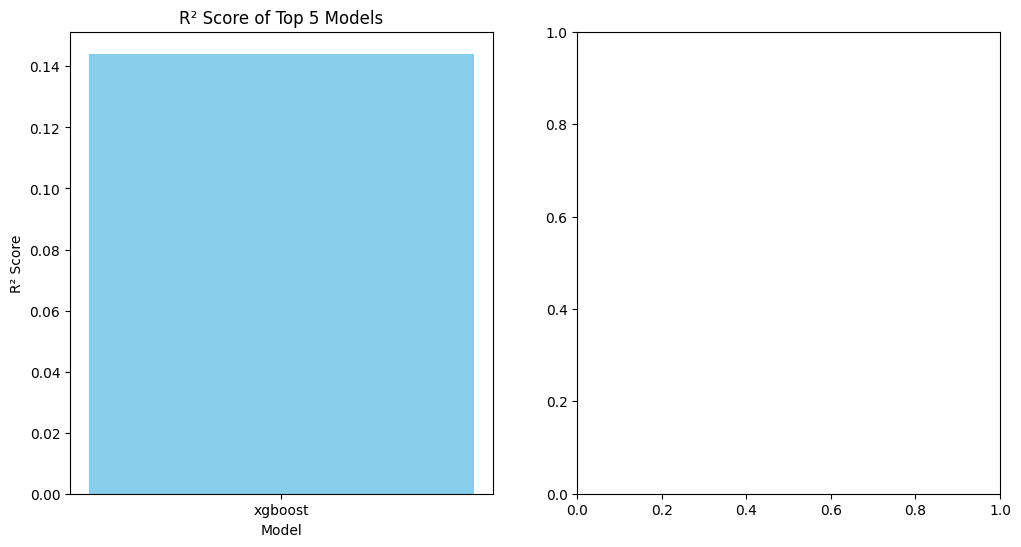

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from flaml import AutoML

# Create a sample DataFrame (you can replace this with your actual data)
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'energy_consumption': [2.5, 3.1, 3.6, 4.0, 4.5, 5.1, 5.6, 6.0, 6.5, 7.1]  # Target variable
})

# Split features (X) and target (y)
X = df.drop('energy_consumption', axis=1)
y = df['energy_consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean feature names by replacing special characters (if necessary)
X_train.columns = X_train.columns.str.replace(r'[^\w\s]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^\w\s]', '', regex=True)

# List of estimators to evaluate
estimators = ["lgbm", "rf", "xgboost", "extra_tree", "catboost"]  # Add catboost for more models

# Dictionary to store model names, R² scores, and time taken
model_performance = []

for estimator in estimators:
    try:
        # Set the estimator to FLAML with increased time budget (adjust as needed)
        start_time = time.time()  # Start time
        automl = AutoML()

        # Error handling for missing libraries
        try:
            automl.fit(X_train, y_train, task="regression", time_budget=120, estimator_list=[estimator])  # Increased time budget
        except ModuleNotFoundError as e:
            print(f"Error: Required library '{e.name}' not installed. Please install using 'pip install {e.name}'.")
            continue

        end_time = time.time()  # End time

        # Calculate the time taken
        elapsed_time = end_time - start_time

        # Predict on the test set
        y_pred = automl.predict(X_test)

        # Calculate the R² score (handling potential division by zero)
        try:
            r2 = r2_score(y_test, y_pred)
        except ZeroDivisionError:
            print(f"Warning: R² score calculation failed for {estimator} due to potential division by zero. Setting R² to 0.")
            r2 = 0.0

        # Append the model name, R², and time taken
        model_performance.append((estimator, r2, elapsed_time))
    except Exception as e:
        print(f"Error with estimator {estimator}: {e}")

# Sort the models by R² score in descending order
model_performance = sorted(model_performance, key=lambda x: x[1], reverse=True)

# Extract the top 5 models for graph plotting (or all available models if fewer than 5)
num_models = min(5, len(model_performance))
top_models = model_performance[:num_models]
model_names = [x[0] for x in top_models]
r2_scores = [x[1] for x in top_models]
execution_times = [x[2] for x in top_models]

# Plotting the R² scores of top 5 models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("R² Score of Top 5 Models")

# Plotting the Execution Time of top 5 models
plt.subplot(1, 2, 2)
plt